# Exploratory Data Analysis

This notebook provides tools to analyze the distribution of your variables along with correlations that exist among them. The supporting Python code is in EDATools.py. Many of the functions have additional arguments that are defaulted. For more details look through the code. Also add any functions you find useful.

# Outline 

<!-- MarkdownTOC autolink=true autoanchor=true bracket=round -->

- [Part One - Distributional Analysis](#part-one---distributional-analysis)
    - [Load Data and Specify Variables](#load-data-and-specify-variables)
    - [Distribution of Target Variable](#target-variable)
    - [Distribution of Predictor Variables](#predictor-variables)
- [Part Two - Predictor Correlations and Clustering](#part-two---predictor-correlation)
    - [Correlation Between Continuous Variables](#correlation-between-continuous-variables)
    - [Correlation Between Categorical Variables](#correlation-between-categorical-variables)
    - [Correlation Between Continuous and Categorical Variables](#correlation-between-continuous-and-categorical-variables)

<!-- MarkdownTOC -->

<a name="part-one---distributional-analysis"></a>
# Part One - Distributional Analysis

<a name="load-data-and-specify-variables"></a>
## Load Data and Specify Variables

For this example, we use the HousePrice dataset from Kaggle, that can be found here:

<a href="https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data">https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data</a>

In this section we will load our dataset, print the index of each feature and then specify which variables are predictors, target, controls (optional), and weight (optional). For variables with null values, null_value_cleanup will create an IS_NULL indicator variable. If you prefer another method of dealing with missing values, like imputing values (e.g. mean, median, mode), write a function to do it, put it in EDATools, and call it below. 

In [1]:
import sys
sys.path.append('..')

In [2]:
from DataAnalysisToolBox.model_data import ModelData
from DataAnalysisToolBox.eda.feature_clusters import FeatureClusters
import pandas as pd
import numpy as np
import warnings

dataset = pd.read_csv("your/local/path/HousePrice_Regression/train.csv")  # Replace with the location on your computer.
dataset.rename(columns={'1stFlrSF': 'FirstFlrSF', '2ndFlrSF': 'SecondFlrSF', '3SsnPorch': 'ThreeSsnPorch'}, inplace=True)

# Print the index of each feature.
for i, col in enumerate(dataset.columns):
    print(i, col)

C:\Users\dsmit\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


0 Id
1 MSSubClass
2 MSZoning
3 LotFrontage
4 LotArea
5 Street
6 Alley
7 LotShape
8 LandContour
9 Utilities
10 LotConfig
11 LandSlope
12 Neighborhood
13 Condition1
14 Condition2
15 BldgType
16 HouseStyle
17 OverallQual
18 OverallCond
19 YearBuilt
20 YearRemodAdd
21 RoofStyle
22 RoofMatl
23 Exterior1st
24 Exterior2nd
25 MasVnrType
26 MasVnrArea
27 ExterQual
28 ExterCond
29 Foundation
30 BsmtQual
31 BsmtCond
32 BsmtExposure
33 BsmtFinType1
34 BsmtFinSF1
35 BsmtFinType2
36 BsmtFinSF2
37 BsmtUnfSF
38 TotalBsmtSF
39 Heating
40 HeatingQC
41 CentralAir
42 Electrical
43 FirstFlrSF
44 SecondFlrSF
45 LowQualFinSF
46 GrLivArea
47 BsmtFullBath
48 BsmtHalfBath
49 FullBath
50 HalfBath
51 BedroomAbvGr
52 KitchenAbvGr
53 KitchenQual
54 TotRmsAbvGrd
55 Functional
56 Fireplaces
57 FireplaceQu
58 GarageType
59 GarageYrBlt
60 GarageFinish
61 GarageCars
62 GarageArea
63 GarageQual
64 GarageCond
65 PavedDrive
66 WoodDeckSF
67 OpenPorchSF
68 EnclosedPorch
69 ThreeSsnPorch
70 ScreenPorch
71 PoolArea
72 PoolQC


Take a look at the top few rows of the data set.

In [3]:
pd.set_option('display.max_columns', None) # This allows you to display larger data frames

dataset.head(10)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   
5   6          50       RL         85.0    14115   Pave   NaN      IR1   
6   7          20       RL         75.0    10084   Pave   NaN      Reg   
7   8          60       RL          NaN    10382   Pave   NaN      IR1   
8   9          50       RM         51.0     6120   Pave   NaN      Reg   
9  10         190       RL         50.0     7420   Pave   NaN      Reg   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   
5         Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
6         Lvl    AllPub    Inside       Gtl      Somerst       Norm   
7         Lvl    AllPub    Corner       Gtl       NWAmes       PosN   
8         Lvl    AllPub    Inside       Gtl      OldTown     Artery   
9         Lvl    AllPub    Corner       Gtl      BrkSide     Artery   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   
5       Norm     1Fam     1.5Fin            5            5       1993   
6       Norm     1Fam     1Story            8            5       2004   
7       Norm     1Fam     2Story            7            6       1973   
8       Norm     1Fam     1.5Fin            7            5       1931   
9     Artery   2fmCon     1.5Unf            5            6       1939   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   
5          1995     Gable  CompShg     VinylSd     VinylSd       None   
6          2005     Gable  CompShg     VinylSd     VinylSd      Stone   
7          1973     Gable  CompShg     HdBoard     HdBoard      Stone   
8          1950     Gable  CompShg     BrkFace     Wd Shng       None   
9          1950     Gable  CompShg     MetalSd     MetalSd       None   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   
5         0.0        TA        TA       Wood       Gd       TA           No   
6       186.0        Gd        TA      PConc       Ex       TA           Av   
7       240.0        TA        TA     CBlock       Gd       TA           Mn   
8         0.0        TA        TA     BrkTil       TA       TA           No   
9       

Using the index of each variable above, specify the index/indices of predictors, target, controls, and weight variables. If there are variables that are numeric, but categorical, store their indicies in numeric_cat_index. 

In [9]:
predictors = np.arange(1,80)
numeric_cat_index = np.array([1,17,18,63,76])
target = 80

Instantiate model_data using the parameters above. In addition any controls and/or weight variables can be added as above.

In [10]:
model_data = ModelData(dataset, predictors, target, numeric_cat_index=numeric_cat_index) 

Check if any of the categorical variables have levels with thin data.

In [11]:
model_data.rare_level_check(verbose = False)
model_data.missing_value_cleanup(verbose = True)

MSSubClass has thin data in level 40, the portion is 0.0027397260273972603.
Street has thin data in level Grvl, the portion is 0.00410958904109589.
Utilities has thin data in level NoSeWa, the portion is 0.0006849315068493151.
LotConfig has thin data in level FR3, the portion is 0.0027397260273972603.
Neighborhood has thin data in level Blueste, the portion is 0.0013698630136986301.
Condition1 has thin data in level RRNe, the portion is 0.0013698630136986301.
Condition1 has thin data in level RRNn, the portion is 0.003424657534246575.
Condition2 has thin data in level Artery, the portion is 0.0013698630136986301.
Condition2 has thin data in level Feedr, the portion is 0.00410958904109589.
Condition2 has thin data in level PosA, the portion is 0.0006849315068493151.
Condition2 has thin data in level PosN, the portion is 0.0013698630136986301.
Condition2 has thin data in level RRAe, the portion is 0.0006849315068493151.
Condition2 has thin data in level RRAn, the portion is 0.00068493150

<a name="target-variable"></a>
## Distribution of Target

This section will provide information about the target variable distribution. If your target variable is categorical, set p_target_categorical = True and p_pp_plots = False. In this case you'll see a bar chart along with counts for each category.
<br>
If your target is continuous, set p_target_categorical = False and p_pp_plots = True. This option will give summary statistics, and will compare the target distribution to hypothetical distributions. Maximum likelihood estimatation is used to fit the empirical data to a normal, lognormal, gamma, and inverse gaussian distribution. For each distribution, the Kolmogorov-Smirinov (KS) statistic is computed, a pp-plot is given, and the fitted pdf is plotted over the histogram. A good fit is characterized by a low KS statistic, a pp-plot close to the line $y = x$, and the histogram close to the fitted pdf. Many modeling algorithms can take advantage of choosing an appropriate distribution. Add any other distributions you would like to test.


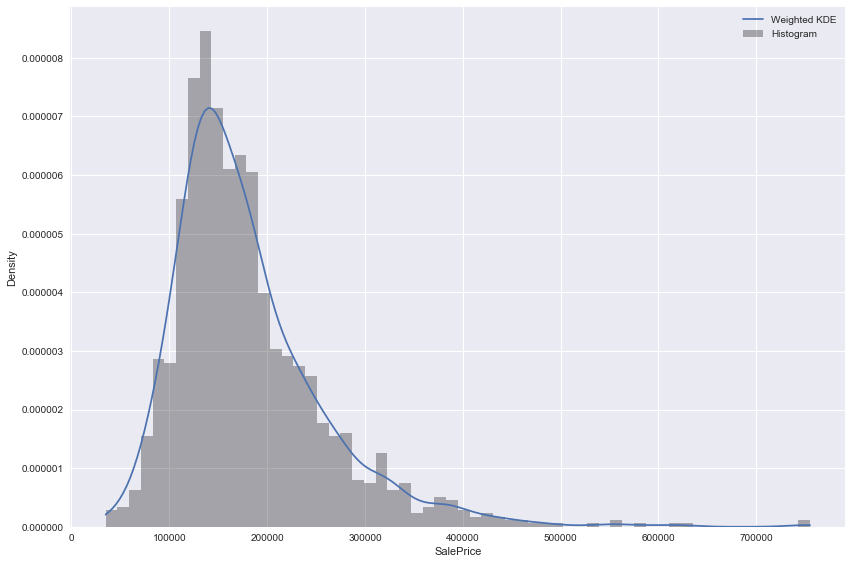

              SalePrice
Weight      1460.000000
Mean      180921.195890
StdDev     79442.502883
Min        34900.000000
25%       129975.000000
50%       163000.000000
75%       214000.000000
Max       755000.000000
Skewness       1.882876
Kurtosis       6.536282
******************Lognormal Distributional Fit*******************


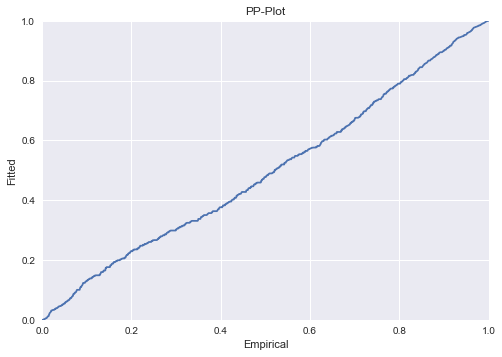

Lognormal Kolmogorov-Smirnov Test:
0.0408676767786
Lognormal Cramer Von Mises:
0.613814718848


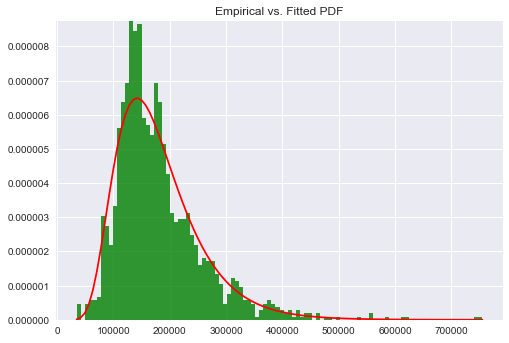

***************Inverse Gaussian Distributional Fit***************


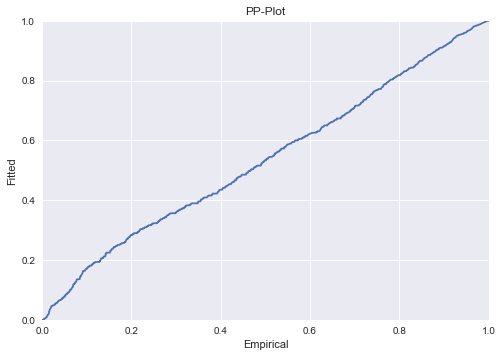

Inverse Gaussian Kolmogorov-Smirnov Test:
0.085262339143
Inverse Gaussian Cramer Von Mises:
2.63319100645


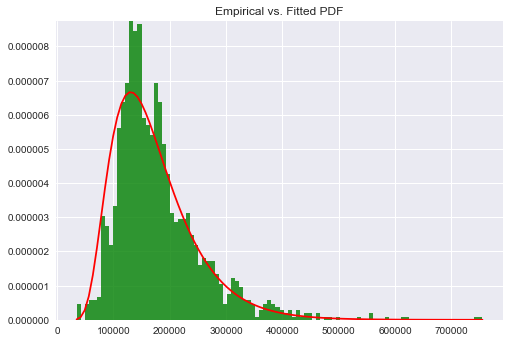

********************Gamma Distributional Fit*********************


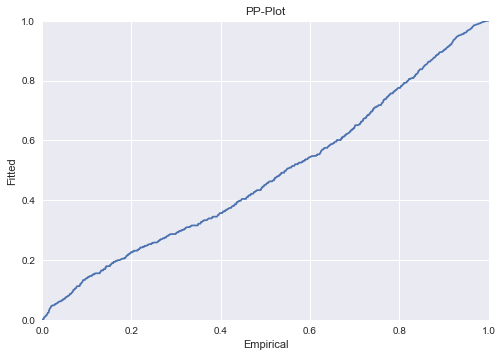

Gamma Kolmogorov-Smirnov Test:
0.0678991473511
Gamma Cramer Von Mises:
1.8965714173


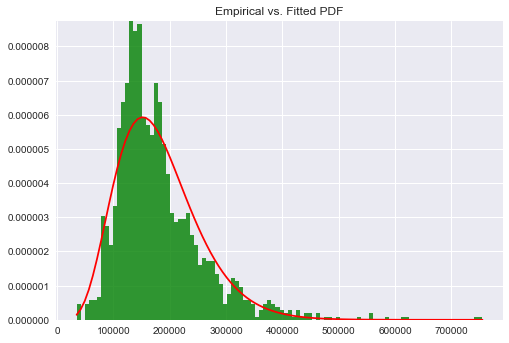

********************Normal Distributional Fit********************


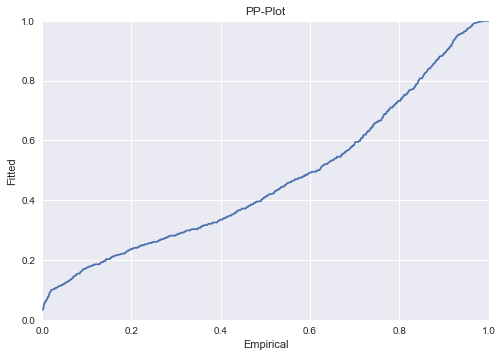

Normal Kolmogorov-Smirnov Test:
0.123669907292
Normal Cramer Von Mises:
7.284898155


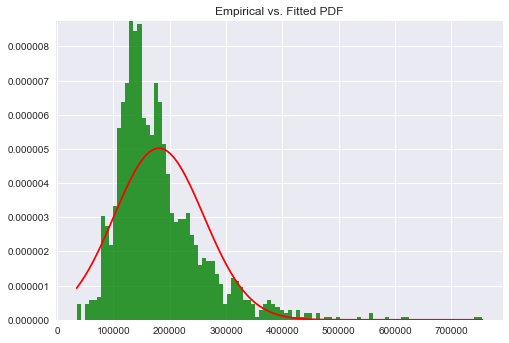

In [7]:
model_data.target_dist()

<a name="predictor-variables"></a>
## Distribution of Predictors

For each categorical variable, a bar chart and the count/weight for each category is given. For each continuous variable, summary statistics are calculated and the kernel density estimation KDE (a smoothed histogram) is plotted with the histogram. This section helps to understand your predictors and identify potential data issues.

Distributions - Predictors:


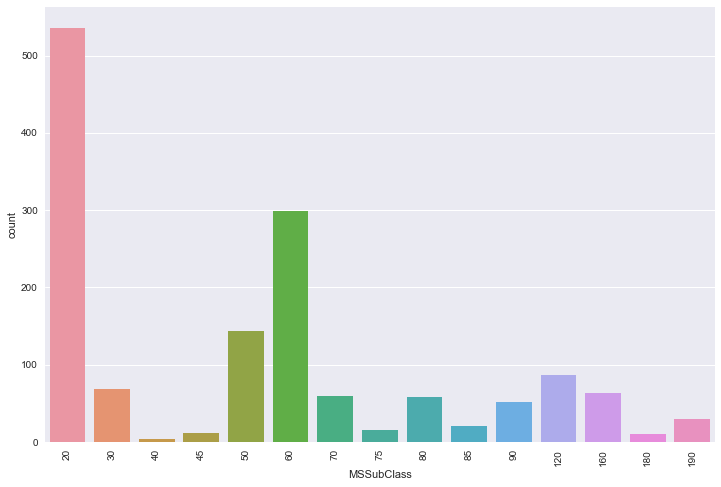

Level                     Weight
20                        536
30                        69
40                        4
45                        12
50                        144
60                        299
70                        60
75                        16
80                        58
85                        20
90                        52
120                       87
160                       63
180                       10
190                       30


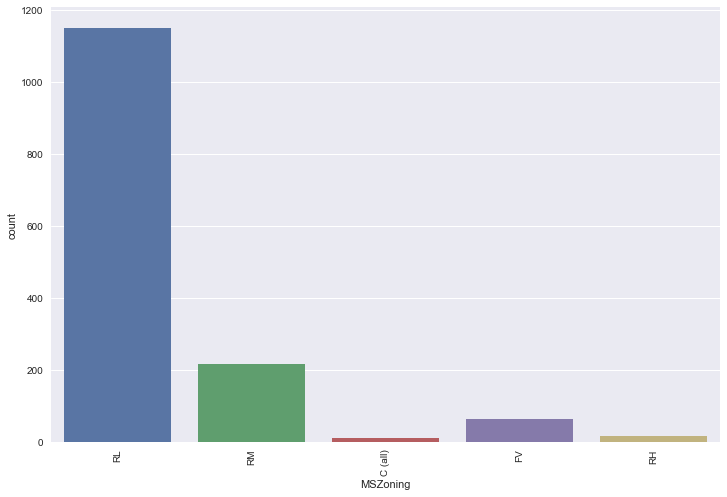

Level                     Weight
C (all)                   10
FV                        65
RH                        16
RL                        1151
RM                        218


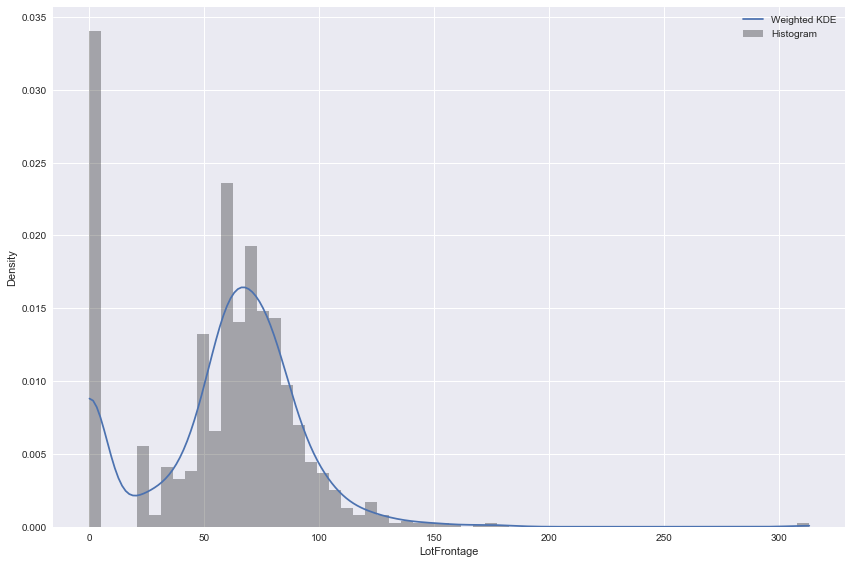

          LotFrontage
Weight    1460.000000
Mean        57.623288
StdDev      34.664304
Min          0.000000
25%         42.000000
50%         63.000000
75%         79.000000
Max        313.000000
Skewness     0.267822
Kurtosis     3.610678


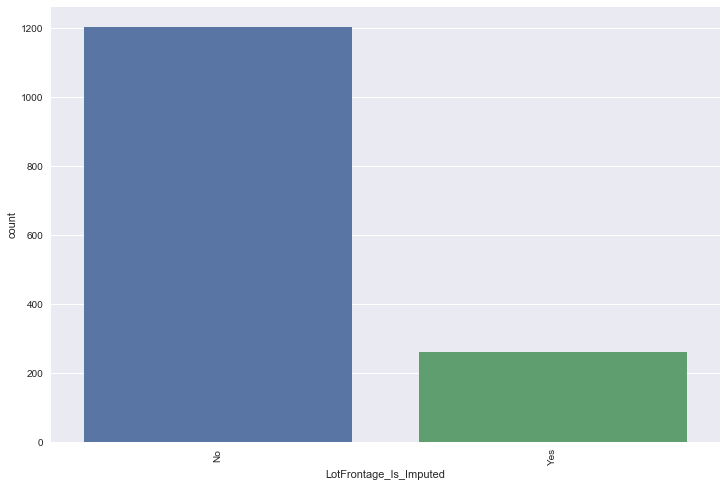

Level                     Weight
No                        1201
Yes                       259


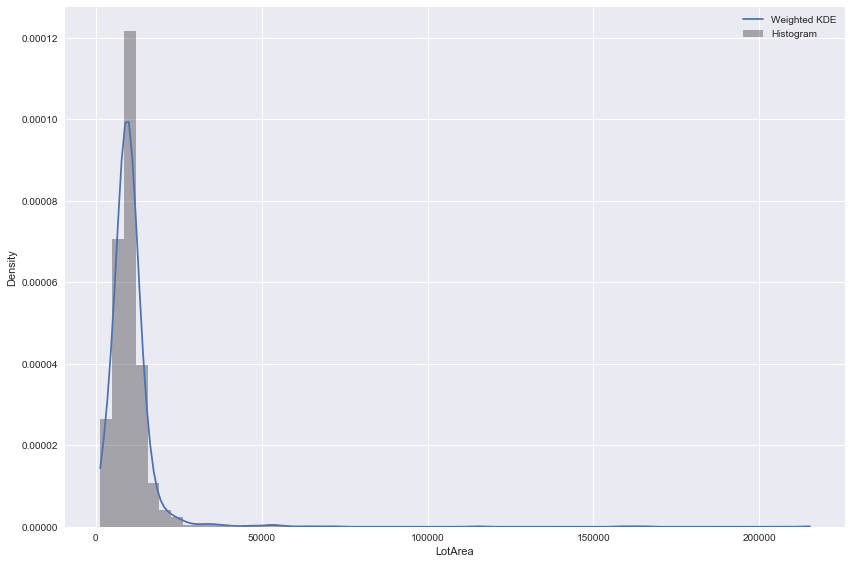

                LotArea
Weight      1460.000000
Mean       10516.828082
StdDev      9981.264932
Min         1300.000000
25%         7553.500000
50%         9478.500000
75%        11601.500000
Max       215245.000000
Skewness      12.207688
Kurtosis     203.243271


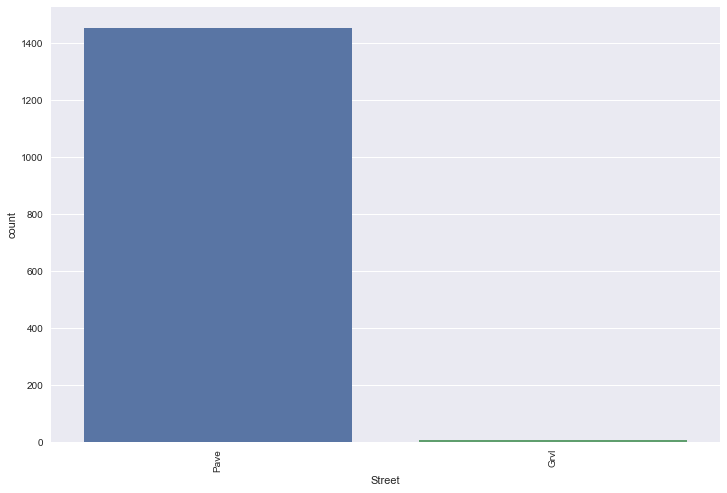

Level                     Weight
Grvl                      6
Pave                      1454


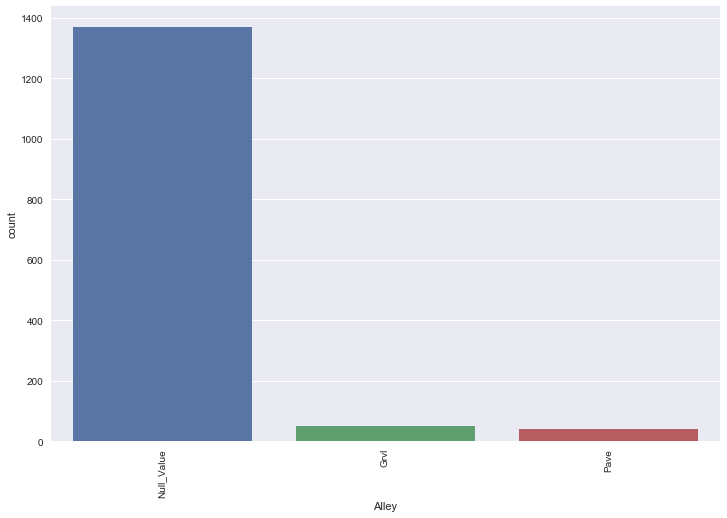

Level                     Weight
Grvl                      50
Null_Value                1369
Pave                      41


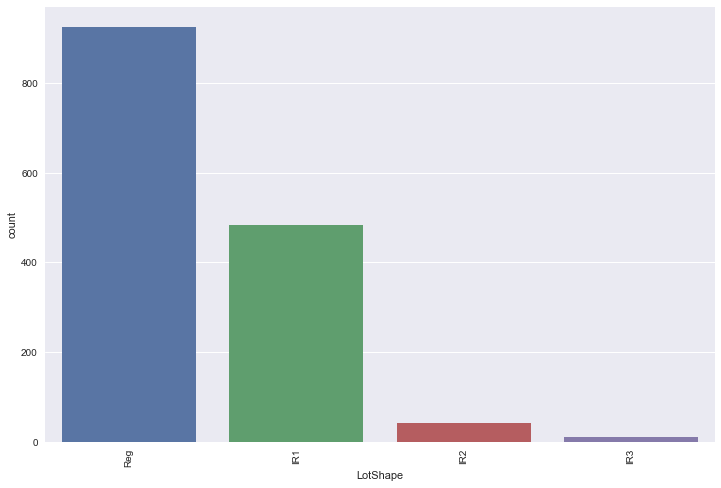

Level                     Weight
IR1                       484
IR2                       41
IR3                       10
Reg                       925


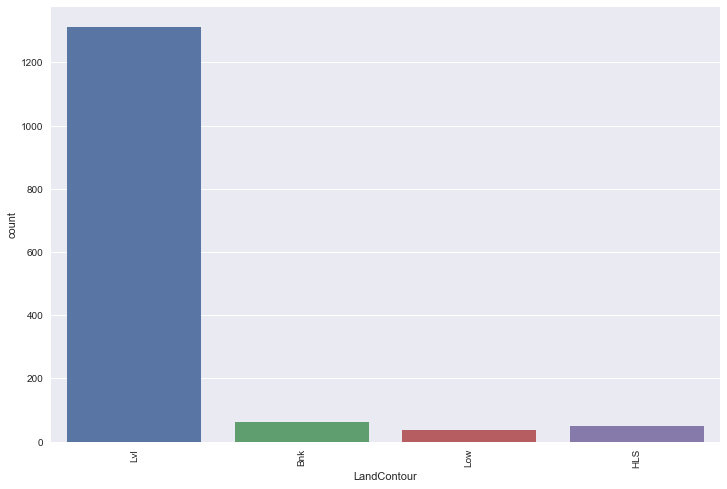

Level                     Weight
Bnk                       63
HLS                       50
Low                       36
Lvl                       1311


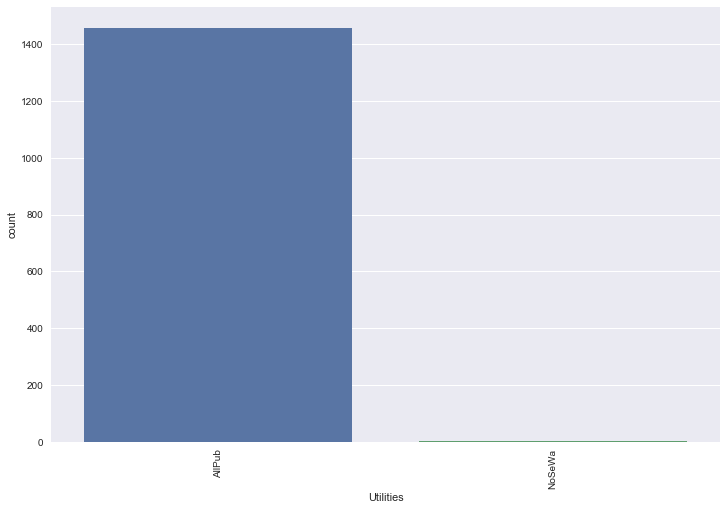

Level                     Weight
AllPub                    1459
NoSeWa                    1


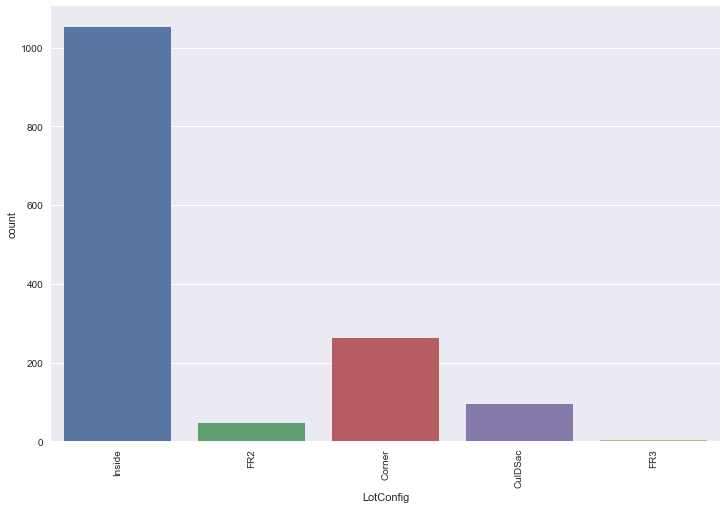

Level                     Weight
Corner                    263
CulDSac                   94
FR2                       47
FR3                       4
Inside                    1052


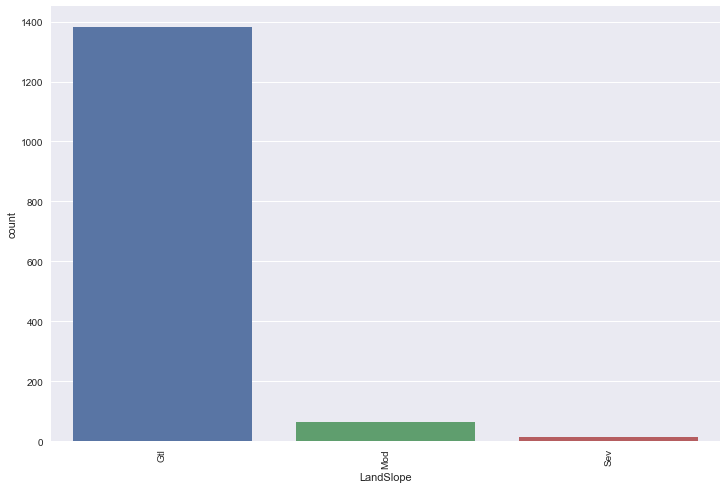

Level                     Weight
Gtl                       1382
Mod                       65
Sev                       13


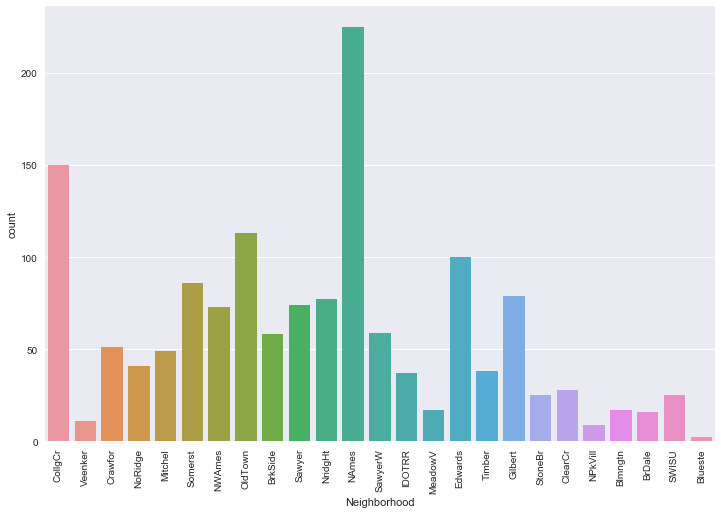

Level                     Weight
Blmngtn                   17
Blueste                   2
BrDale                    16
BrkSide                   58
ClearCr                   28
CollgCr                   150
Crawfor                   51
Edwards                   100
Gilbert                   79
IDOTRR                    37
MeadowV                   17
Mitchel                   49
NAmes                     225
NPkVill                   9
NWAmes                    73
NoRidge                   41
NridgHt                   77
OldTown                   113
SWISU                     25
Sawyer                    74
SawyerW                   59
Somerst                   86
StoneBr                   25
Timber                    38
Veenker                   11


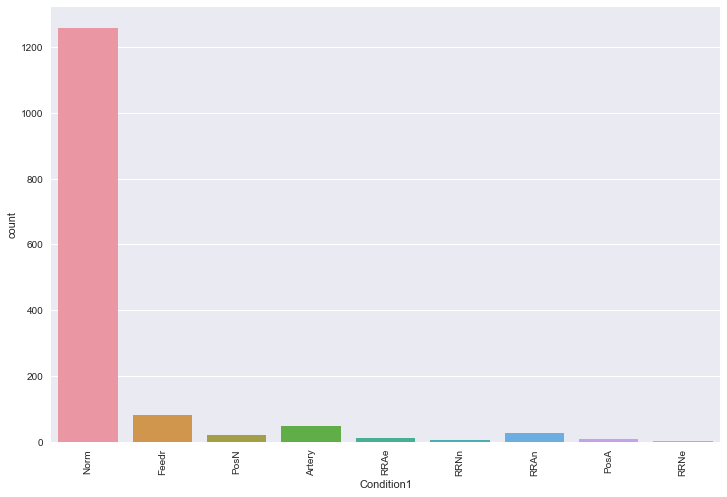

Level                     Weight
Artery                    48
Feedr                     81
Norm                      1260
PosA                      8
PosN                      19
RRAe                      11
RRAn                      26
RRNe                      2
RRNn                      5


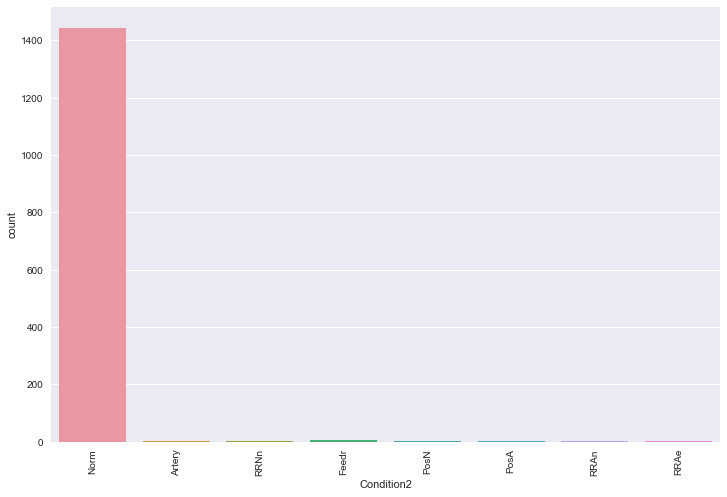

Level                     Weight
Artery                    2
Feedr                     6
Norm                      1445
PosA                      1
PosN                      2
RRAe                      1
RRAn                      1
RRNn                      2


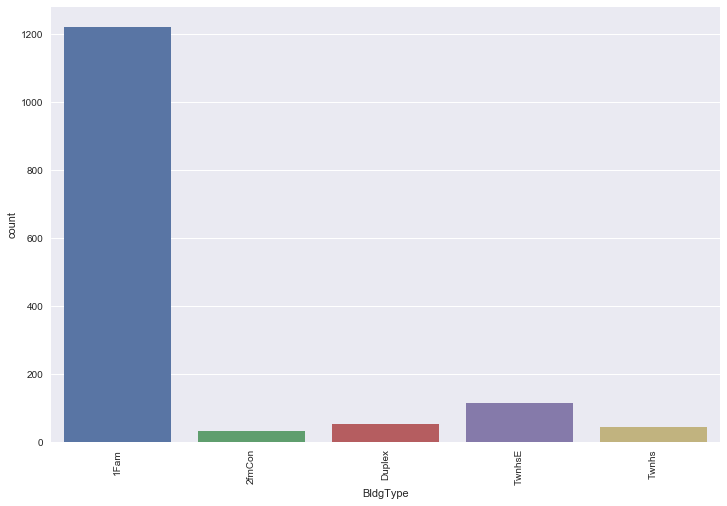

Level                     Weight
1Fam                      1220
2fmCon                    31
Duplex                    52
Twnhs                     43
TwnhsE                    114


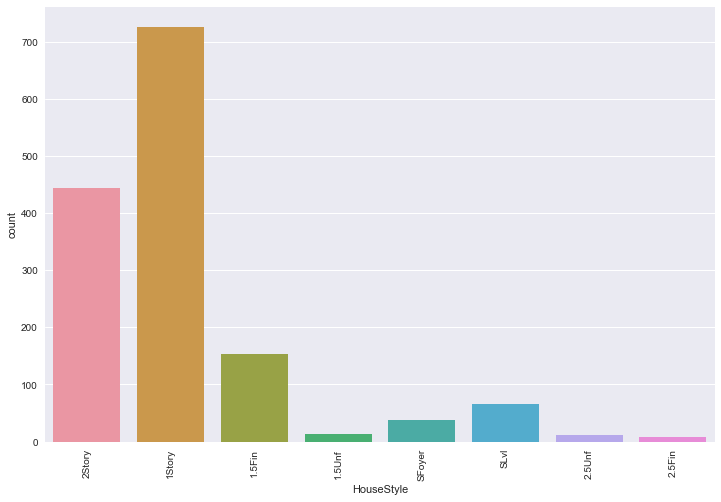

Level                     Weight
1.5Fin                    154
1.5Unf                    14
1Story                    726
2.5Fin                    8
2.5Unf                    11
2Story                    445
SFoyer                    37
SLvl                      65


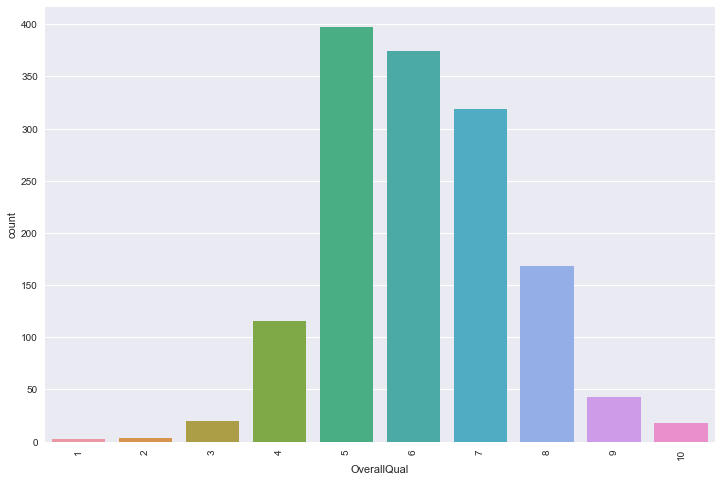

Level                     Weight
1                         2
2                         3
3                         20
4                         116
5                         397
6                         374
7                         319
8                         168
9                         43
10                        18


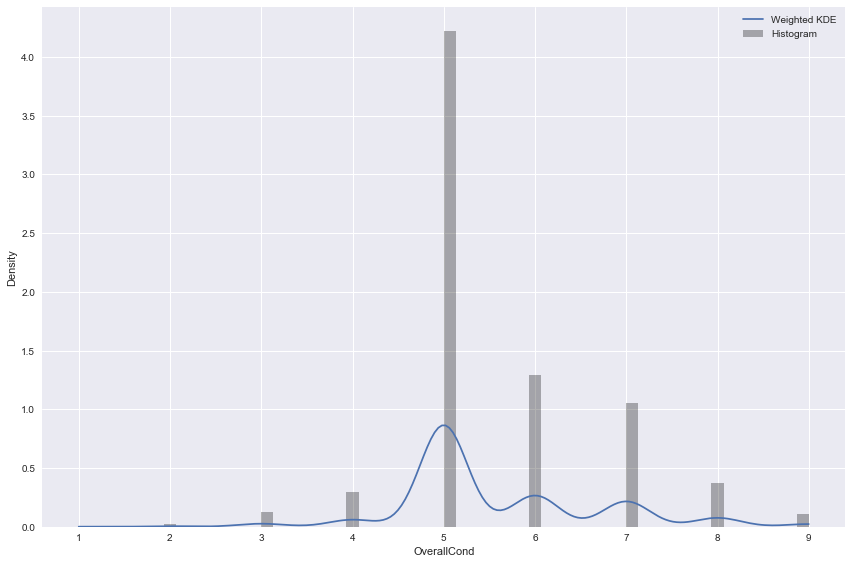

          OverallCond
Weight    1460.000000
Mean         5.575342
StdDev       1.112799
Min          1.000000
25%          5.000000
50%          5.000000
75%          6.000000
Max          9.000000
Skewness     0.693067
Kurtosis     1.106413


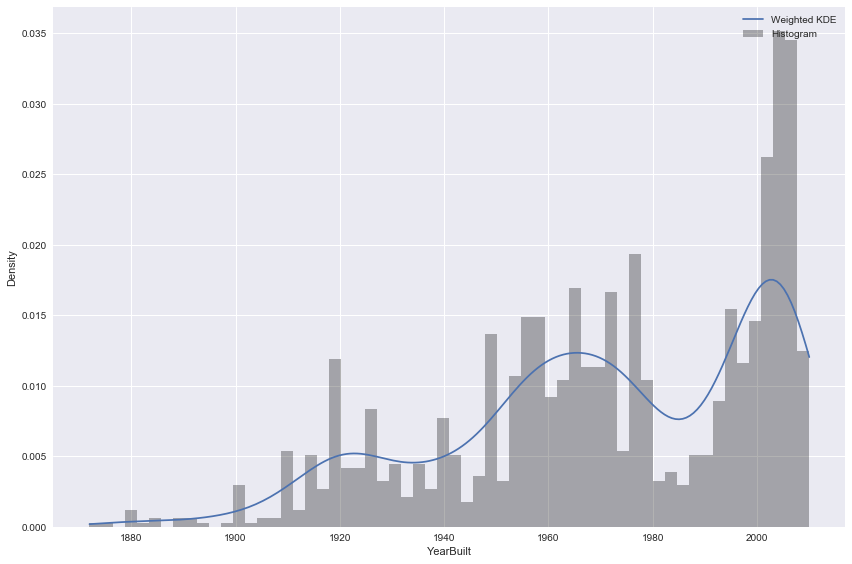

            YearBuilt
Weight    1460.000000
Mean      1971.267808
StdDev      30.202904
Min       1872.000000
25%       1954.000000
50%       1973.000000
75%       2000.000000
Max       2010.000000
Skewness    -0.613461
Kurtosis    -0.439552


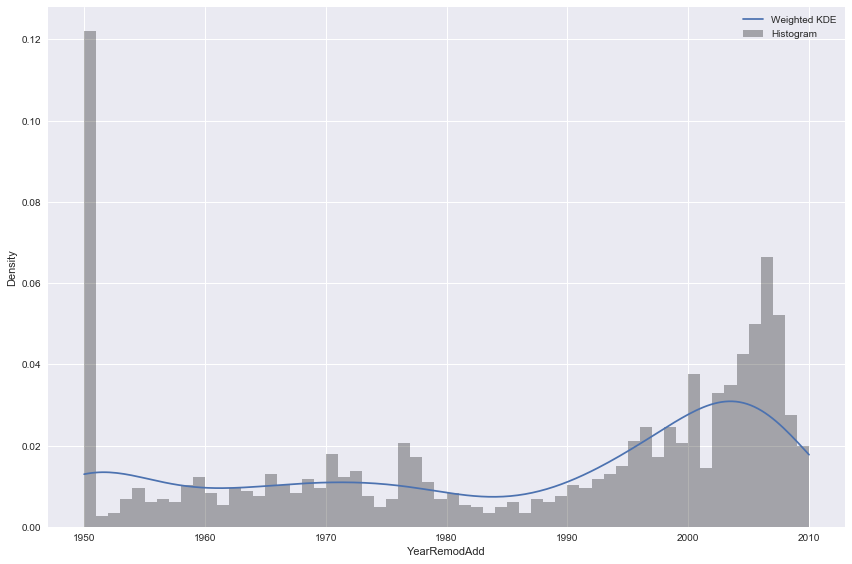

          YearRemodAdd
Weight     1460.000000
Mean       1984.865753
StdDev       20.645407
Min        1950.000000
25%        1967.000000
50%        1994.000000
75%        2004.000000
Max        2010.000000
Skewness     -0.503562
Kurtosis     -1.272245


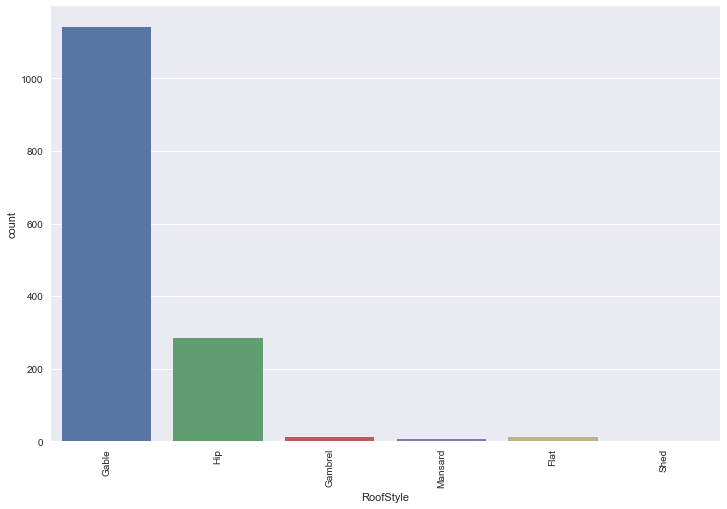

Level                     Weight
Flat                      13
Gable                     1141
Gambrel                   11
Hip                       286
Mansard                   7
Shed                      2


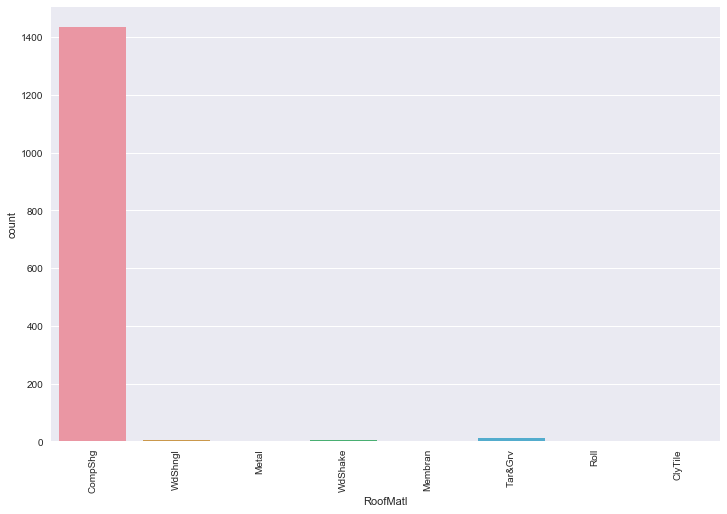

Level                     Weight
ClyTile                   1
CompShg                   1434
Membran                   1
Metal                     1
Roll                      1
Tar&Grv                   11
WdShake                   5
WdShngl                   6


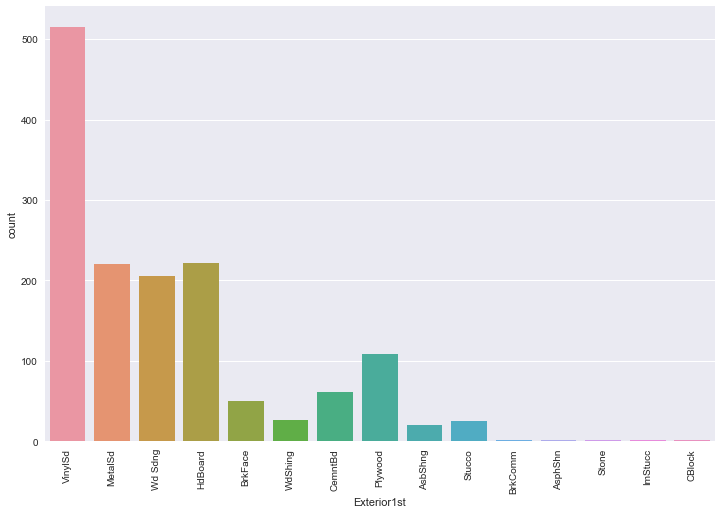

Level                     Weight
AsbShng                   20
AsphShn                   1
BrkComm                   2
BrkFace                   50
CBlock                    1
CemntBd                   61
HdBoard                   222
ImStucc                   1
MetalSd                   220
Plywood                   108
Stone                     2
Stucco                    25
VinylSd                   515
Wd Sdng                   206
WdShing                   26


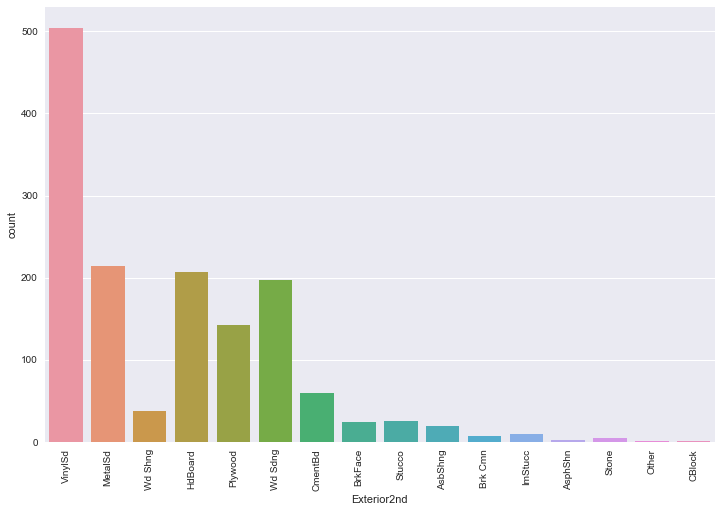

Level                     Weight
AsbShng                   20
AsphShn                   3
Brk Cmn                   7
BrkFace                   25
CBlock                    1
CmentBd                   60
HdBoard                   207
ImStucc                   10
MetalSd                   214
Other                     1
Plywood                   142
Stone                     5
Stucco                    26
VinylSd                   504
Wd Sdng                   197
Wd Shng                   38


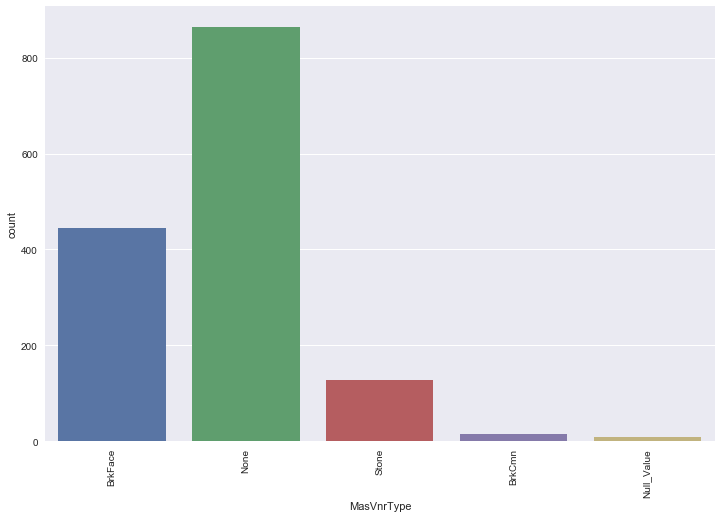

Level                     Weight
BrkCmn                    15
BrkFace                   445
None                      864
Null_Value                8
Stone                     128


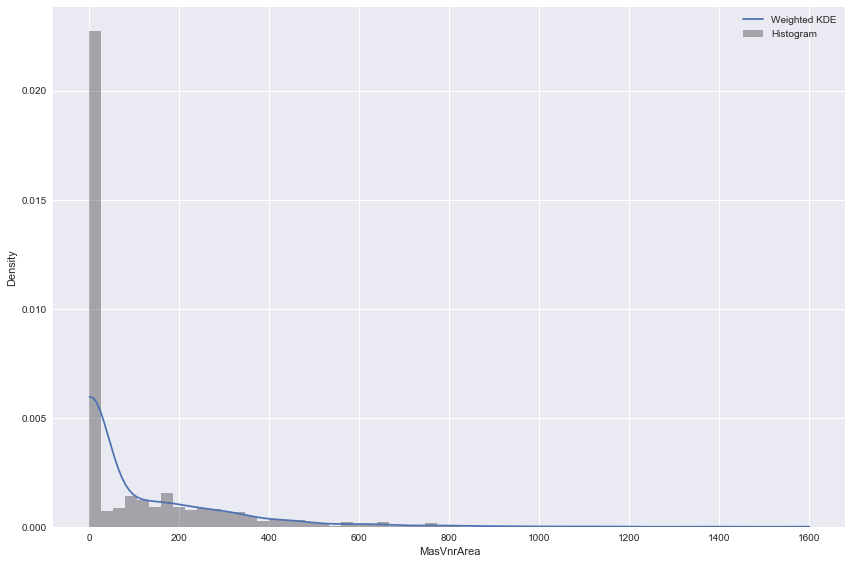

           MasVnrArea
Weight    1460.000000
Mean       103.117123
StdDev     180.731373
Min          0.000000
25%          0.000000
50%          0.000000
75%        164.250000
Max       1600.000000
Skewness     2.677616
Kurtosis    10.141416


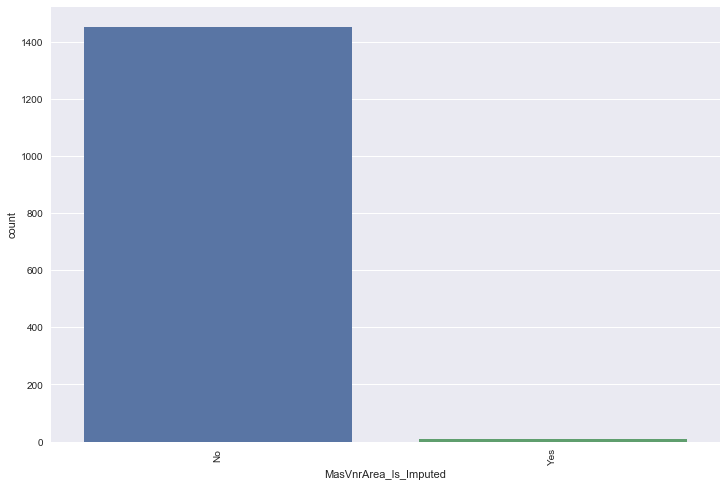

Level                     Weight
No                        1452
Yes                       8


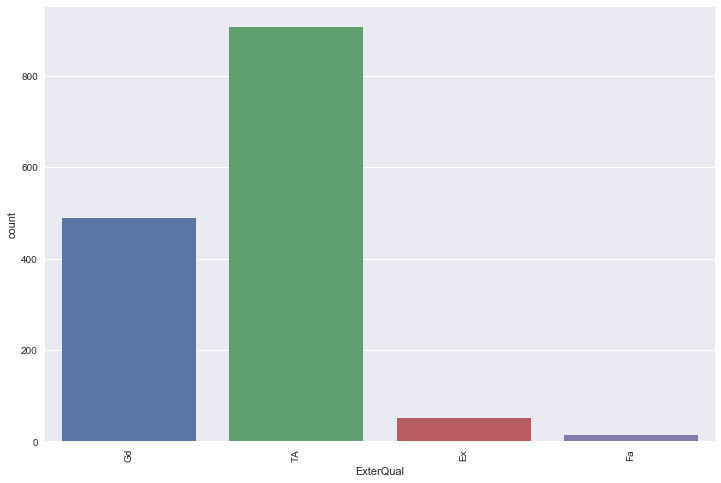

Level                     Weight
Ex                        52
Fa                        14
Gd                        488
TA                        906


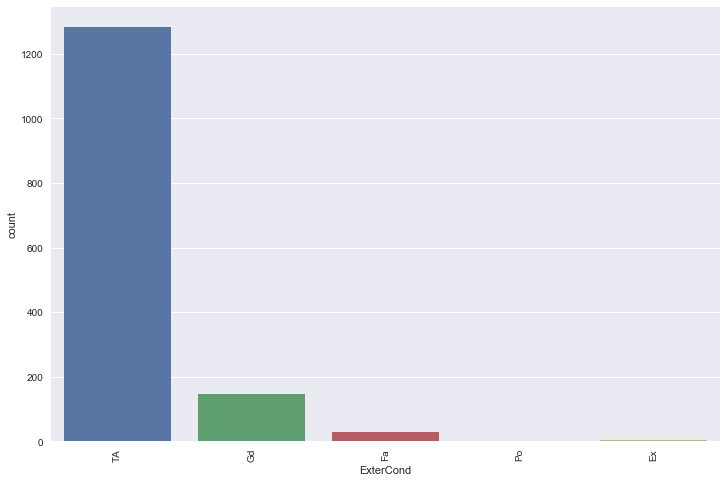

Level                     Weight
Ex                        3
Fa                        28
Gd                        146
Po                        1
TA                        1282


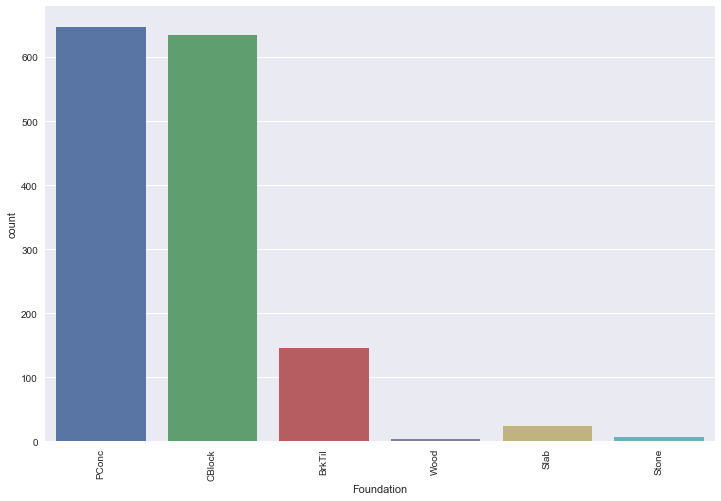

Level                     Weight
BrkTil                    146
CBlock                    634
PConc                     647
Slab                      24
Stone                     6
Wood                      3


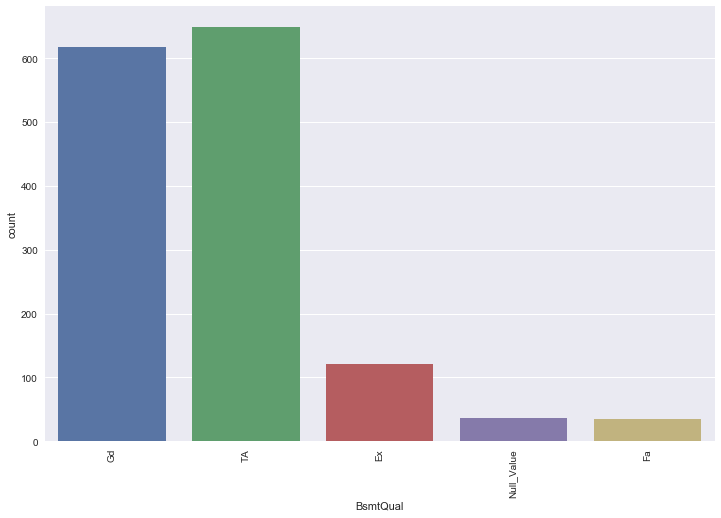

Level                     Weight
Ex                        121
Fa                        35
Gd                        618
Null_Value                37
TA                        649


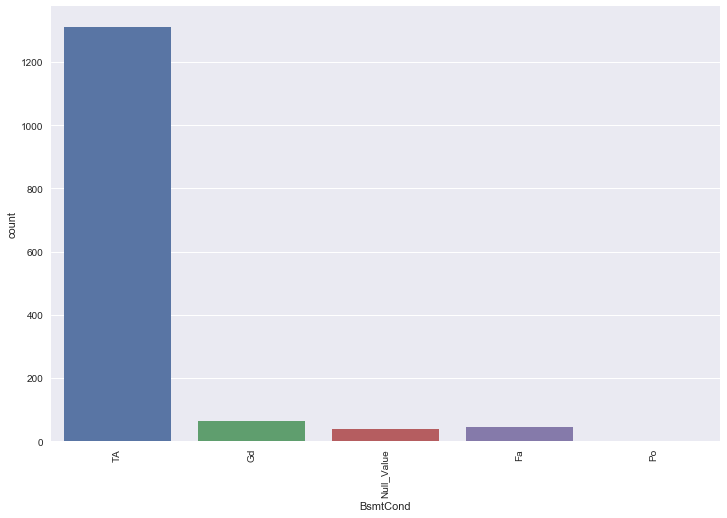

Level                     Weight
Fa                        45
Gd                        65
Null_Value                37
Po                        2
TA                        1311


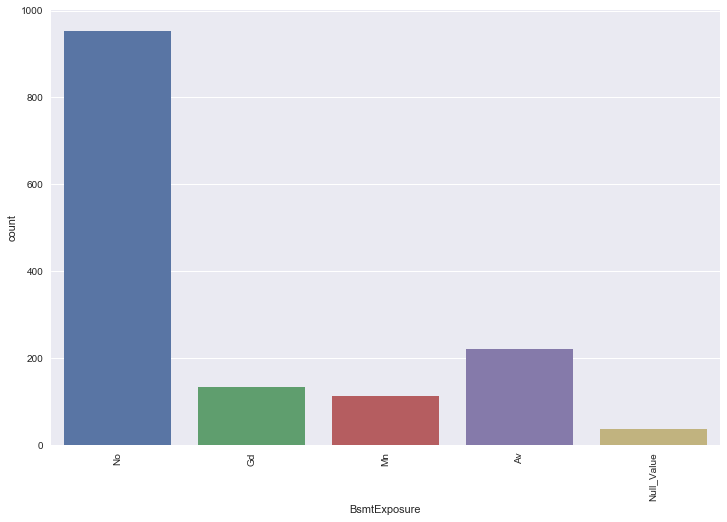

Level                     Weight
Av                        221
Gd                        134
Mn                        114
No                        953
Null_Value                38


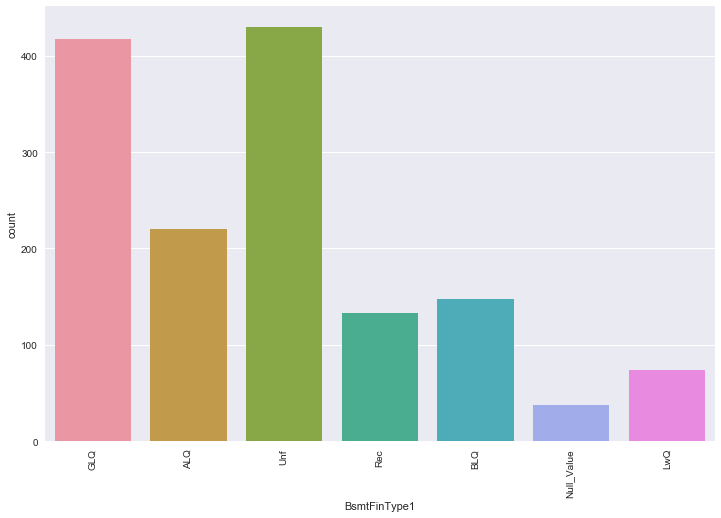

Level                     Weight
ALQ                       220
BLQ                       148
GLQ                       418
LwQ                       74
Null_Value                37
Rec                       133
Unf                       430


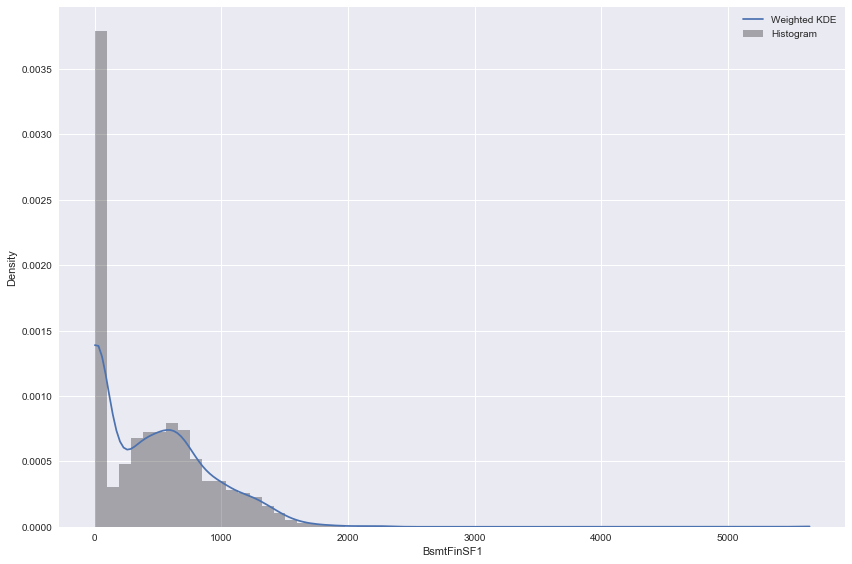

           BsmtFinSF1
Weight    1460.000000
Mean       443.639726
StdDev     456.098091
Min          0.000000
25%          0.000000
50%        383.500000
75%        712.250000
Max       5644.000000
Skewness     1.685503
Kurtosis    11.118236


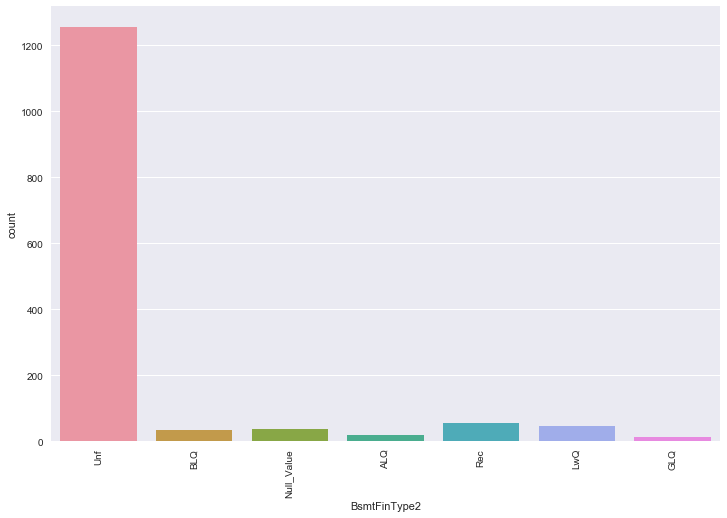

Level                     Weight
ALQ                       19
BLQ                       33
GLQ                       14
LwQ                       46
Null_Value                38
Rec                       54
Unf                       1256


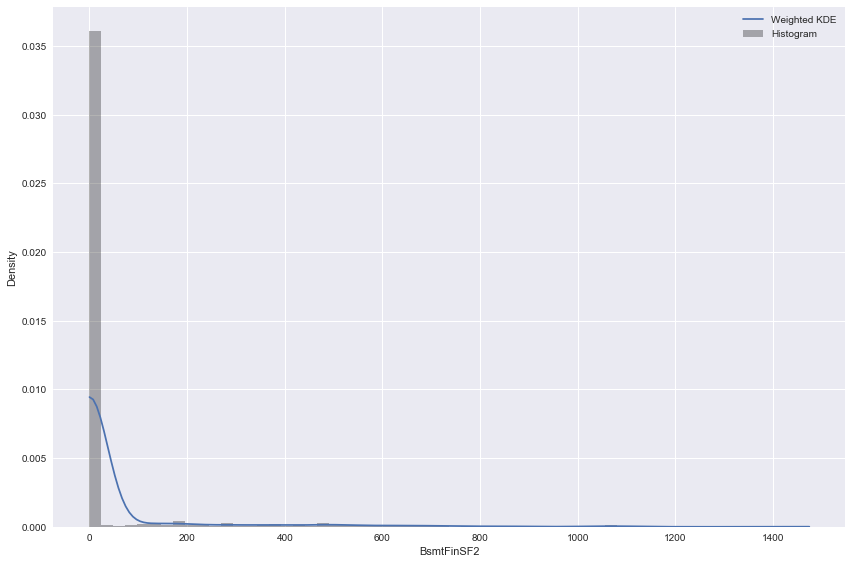

           BsmtFinSF2
Weight    1460.000000
Mean        46.549315
StdDev     161.319273
Min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
Max       1474.000000
Skewness     4.255261
Kurtosis    20.113338


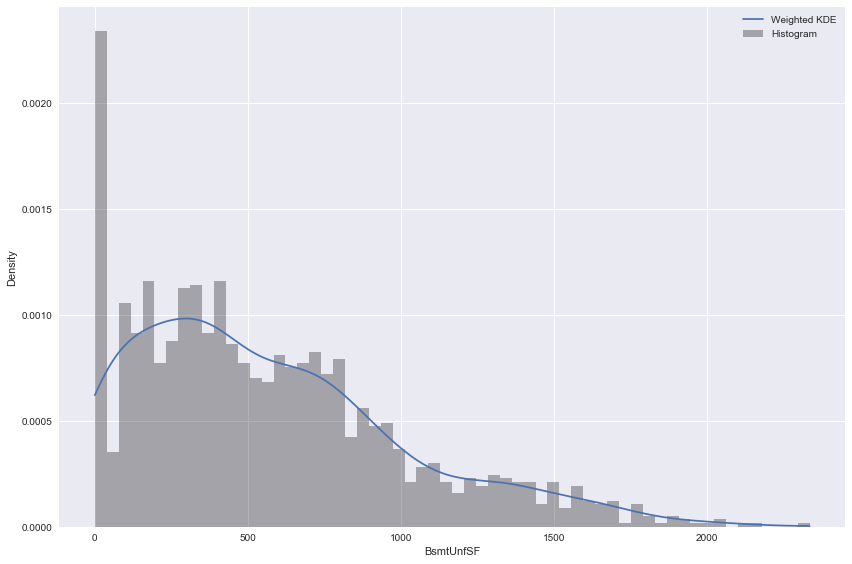

            BsmtUnfSF
Weight    1460.000000
Mean       567.240411
StdDev     441.866955
Min          0.000000
25%        223.000000
50%        477.500000
75%        808.000000
Max       2336.000000
Skewness     0.920268
Kurtosis     0.474994


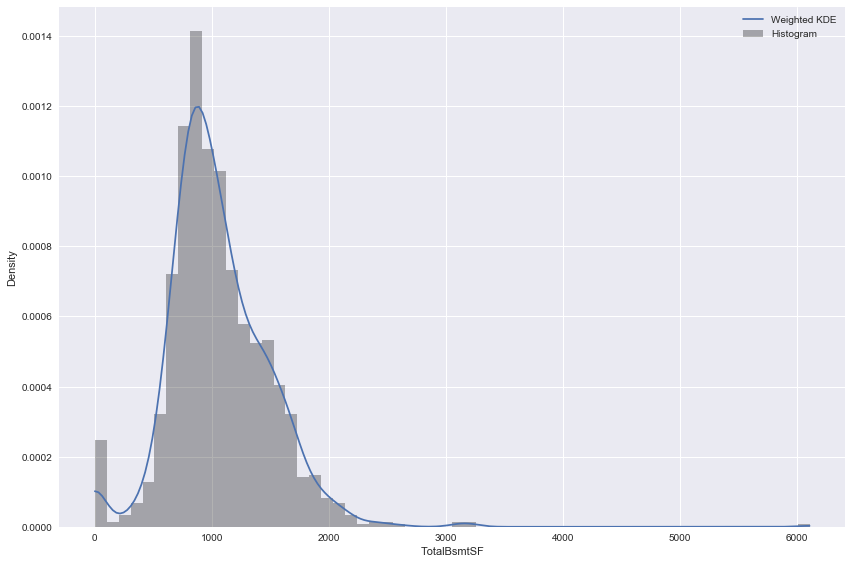

          TotalBsmtSF
Weight    1460.000000
Mean      1057.429452
StdDev     438.705324
Min          0.000000
25%        795.750000
50%        991.500000
75%       1298.250000
Max       6110.000000
Skewness     1.524255
Kurtosis    13.250483


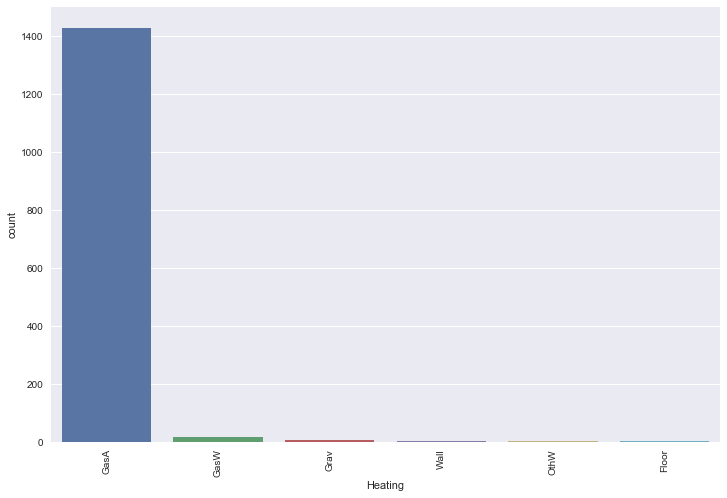

Level                     Weight
Floor                     1
GasA                      1428
GasW                      18
Grav                      7
OthW                      2
Wall                      4


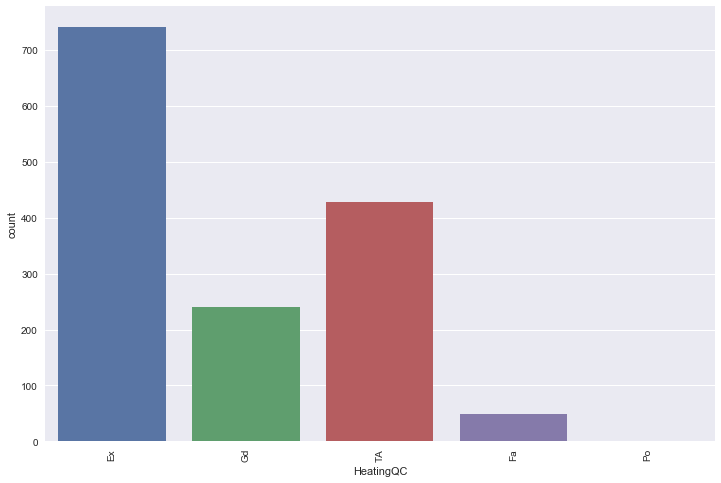

Level                     Weight
Ex                        741
Fa                        49
Gd                        241
Po                        1
TA                        428


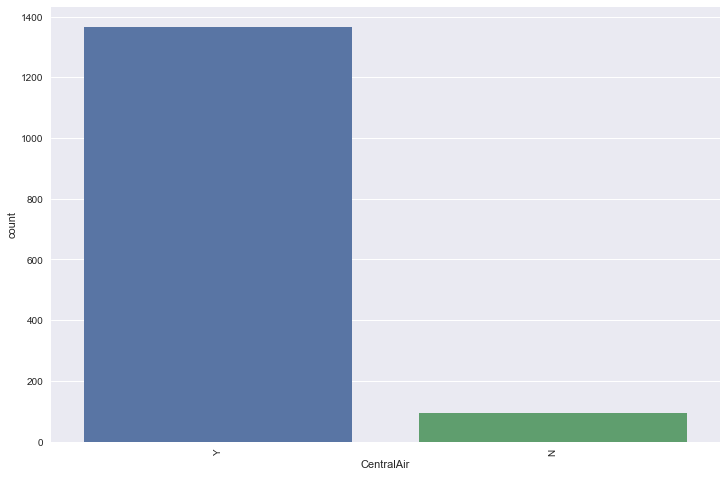

Level                     Weight
N                         95
Y                         1365


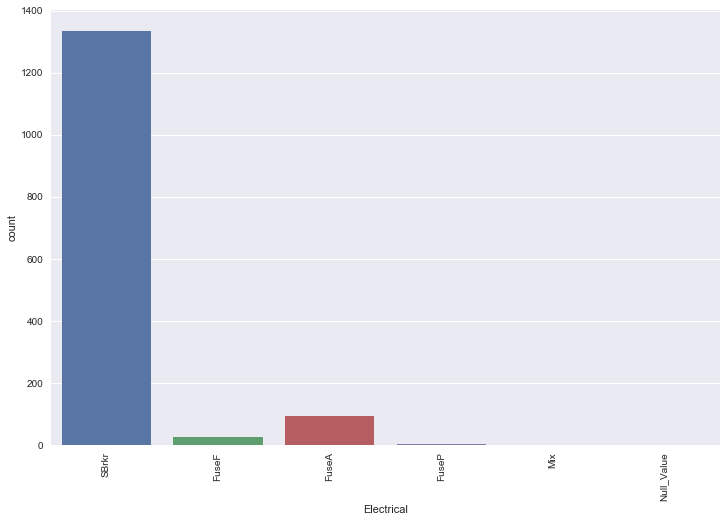

Level                     Weight
FuseA                     94
FuseF                     27
FuseP                     3
Mix                       1
Null_Value                1
SBrkr                     1334


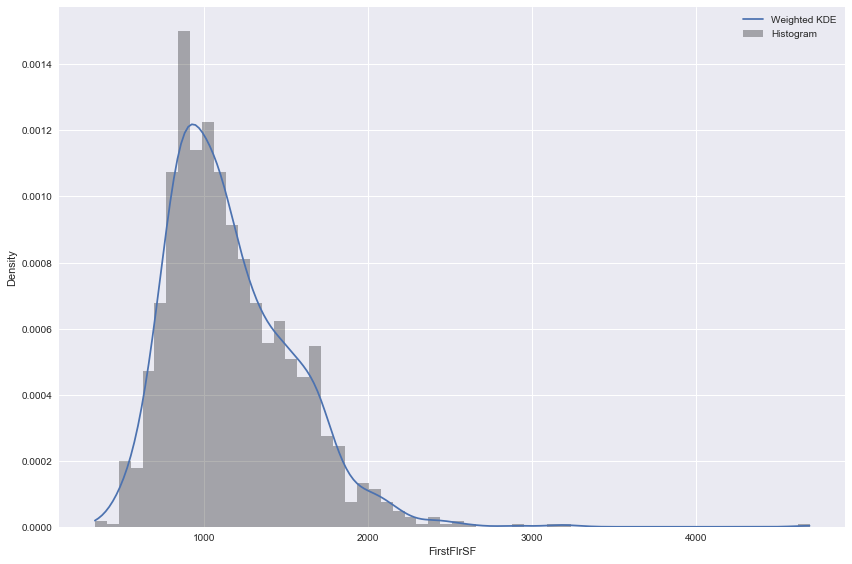

           FirstFlrSF
Weight    1460.000000
Mean      1162.626712
StdDev     386.587738
Min        334.000000
25%        882.000000
50%       1087.000000
75%       1391.250000
Max       4692.000000
Skewness     1.376757
Kurtosis     5.745841


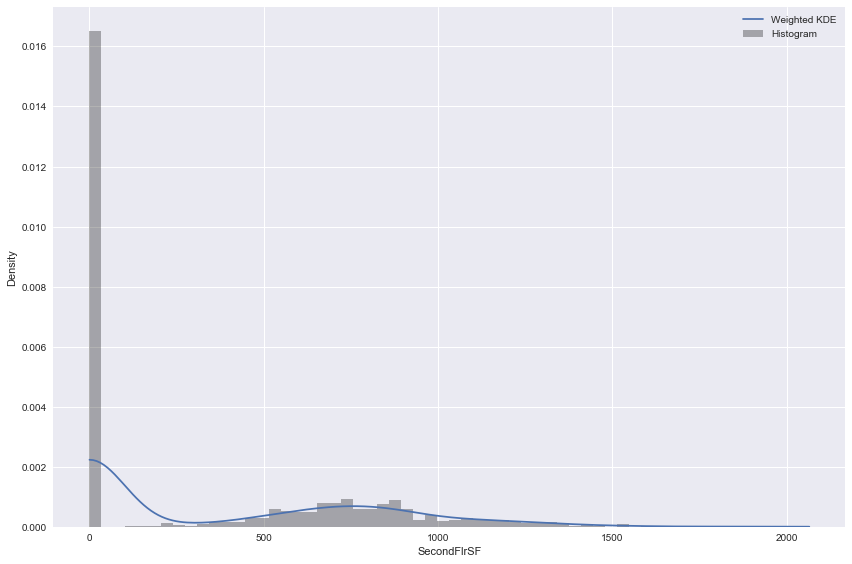

          SecondFlrSF
Weight    1460.000000
Mean       346.992466
StdDev     436.528436
Min          0.000000
25%          0.000000
50%          0.000000
75%        728.000000
Max       2065.000000
Skewness     0.813030
Kurtosis    -0.553464


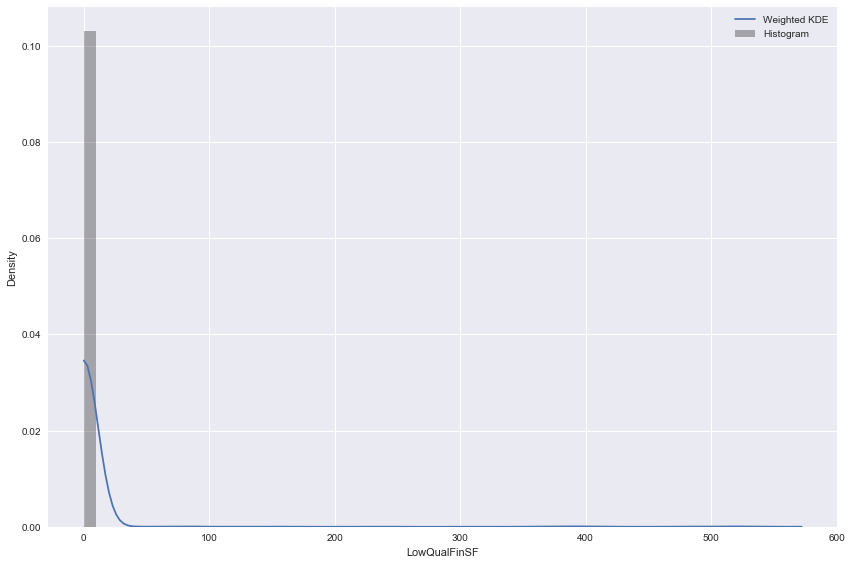

          LowQualFinSF
Weight     1460.000000
Mean          5.844521
StdDev       48.623081
Min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
Max         572.000000
Skewness      9.011341
Kurtosis     83.234817


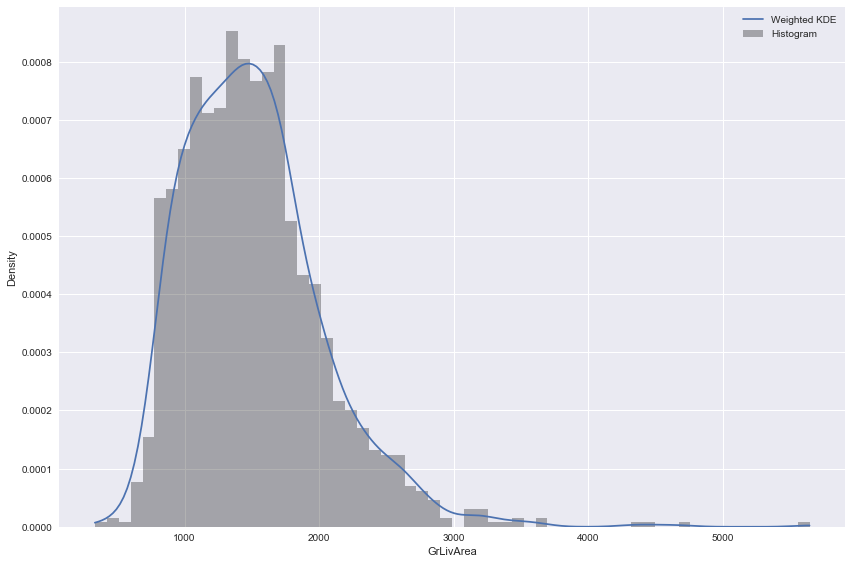

            GrLivArea
Weight    1460.000000
Mean      1515.463699
StdDev     525.480383
Min        334.000000
25%       1129.500000
50%       1464.000000
75%       1776.750000
Max       5642.000000
Skewness     1.366560
Kurtosis     4.895121


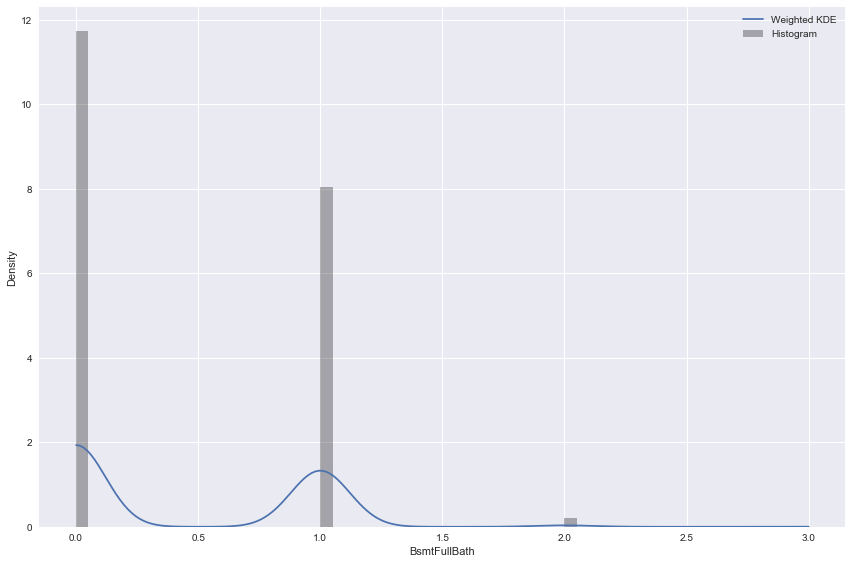

          BsmtFullBath
Weight     1460.000000
Mean          0.425342
StdDev        0.518911
Min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
Max           3.000000
Skewness      0.596067
Kurtosis     -0.839098


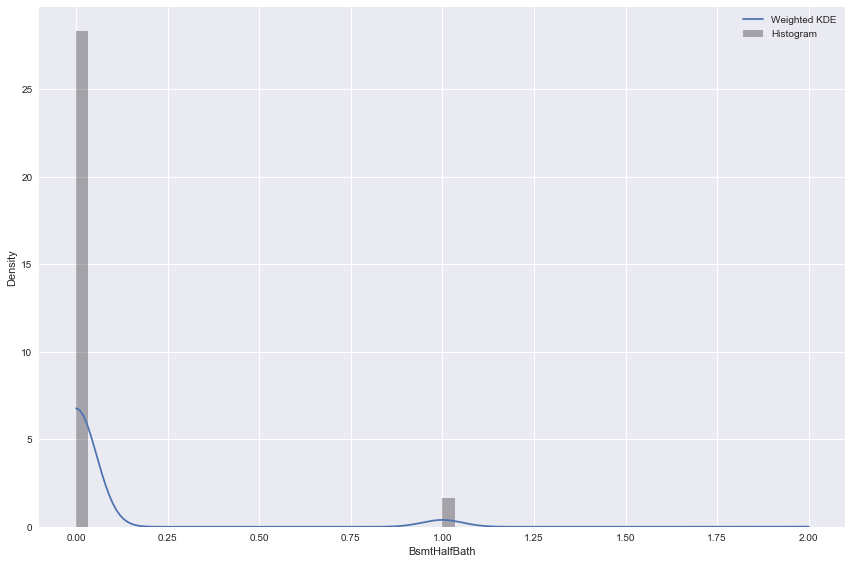

          BsmtHalfBath
Weight     1460.000000
Mean          0.057534
StdDev        0.238753
Min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
Max           2.000000
Skewness      4.103403
Kurtosis     16.396642


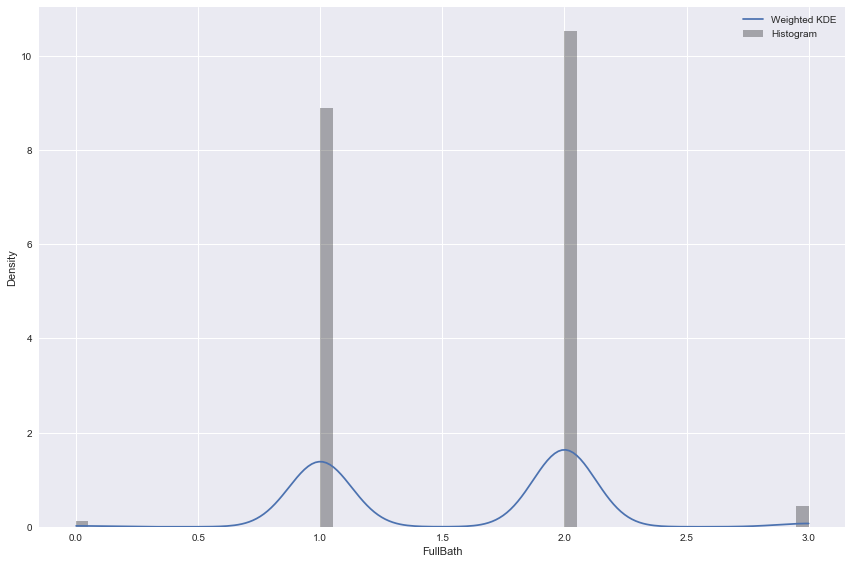

             FullBath
Weight    1460.000000
Mean         1.565068
StdDev       0.550916
Min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
Max          3.000000
Skewness     0.036562
Kurtosis    -0.857043


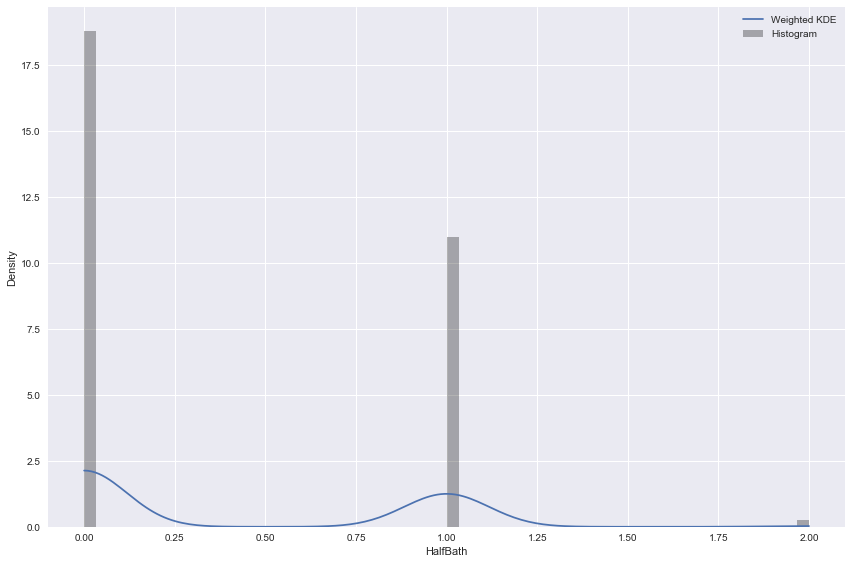

             HalfBath
Weight    1460.000000
Mean         0.382877
StdDev       0.502885
Min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
Max          2.000000
Skewness     0.675897
Kurtosis    -1.076927


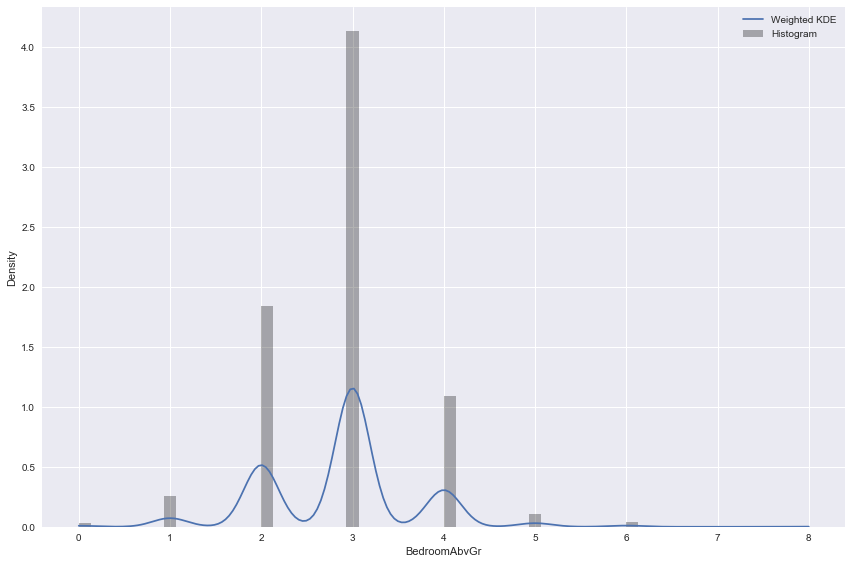

          BedroomAbvGr
Weight     1460.000000
Mean          2.866438
StdDev        0.815778
Min           0.000000
25%           2.000000
50%           3.000000
75%           3.000000
Max           8.000000
Skewness      0.211790
Kurtosis      2.230875


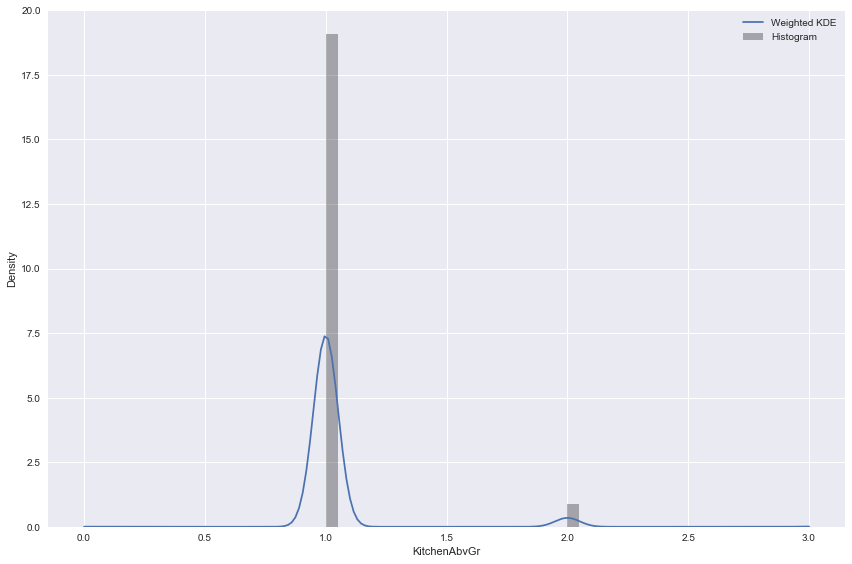

          KitchenAbvGr
Weight     1460.000000
Mean          1.046575
StdDev        0.220338
Min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
Max           3.000000
Skewness      4.488397
Kurtosis     21.532404


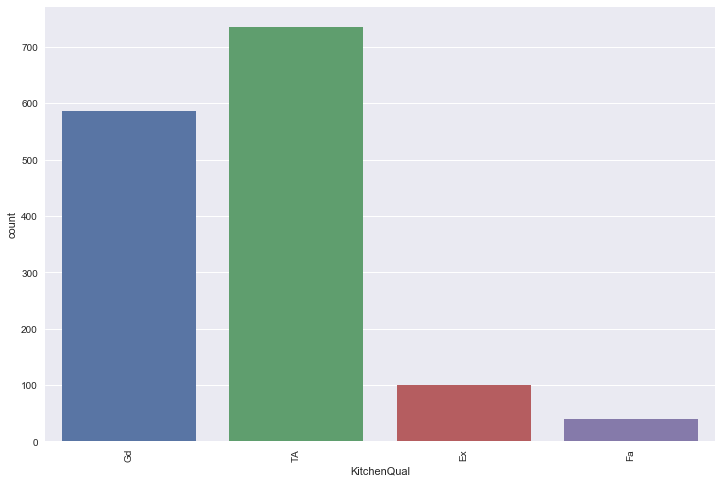

Level                     Weight
Ex                        100
Fa                        39
Gd                        586
TA                        735


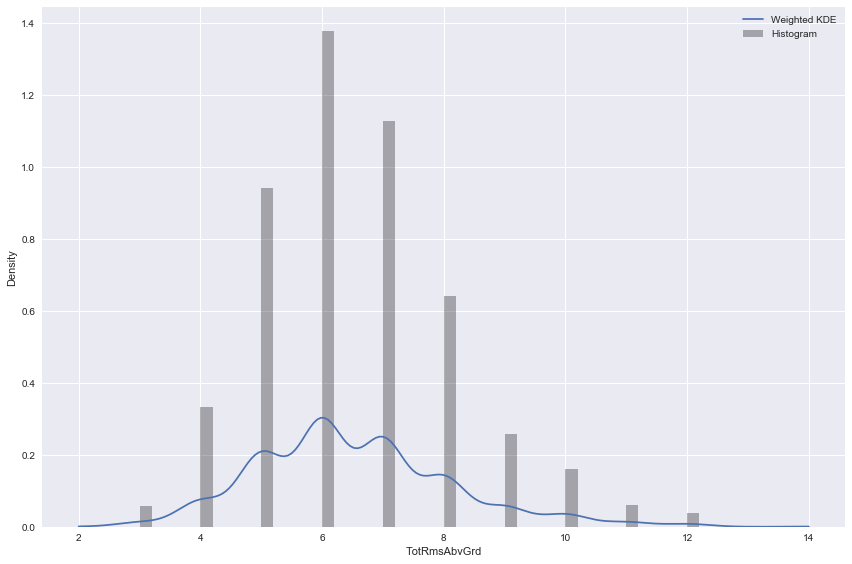

          TotRmsAbvGrd
Weight     1460.000000
Mean          6.517808
StdDev        1.625393
Min           2.000000
25%           5.000000
50%           6.000000
75%           7.000000
Max          14.000000
Skewness      0.676341
Kurtosis      0.880762


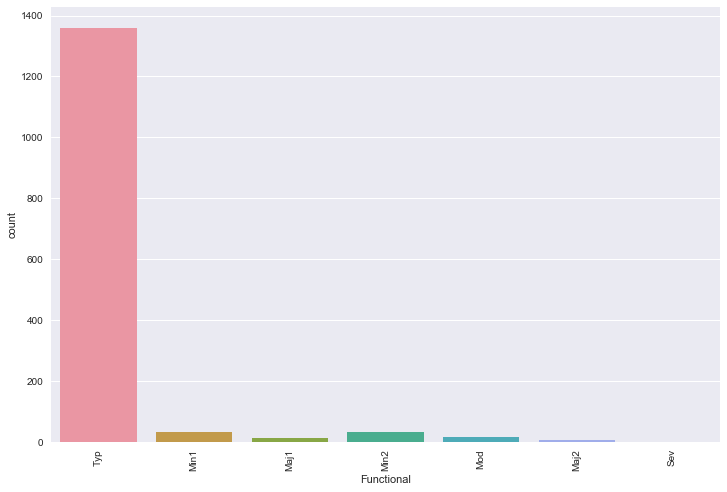

Level                     Weight
Maj1                      14
Maj2                      5
Min1                      31
Min2                      34
Mod                       15
Sev                       1
Typ                       1360


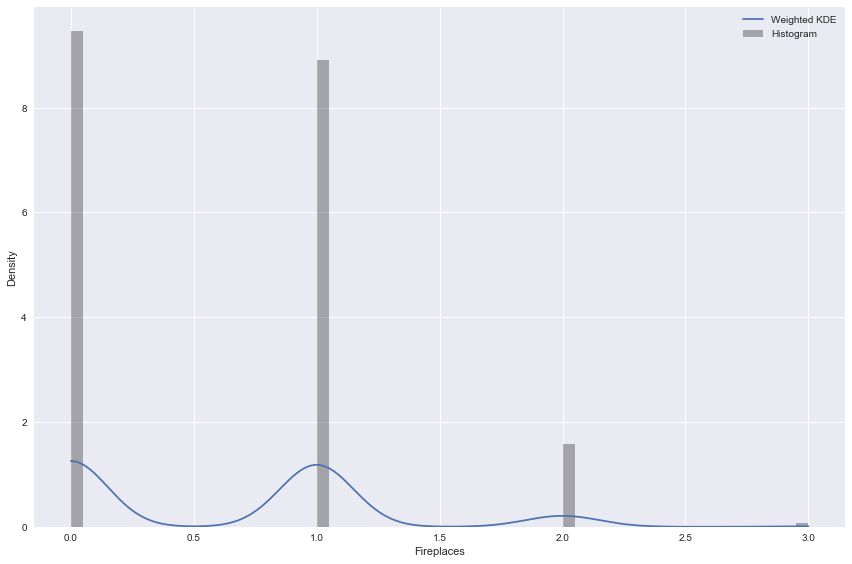

           Fireplaces
Weight    1460.000000
Mean         0.613014
StdDev       0.644666
Min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
Max          3.000000
Skewness     0.649565
Kurtosis    -0.217237


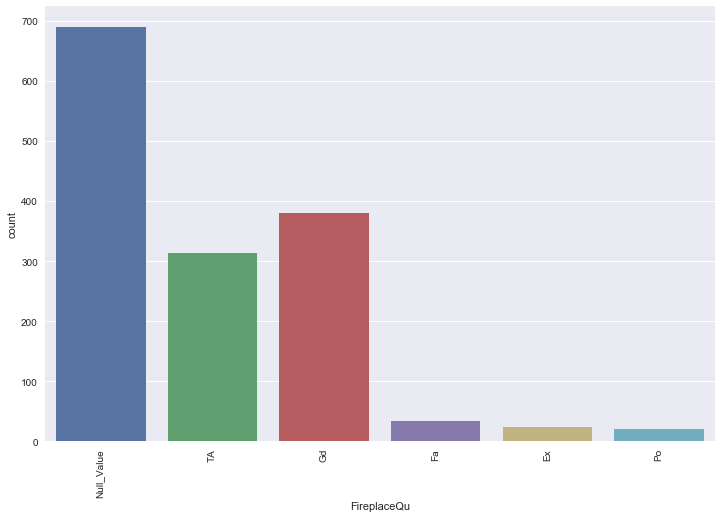

Level                     Weight
Ex                        24
Fa                        33
Gd                        380
Null_Value                690
Po                        20
TA                        313


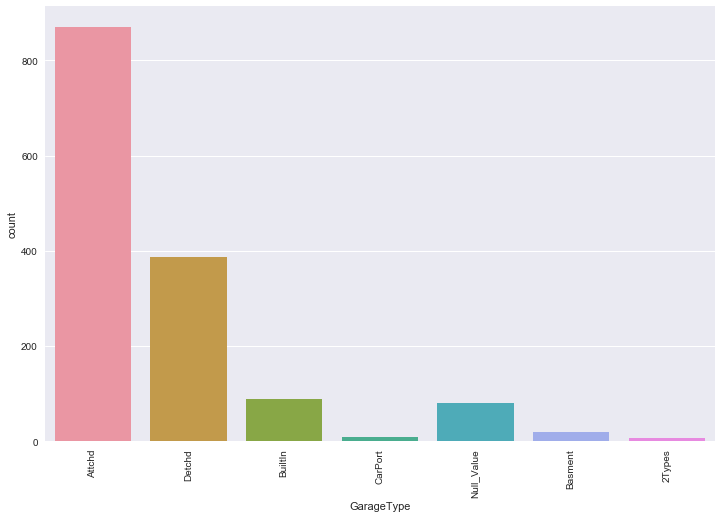

Level                     Weight
2Types                    6
Attchd                    870
Basment                   19
BuiltIn                   88
CarPort                   9
Detchd                    387
Null_Value                81


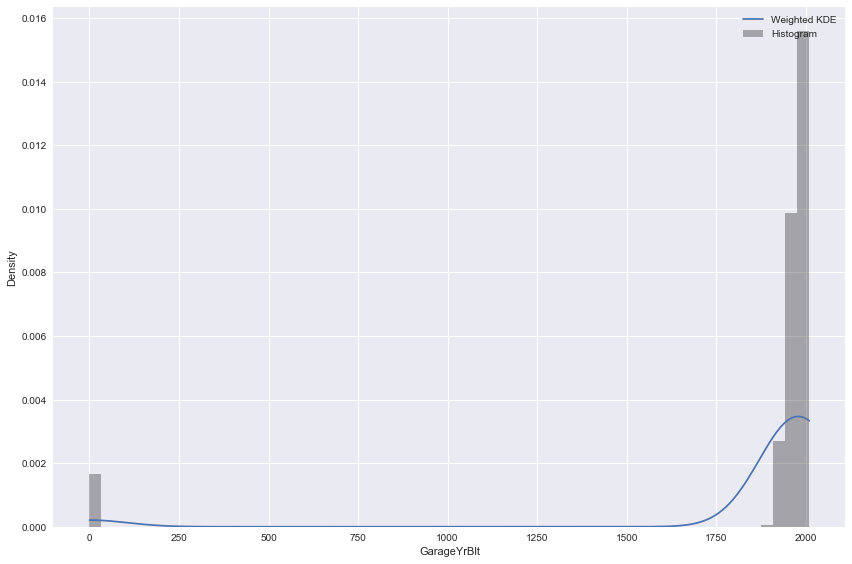

          GarageYrBlt
Weight    1460.000000
Mean      1868.739726
StdDev     453.697295
Min          0.000000
25%       1958.000000
50%       1977.000000
75%       2001.000000
Max       2010.000000
Skewness    -3.869501
Kurtosis    13.043226


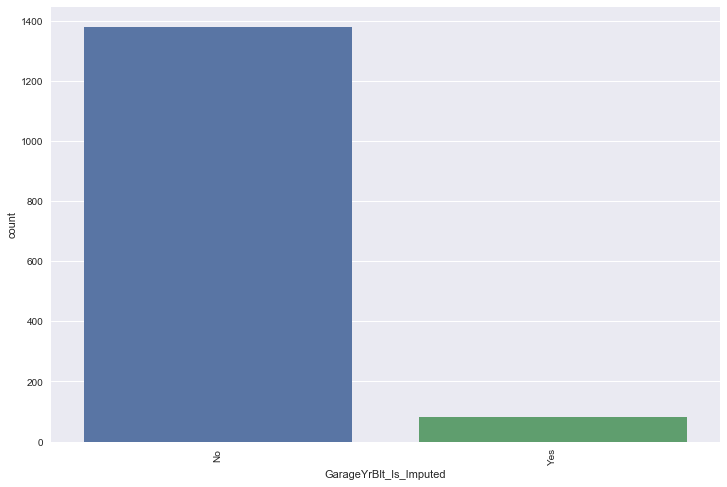

Level                     Weight
No                        1379
Yes                       81


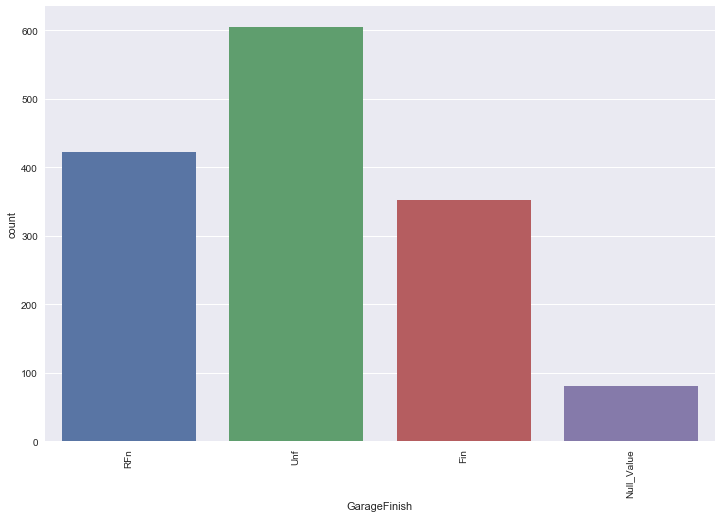

Level                     Weight
Fin                       352
Null_Value                81
RFn                       422
Unf                       605


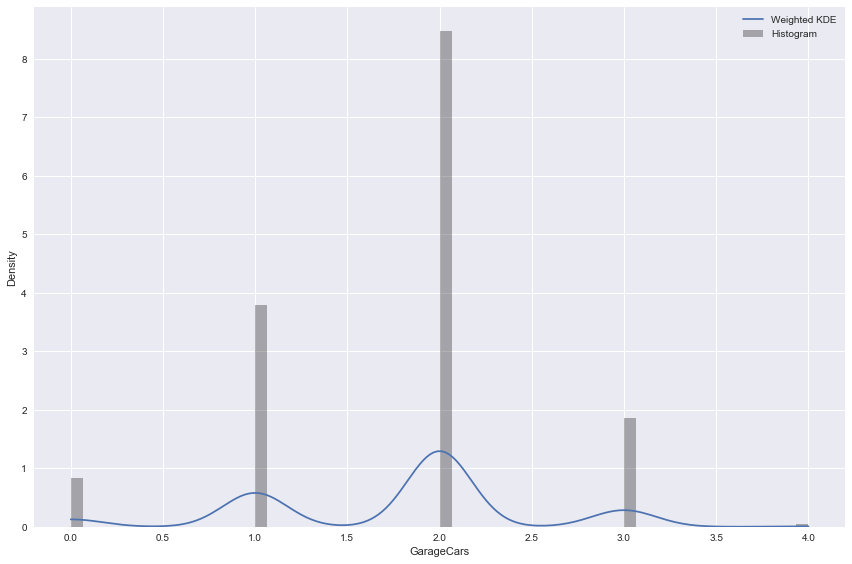

           GarageCars
Weight    1460.000000
Mean         1.767123
StdDev       0.747315
Min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
Max          4.000000
Skewness    -0.342549
Kurtosis     0.220998


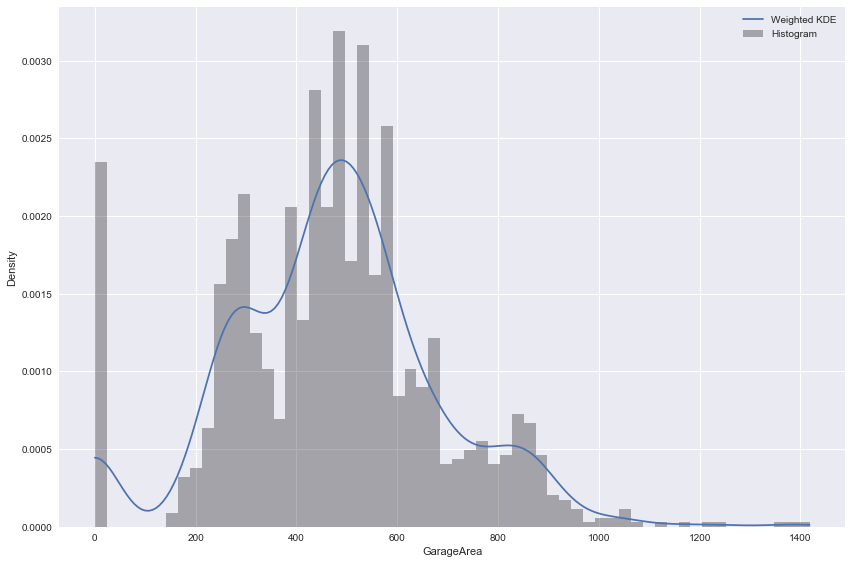

           GarageArea
Weight    1460.000000
Mean       472.980137
StdDev     213.804841
Min          0.000000
25%        334.500000
50%        480.000000
75%        576.000000
Max       1418.000000
Skewness     0.179981
Kurtosis     0.917067


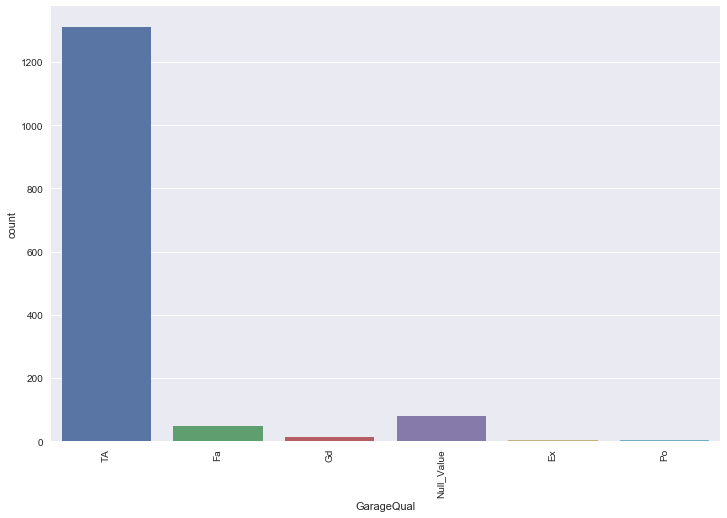

Level                     Weight
Ex                        3
Fa                        48
Gd                        14
Null_Value                81
Po                        3
TA                        1311


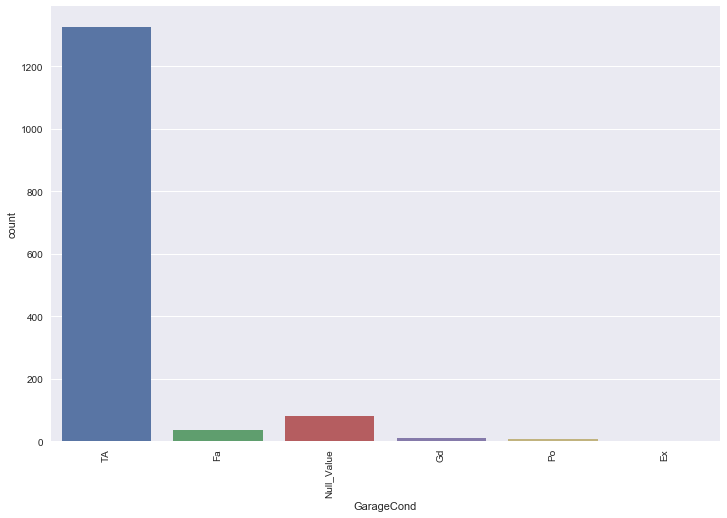

Level                     Weight
Ex                        2
Fa                        35
Gd                        9
Null_Value                81
Po                        7
TA                        1326


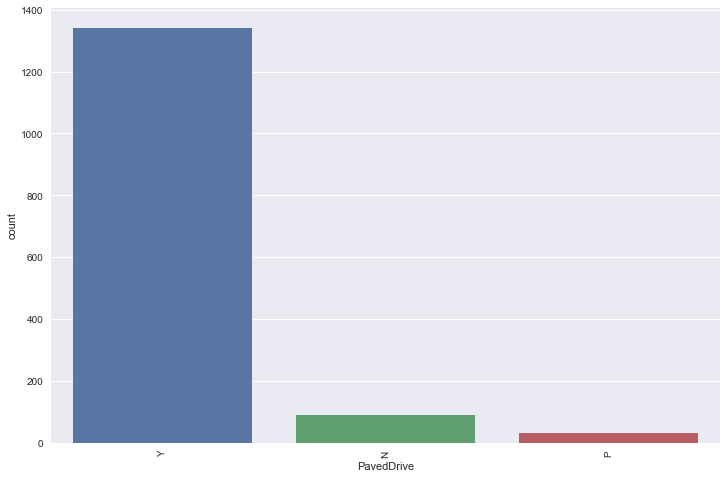

Level                     Weight
N                         90
P                         30
Y                         1340


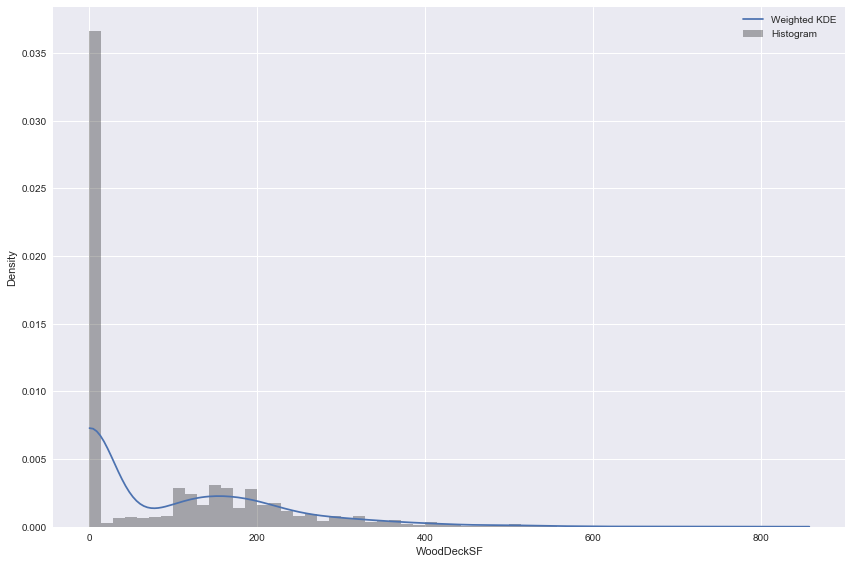

           WoodDeckSF
Weight    1460.000000
Mean        94.244521
StdDev     125.338794
Min          0.000000
25%          0.000000
50%          0.000000
75%        168.000000
Max        857.000000
Skewness     1.541376
Kurtosis     2.992951


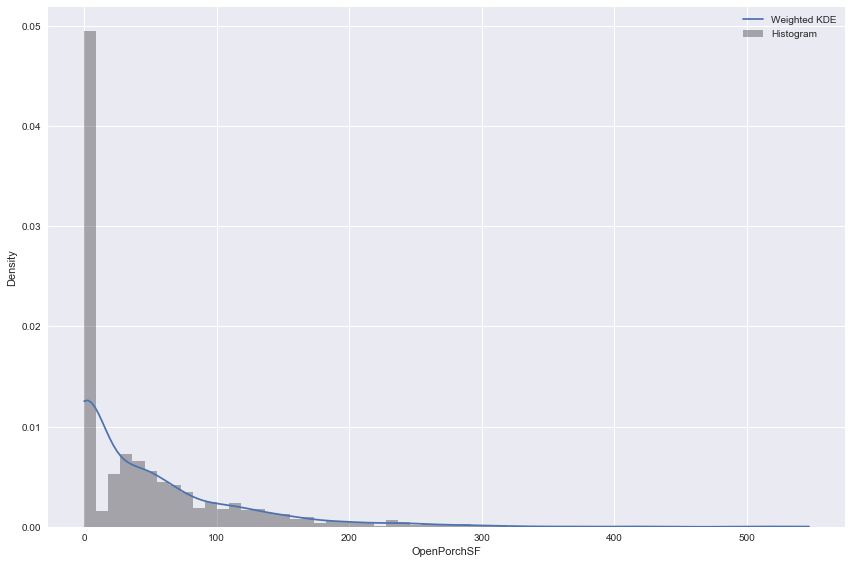

          OpenPorchSF
Weight    1460.000000
Mean        46.660274
StdDev      66.256028
Min          0.000000
25%          0.000000
50%         25.000000
75%         68.000000
Max        547.000000
Skewness     2.364342
Kurtosis     8.490336


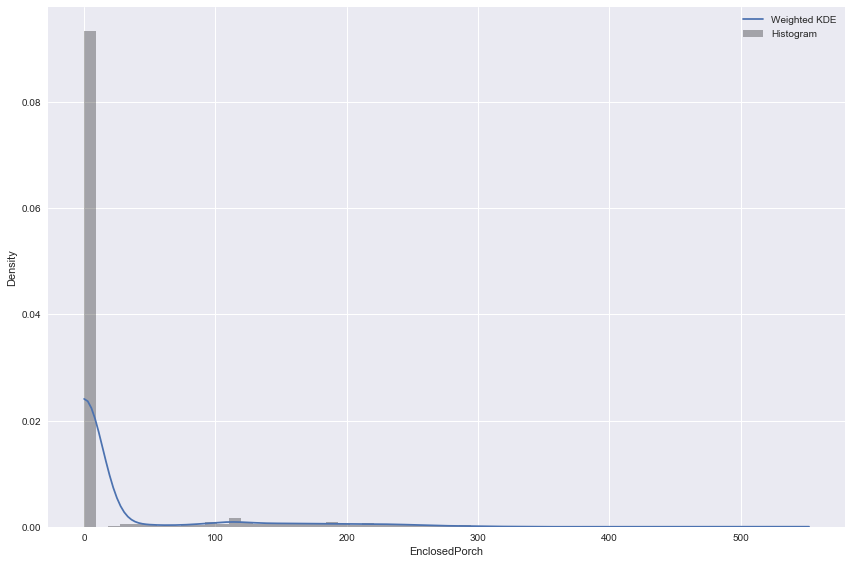

          EnclosedPorch
Weight      1460.000000
Mean          21.954110
StdDev        61.119149
Min            0.000000
25%            0.000000
50%            0.000000
75%            0.000000
Max          552.000000
Skewness       3.089872
Kurtosis      10.430766


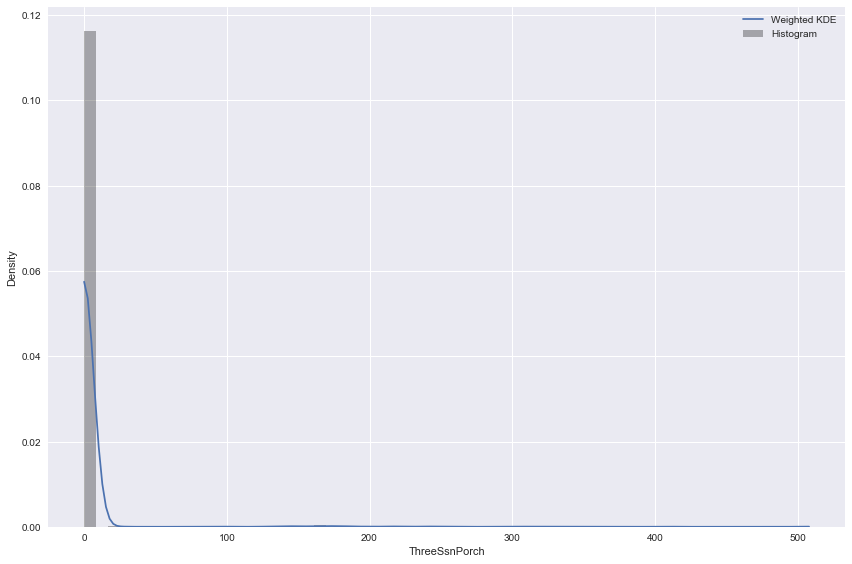

          ThreeSsnPorch
Weight      1460.000000
Mean           3.409589
StdDev        29.317331
Min            0.000000
25%            0.000000
50%            0.000000
75%            0.000000
Max          508.000000
Skewness      10.304342
Kurtosis     123.662379


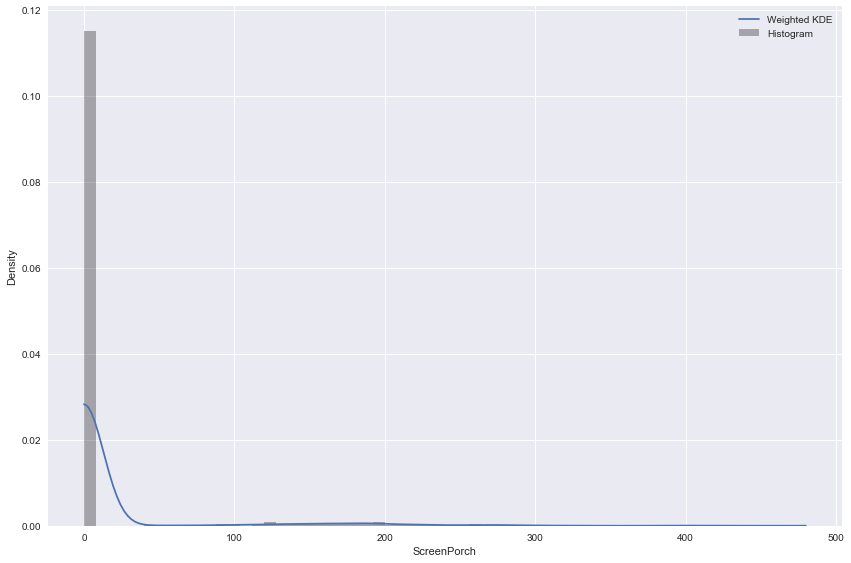

          ScreenPorch
Weight    1460.000000
Mean        15.060959
StdDev      55.757415
Min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
Max        480.000000
Skewness     4.122214
Kurtosis    18.439068


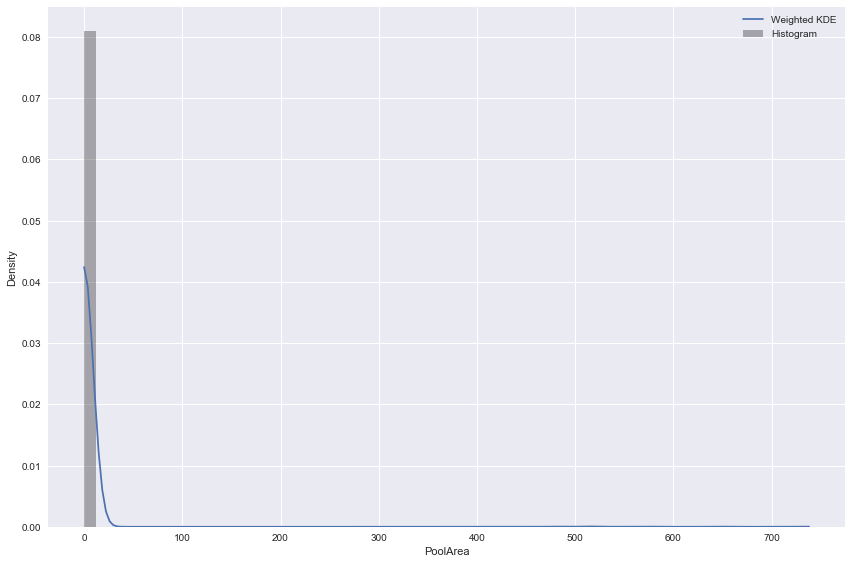

             PoolArea
Weight    1460.000000
Mean         2.758904
StdDev      40.177307
Min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
Max        738.000000
Skewness    14.828374
Kurtosis   223.268499


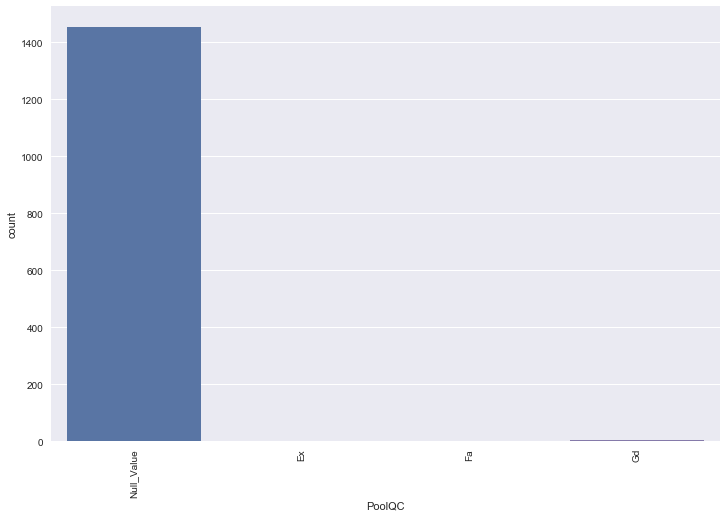

Level                     Weight
Ex                        2
Fa                        2
Gd                        3
Null_Value                1453


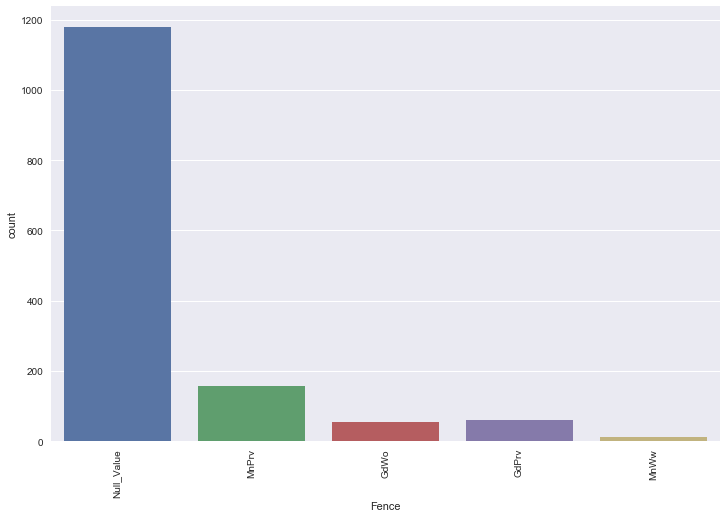

Level                     Weight
GdPrv                     59
GdWo                      54
MnPrv                     157
MnWw                      11
Null_Value                1179


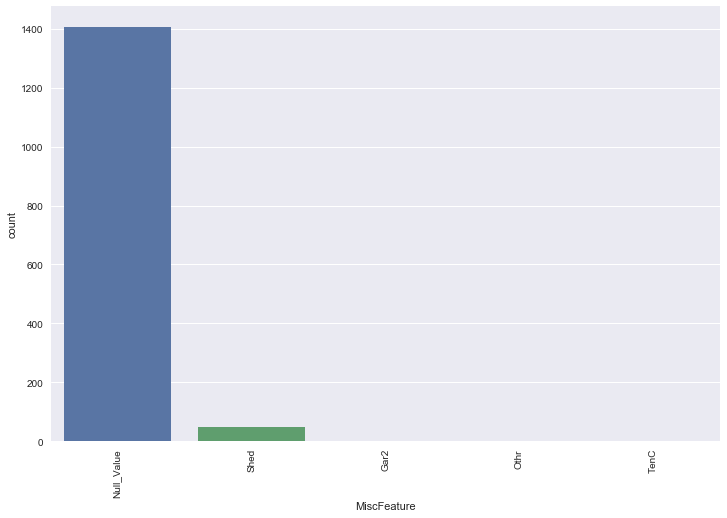

Level                     Weight
Gar2                      2
Null_Value                1406
Othr                      2
Shed                      49
TenC                      1


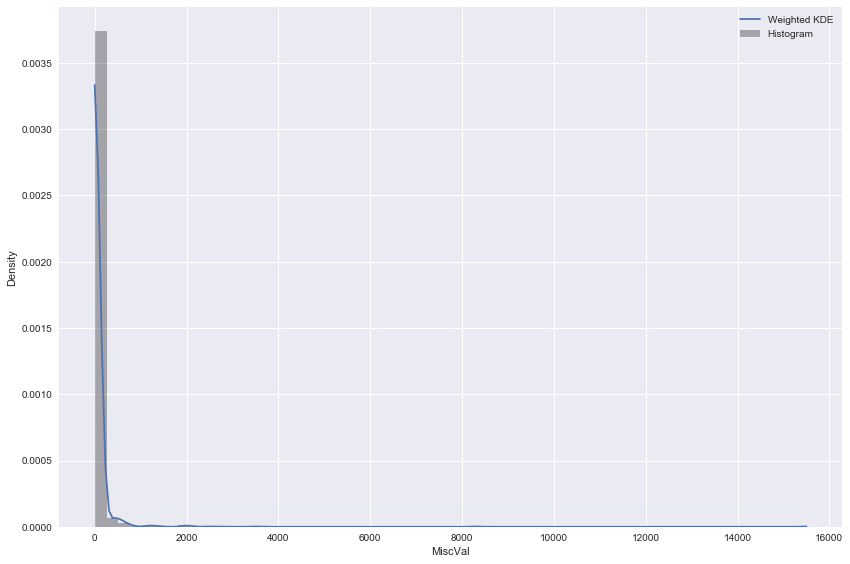

               MiscVal
Weight     1460.000000
Mean         43.489041
StdDev      496.123024
Min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
Max       15500.000000
Skewness     24.476794
Kurtosis    701.003342


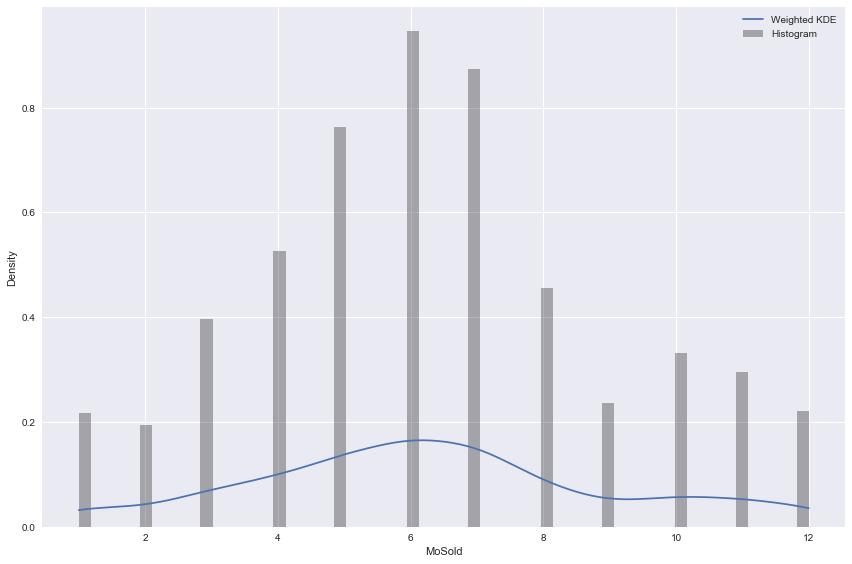

               MoSold
Weight    1460.000000
Mean         6.321918
StdDev       2.703626
Min          1.000000
25%          5.000000
50%          6.000000
75%          8.000000
Max         12.000000
Skewness     0.212053
Kurtosis    -0.404109


In [12]:
#warnings.filterwarnings('ignore')

model_data.eda()

<a name="part-two---predictor-correlation"></a>
# Part Two - Predictor Correlations and Clustering

In any modeling project it is important to understand correlations that exist between predictor variables. This plays a role in variable selection and can effect the speed of convergence when fitting models. Aside from the last section, correlations between continuous and categorical variables are explored separately.

Instantiate feature_clusters

In [13]:
feature_clusters = FeatureClusters(model_data)

<a name="correlation-between-continuous-variables"></a>
## Correlation Between Continuous Variables

The Pearson correlation is calculated for each pair of continuous variables. The scatter plot and Pearson correlation are given for each pair of variables with correlation above p_threshold (defaulted to 0.5). If you have ordinal variables or your data greatly violates the assumptions of a Pearson correlation, it may be worth adding either Kendal's $\tau$ or Spearman's $\rho$ as alternative measures of correlation. 

Pearson Correlation - Predictors
GarageCars and GarageArea = 0.88
GrLivArea and TotRmsAbvGrd = 0.83
TotalBsmtSF and FirstFlrSF = 0.82
SecondFlrSF and GrLivArea = 0.69
BedroomAbvGr and TotRmsAbvGrd = 0.68
BsmtFinSF1 and BsmtFullBath = 0.65
GrLivArea and FullBath = 0.63
SecondFlrSF and TotRmsAbvGrd = 0.62
SecondFlrSF and HalfBath = 0.61
GarageYrBlt and GarageCars = 0.6
YearBuilt and YearRemodAdd = 0.59
FirstFlrSF and GrLivArea = 0.57
GarageYrBlt and GarageArea = 0.56
FullBath and TotRmsAbvGrd = 0.55
YearBuilt and GarageCars = 0.54
BsmtFinSF1 and TotalBsmtSF = 0.52
GrLivArea and BedroomAbvGr = 0.52
SecondFlrSF and BedroomAbvGr = 0.5


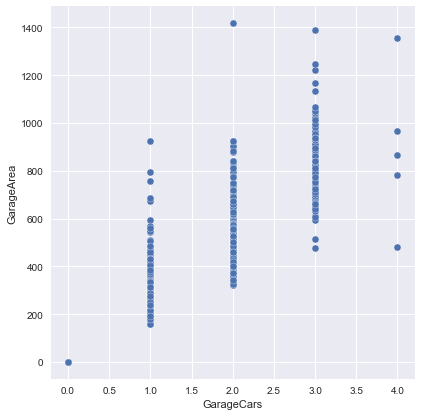

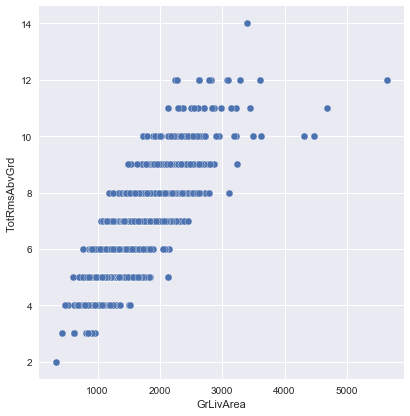

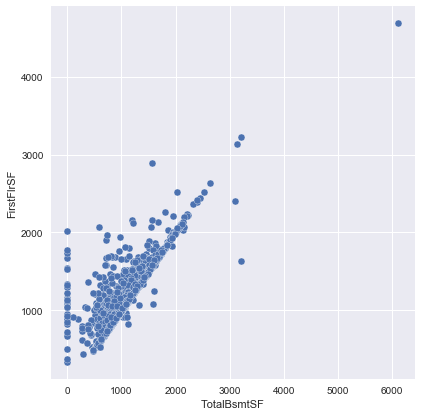

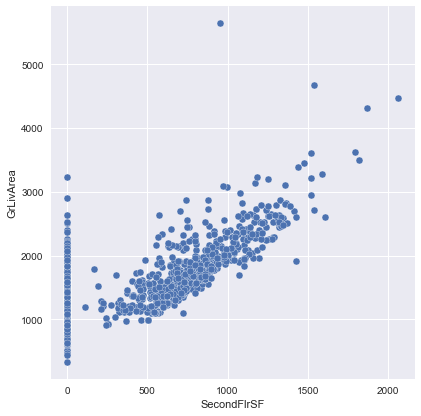

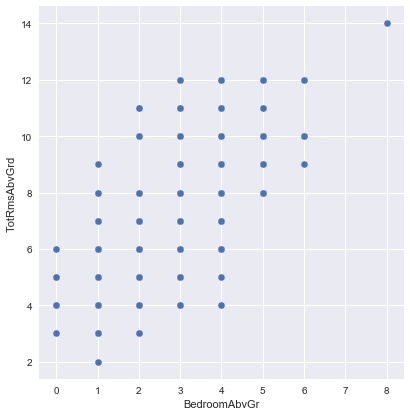

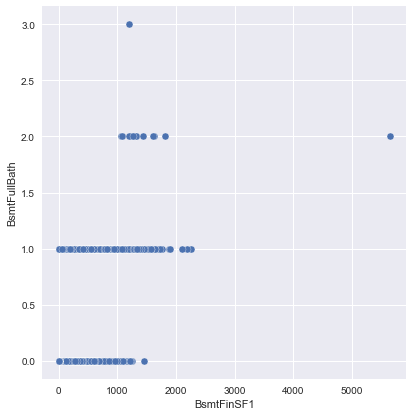

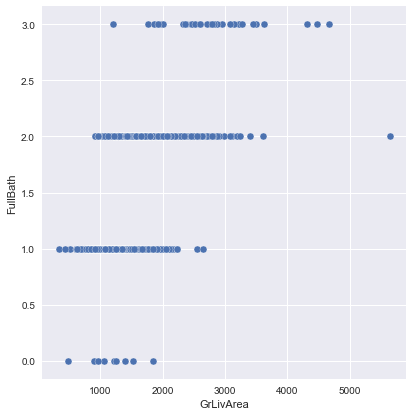

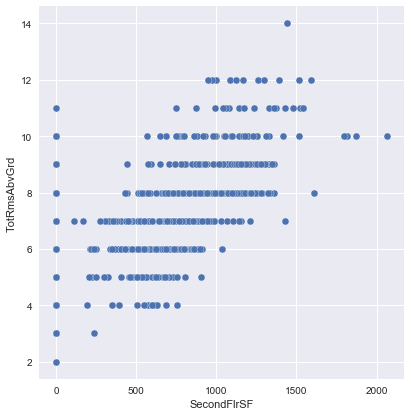

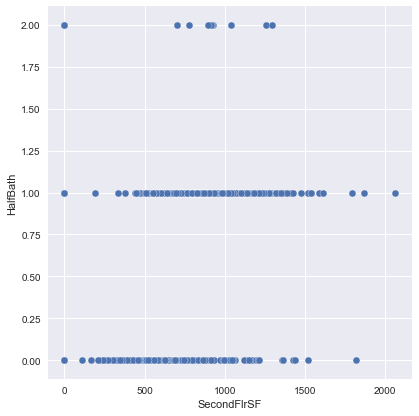

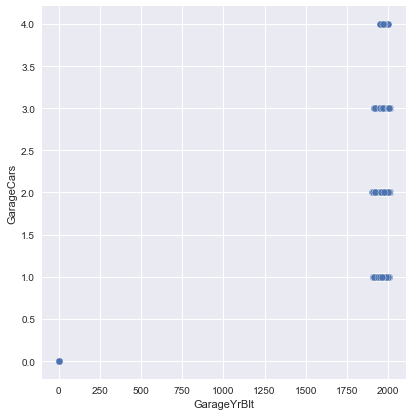

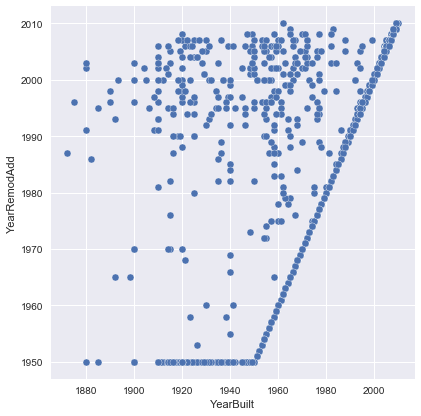

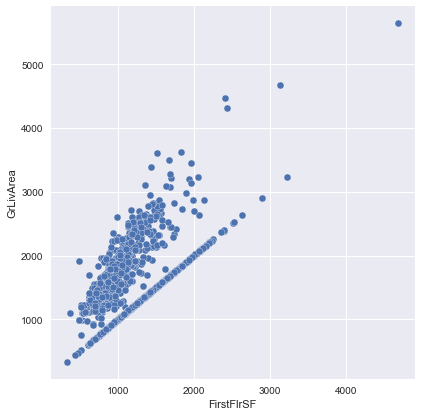

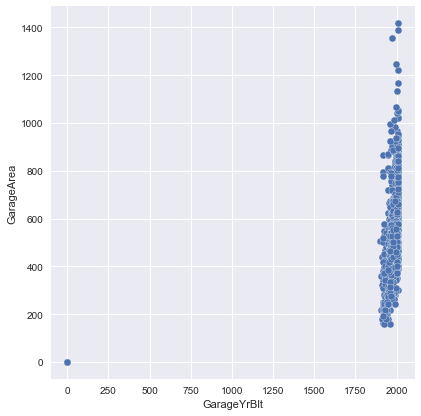

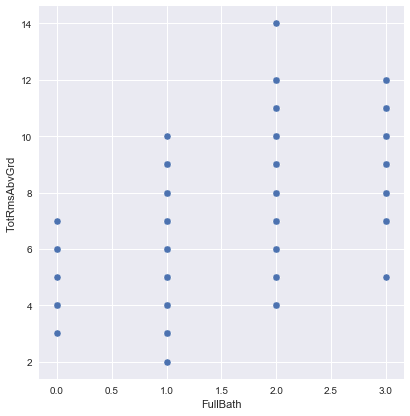

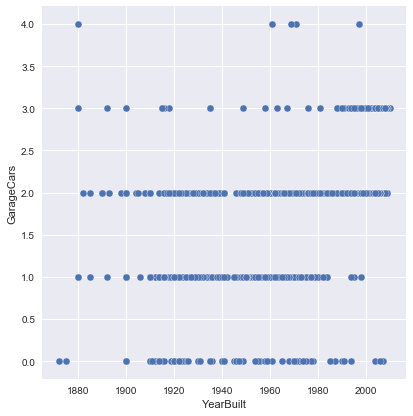

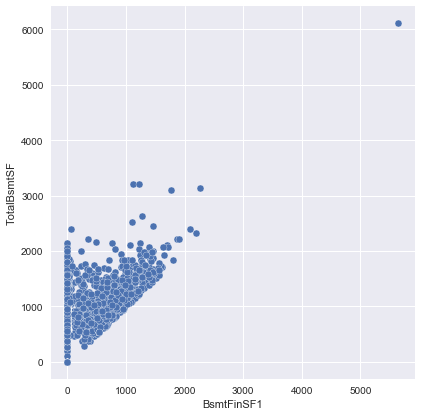

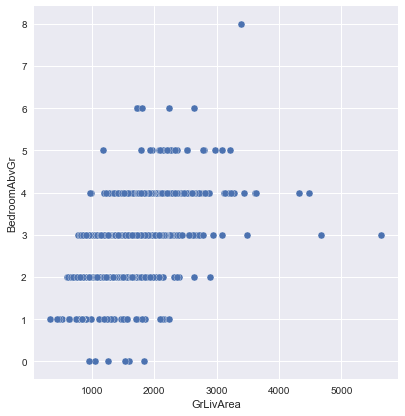

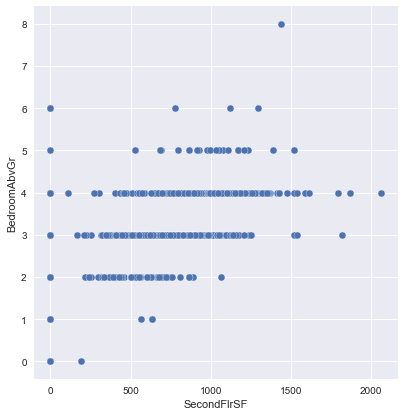

In [14]:
feature_clusters.correlations_continuous()

Above we looked for pair-wise correlations, below we take a broader view and look at overall dimensionality. Principal component analysis (PCA) is a method of finding latent features (i.e. principal components) that describe a large portion of the variance among the predictor variables. Below is a graph the portion of the variance explained by each principal component on its own (top) and the cumulative variance explained by the first $n$ components (bottom). A sharp decay in the top graph implies that there is a lot of redundancy in the predictor variables and dimension reduction should be done. By default (p_normalize = True) each variable is normalized so that it has a mean of 0 and standard deviation of 1. This avoids creating a bias for the principal components to tend to variables with larger scales. It is important to note that PCA projects your features onto a *linear* subspace of the feature space. If you are interested in non-linear dimension reduction, variational autoencoders would be another option to consider.

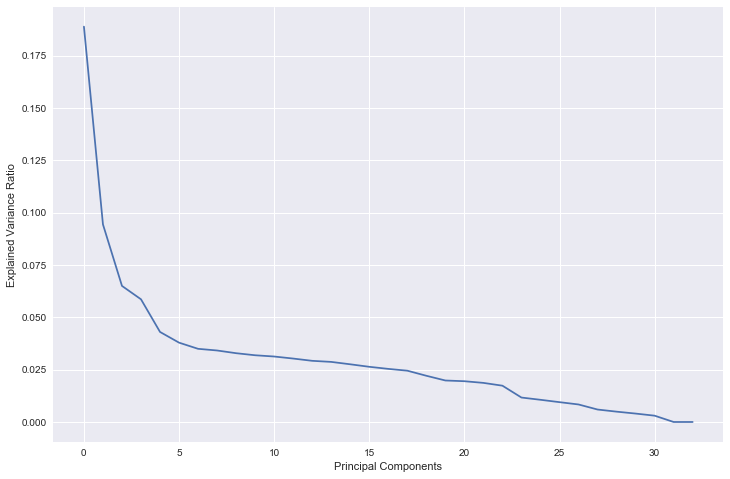

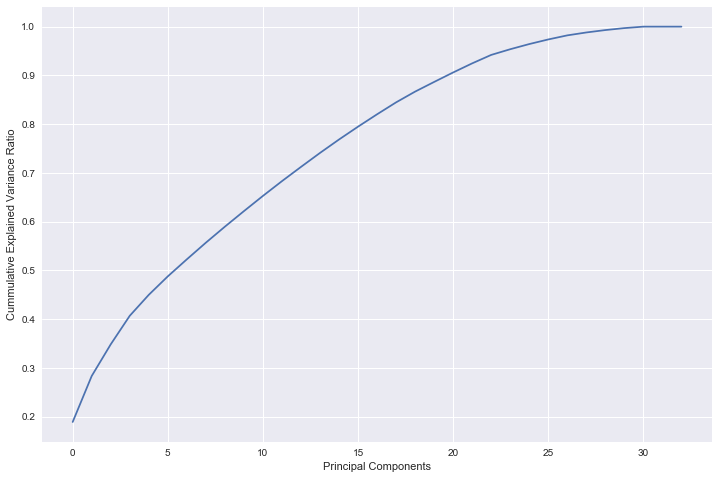

In [15]:
feature_clusters.pca_cont()

In order to help with dimension reduction, it is often useful to know which groups of variables are correlated (also known as feature agglomeration). We will need some notion of distance on the feature space in order to find variables that are "close" together. To do this, define the following pseudometric $d$ on the feature space using Pearson correlation ($r$).

$$d(x,y) = 1 - |corr_r(x,y)|$$

A feature is then assigned to a cluster when it is within p_threshold (defaulted to 0.5) of some feature in that cluster. The dendogram will help visualize how the clusters are formed. Prior to calculating the correlation, each variable is normalized so that the mean is 0 and variance is 1. To calculate the feature clusters without normalization, set p_normalize = False.  

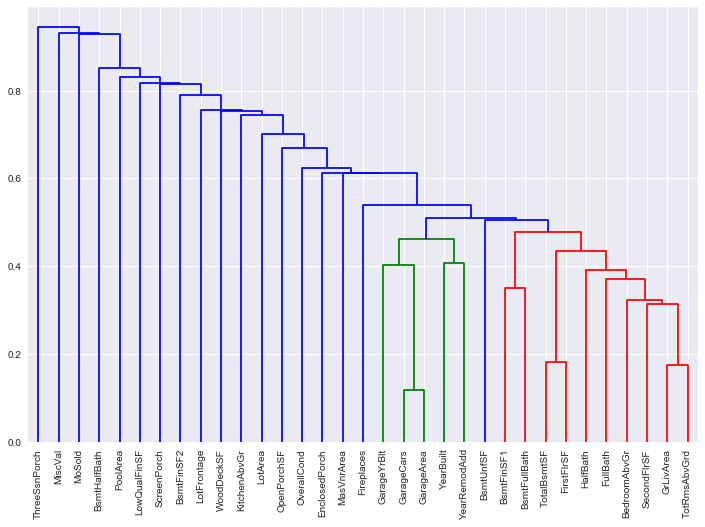

    Cluster        Feature
23        1     GarageCars
3         1      YearBuilt
4         1   YearRemodAdd
24        1     GarageArea
22        1    GarageYrBlt
20        2   TotRmsAbvGrd
18        2   BedroomAbvGr
17        2       HalfBath
14        2   BsmtFullBath
13        2      GrLivArea
16        2       FullBath
9         2    TotalBsmtSF
6         2     BsmtFinSF1
10        2     FirstFlrSF
11        2    SecondFlrSF
8         3      BsmtUnfSF
21        4     Fireplaces
5         5     MasVnrArea
27        6  EnclosedPorch
2         7    OverallCond
26        8    OpenPorchSF
1         9        LotArea
19       10   KitchenAbvGr
25       11     WoodDeckSF
0        12    LotFrontage
7        13     BsmtFinSF2
29       14    ScreenPorch
12       15   LowQualFinSF
30       16       PoolArea
15       17   BsmtHalfBath
32       18         MoSold
31       19        MiscVal
28       20  ThreeSsnPorch


In [16]:
feature_clusters.cont_feature_clusters()

<a name="correlation-between-categorical-variables"></a>
## Correlation Between Categorical Variables

This section is very similar to above, except with categorical variables. For each pair of categorical variables, we compute the Cramer's V statistic ($\phi_c$), which provides a measure of correlation between nominal variables. Cramer's V, $\phi_c \in [0,1]$, is defined so that values close to 1 imply a higher level of correlation. A stacked bar chart and $\phi_c$ are given for each pair with correlation above p_threshold (defaulted to 0.5). The bar charts are scaled so that it shows percentage of exposure in each category; use p_scaled = "No" for unscaled charts or p_scaled = "Both" for both a scaled and unscaled chart. 

Cramer's V Correlation - Predictors
MasVnrType and MasVnrArea_Is_Imputed = 1.0
GarageType and GarageYrBlt_Is_Imputed = 1.0
GarageYrBlt_Is_Imputed and GarageFinish = 1.0
GarageYrBlt_Is_Imputed and GarageQual = 1.0
GarageYrBlt_Is_Imputed and GarageCond = 1.0
MSSubClass and BldgType = 0.9
MSSubClass and HouseStyle = 0.85
Exterior1st and Exterior2nd = 0.76
GarageQual and GarageCond = 0.71
GarageType and GarageFinish = 0.69
MSZoning and Neighborhood = 0.65
OverallQual and ExterQual = 0.62
GarageFinish and GarageQual = 0.59
GarageFinish and GarageCond = 0.59
BsmtQual and BsmtFinType1 = 0.58
ExterQual and KitchenQual = 0.55
OverallQual and KitchenQual = 0.55
Foundation and BsmtQual = 0.53
BsmtQual and BsmtCond = 0.53
BsmtExposure and BsmtFinType1 = 0.52
BsmtQual and BsmtExposure = 0.52
BsmtCond and BsmtFinType1 = 0.51
BsmtQual and BsmtFinType2 = 0.5
Neighborhood and ExterQual = 0.5


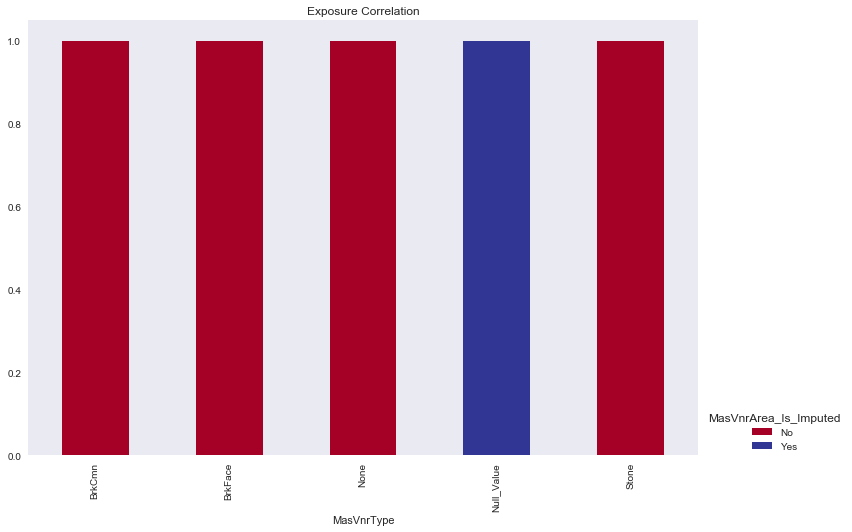

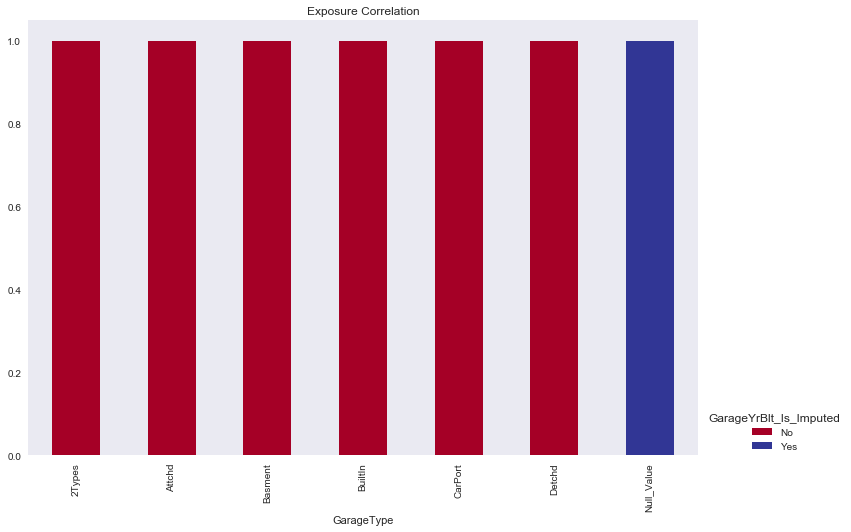

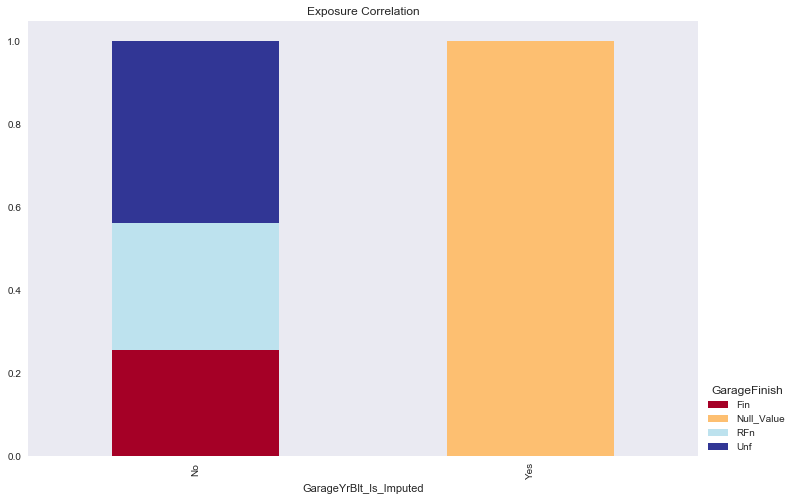

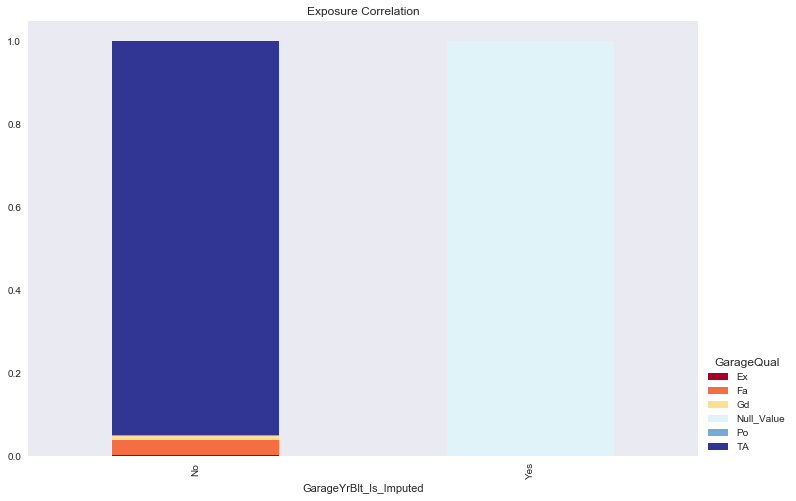

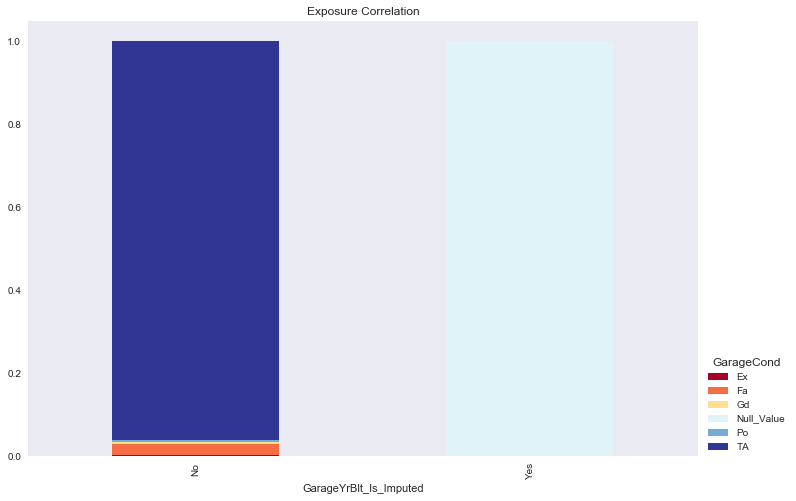

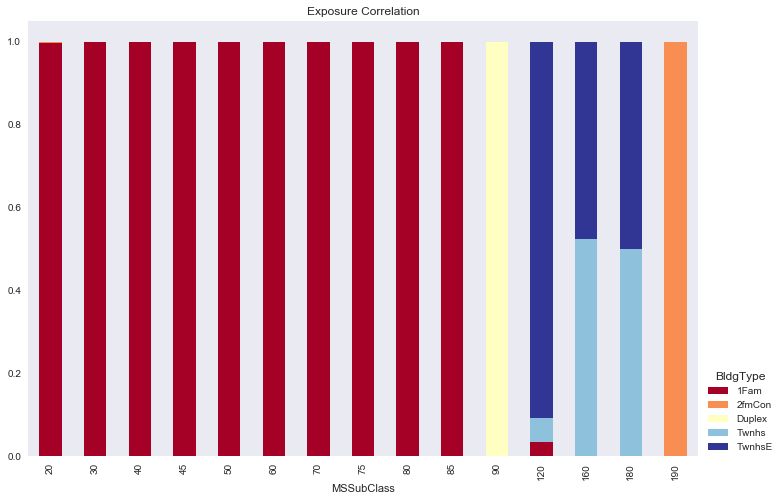

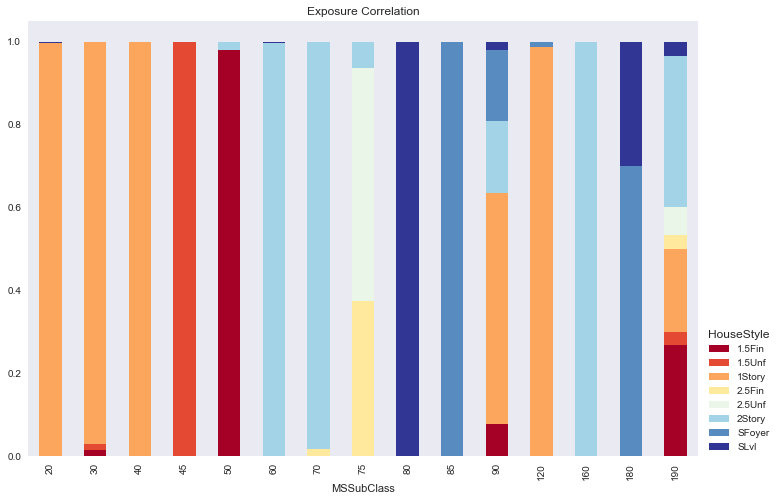

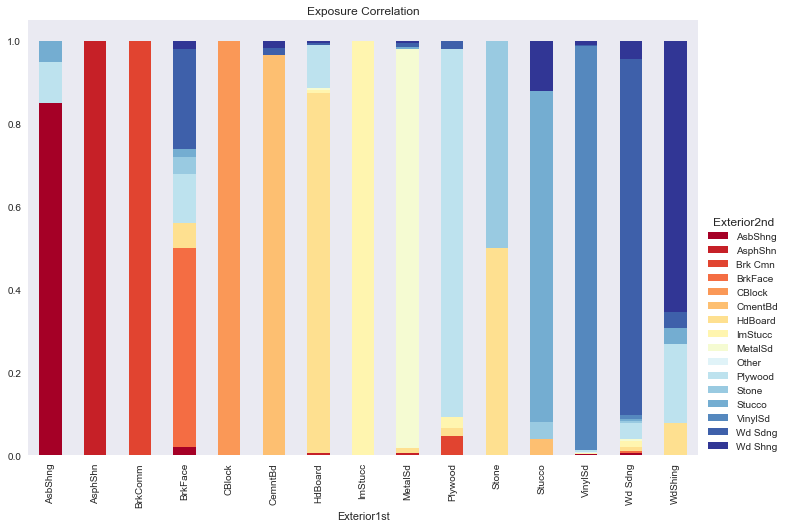

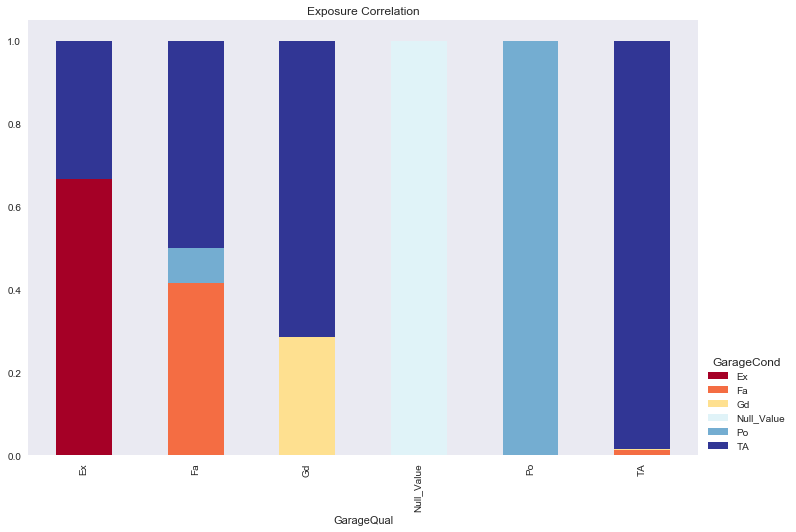

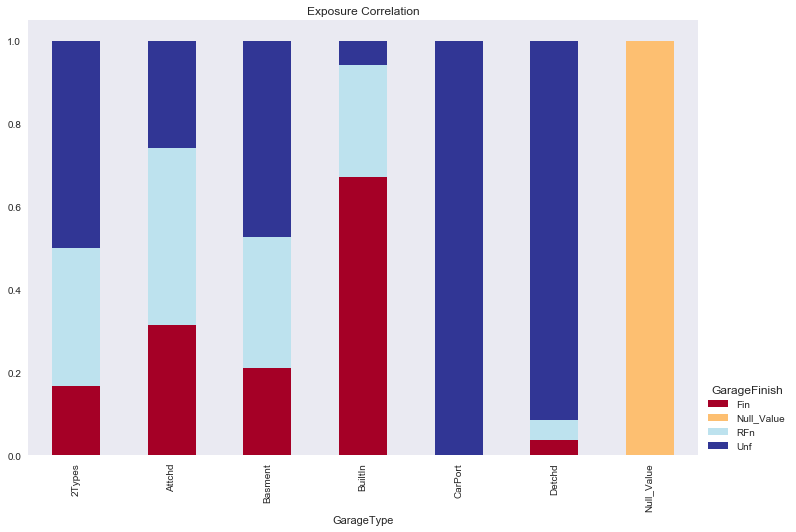

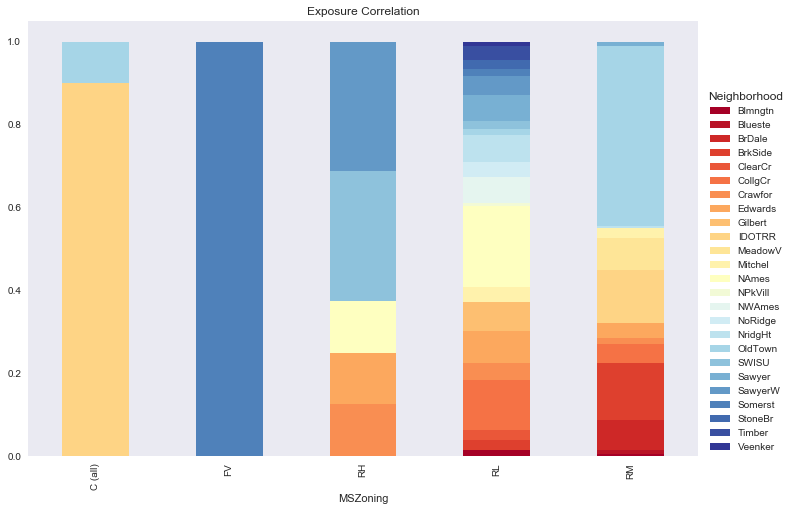

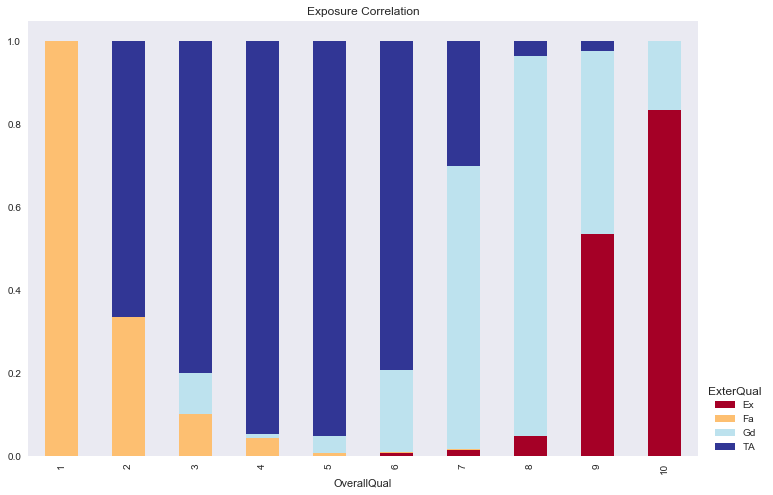

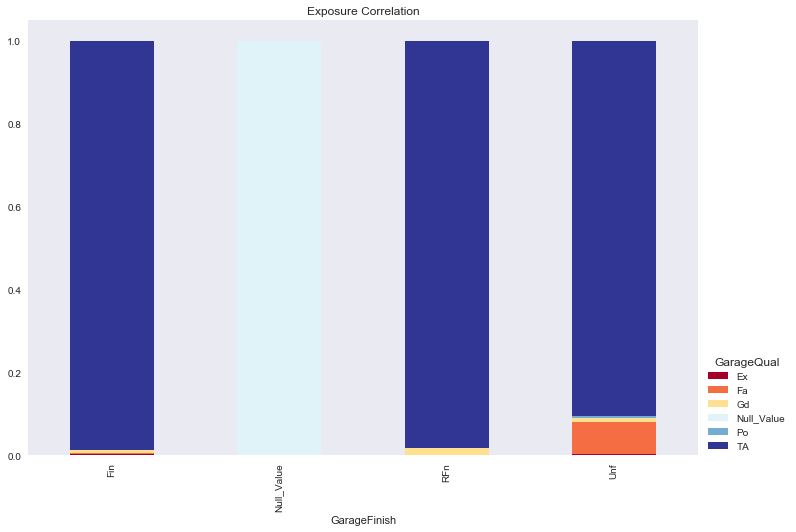

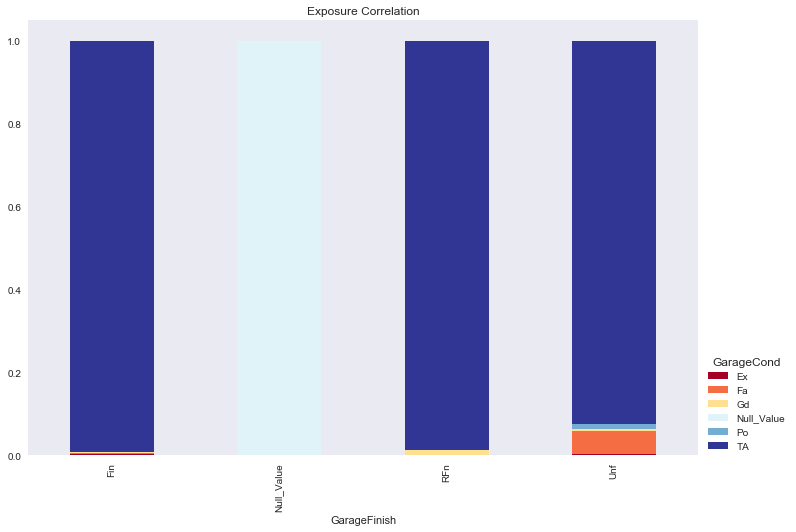

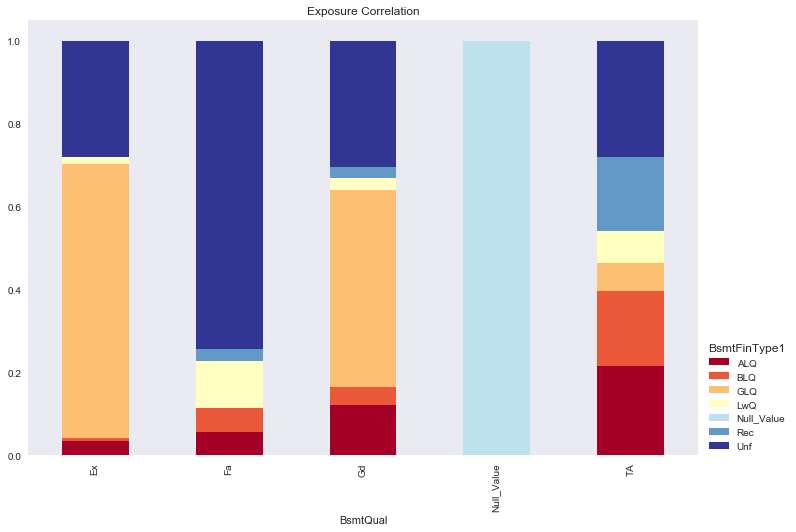

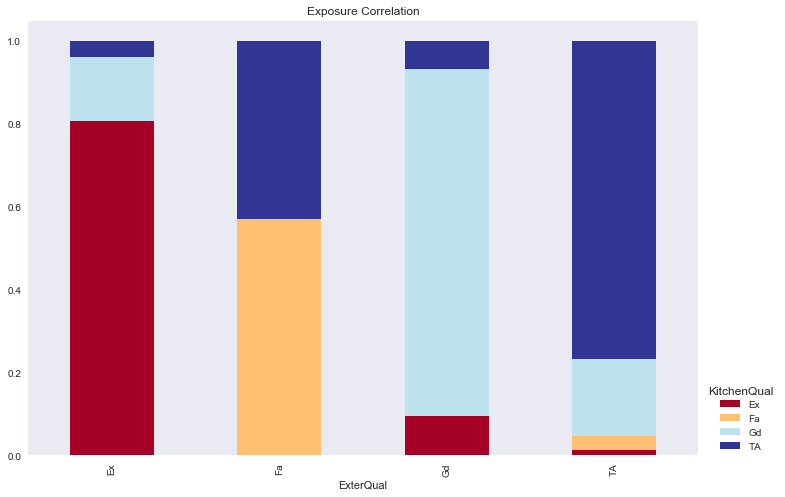

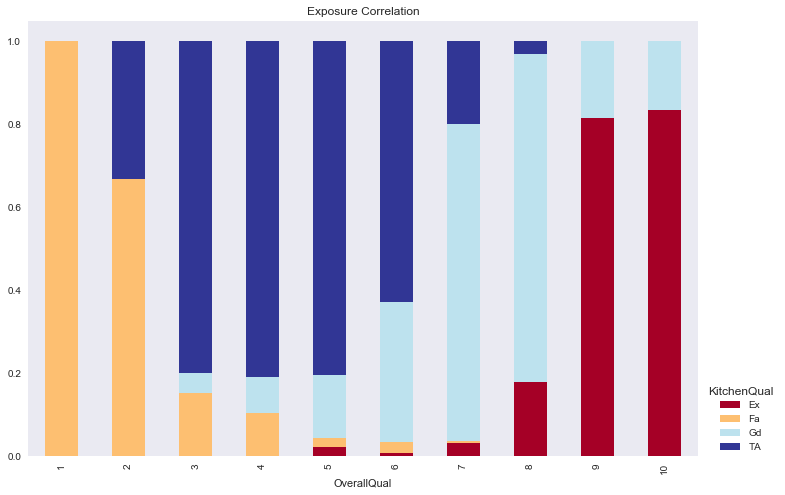

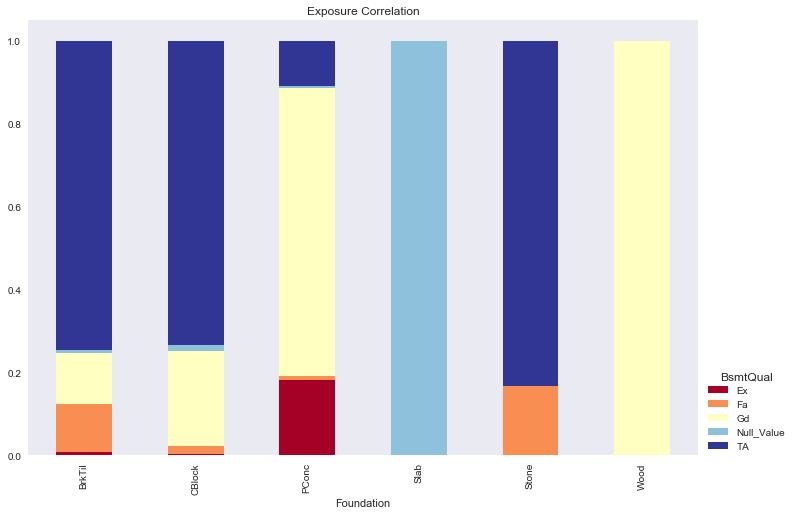

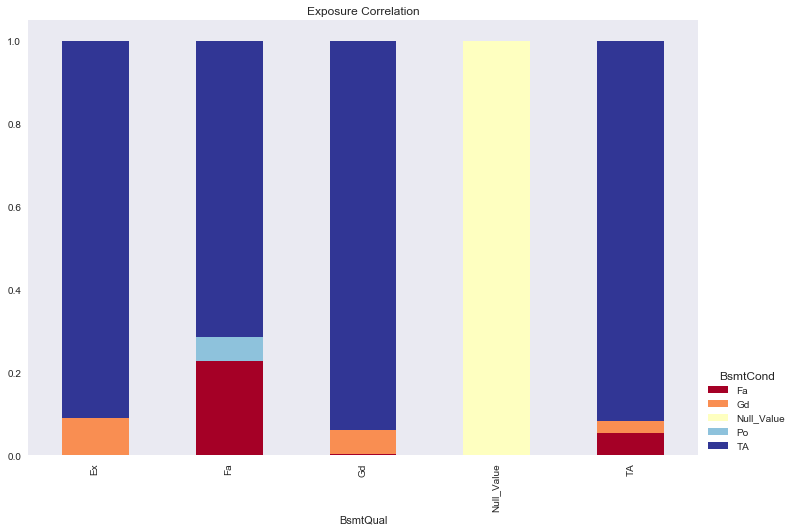

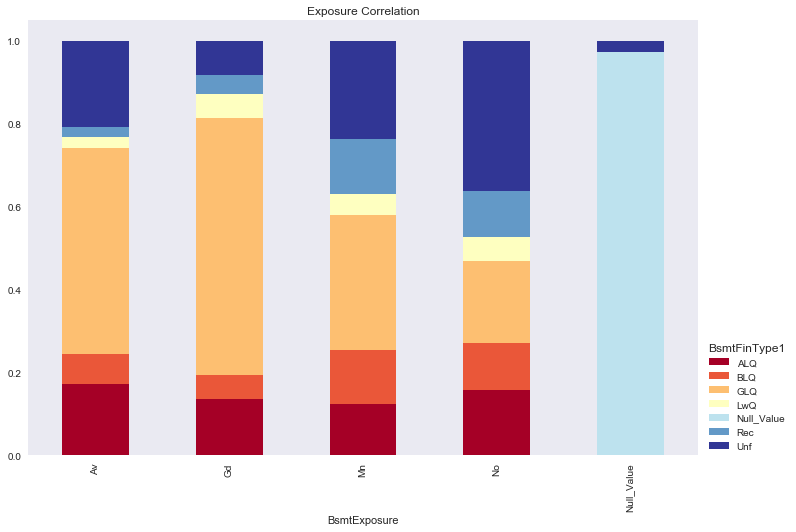

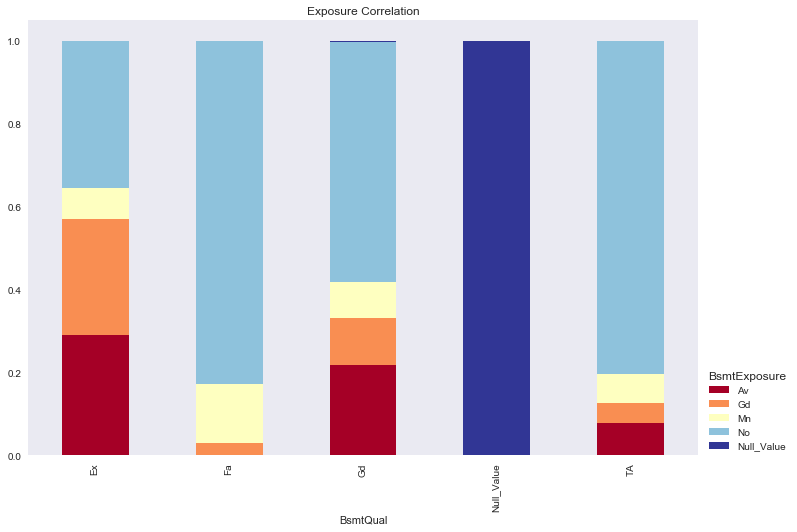

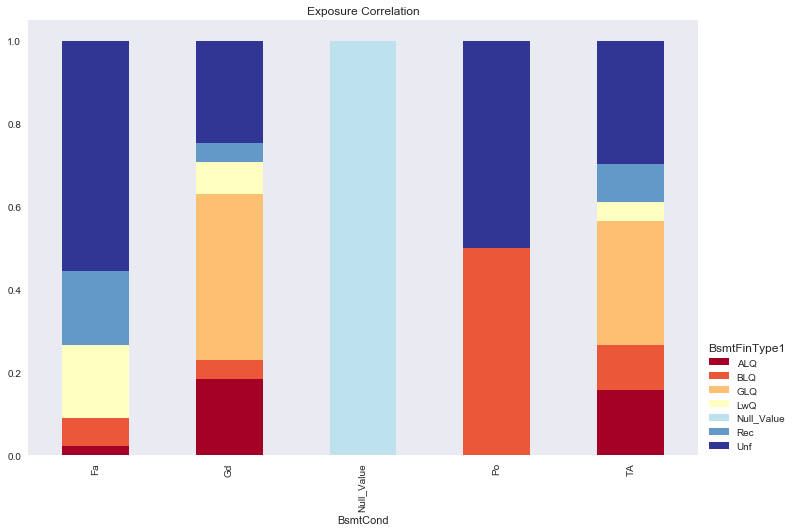

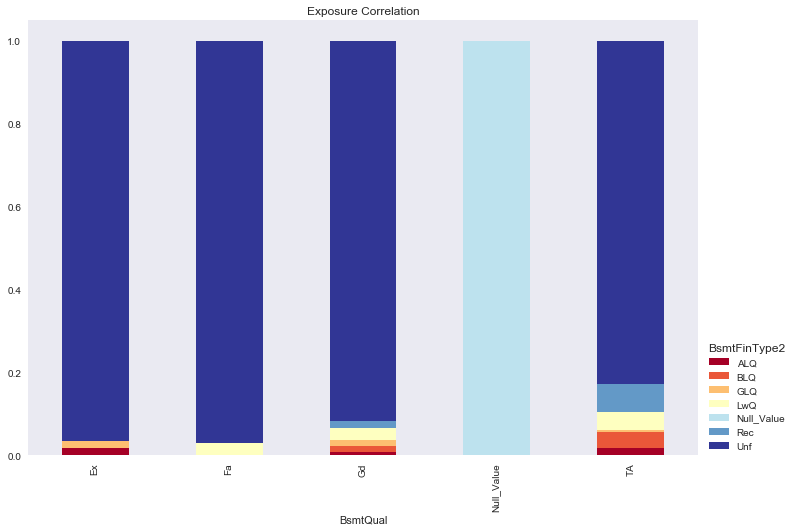

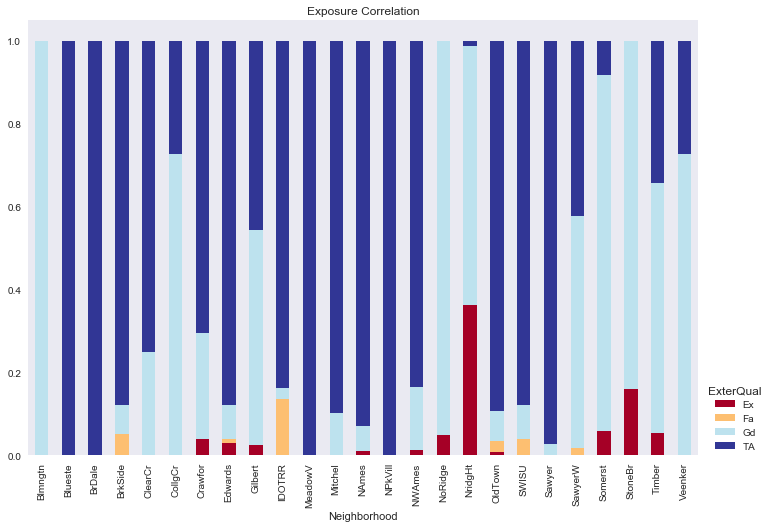

In [17]:
feature_clusters.correlations_categorical() 

Similar to above, analyze the dimensionality of the categorical variables and consider dimension reduction if there is a sharp drop off in the top graph. Principal component analysis cannot be directly applied here since we are looking at categorical variables. However, we can perform a similar analysis by computing the eigenvectors and eigenvalues of Cramer's V matrix, where the $(i,j)$th component is the Cramer's V statistic of the $i$th and $j$th variable. The eigenvectors are analagous to principal components and the eigenvalues capture the portion of variance exaplained by the corresponding eigenvector.   

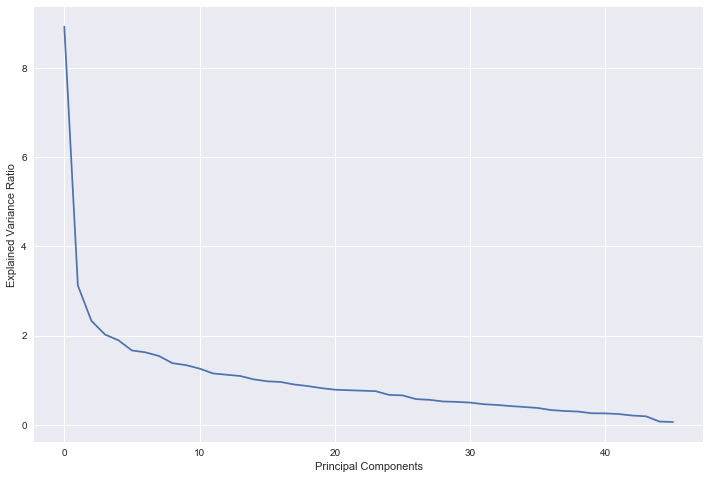

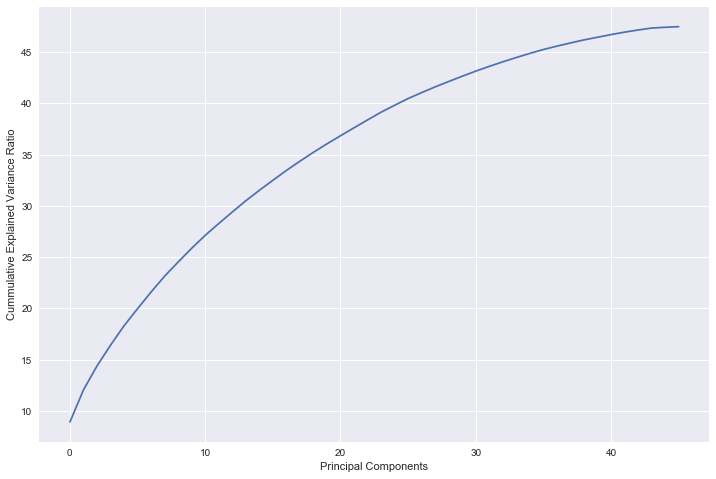

In [18]:
feature_clusters.pca_cat()

In order to cluster our categorical variables, we need a notion of distance in the categorical feature space. Using Cramer's V ($\phi_c$) in place of Pearson correlation, define a "distance" between variables $x$ and $y$.

$$d(x,y) = 1 - \phi_c(x,y)$$

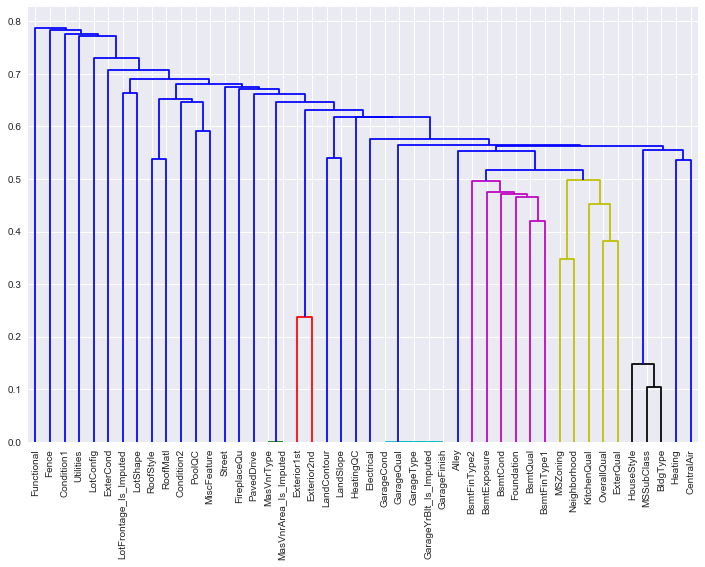

    Cluster                 Feature
2         1  LotFrontage_Is_Imputed
5         2                LotShape
16        3               RoofStyle
17        4                RoofMatl
43        5                  PoolQC
45        6             MiscFeature
12        7              Condition2
21        8   MasVnrArea_Is_Imputed
20        8              MasVnrType
19        9             Exterior2nd
18        9             Exterior1st
6        10             LandContour
9        11               LandSlope
39       12            GarageFinish
38       12  GarageYrBlt_Is_Imputed
37       12              GarageType
40       12              GarageQual
41       12              GarageCond
26       13                BsmtCond
27       13            BsmtExposure
29       13            BsmtFinType2
25       13                BsmtQual
28       13            BsmtFinType1
24       13              Foundation
34       14             KitchenQual
22       14               ExterQual
1        14                M

In [19]:
feature_clusters.cat_feature_clusters()

<a name="correlation-between-continuous-and-categorical-variables"></a>
## Correlation Between Continuous and Categorical Variables

Here we want to come up with a notion of correlation (or distance in feature space) between continuous and categorical variables. A canonical definition is more challenging in this case. One method of quantifying correlation is by using a one-way ANOVA (equivalently a linear regression with one categorical predictor) and using $p$-values to quantify correlation. Here we will run a one-way ANOVA for each pair of continuous and categorical variable, and return the $p$-value for each ANOVA below p_p_val (defaulted to 0.01) along with a box-plot for each pair. ANOVA assumes that the data is normally distributed and that each category has equal variance. While ANOVA is robust to violations of these assumptions, in certain cases it might be better to use a non-parametric alternative (e.g. Kruskal-Wallis). If you come up with alternative notions of correlation, please add them to EDATools.py 

One-way ANOVA p-values - Predictors
GarageYrBlt and GarageQual = 2.3e-137
GarageYrBlt and GarageCond = 2.7e-136
GarageYrBlt and GarageYrBlt_Is_Imputed = 1.2e-134
GarageYrBlt and GarageFinish = 1e-133
GarageYrBlt and GarageType = 5.5e-129
MiscVal and MiscFeature = 4.8e-78
SecondFlrSF and HouseStyle = 7.8e-47
Fireplaces and FireplaceQu = 1.3e-40
BsmtFinSF2 and BsmtFinType2 = 7.5e-40
LowQualFinSF and HouseStyle = 5.4e-34
MasVnrArea and MasVnrType = 6.8e-26
LotFrontage and LotFrontage_Is_Imputed = 3.5e-22
YearBuilt and Neighborhood = 6e-21
YearBuilt and Foundation = 3.7e-20
KitchenAbvGr and BldgType = 4.4e-19
YearBuilt and KitchenQual = 9.2e-17
YearBuilt and BsmtQual = 2.7e-16
GarageCars and GarageType = 7.5e-16
MiscVal and Condition2 = 2.3e-15
HalfBath and HouseStyle = 2.6e-15
GarageCars and GarageFinish = 8.3e-15
YearBuilt and ExterQual = 1.9e-14
GarageArea and GarageType = 2.1e-14
YearRemodAdd and KitchenQual = 1.1e-13
YearRemodAdd and Foundation = 1.3e-13
BsmtFinSF1 and BsmtFinType1 = 

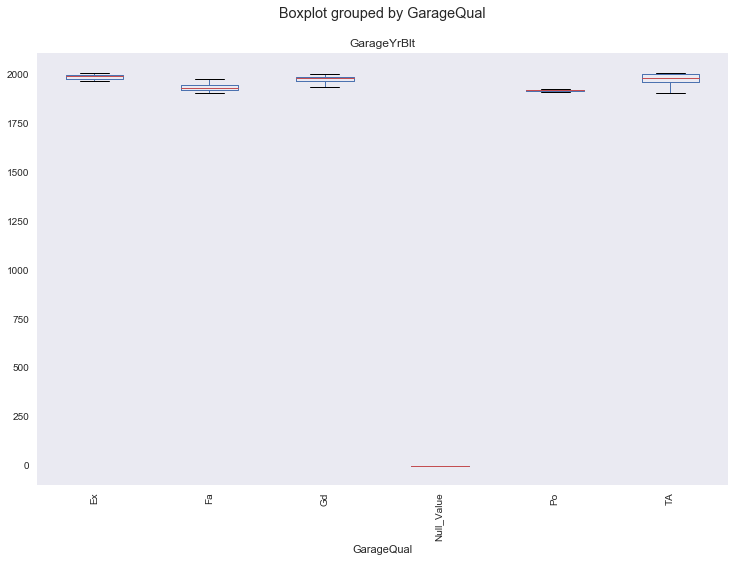

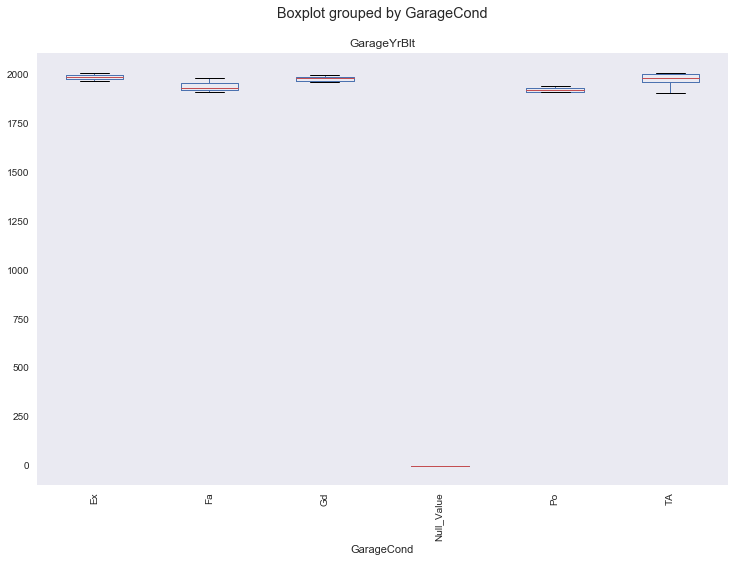

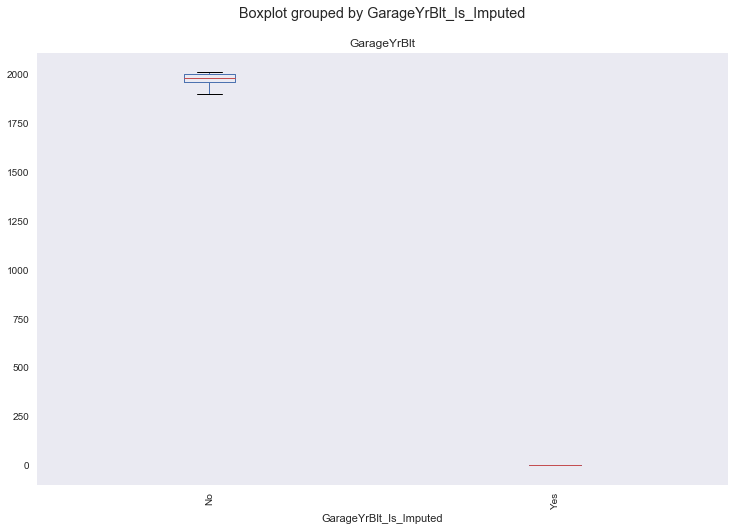

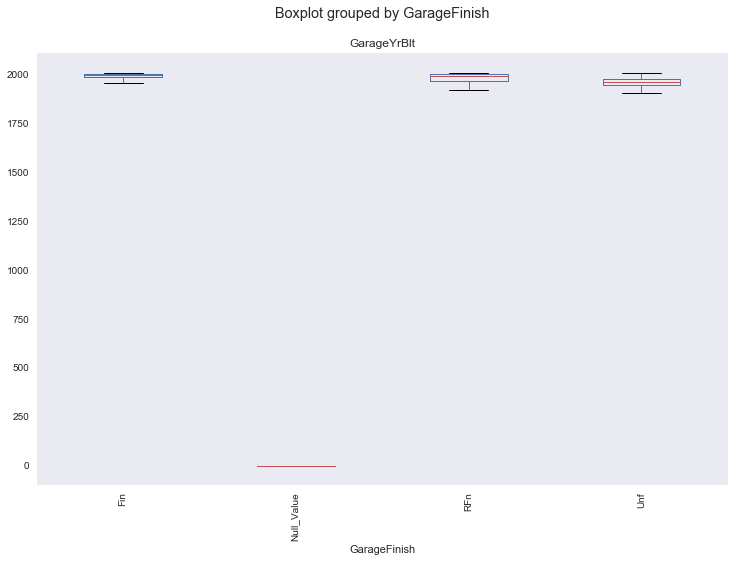

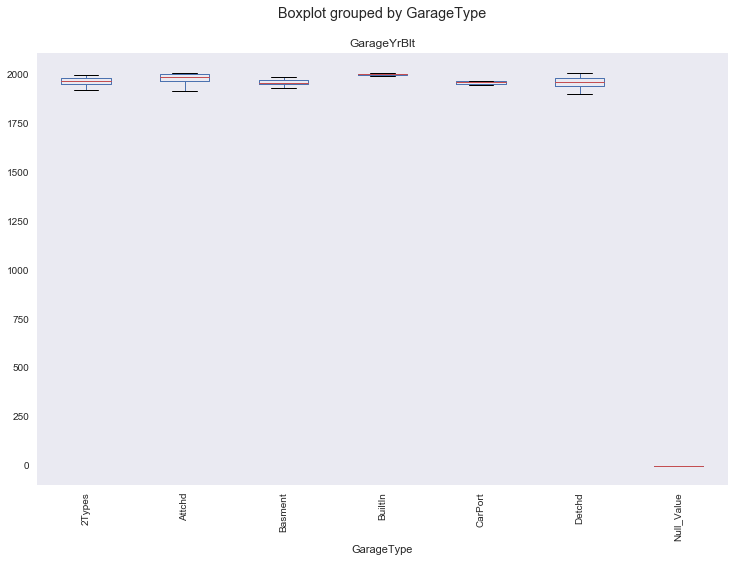

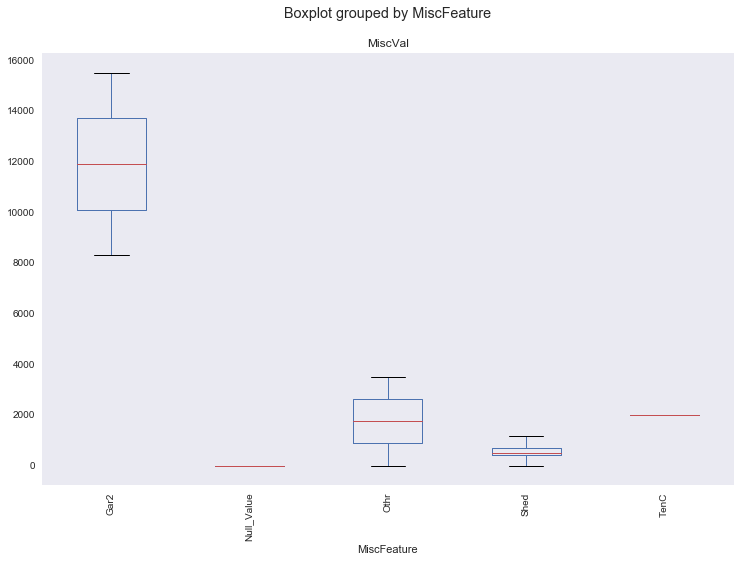

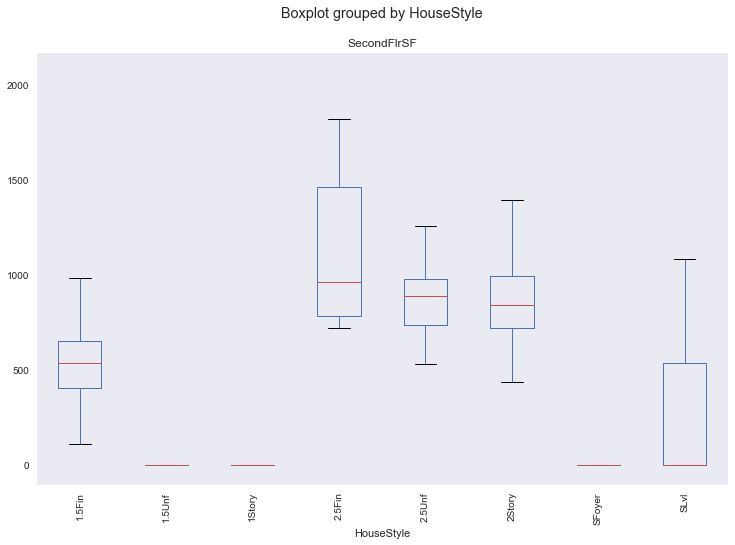

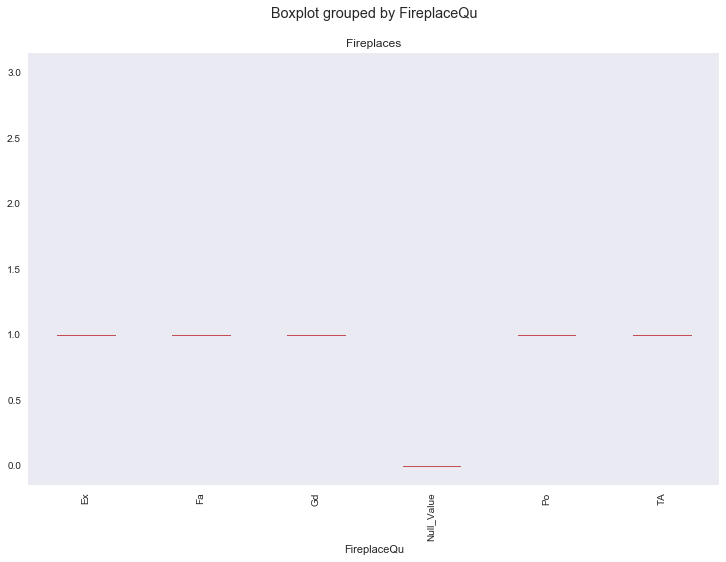

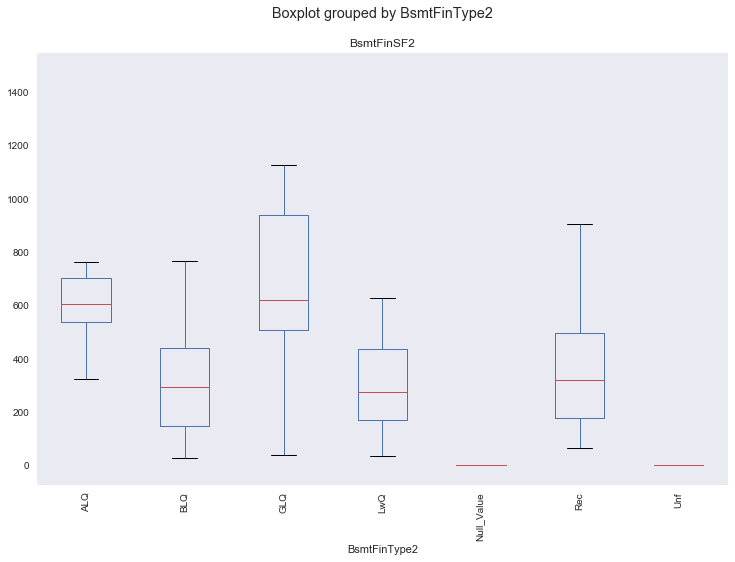

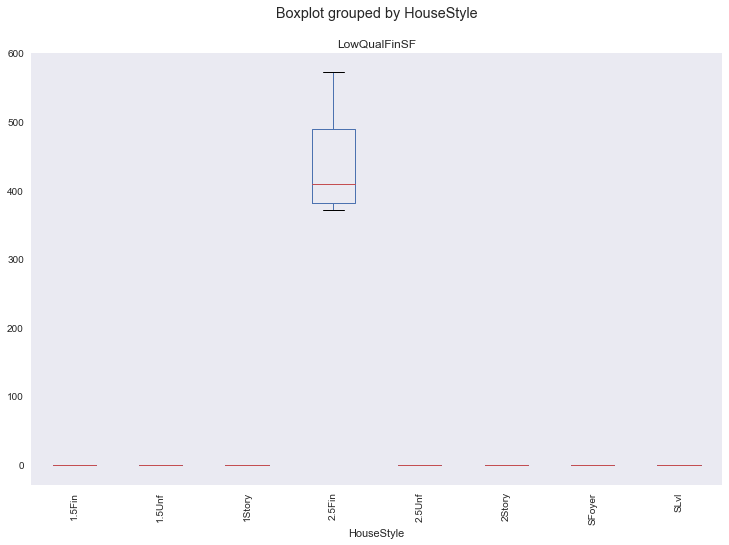

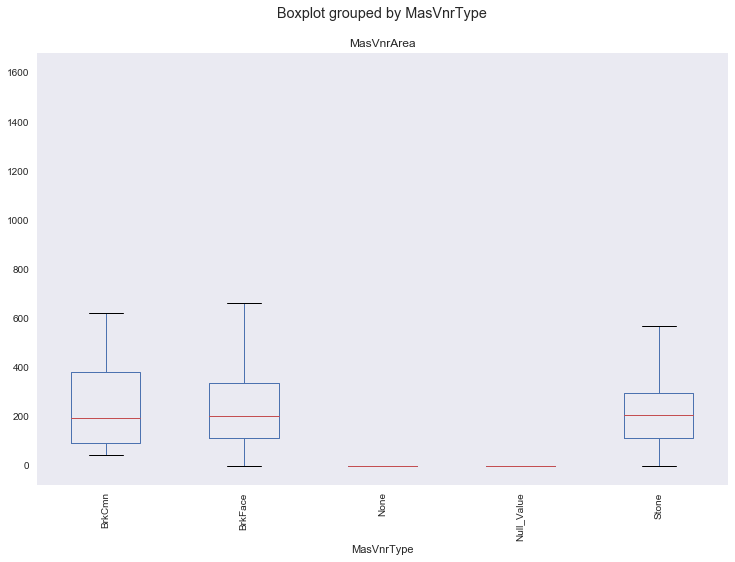

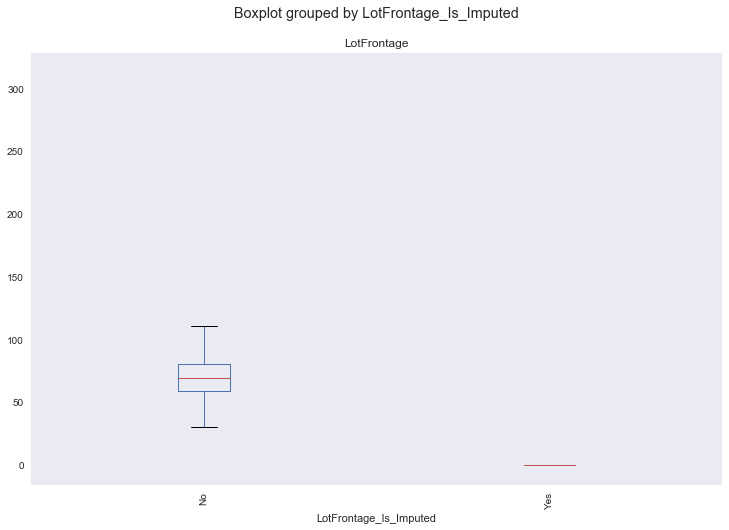

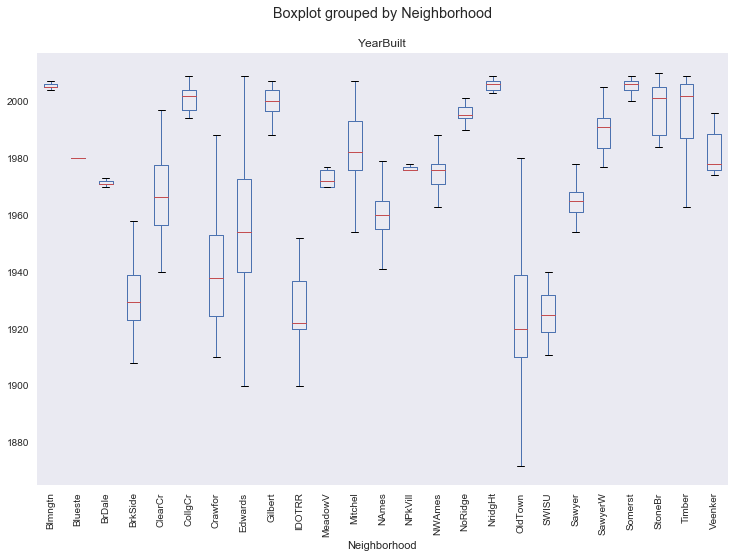

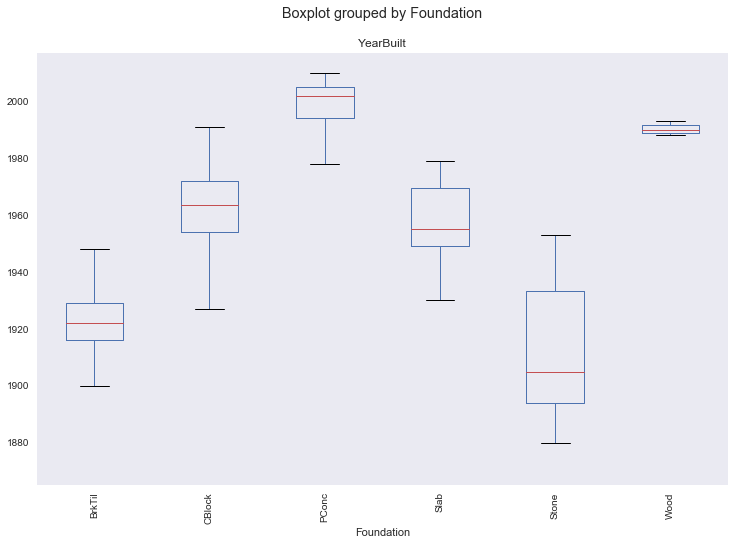

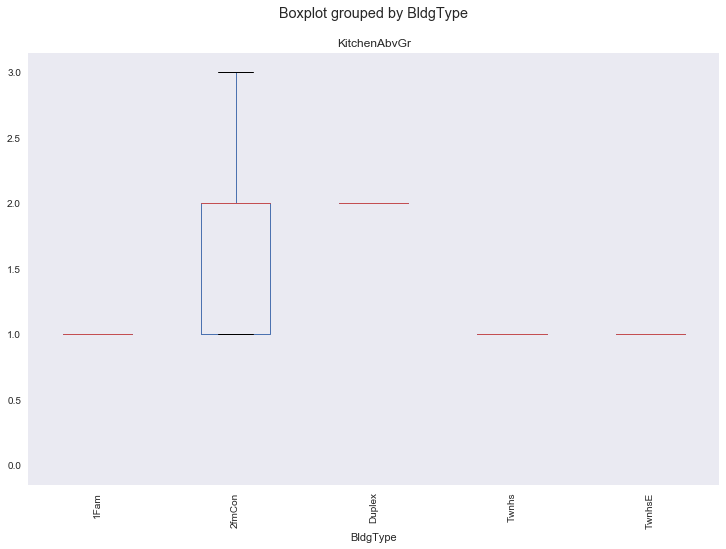

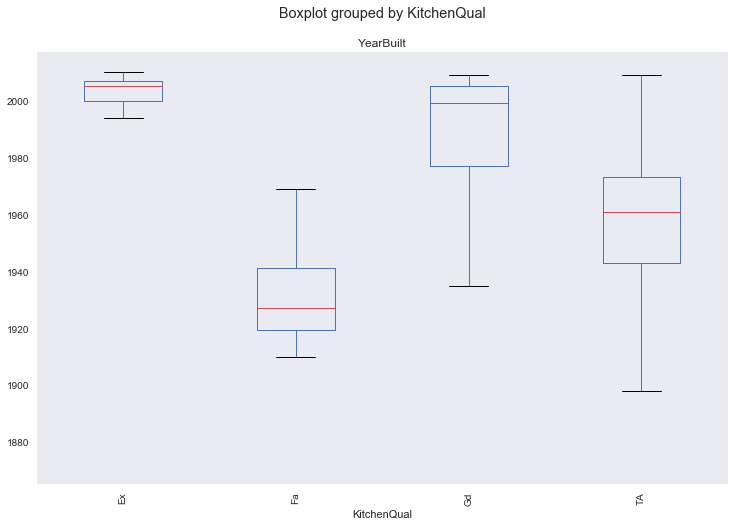

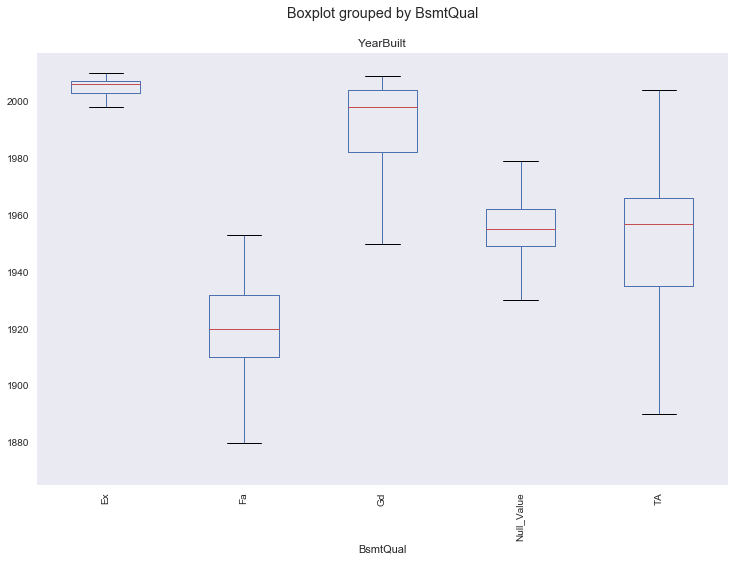

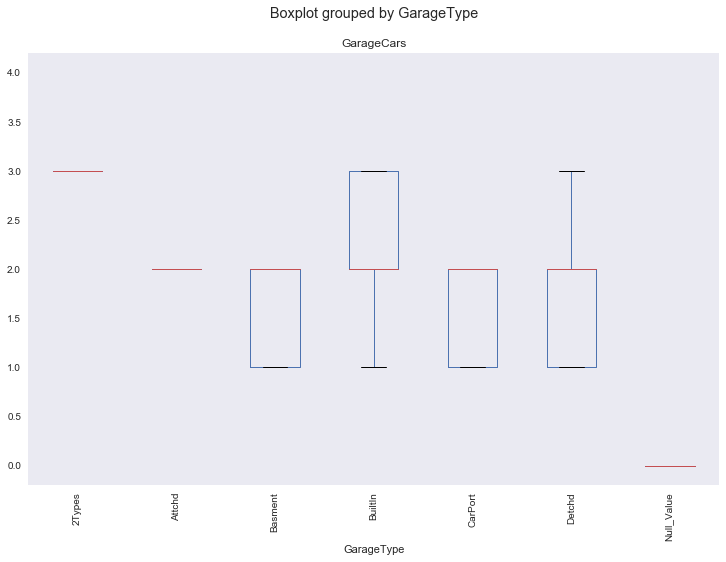

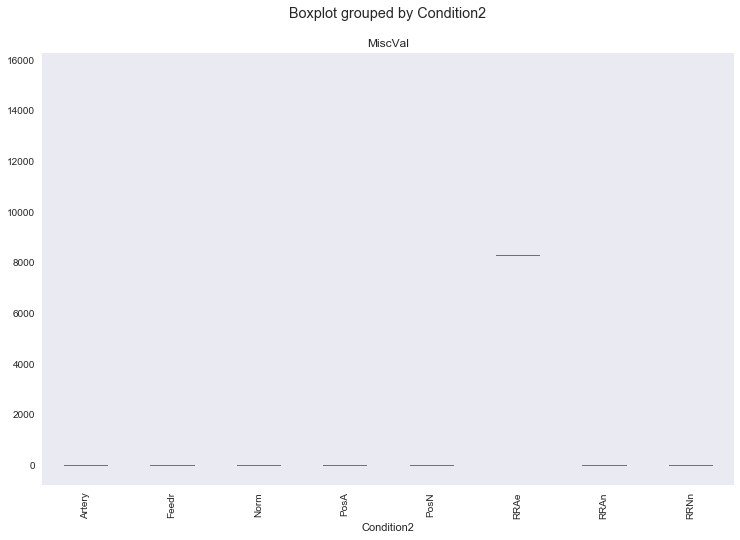

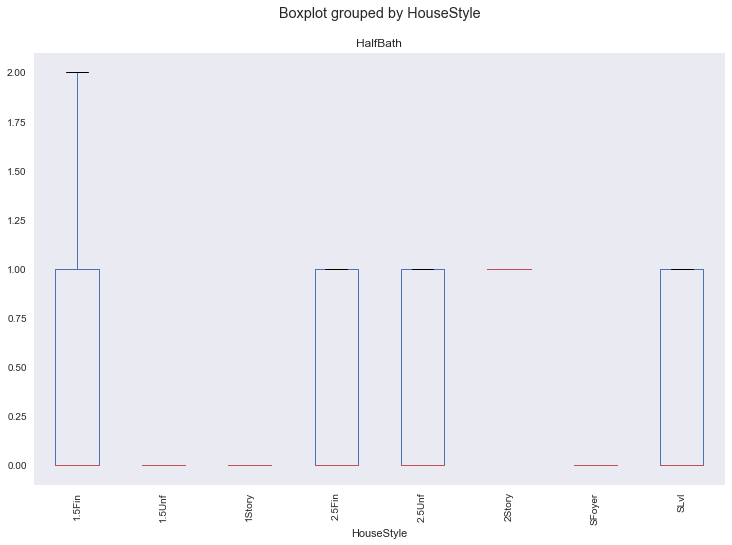

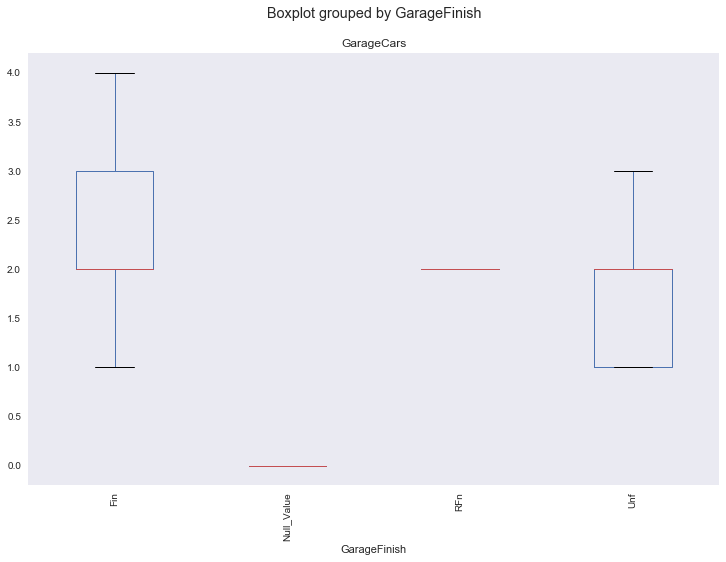

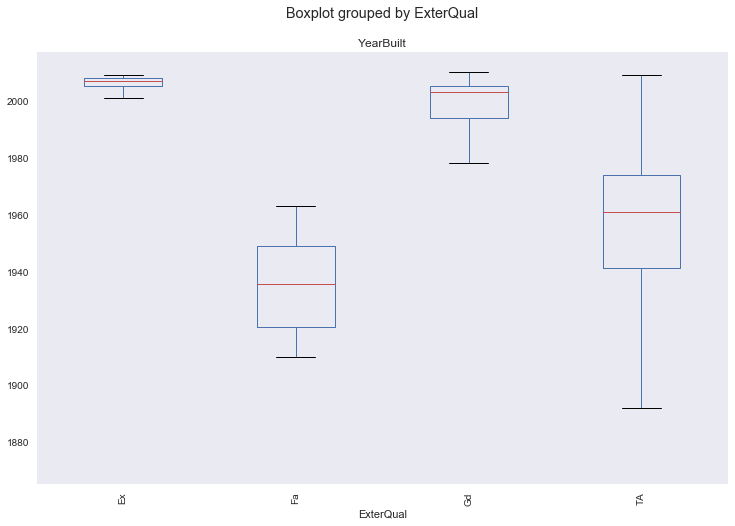

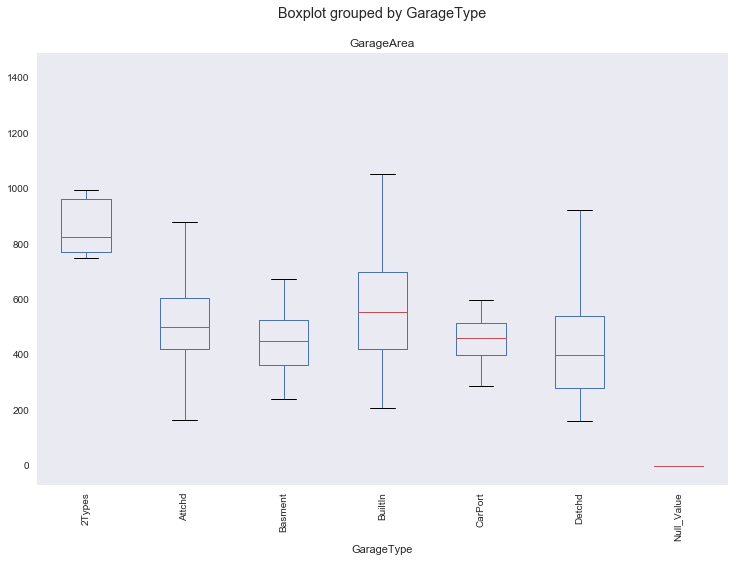

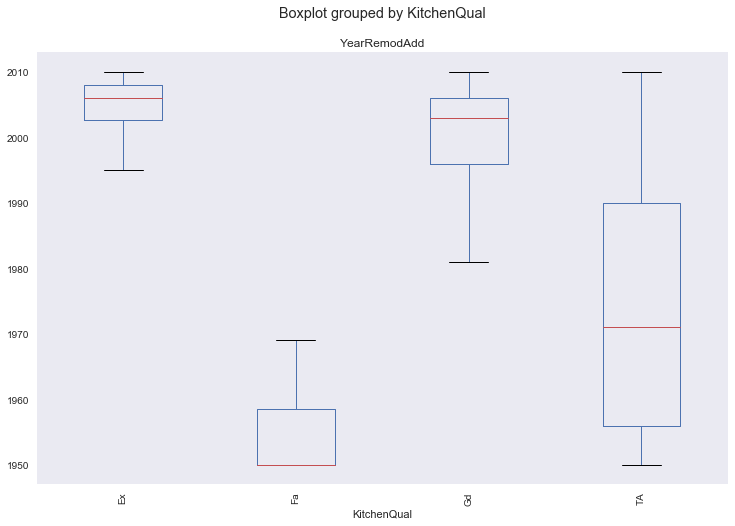

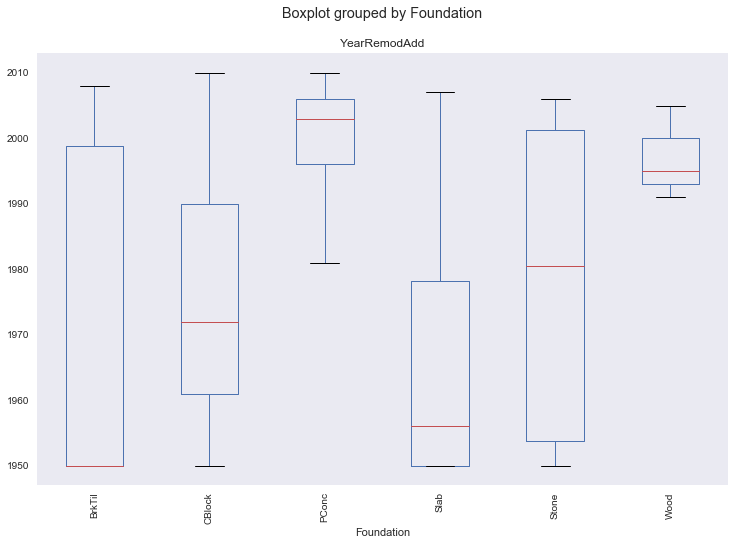

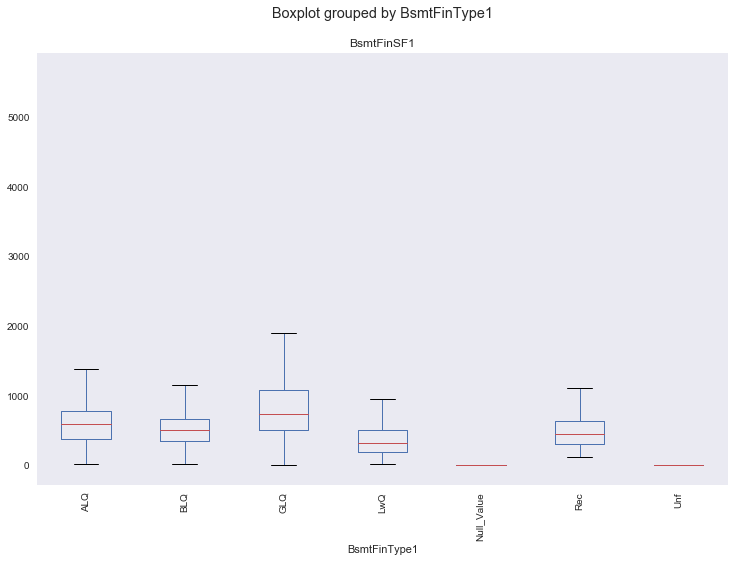

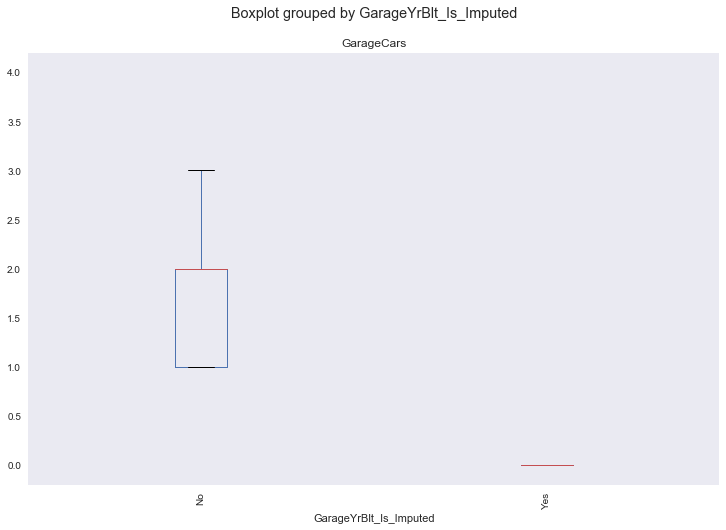

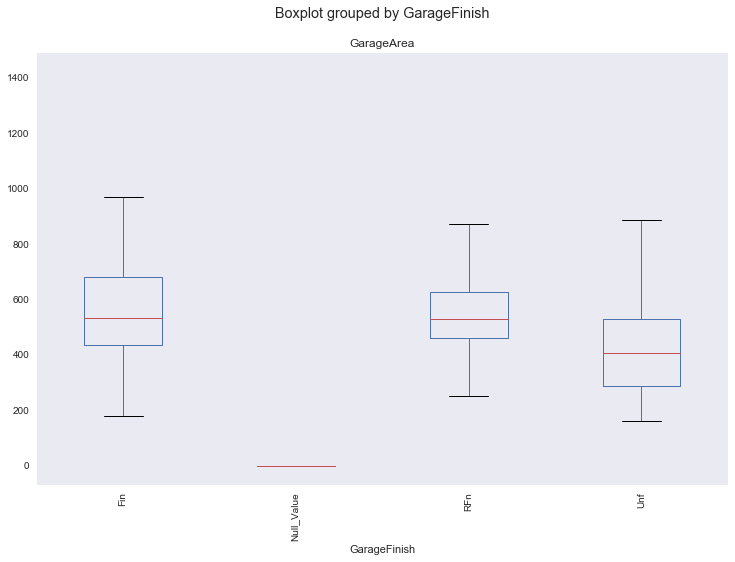

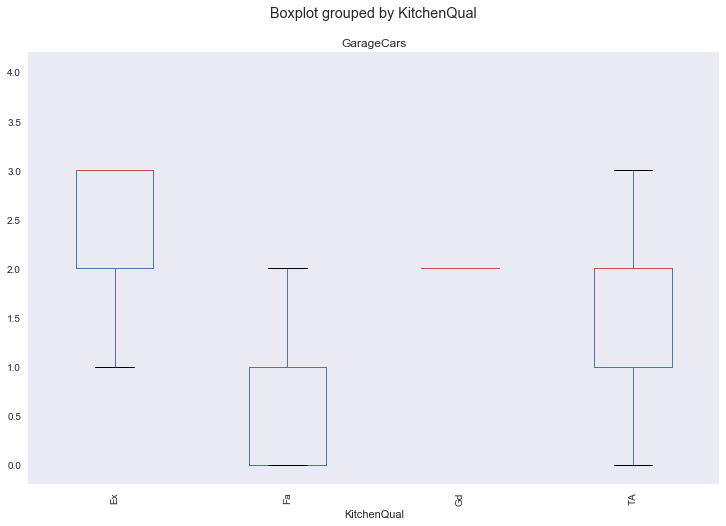

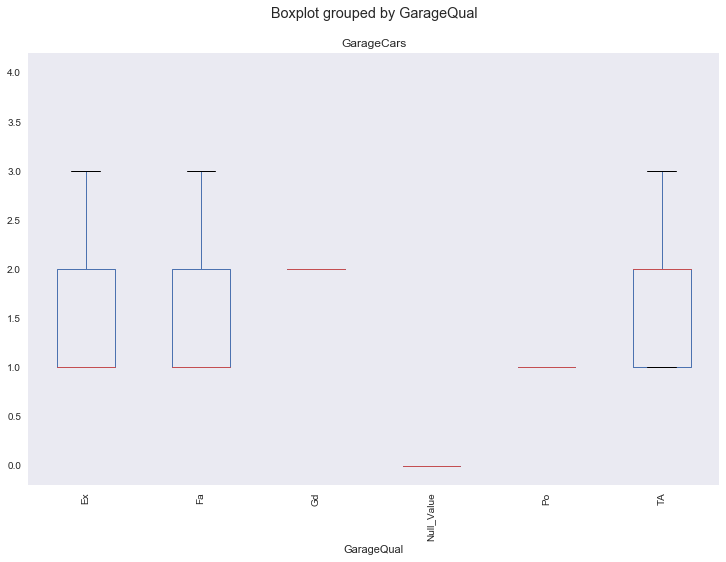

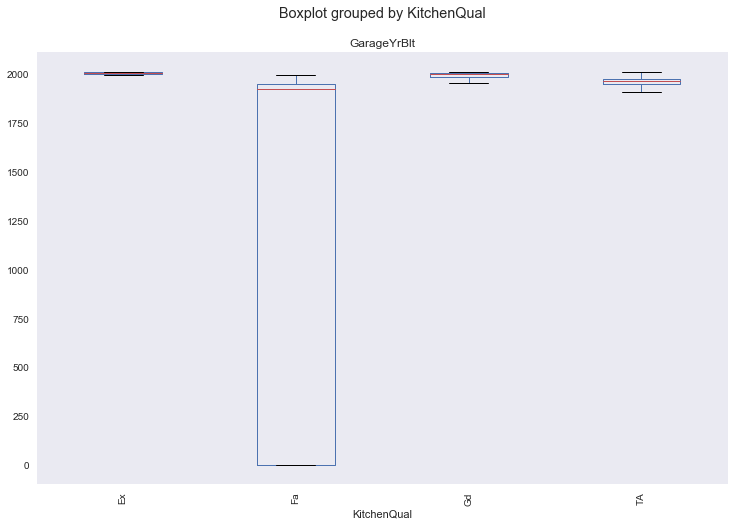

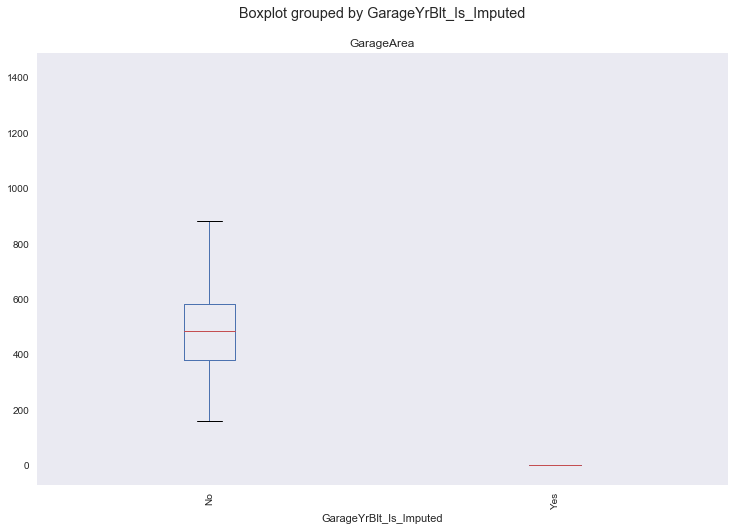

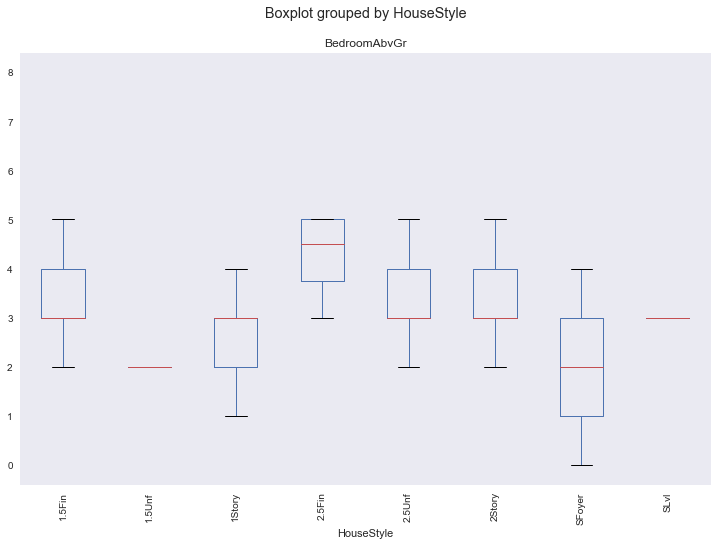

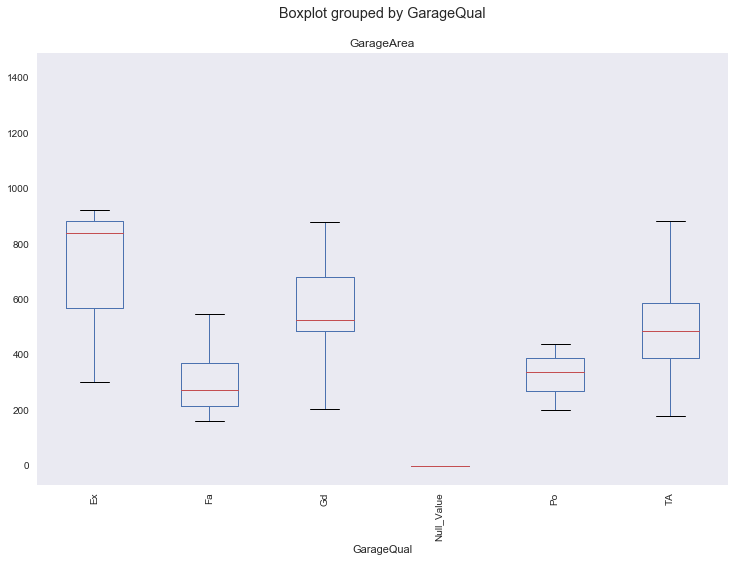

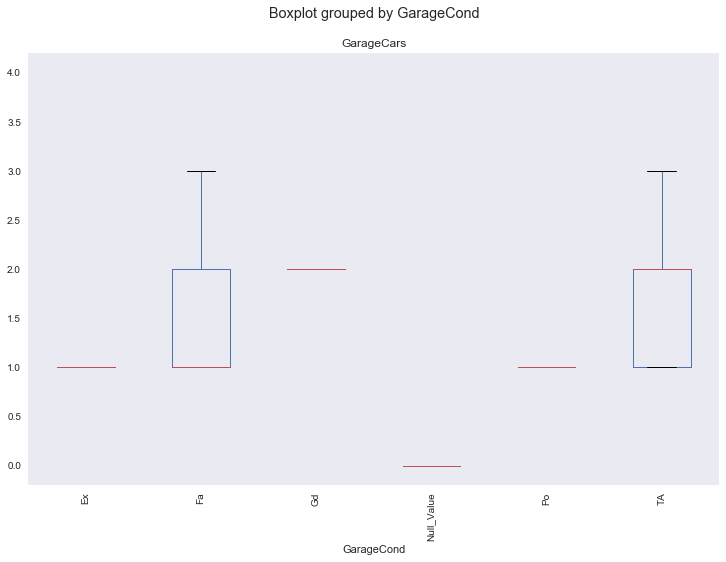

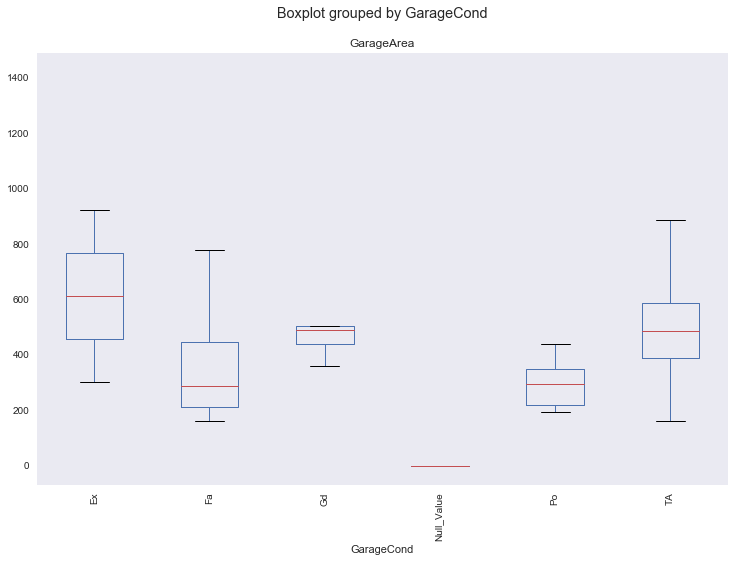

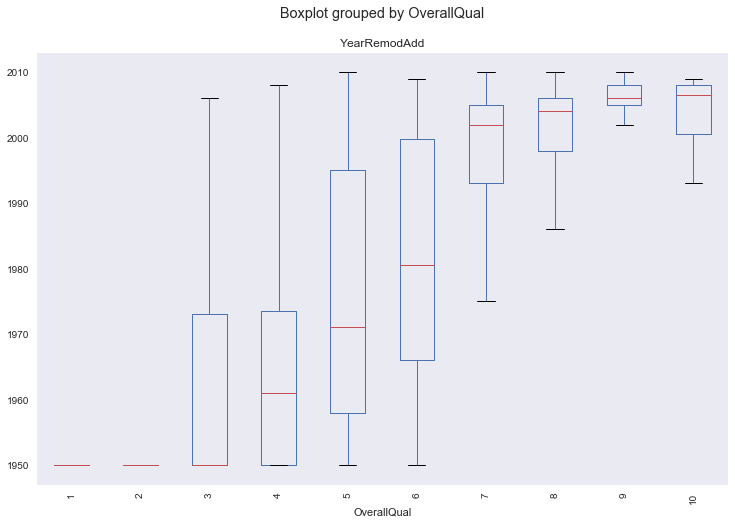

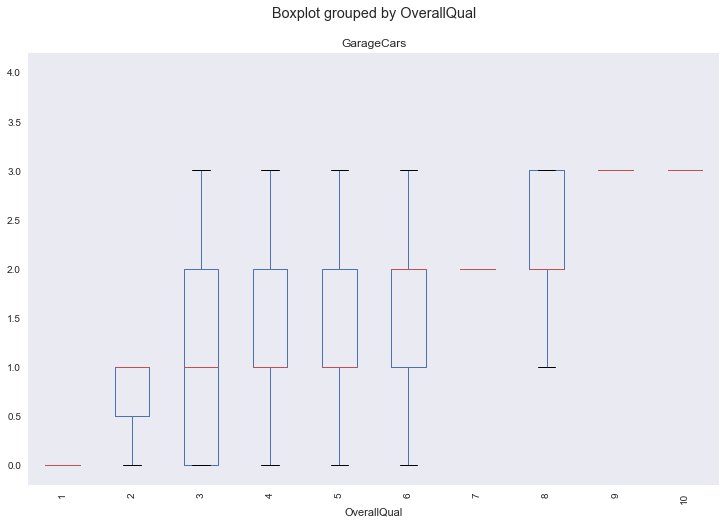

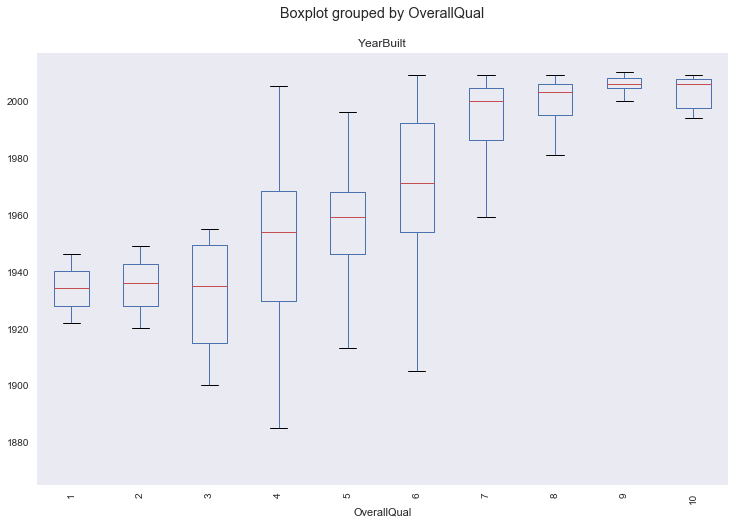

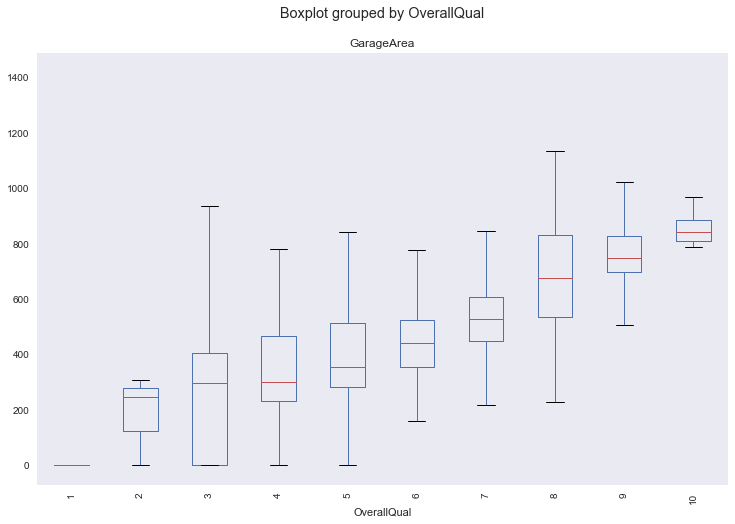

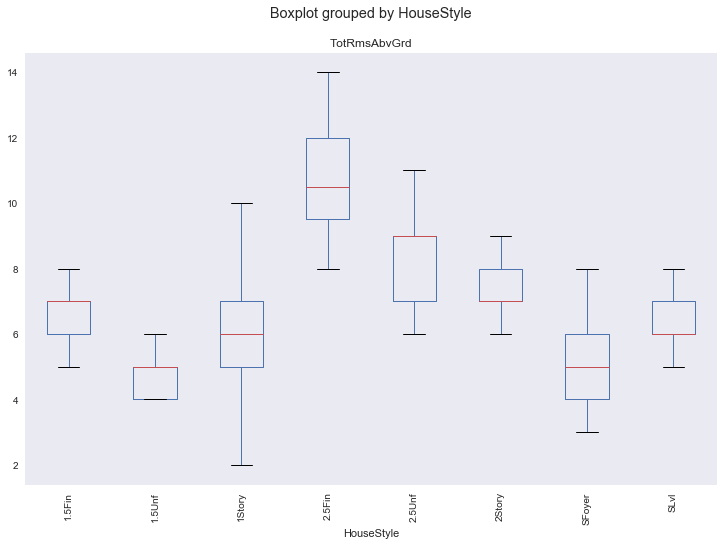

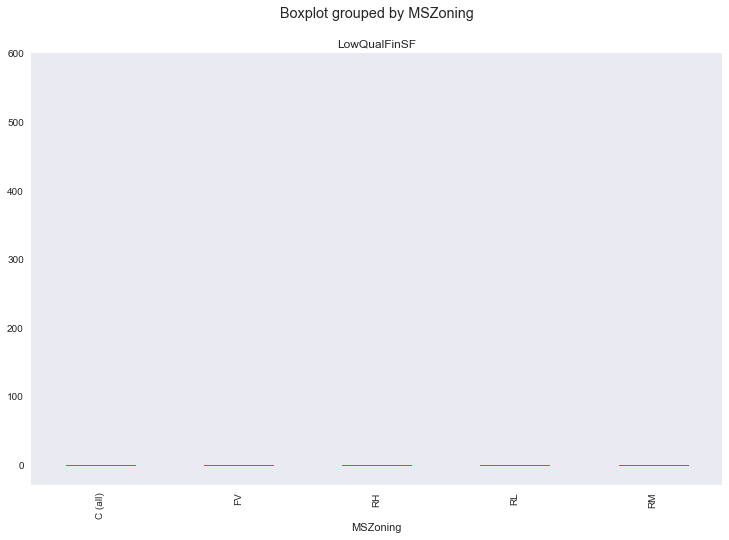

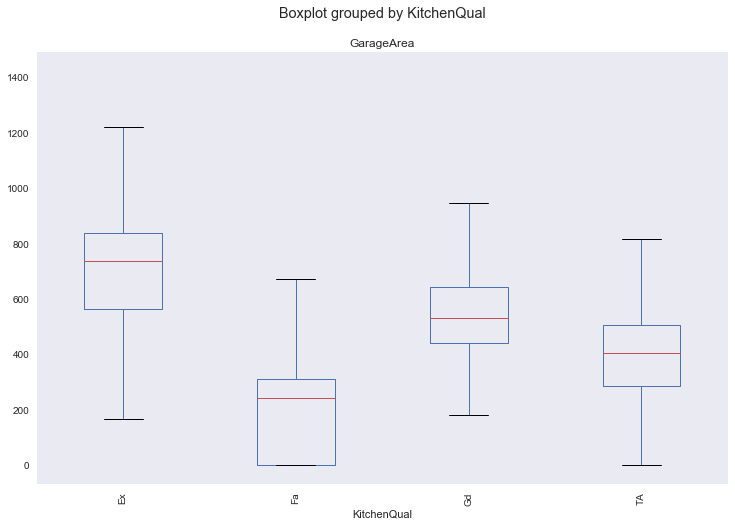

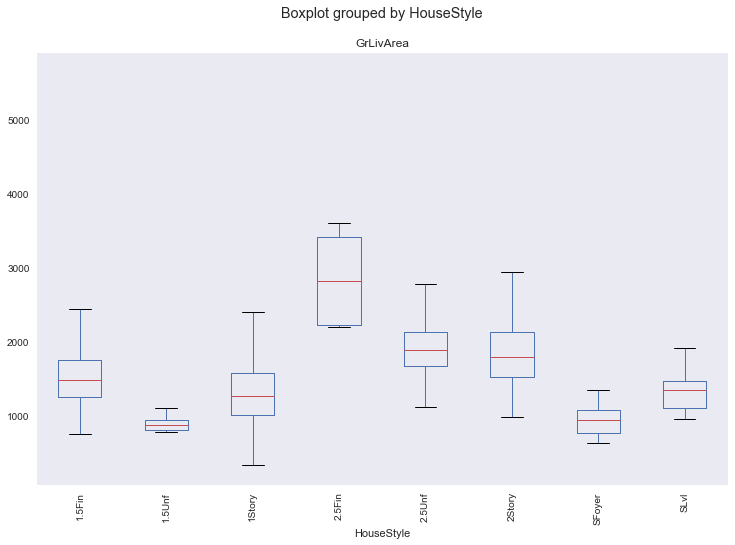

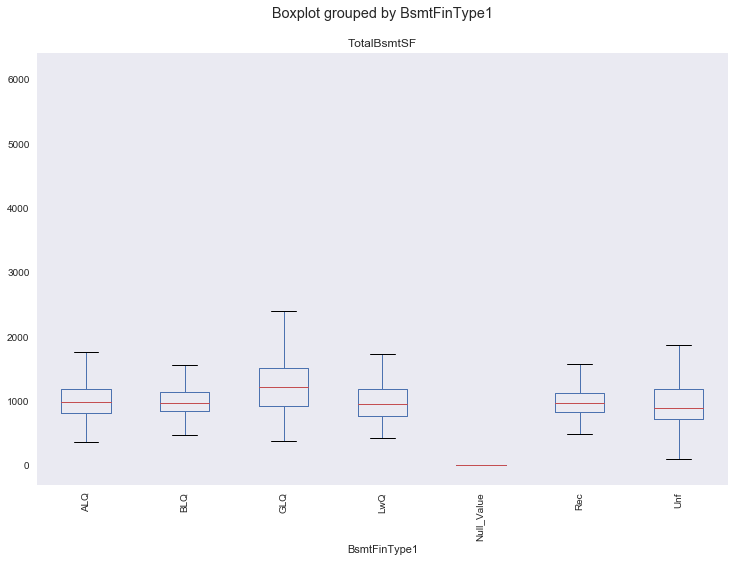

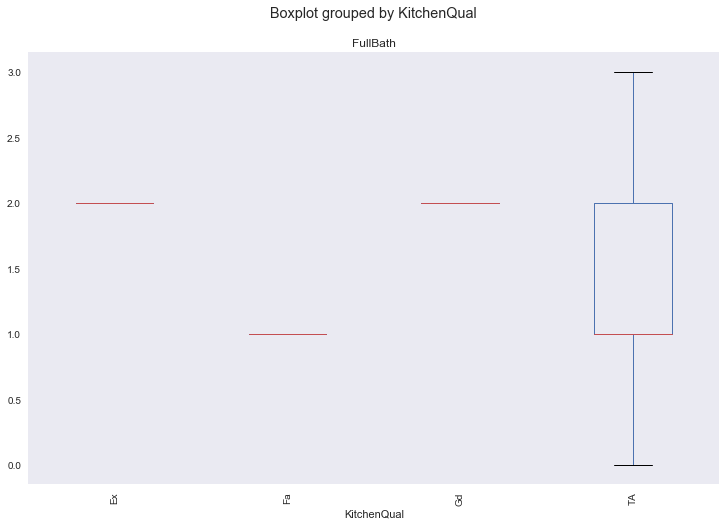

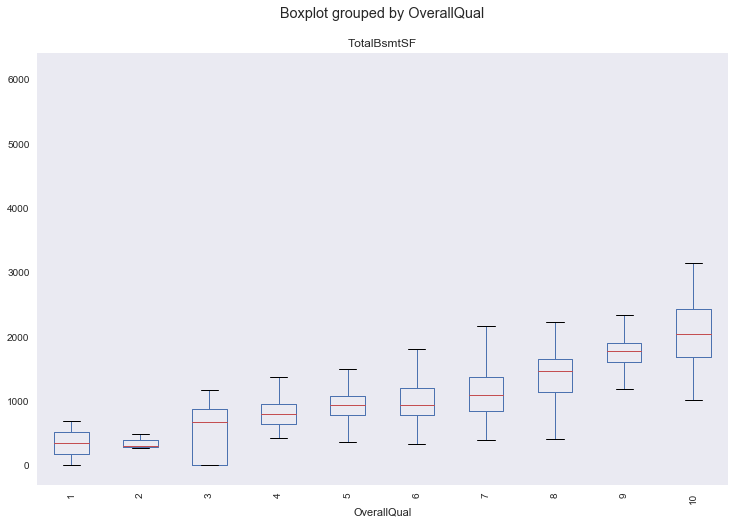

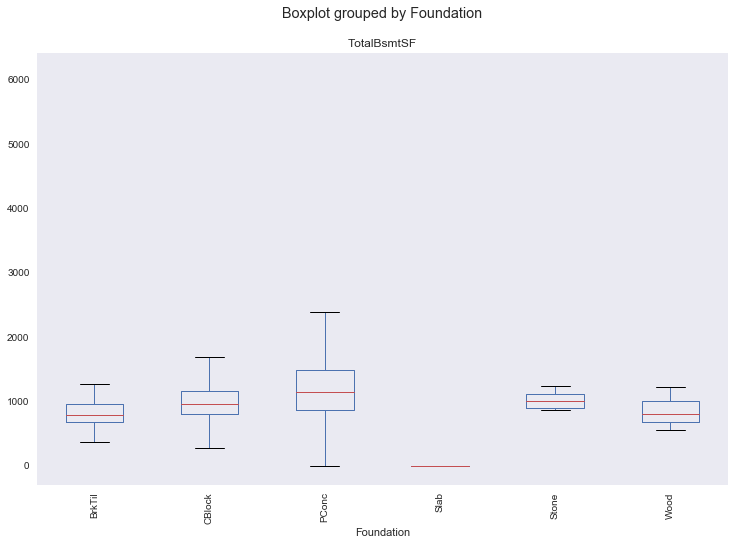

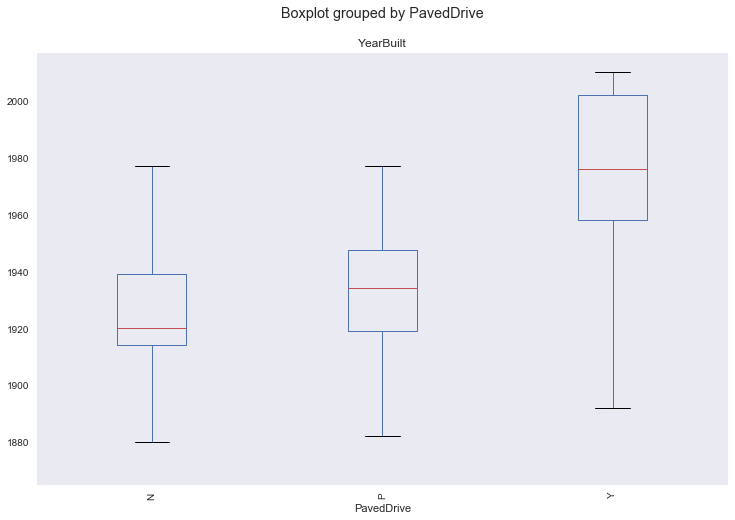

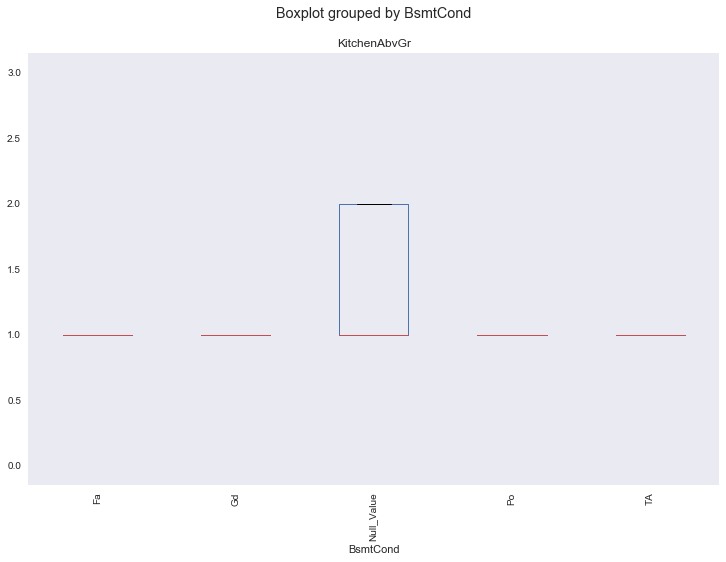

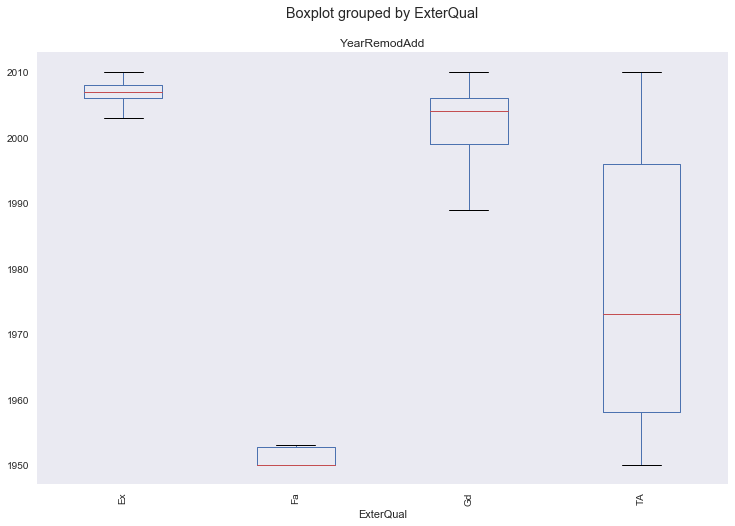

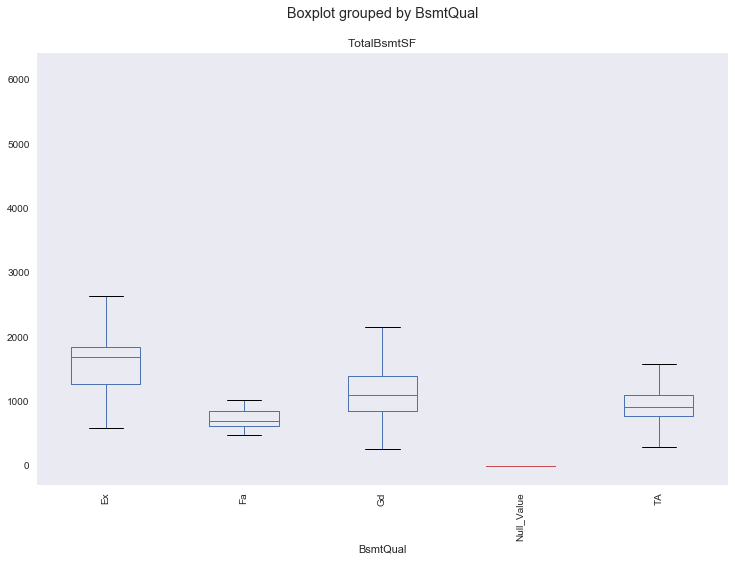

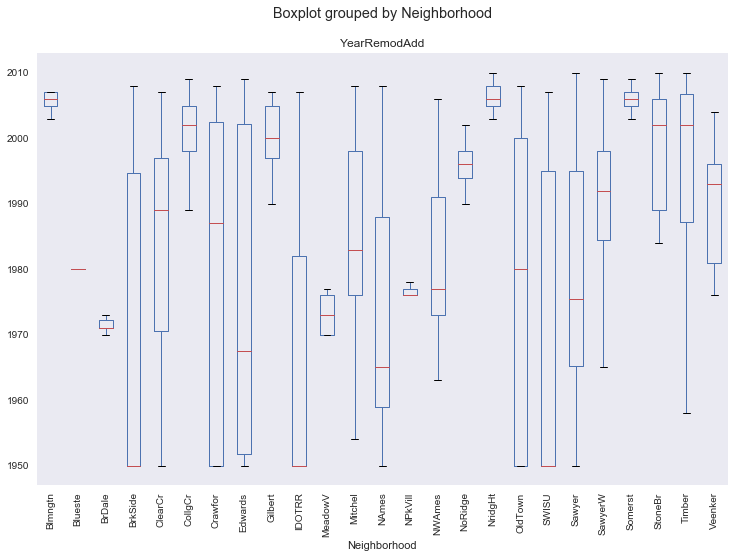

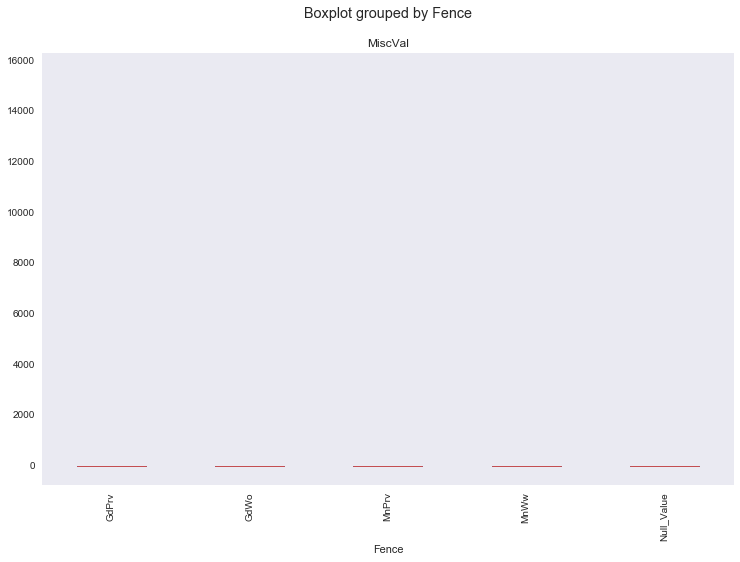

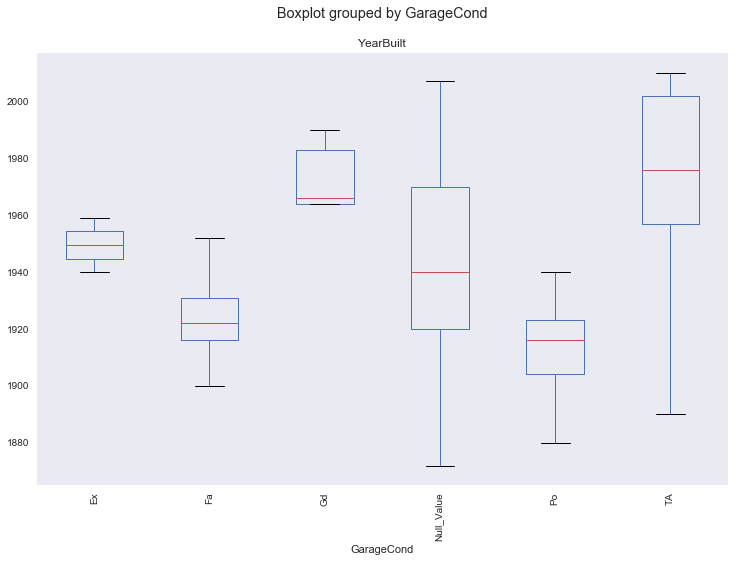

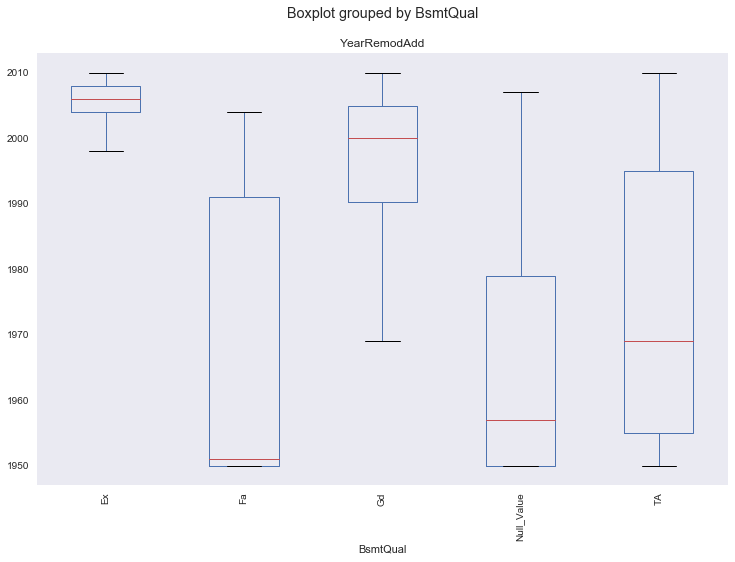

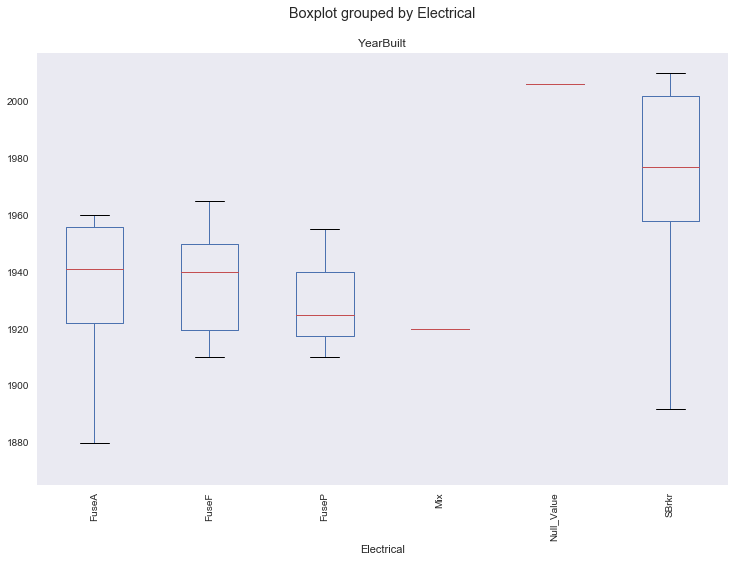

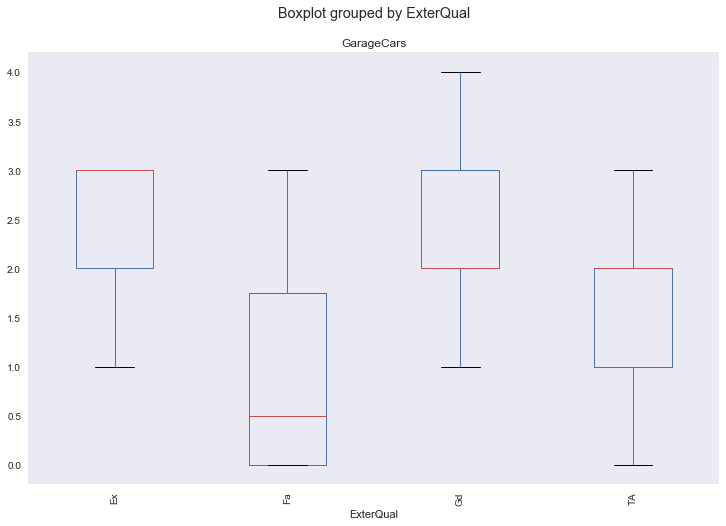

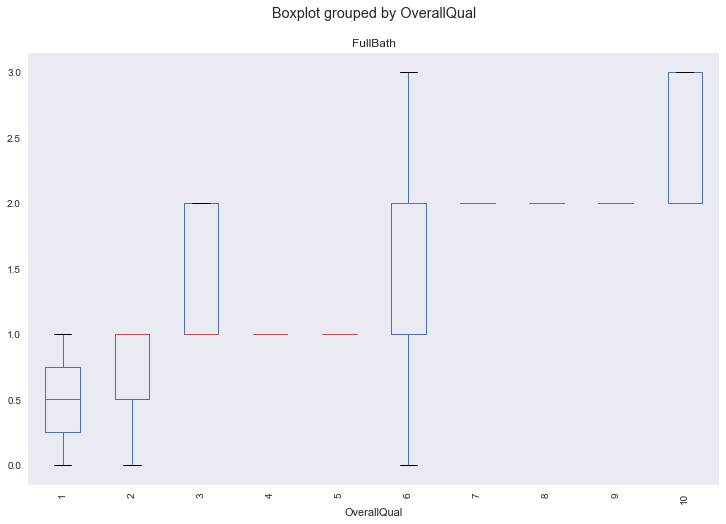

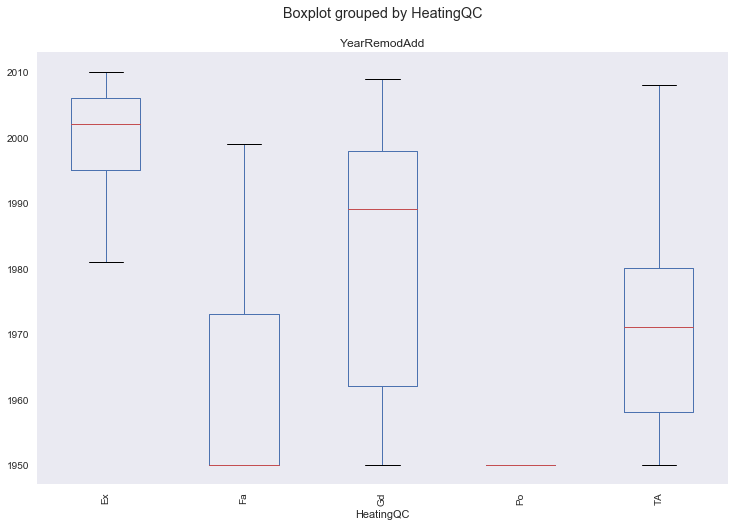

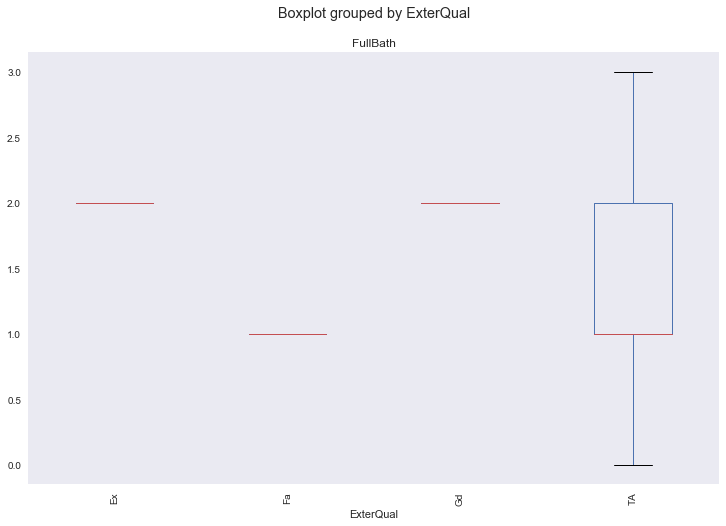

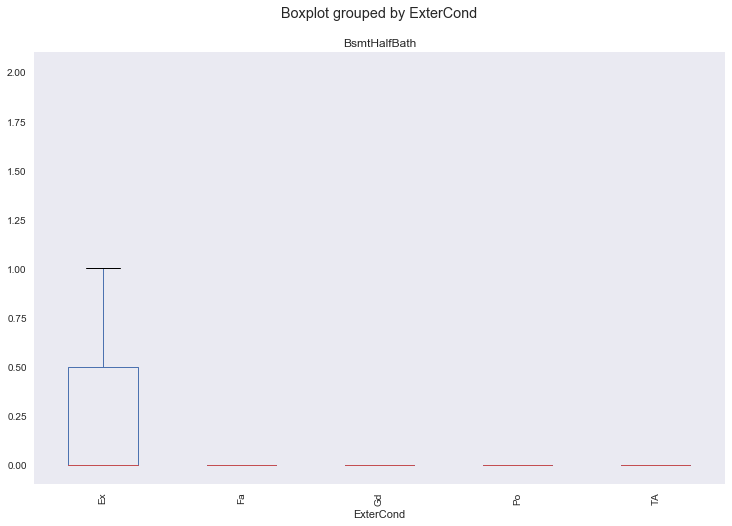

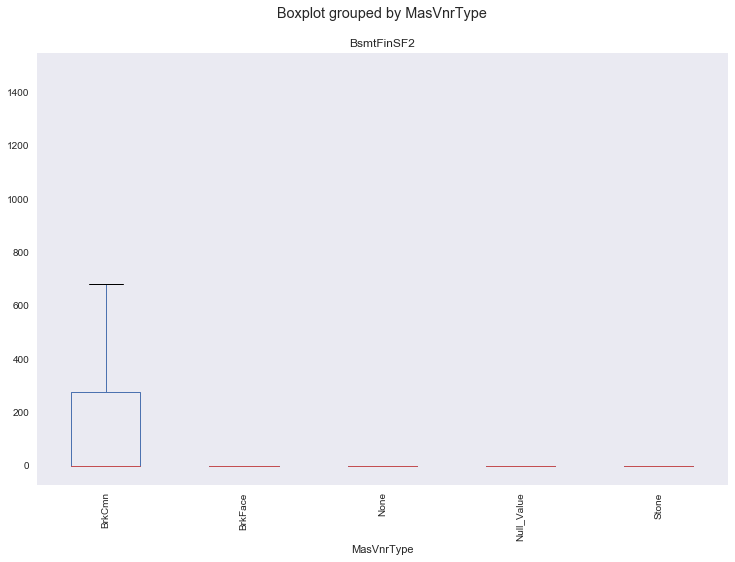

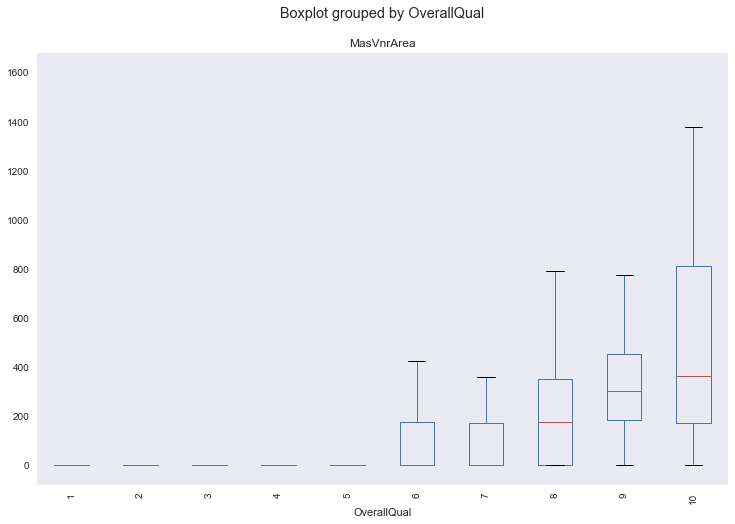

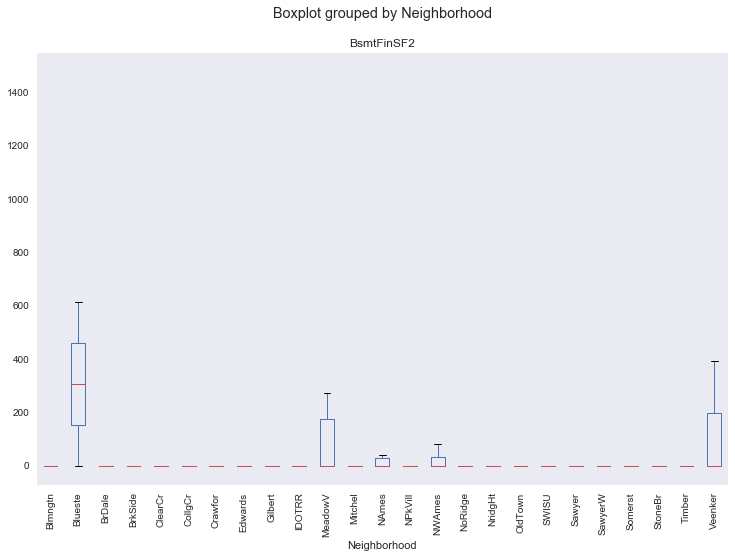

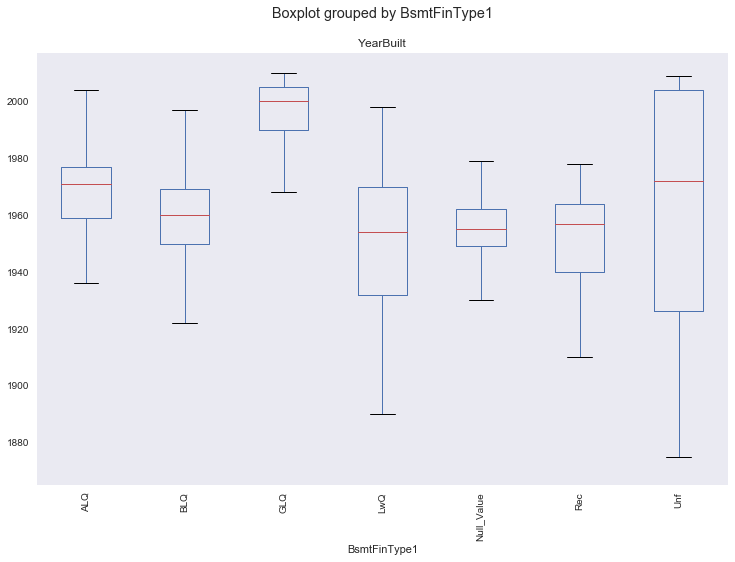

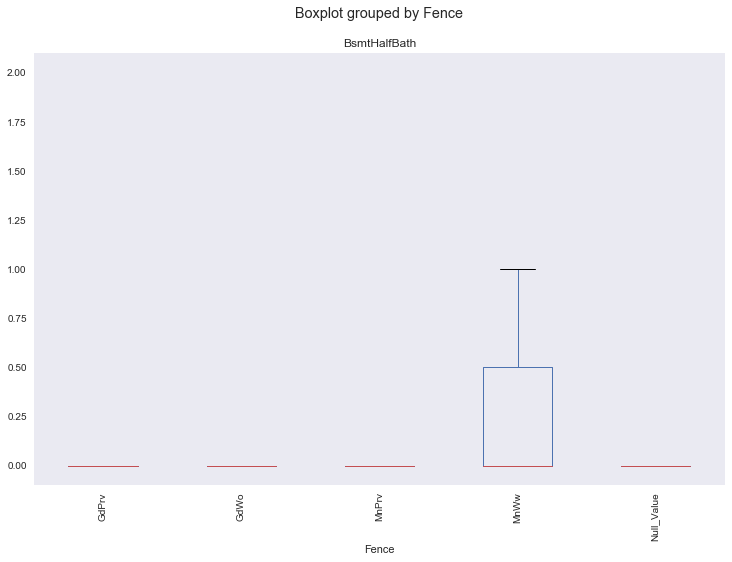

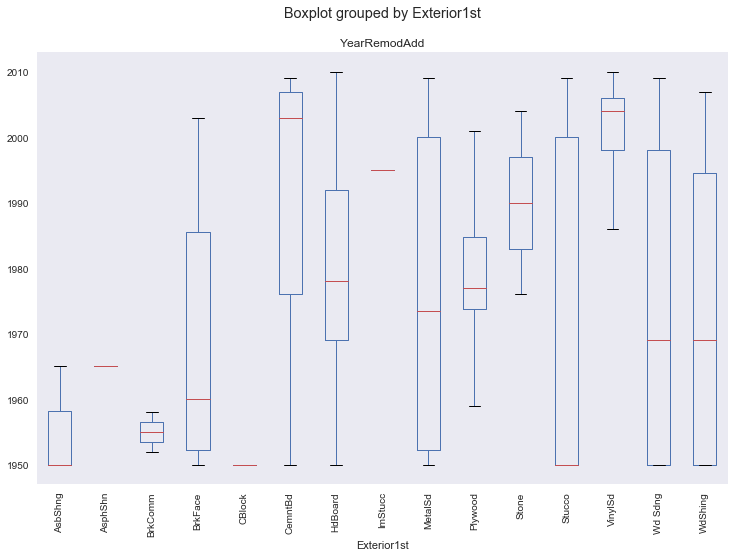

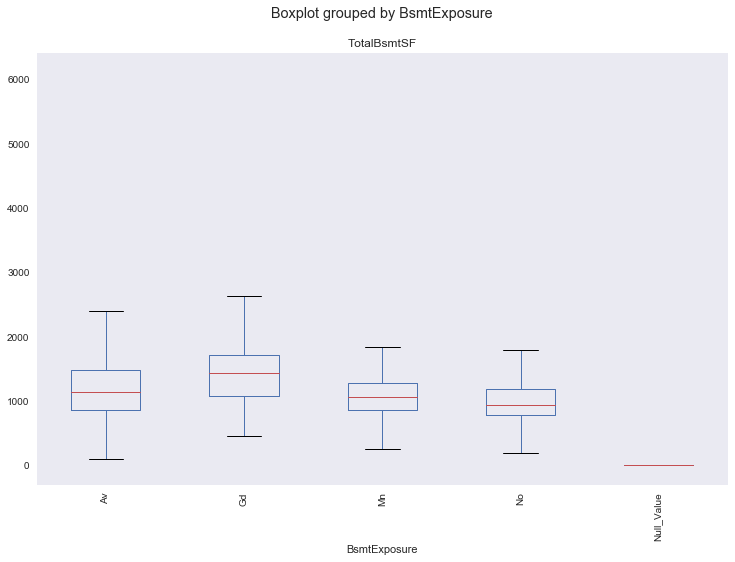

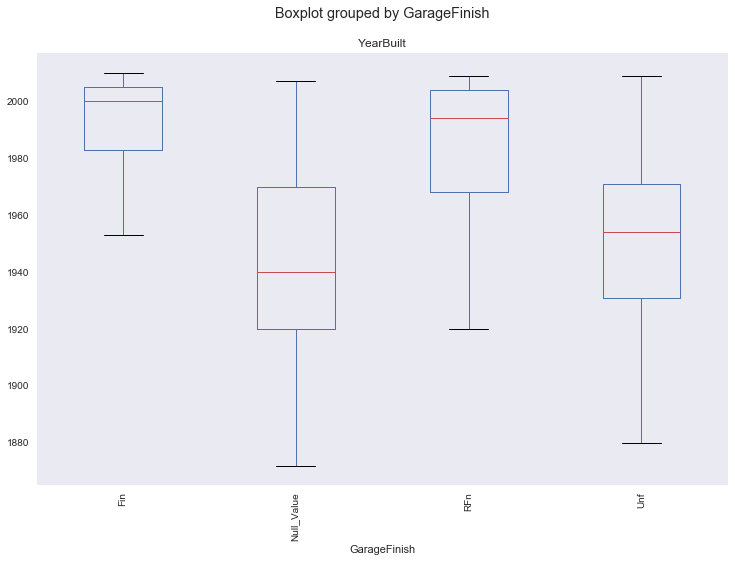

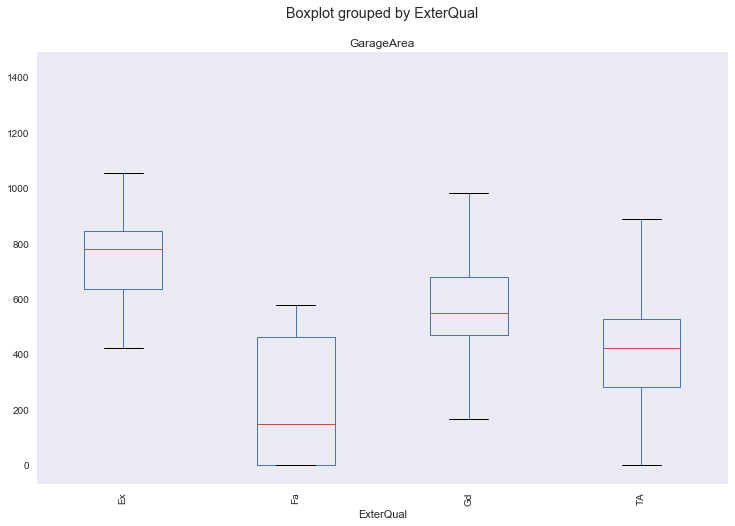

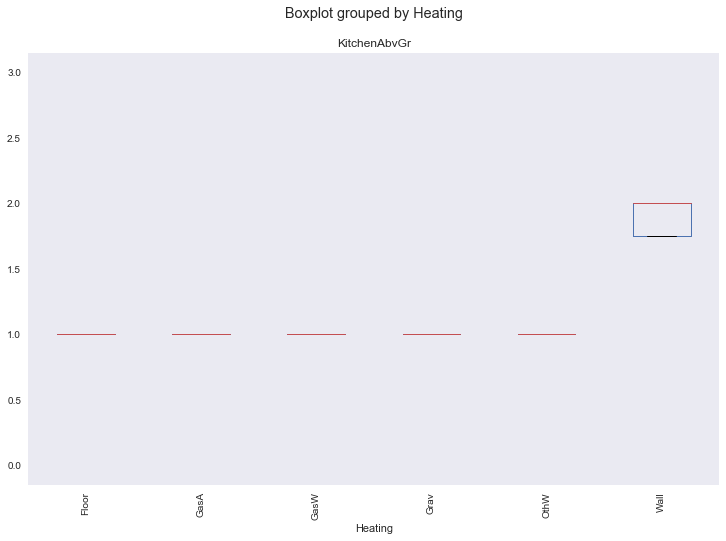

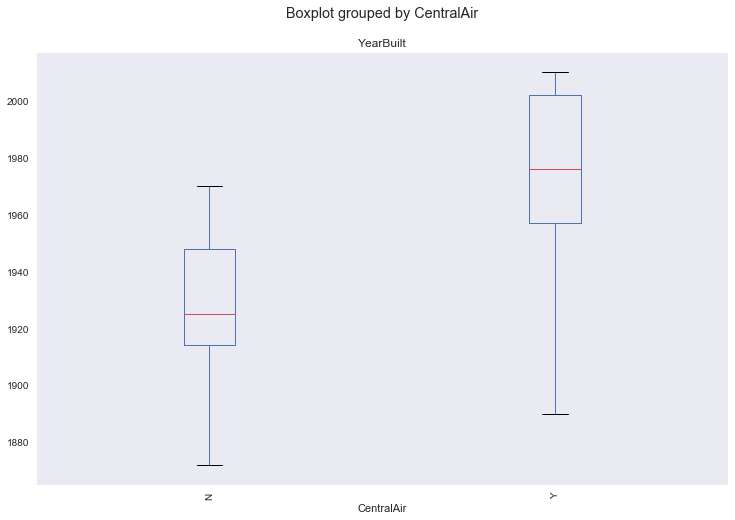

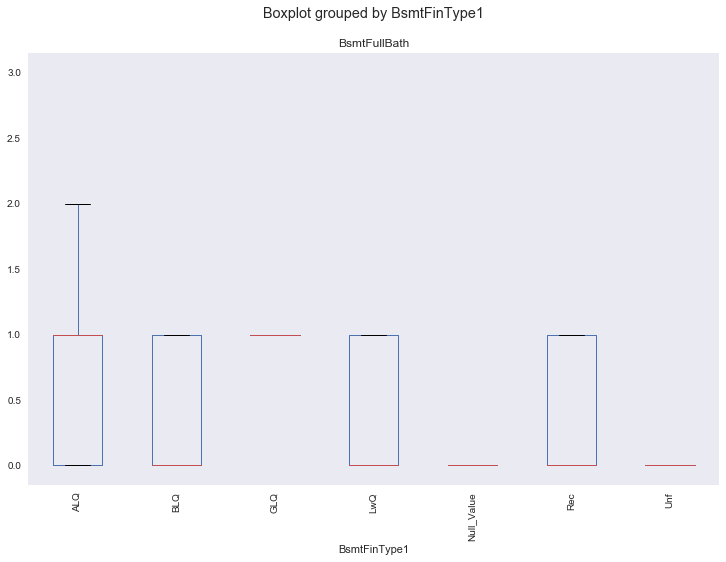

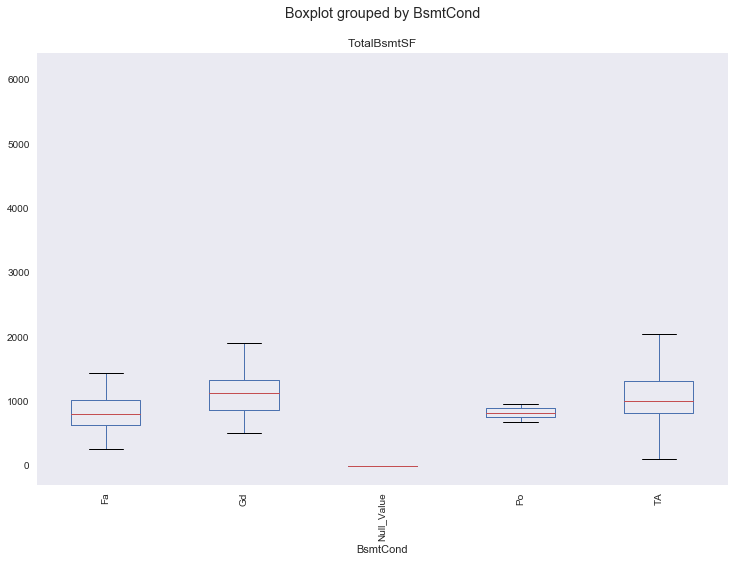

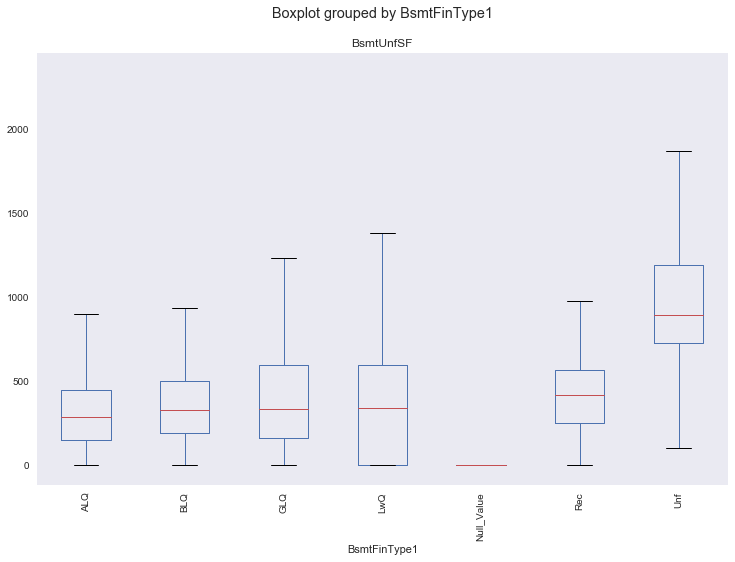

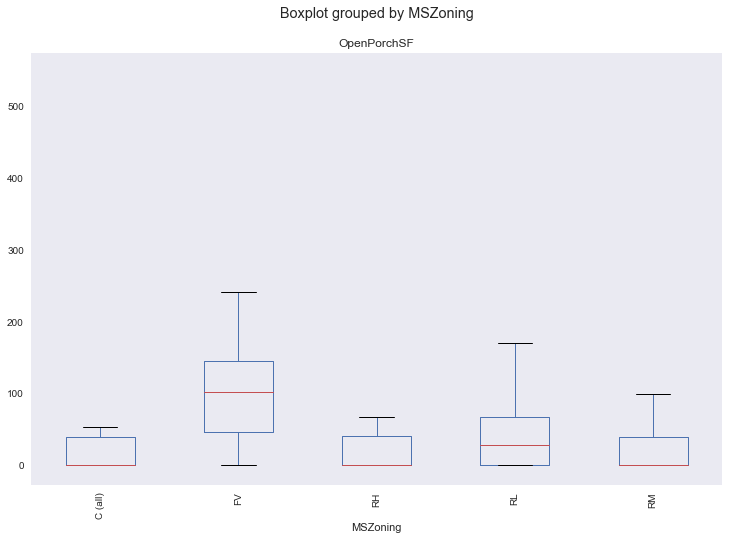

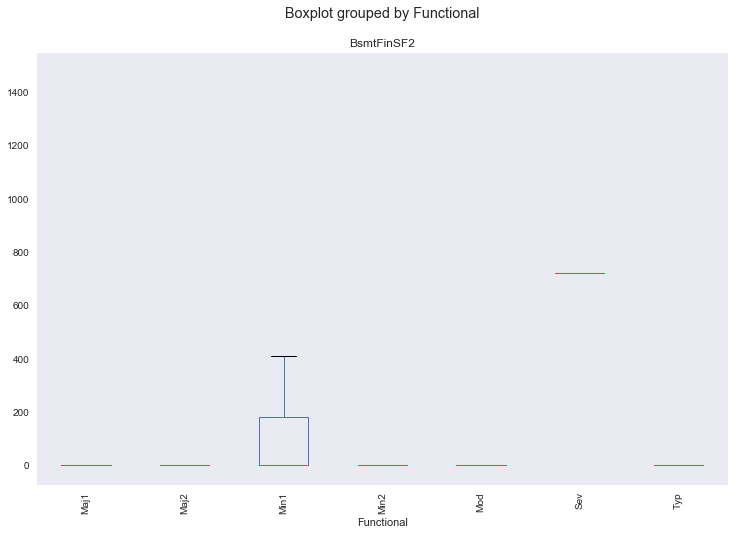

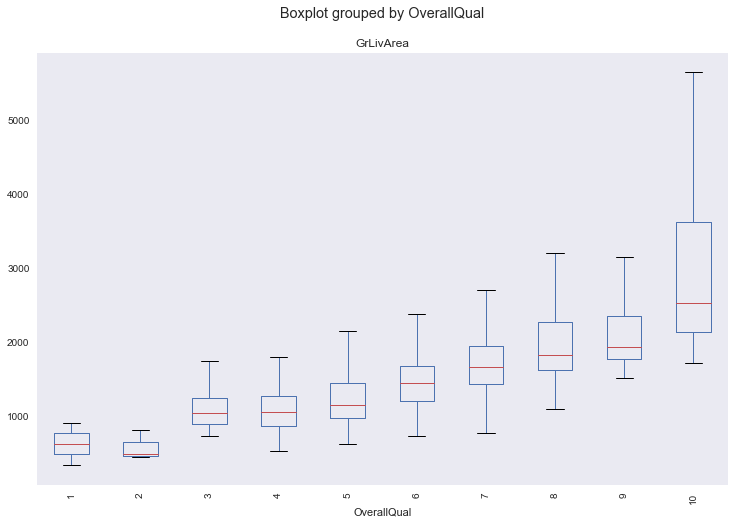

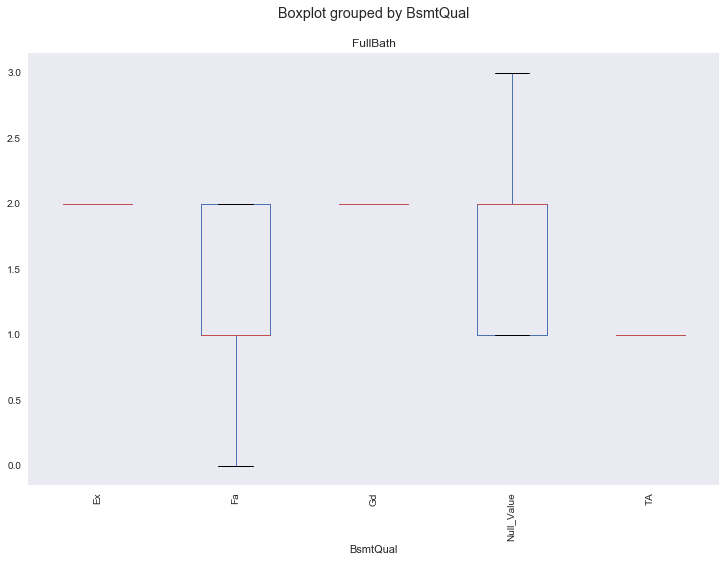

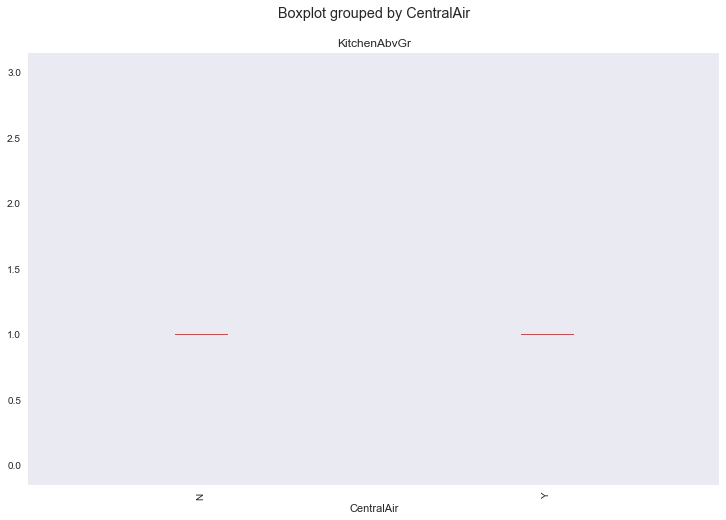

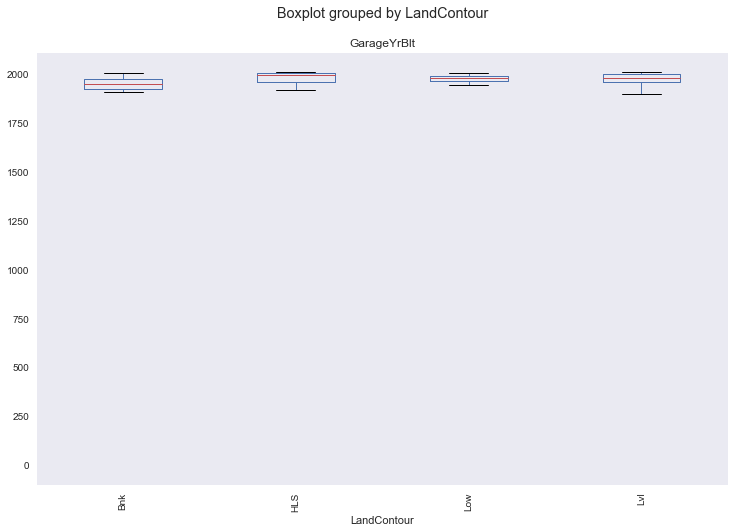

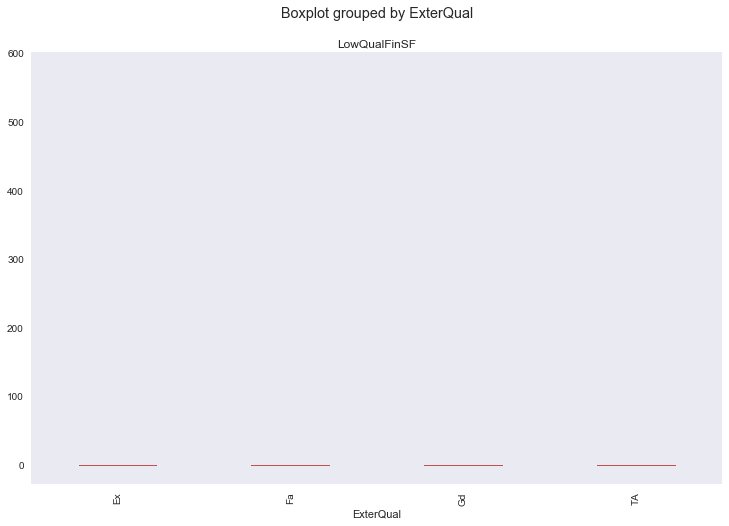

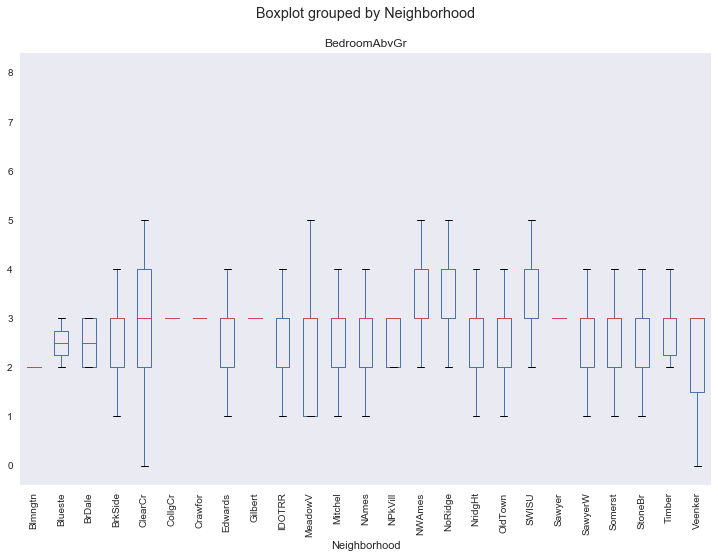

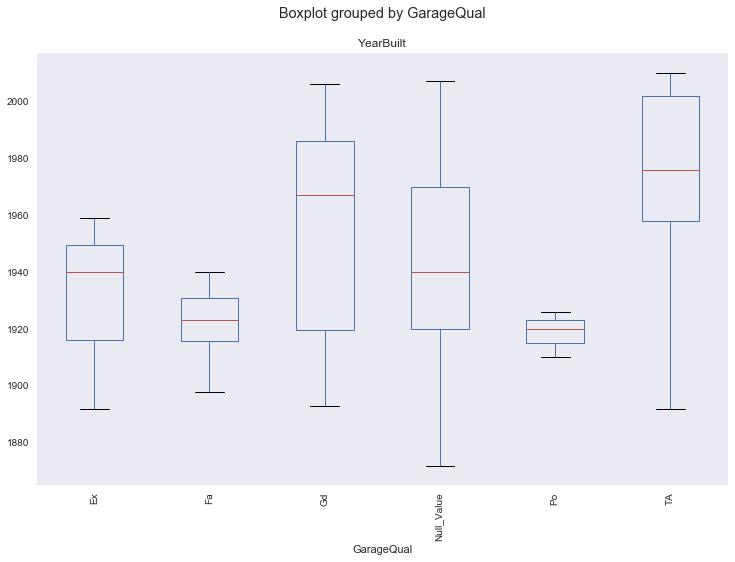

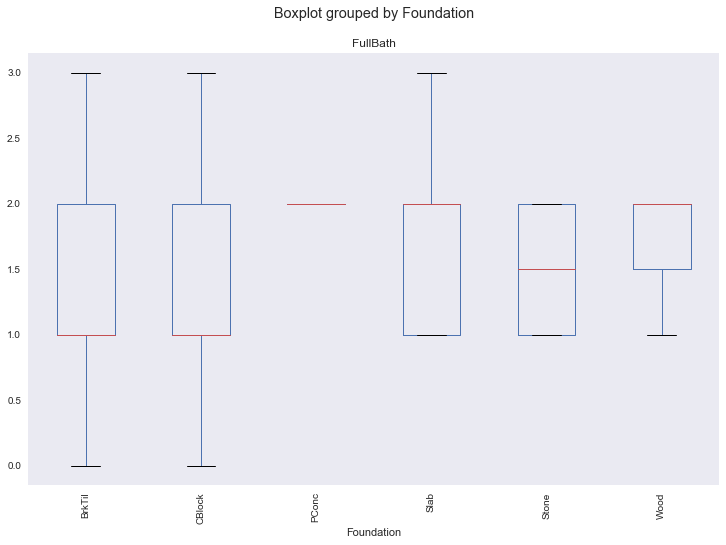

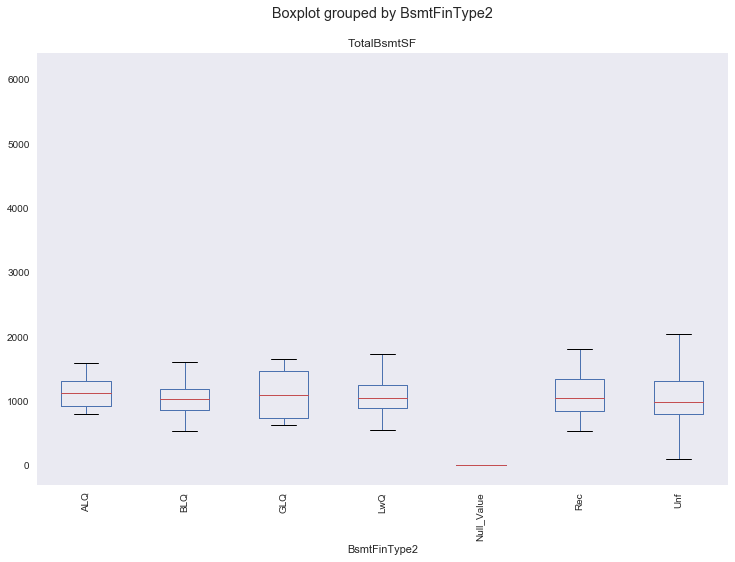

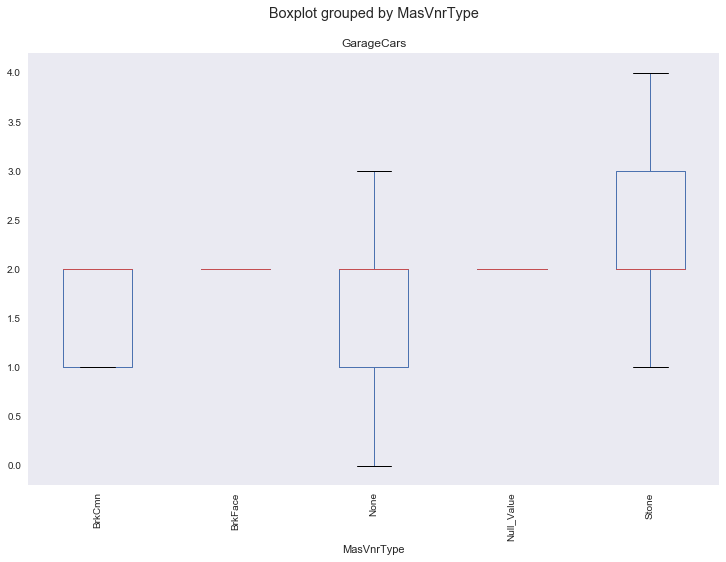

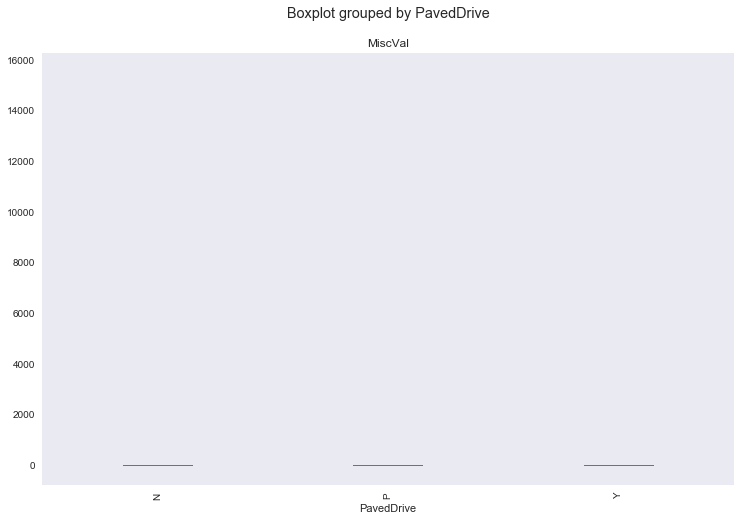

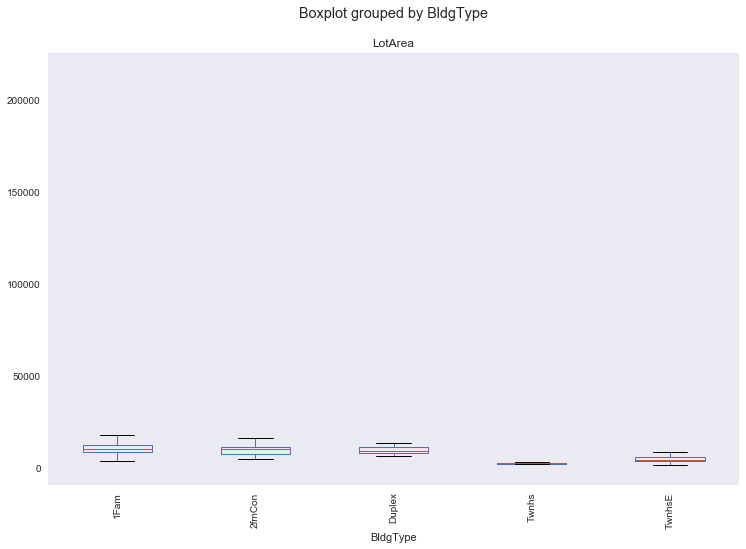

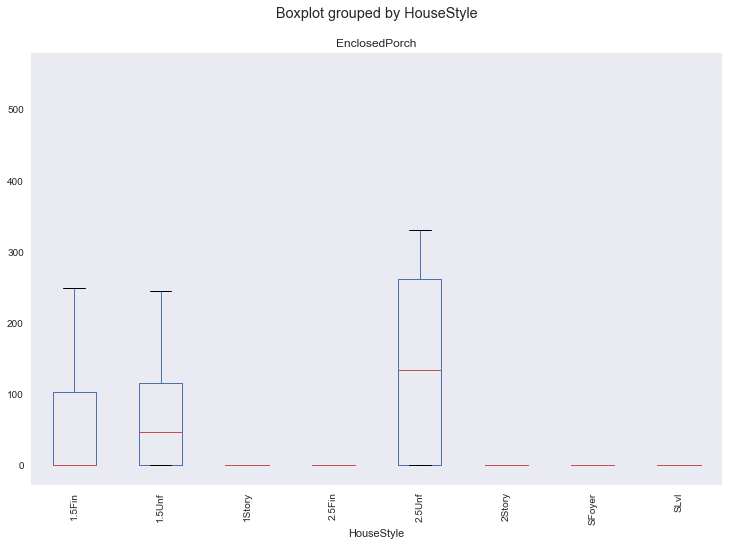

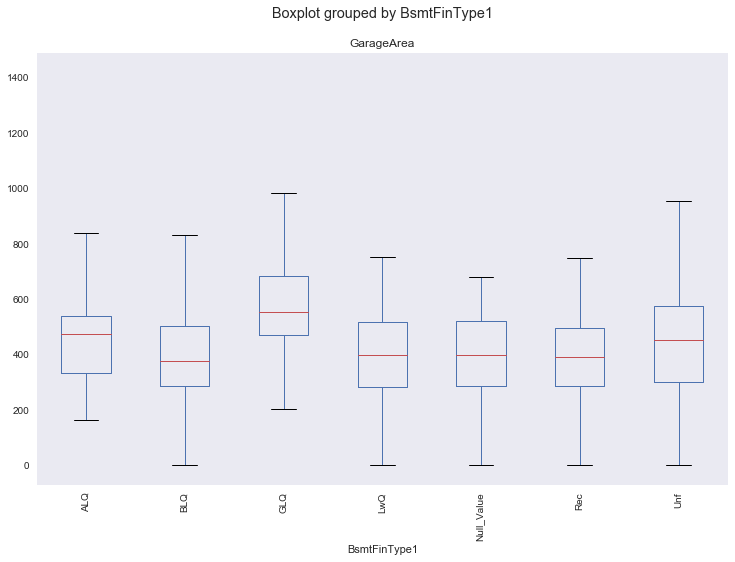

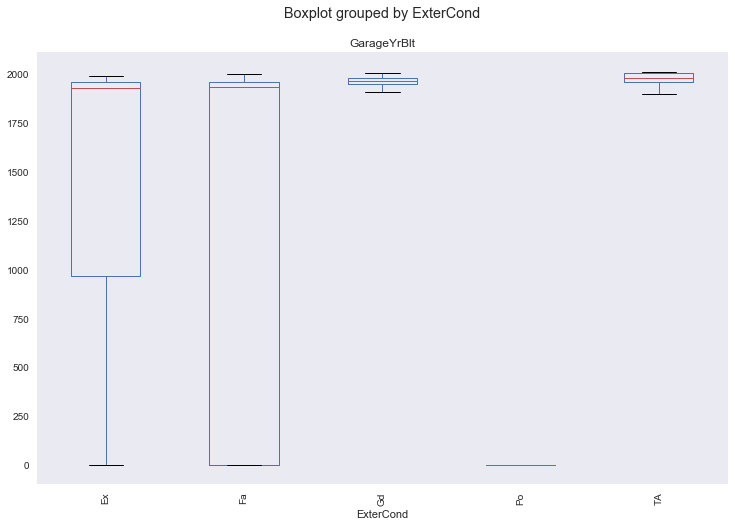

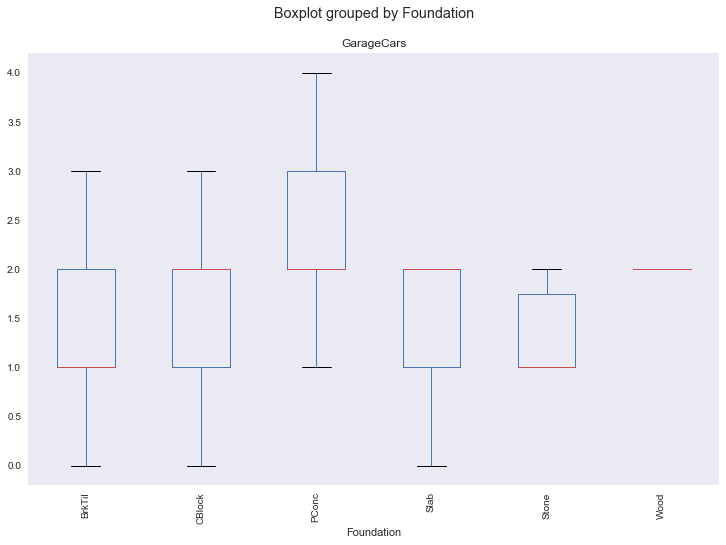

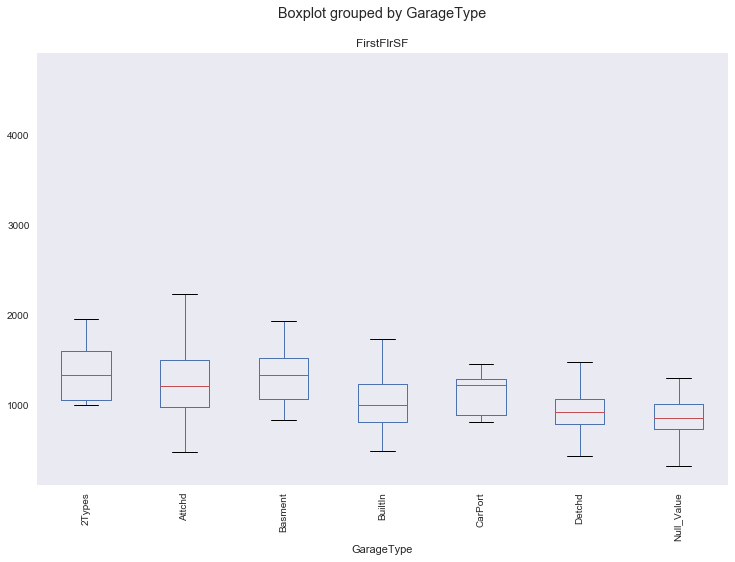

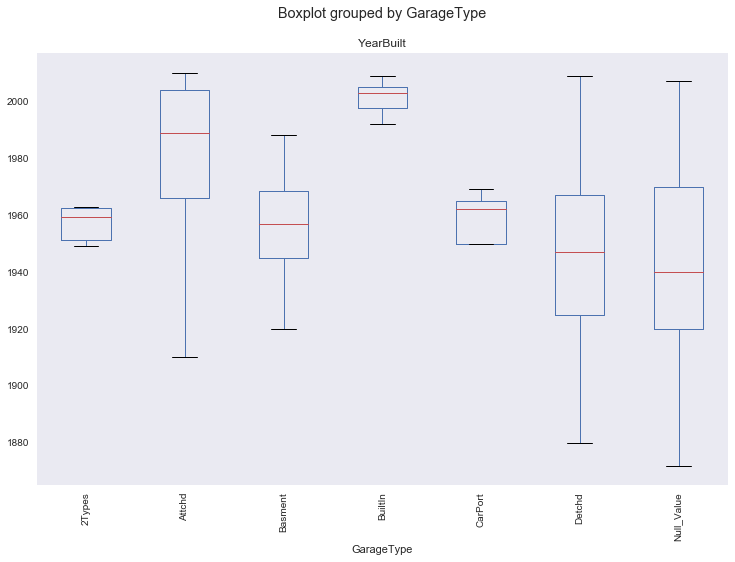

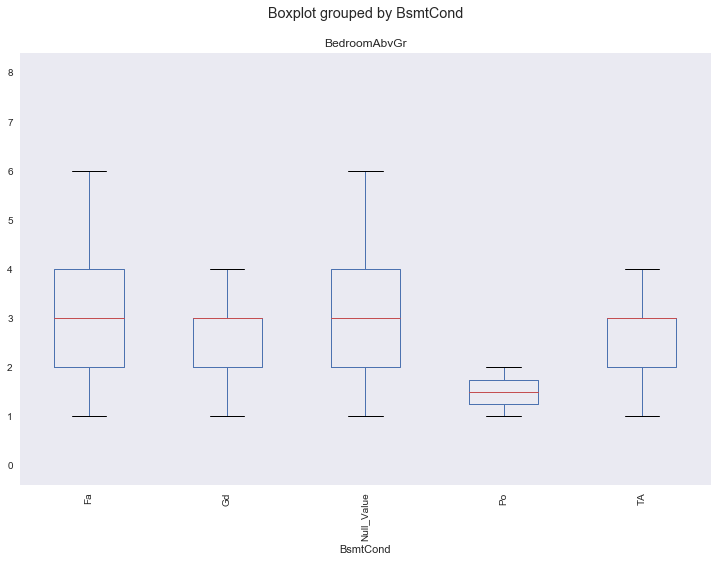

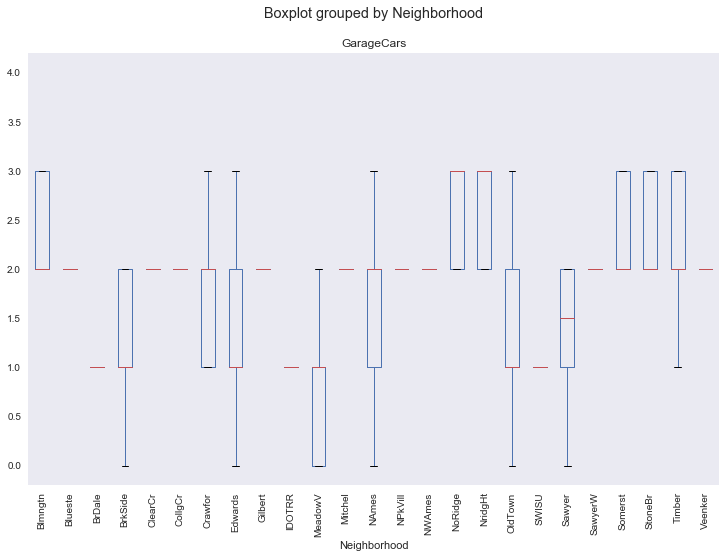

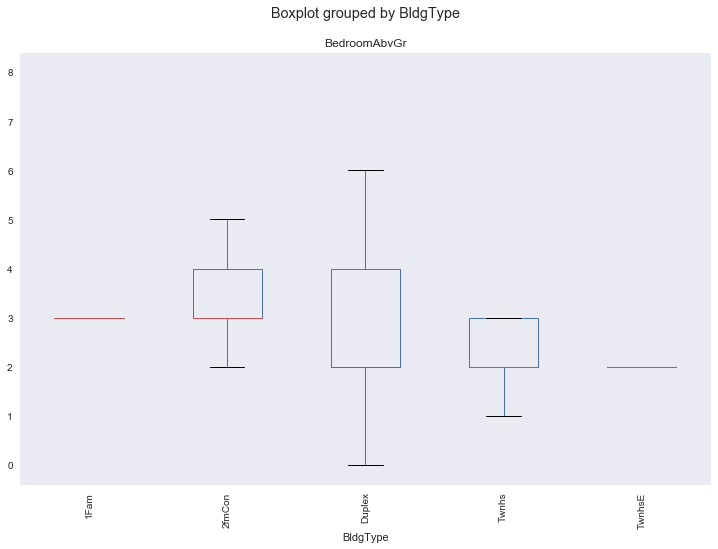

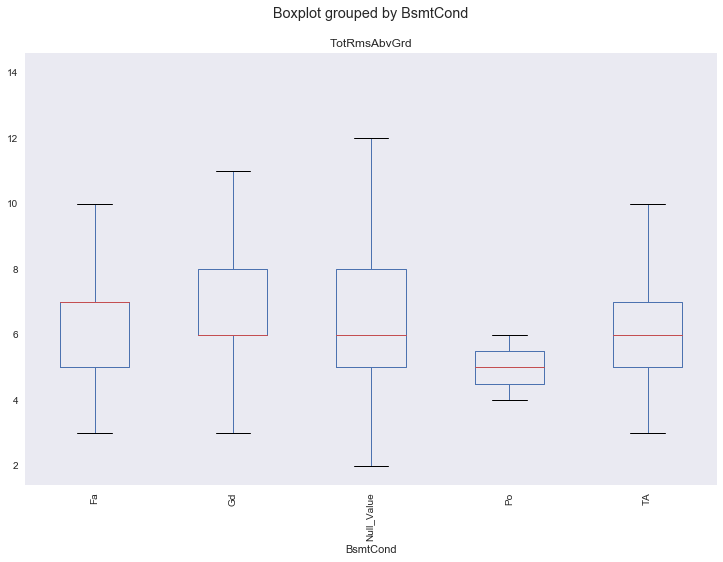

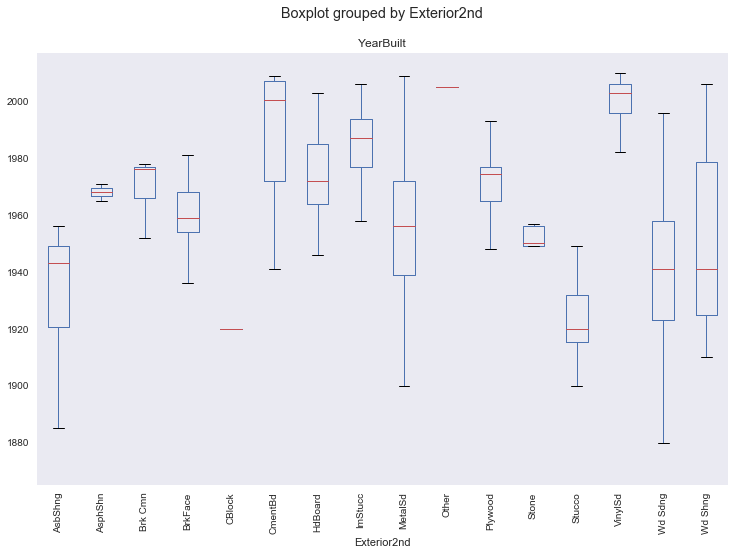

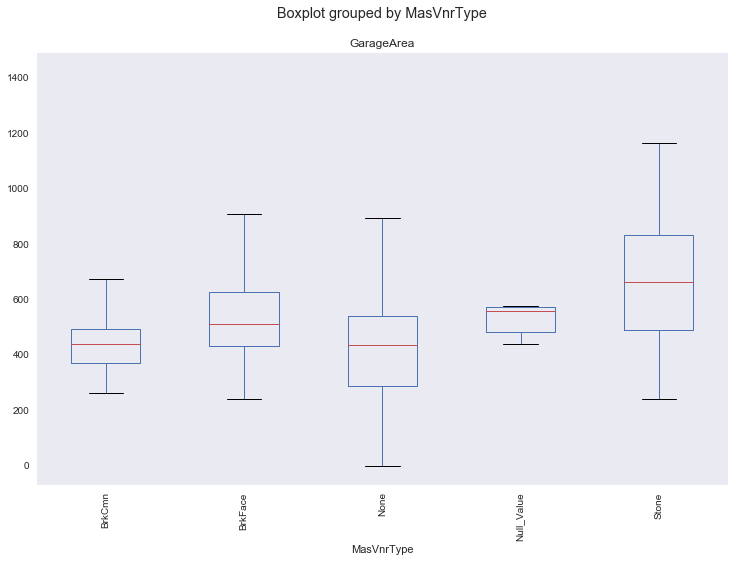

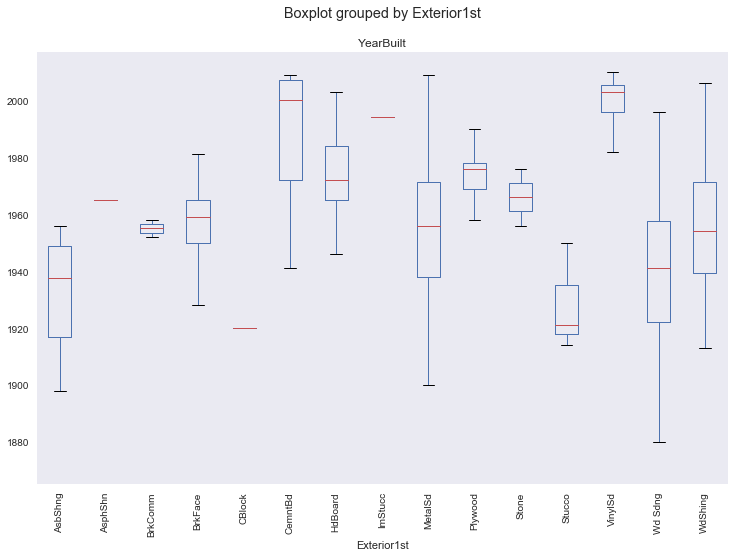

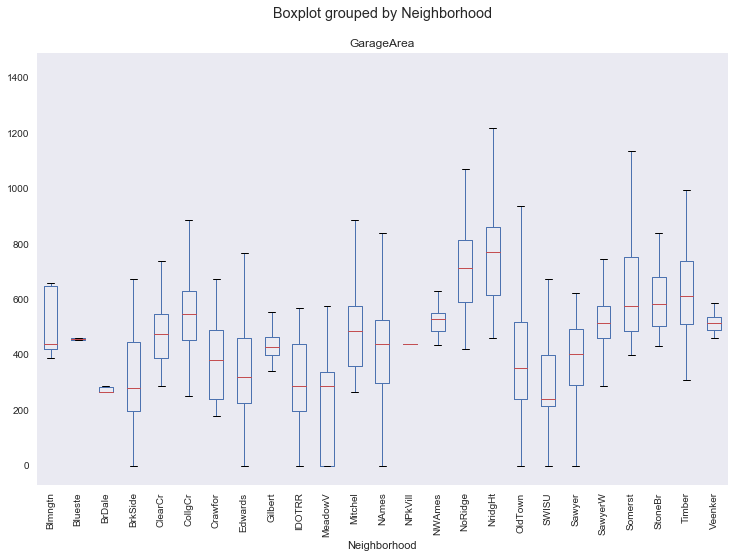

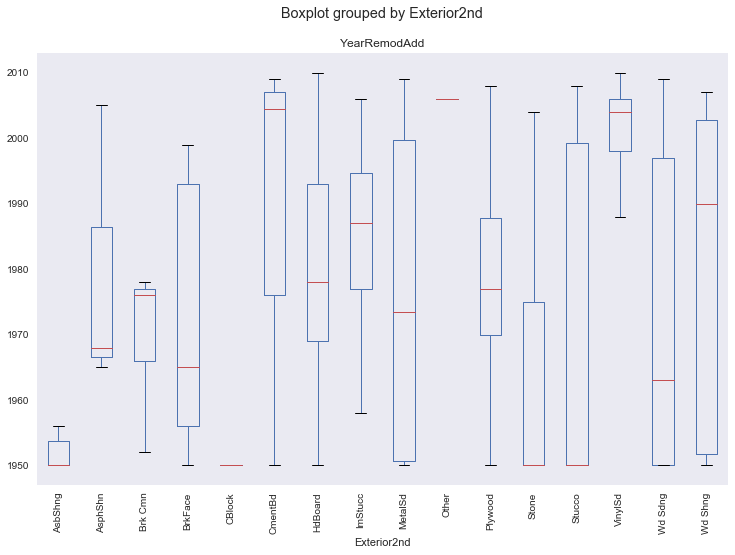

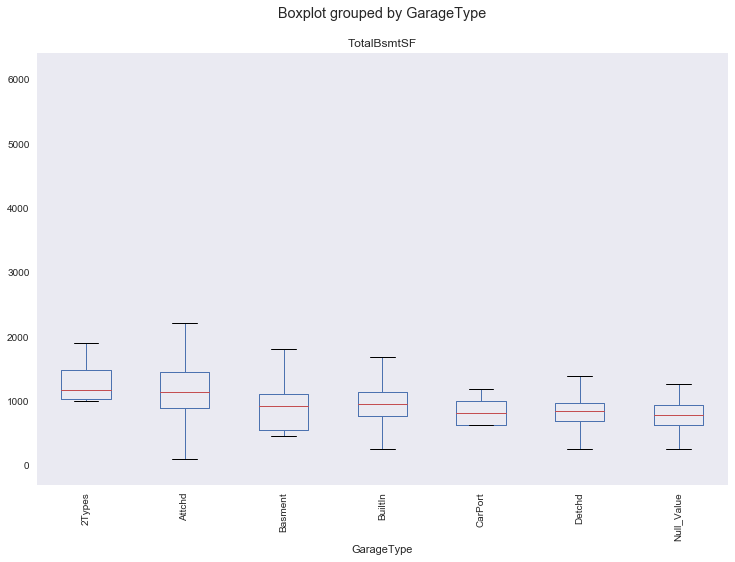

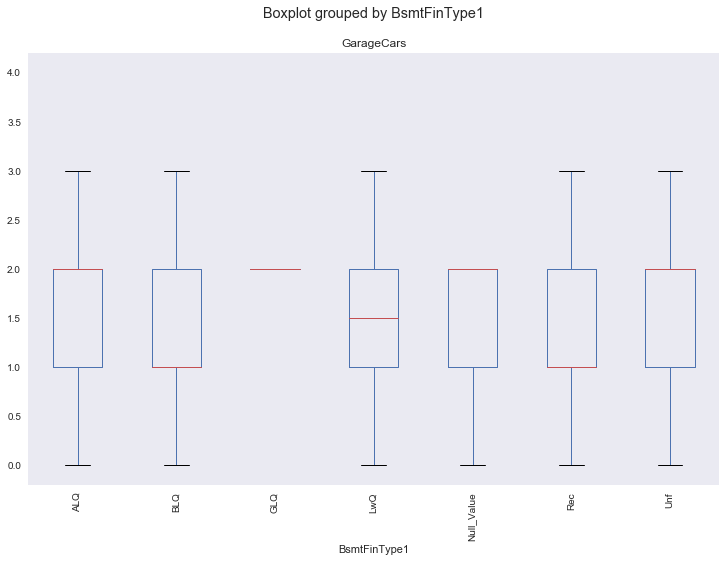

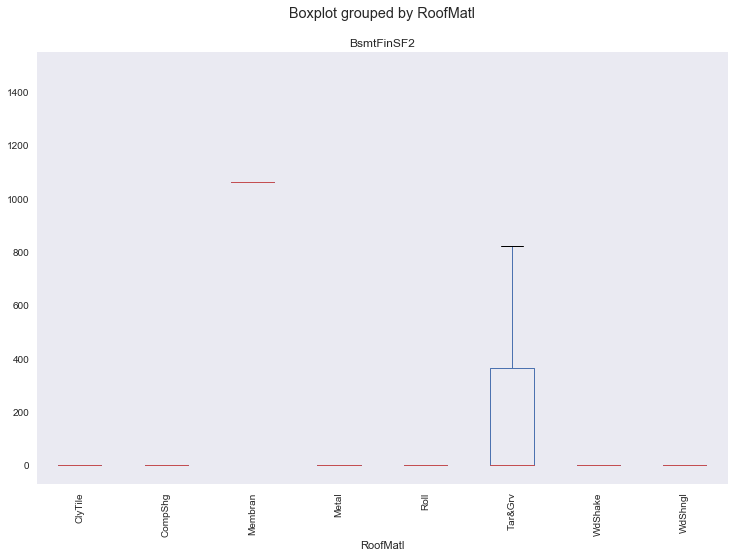

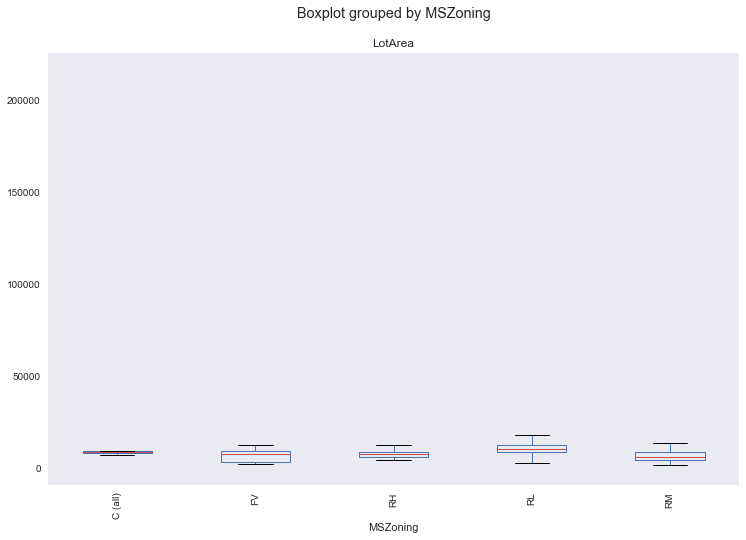

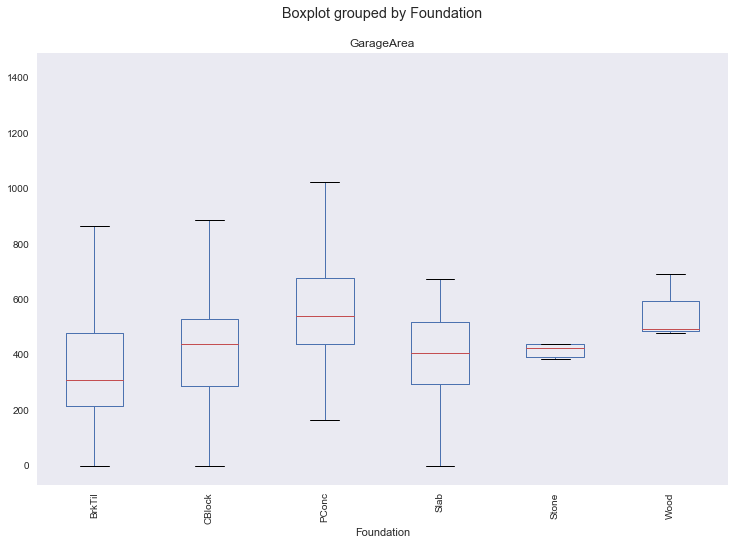

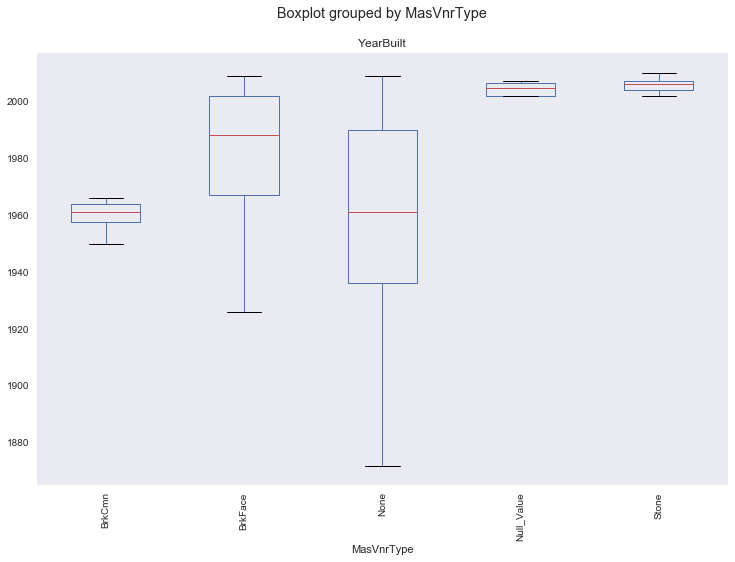

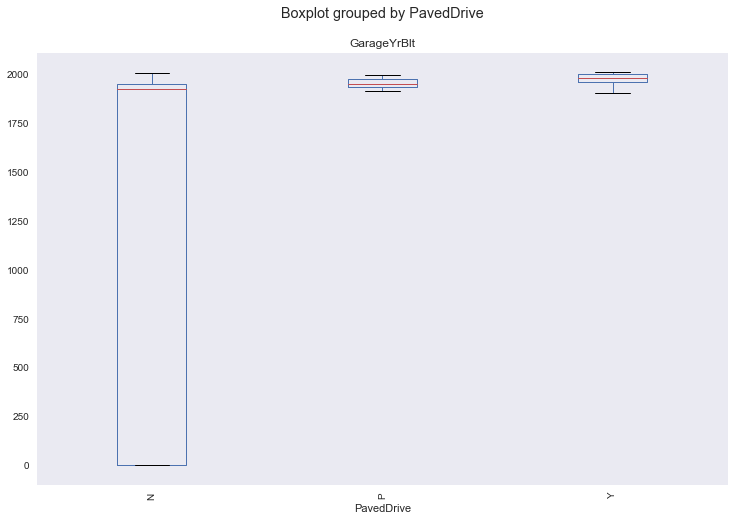

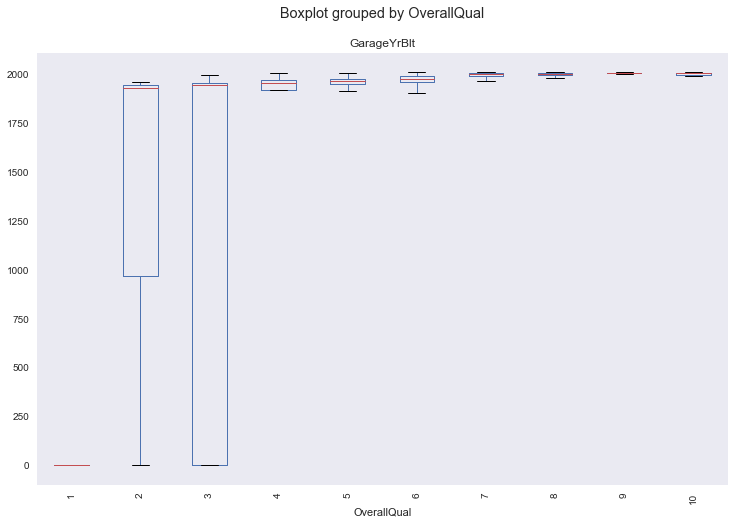

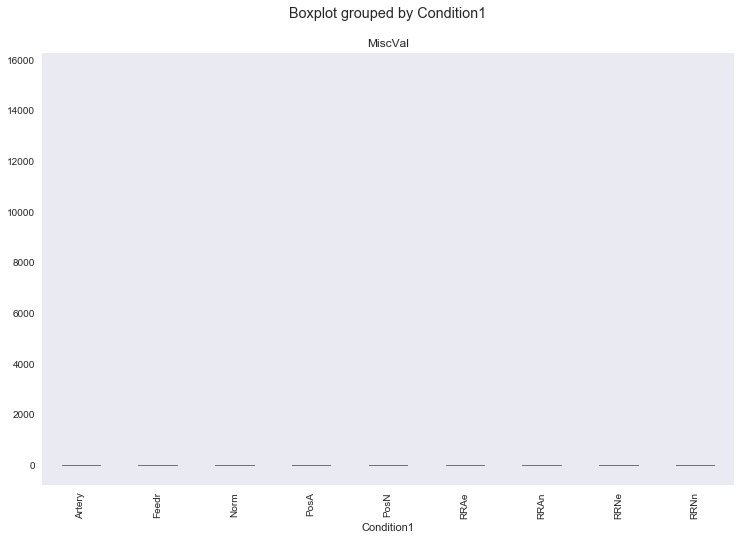

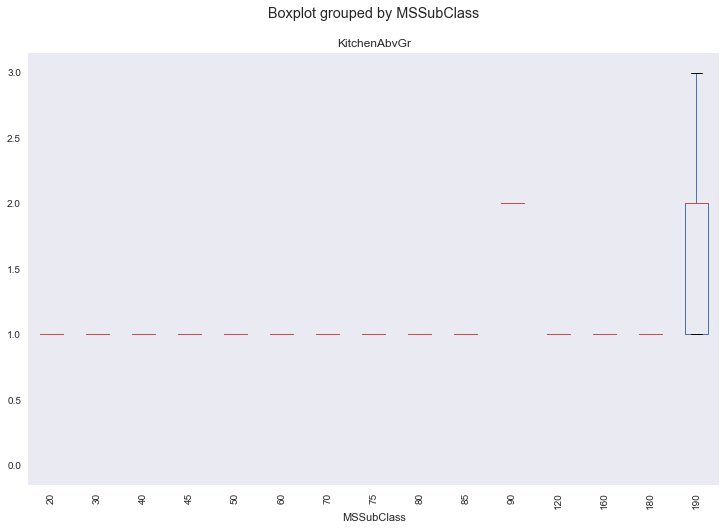

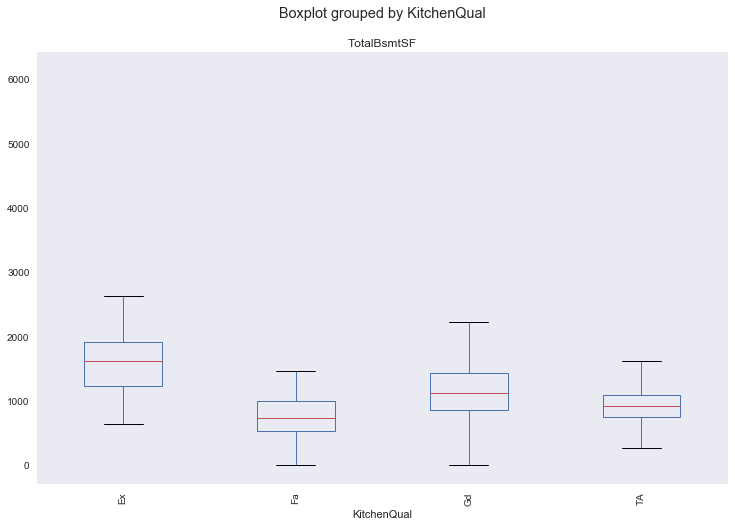

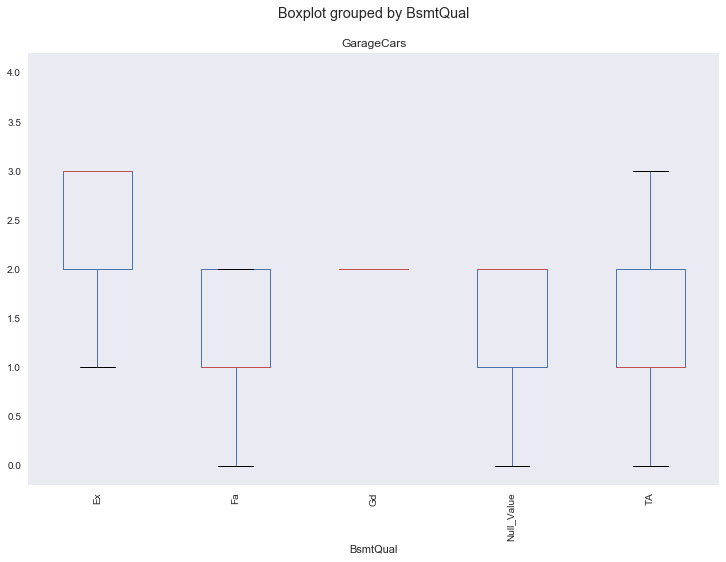

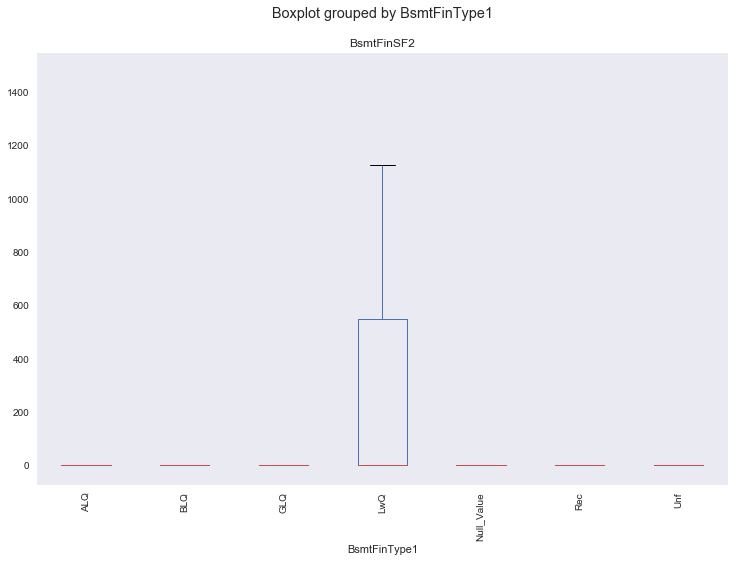

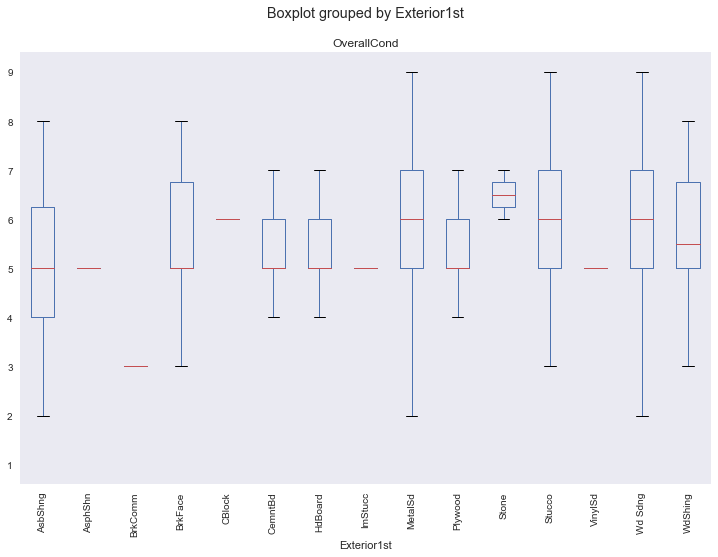

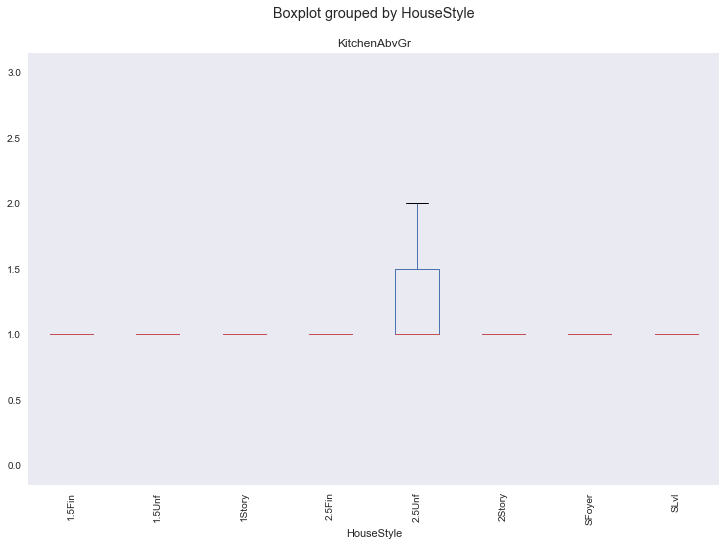

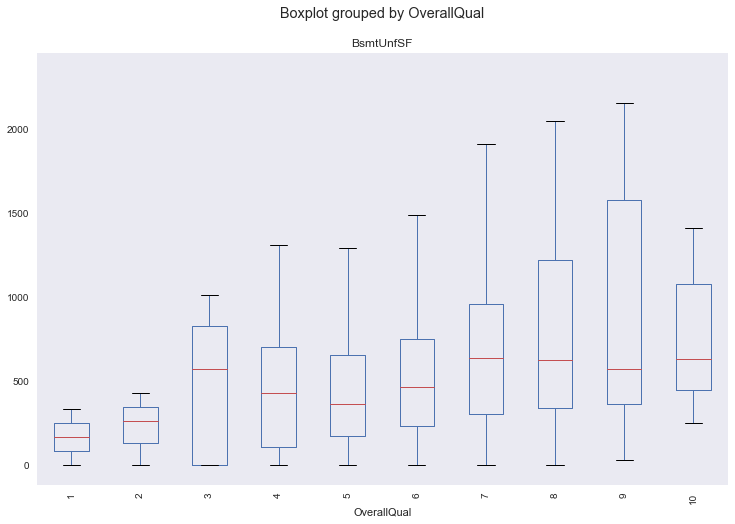

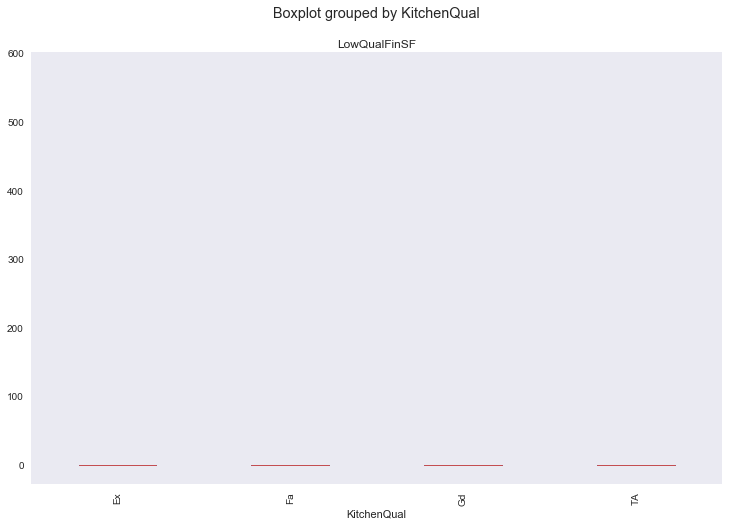

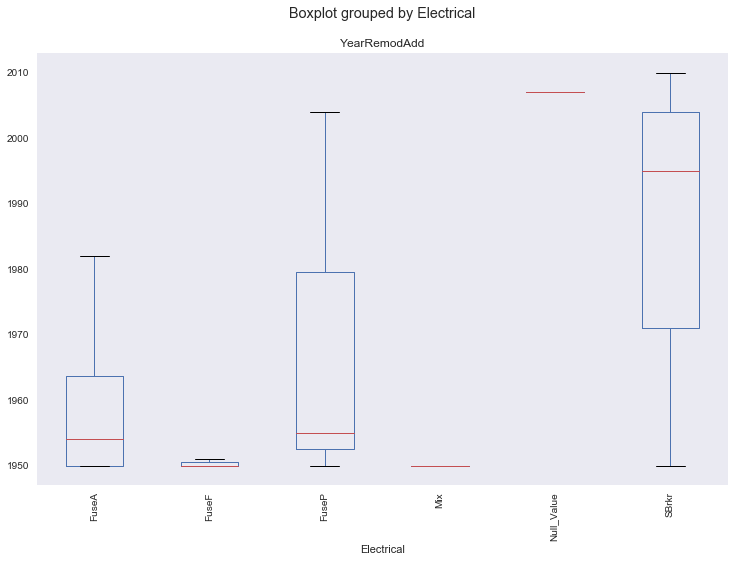

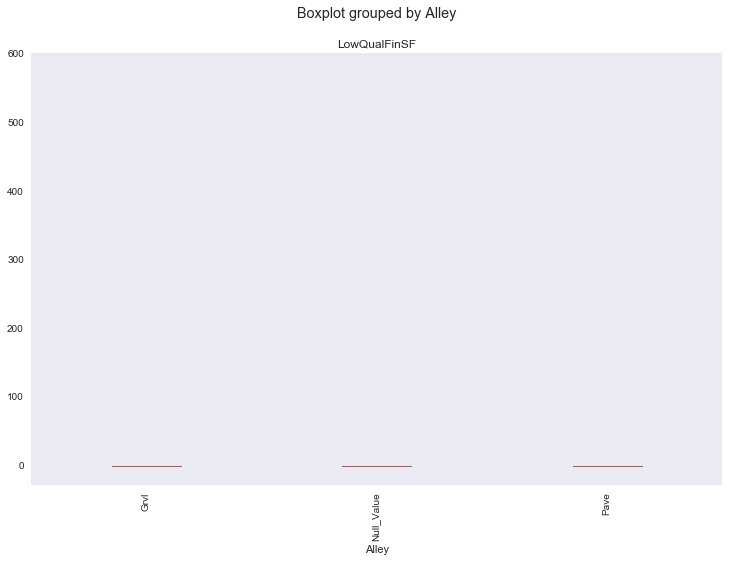

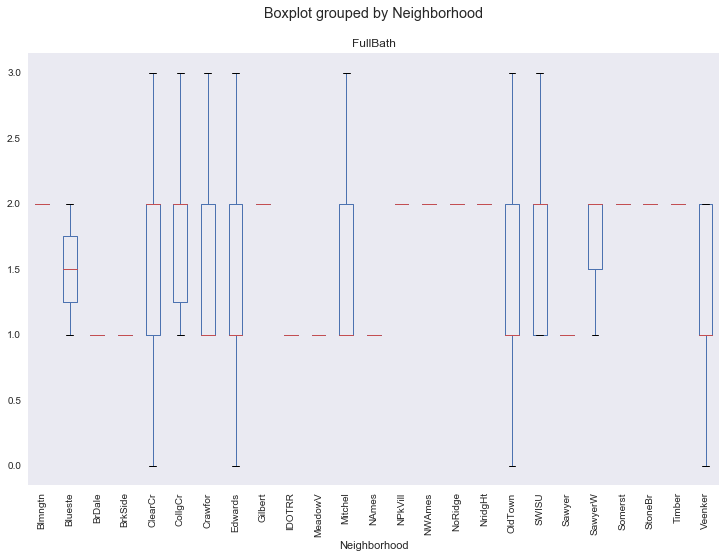

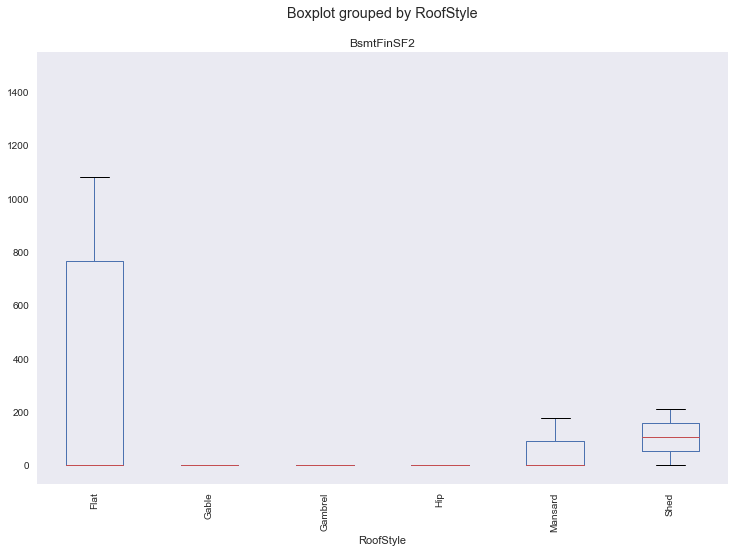

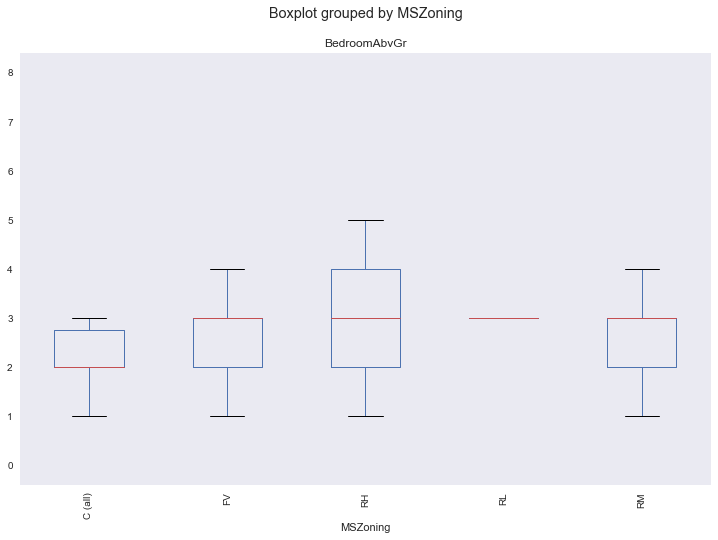

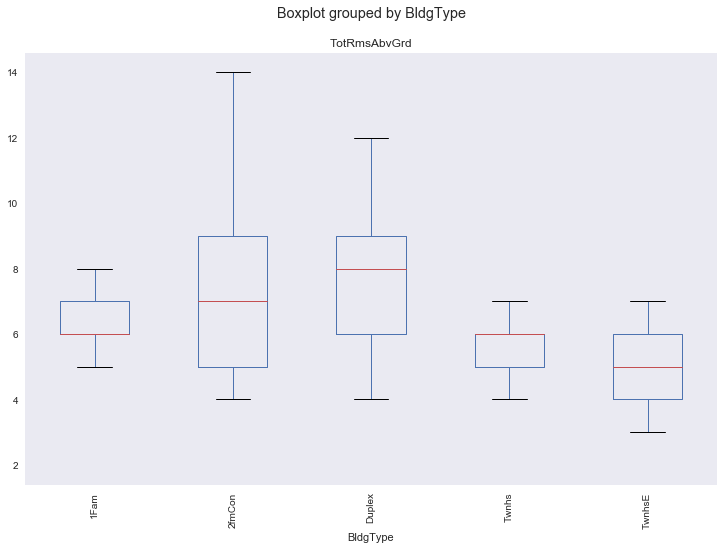

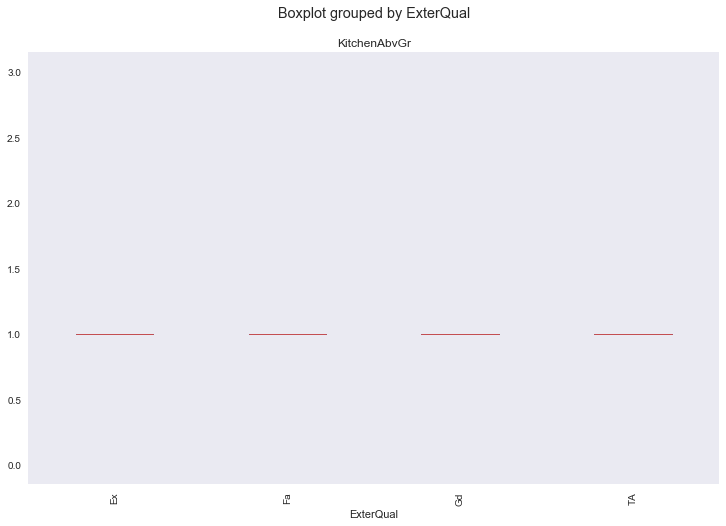

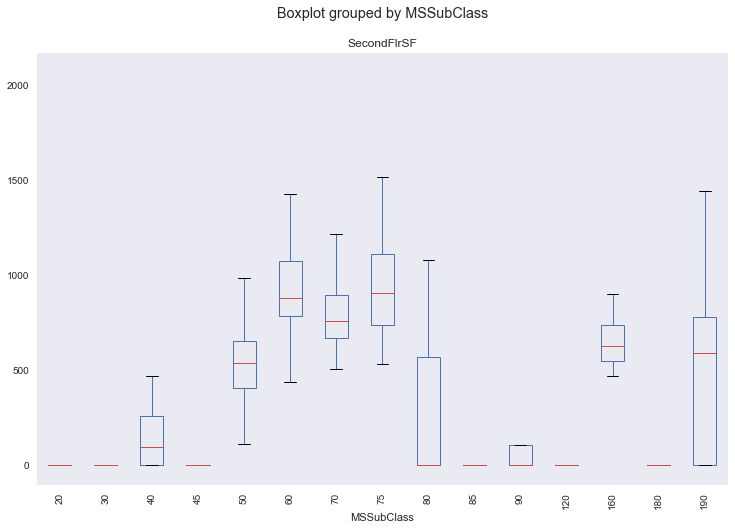

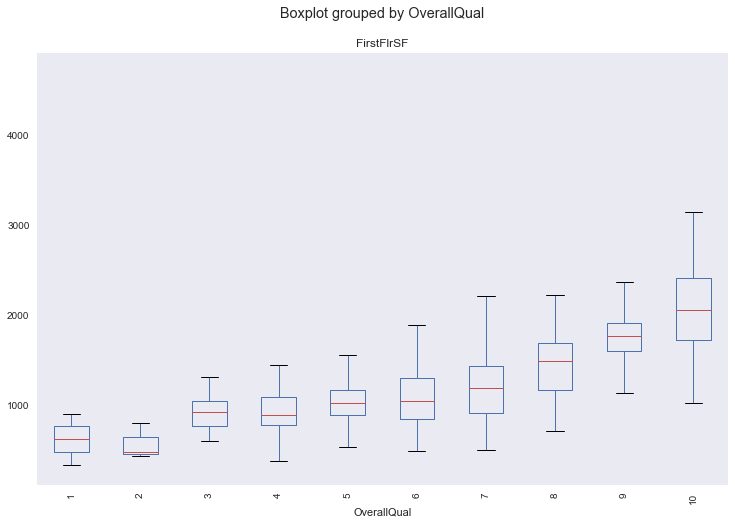

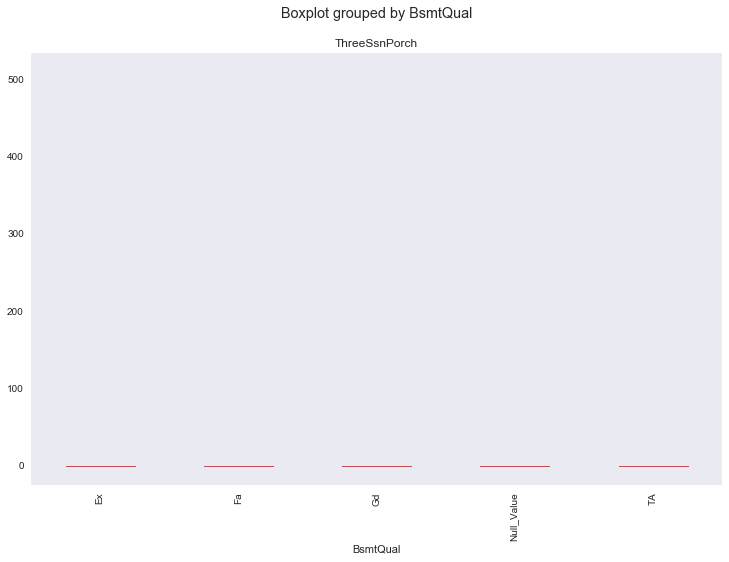

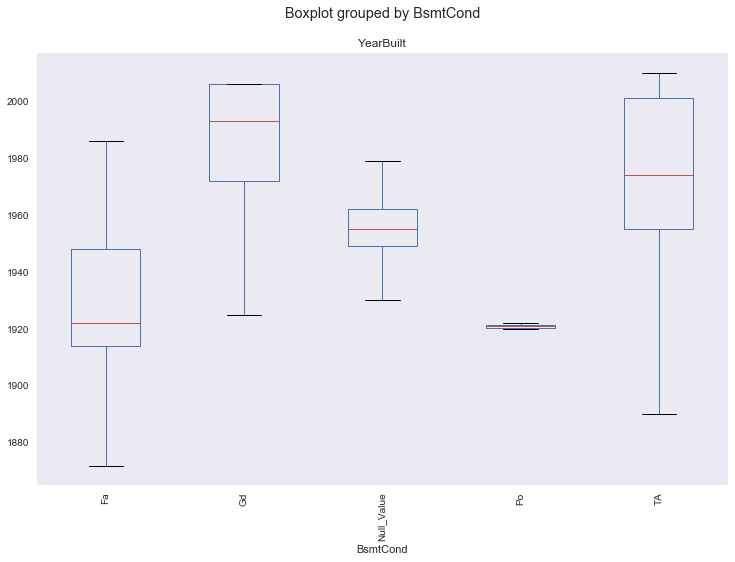

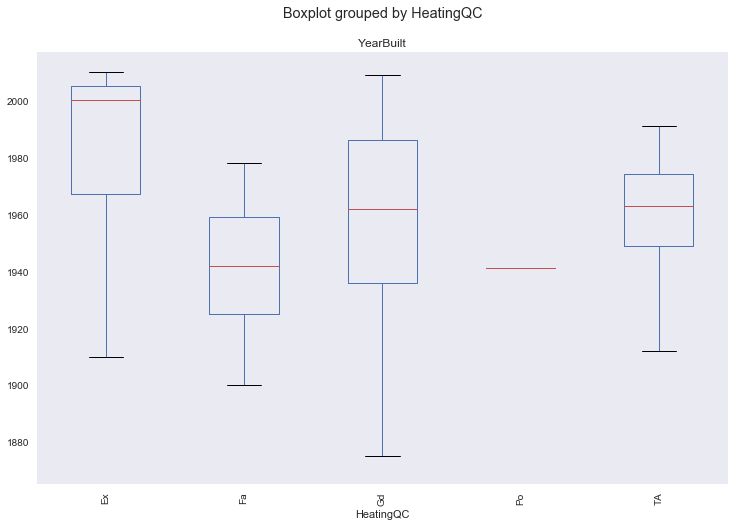

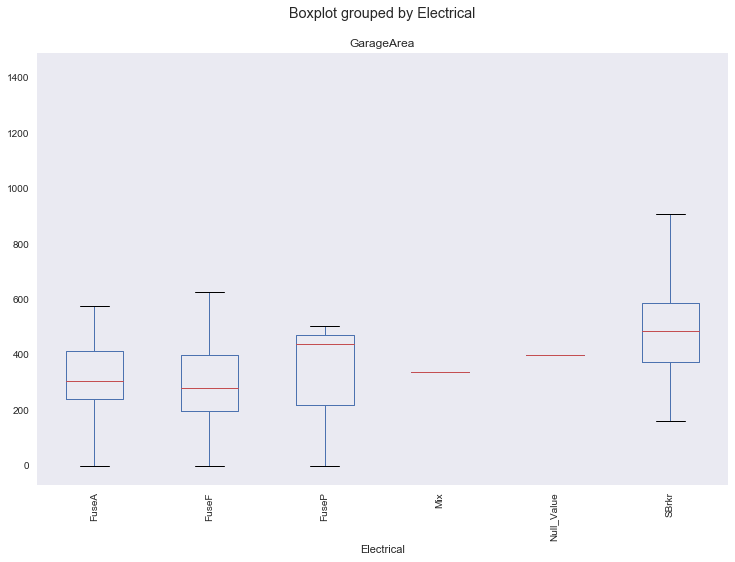

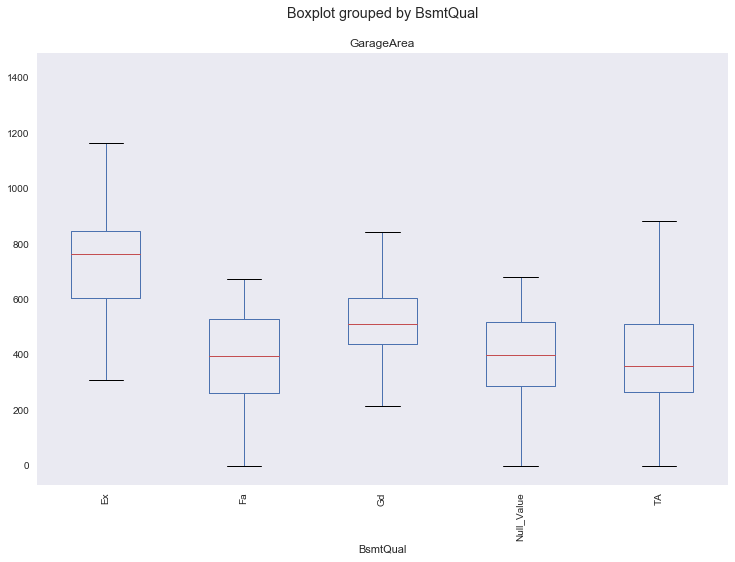

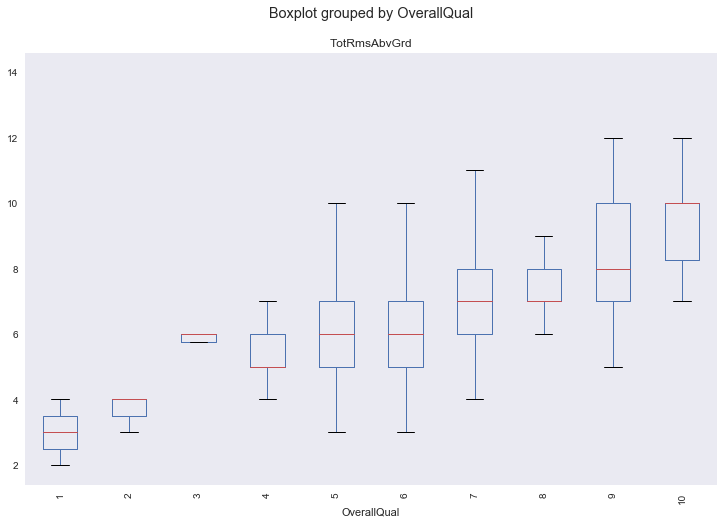

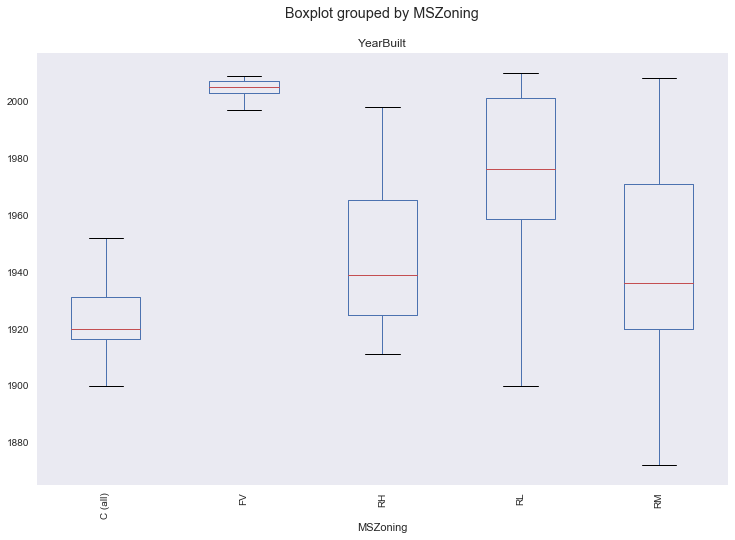

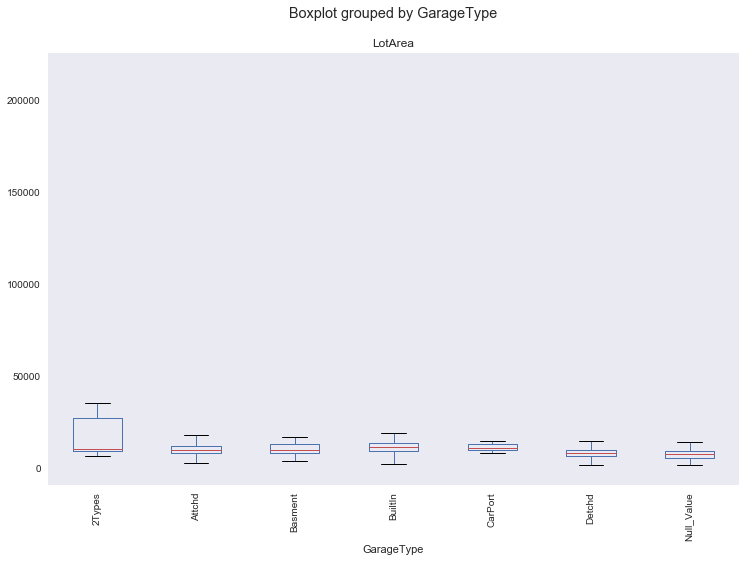

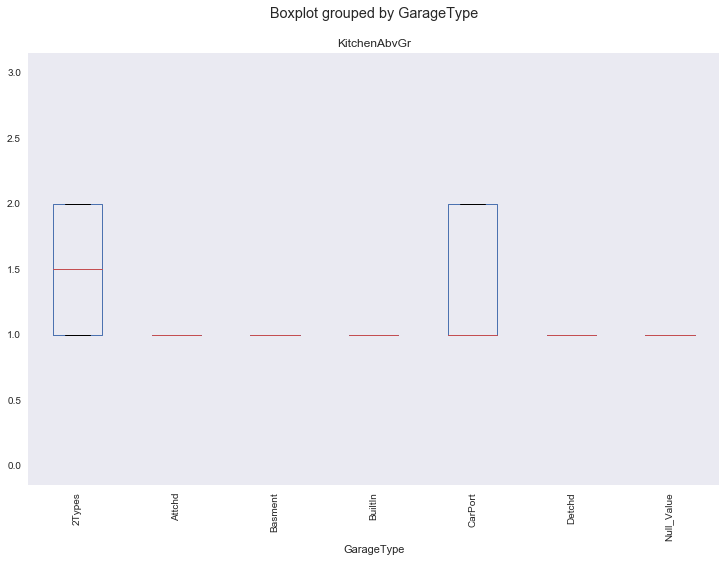

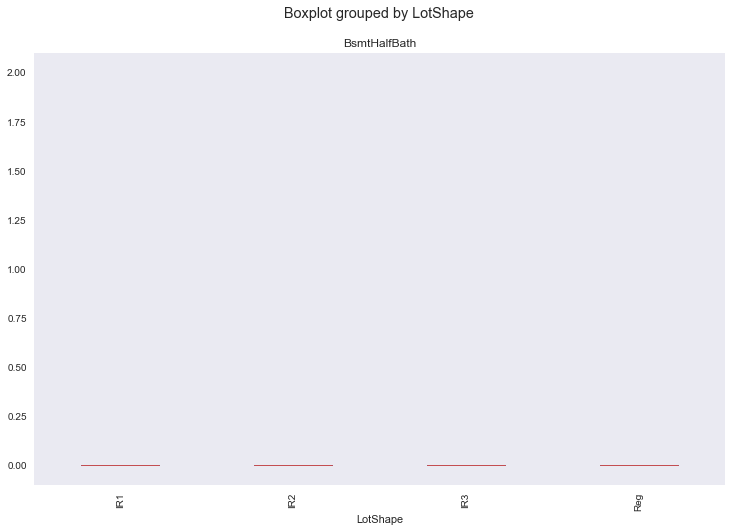

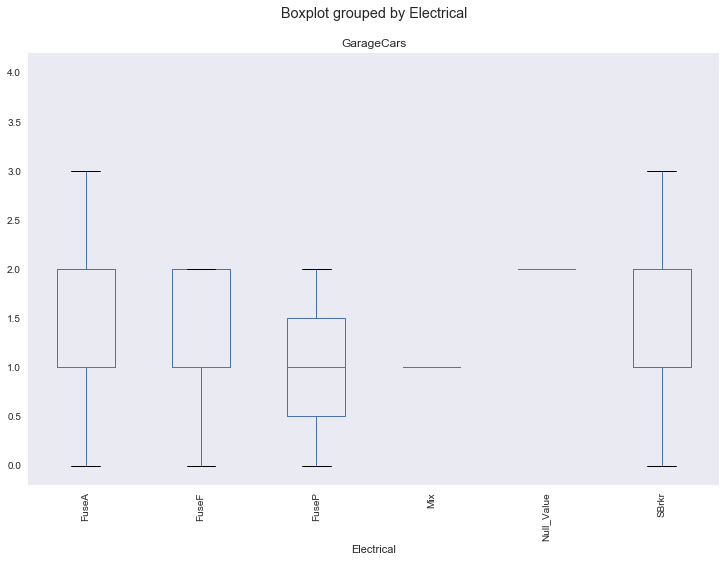

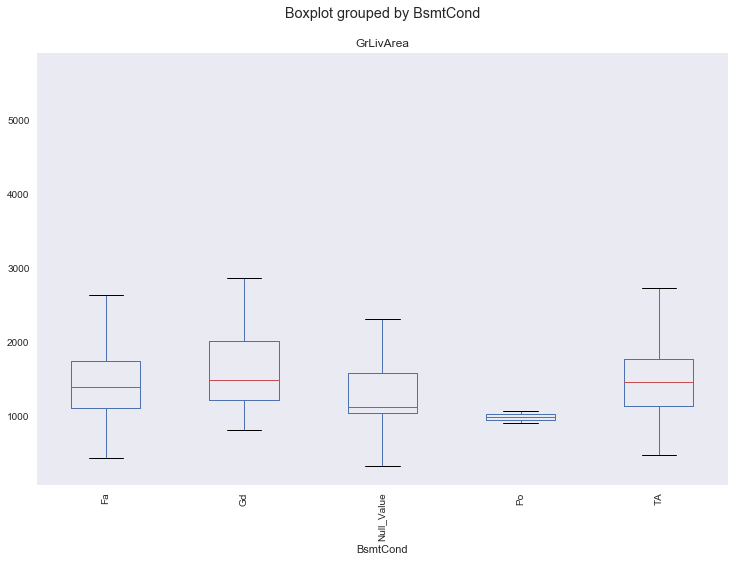

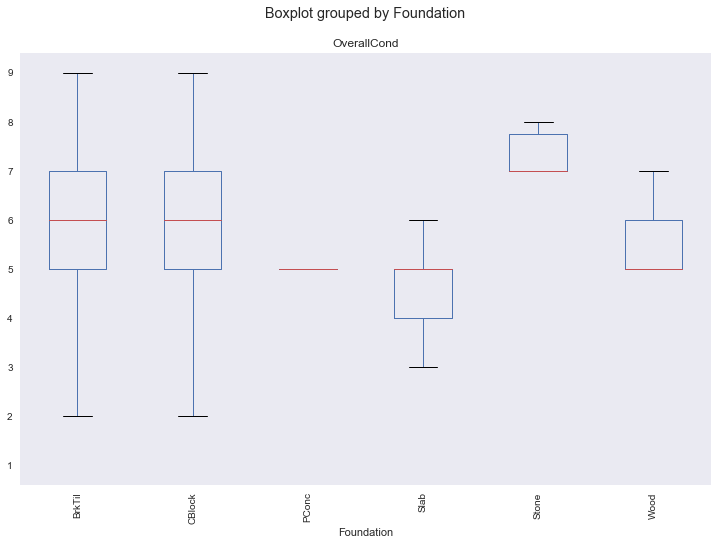

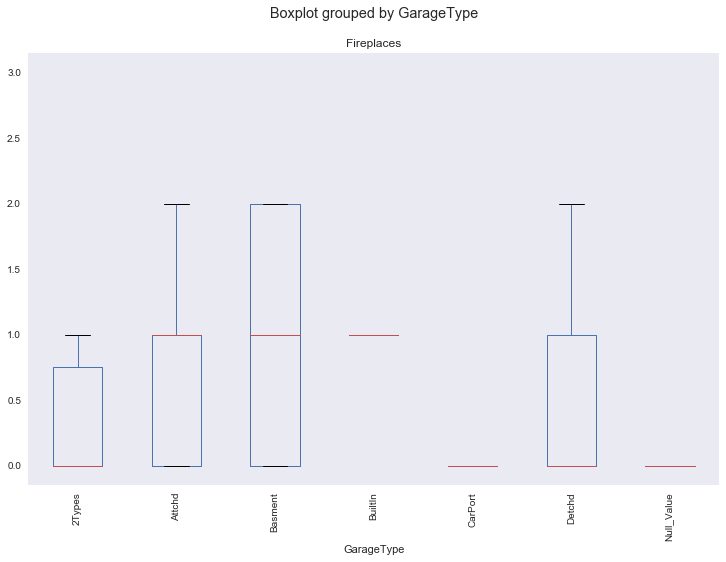

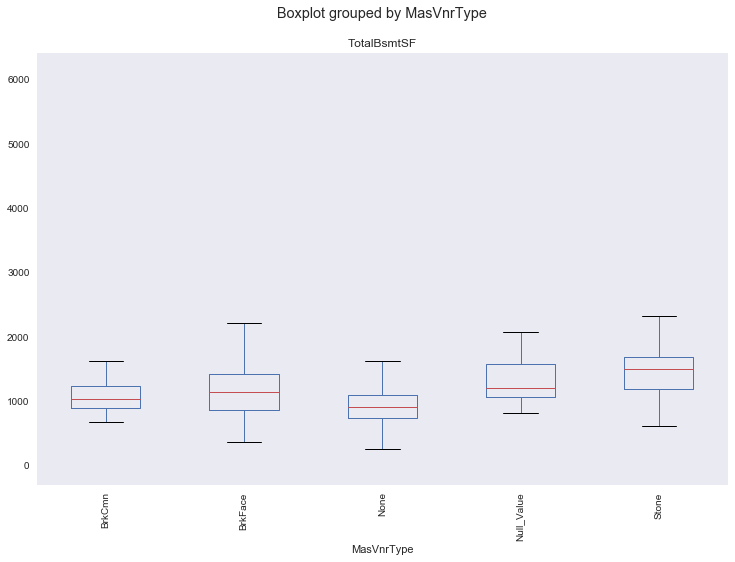

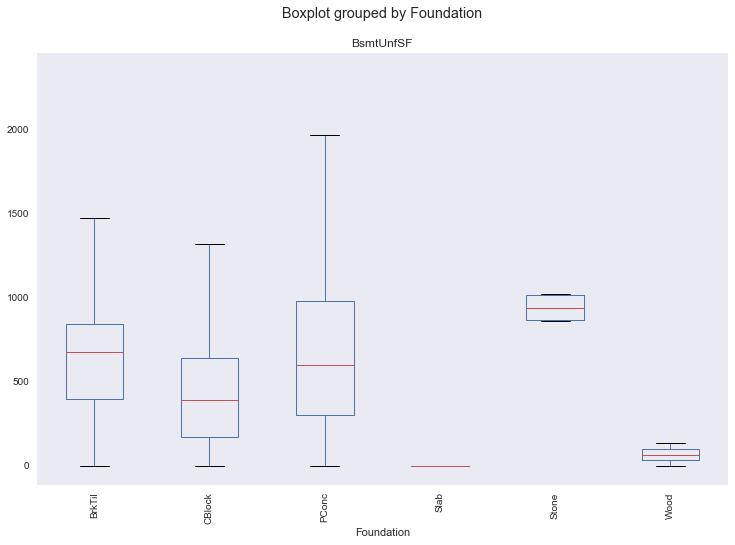

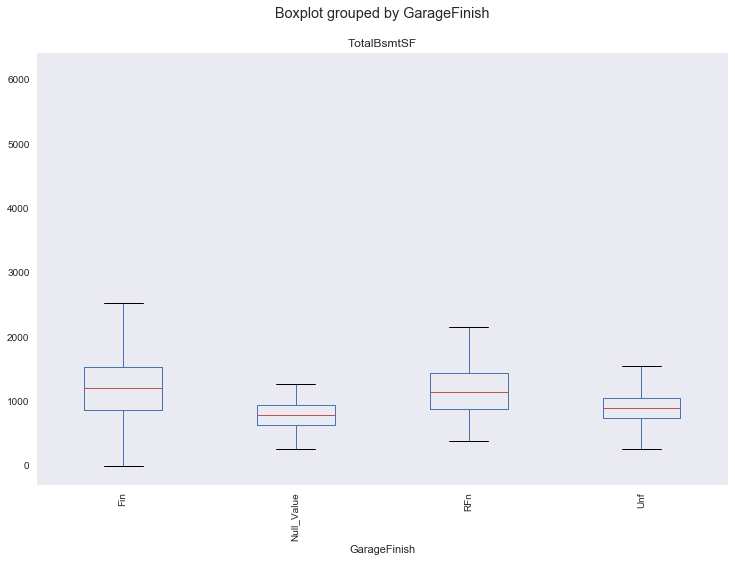

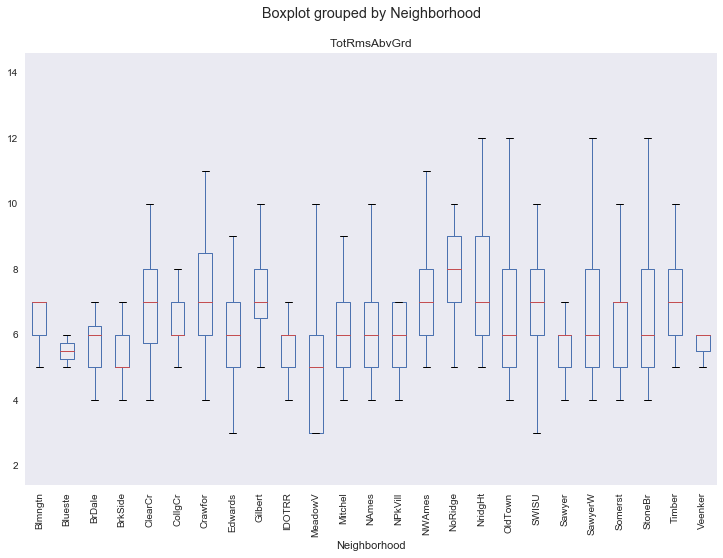

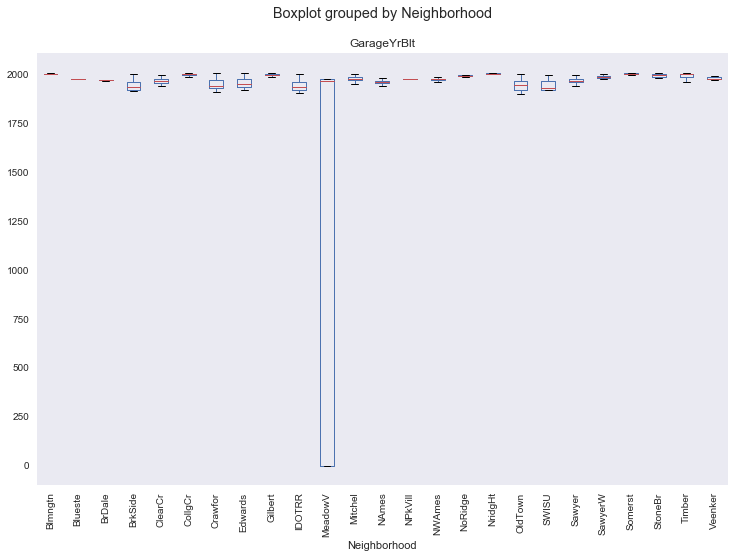

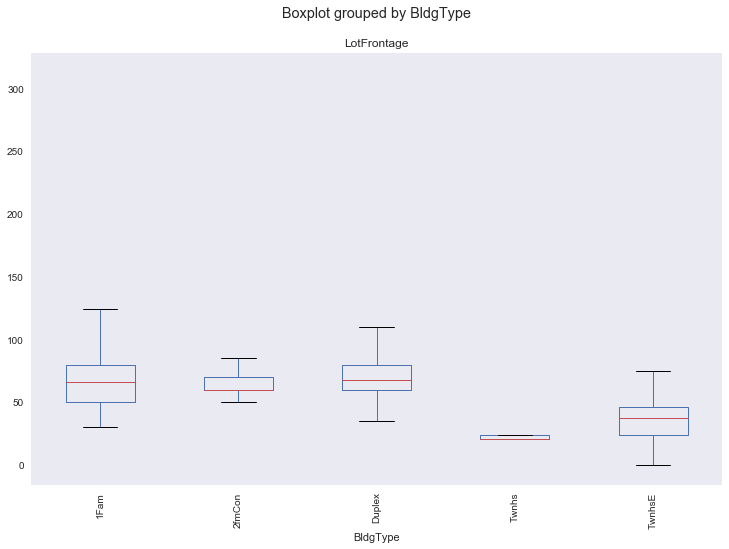

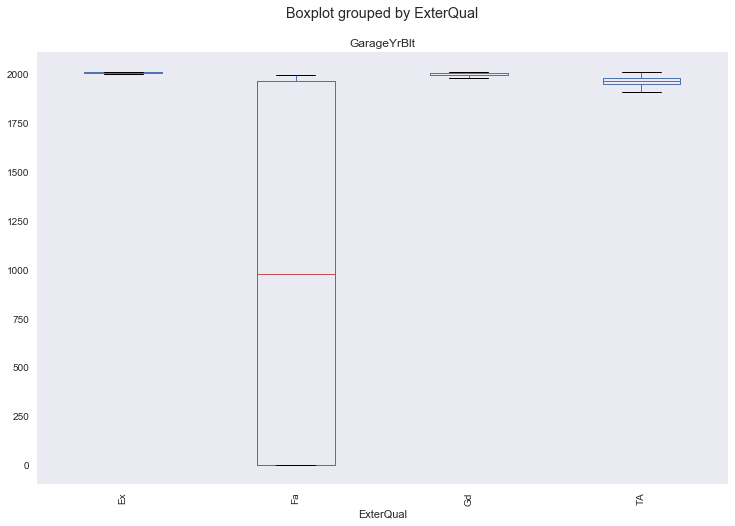

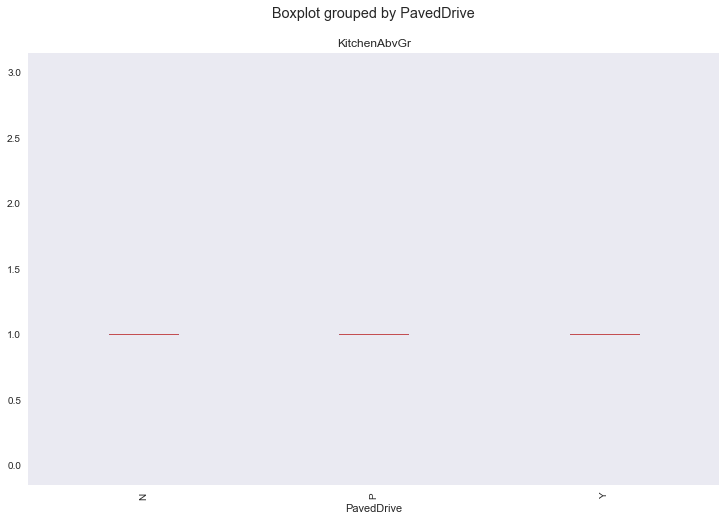

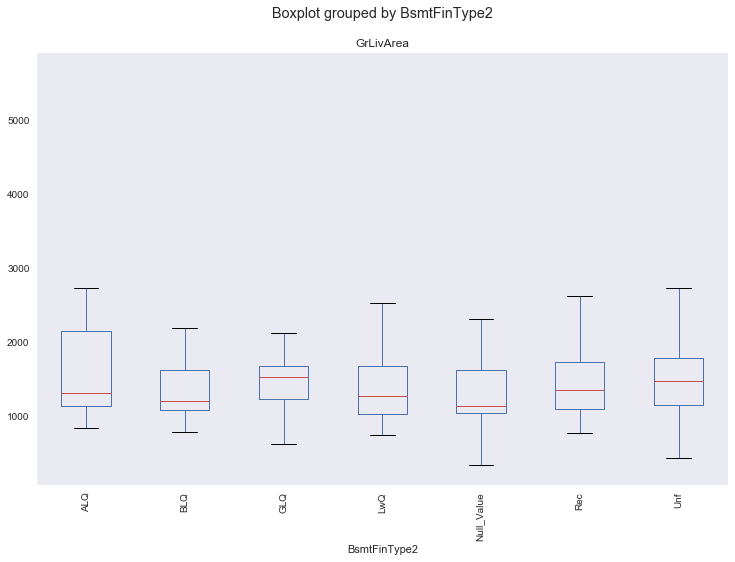

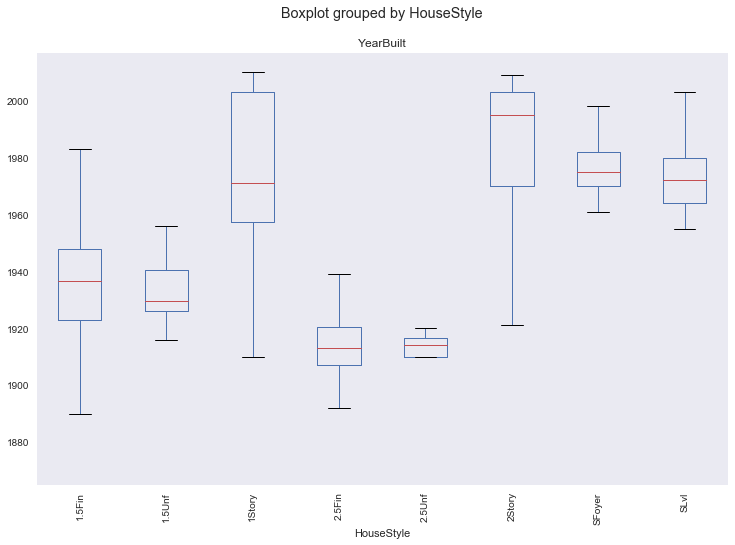

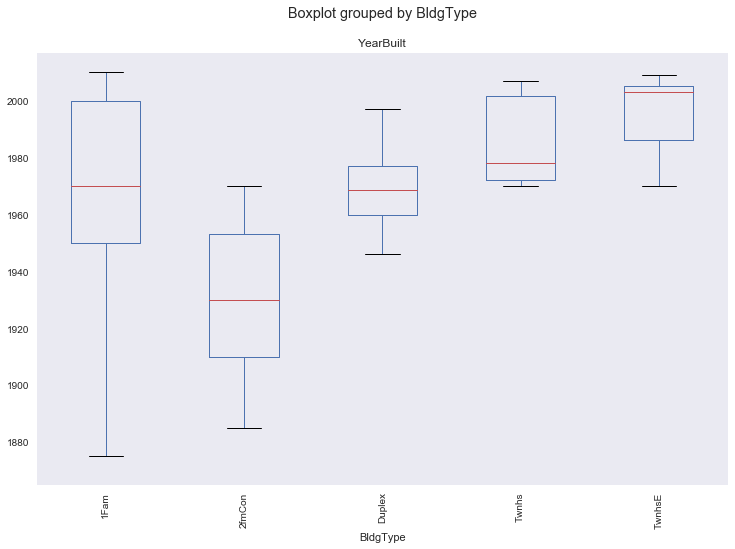

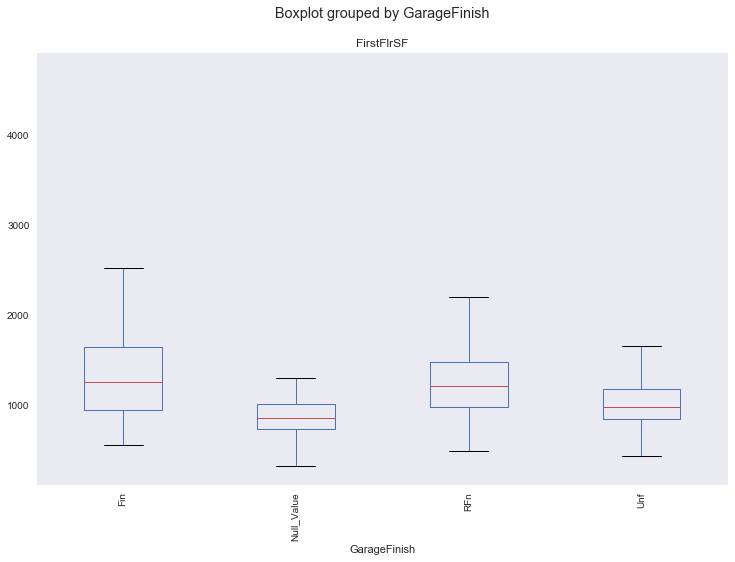

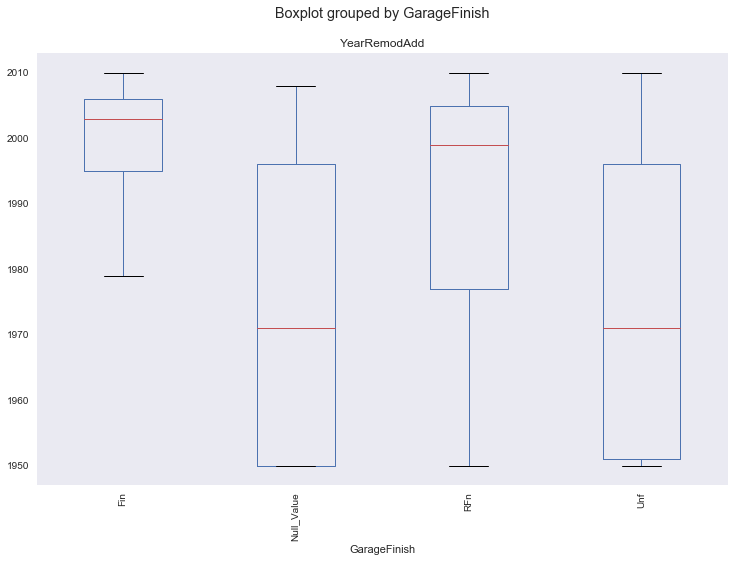

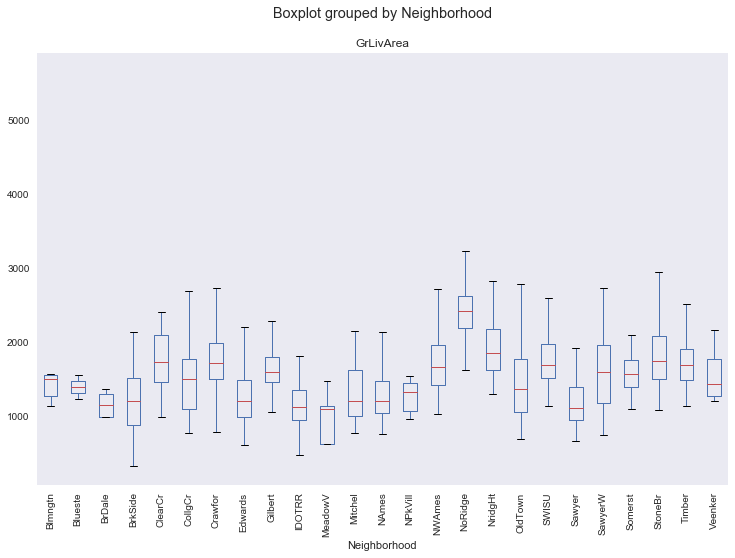

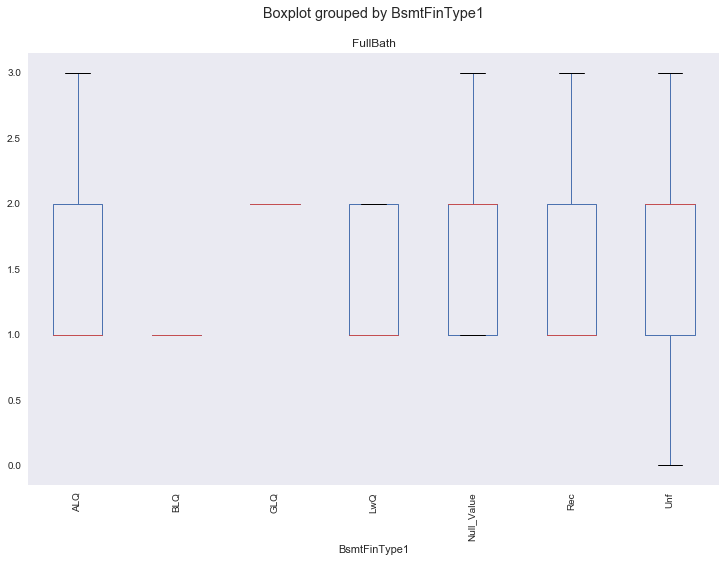

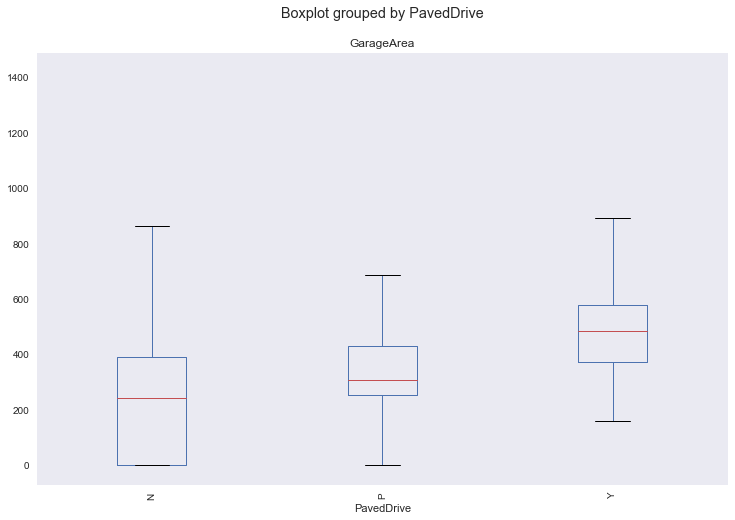

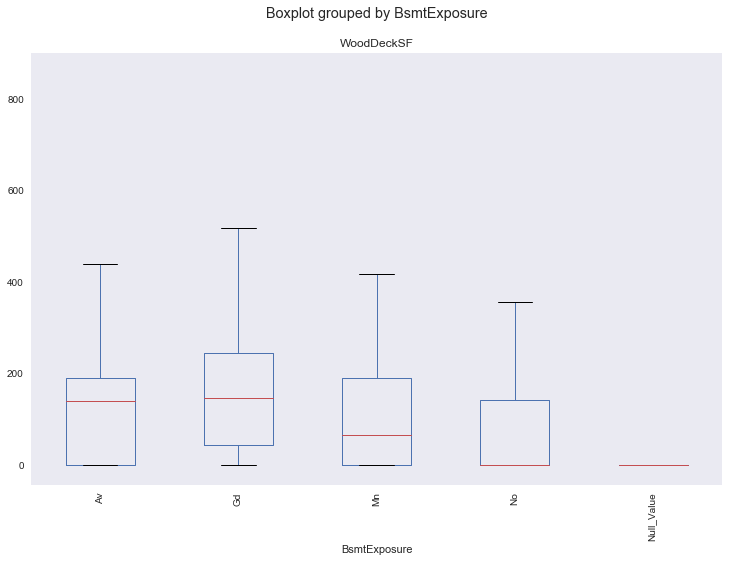

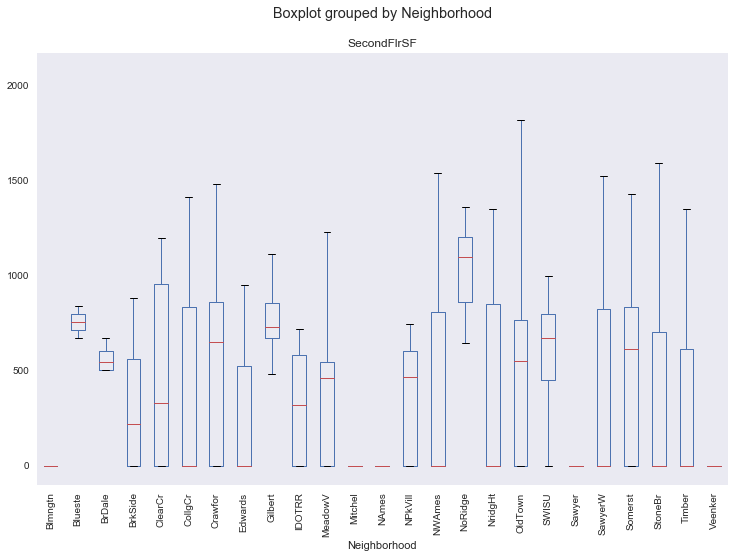

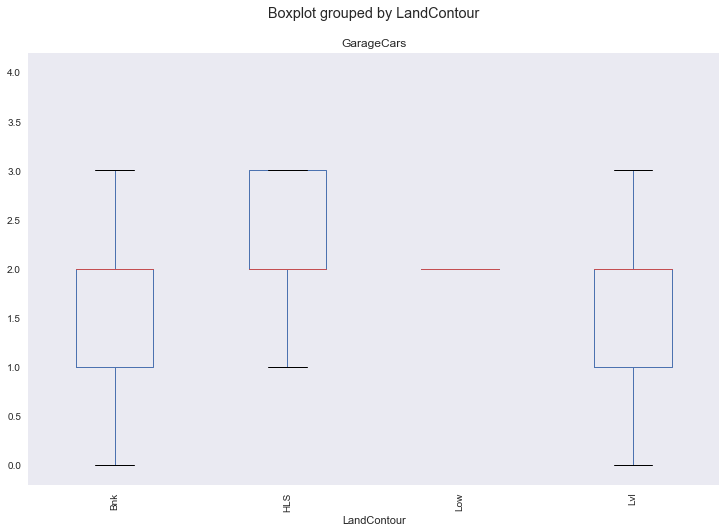

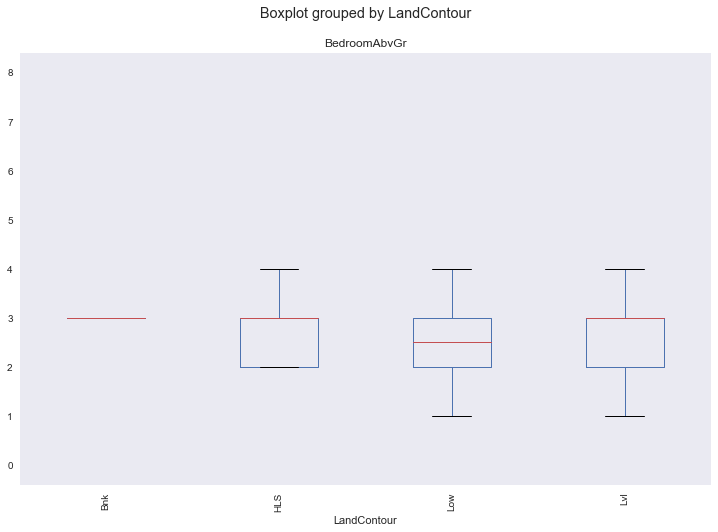

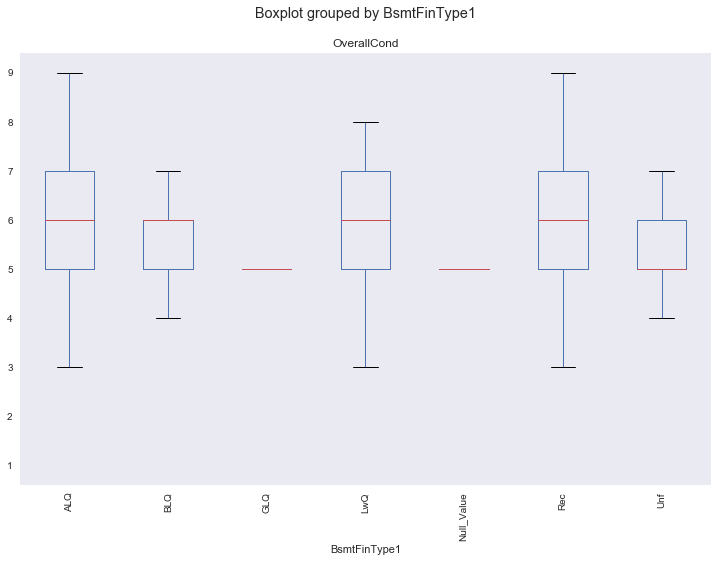

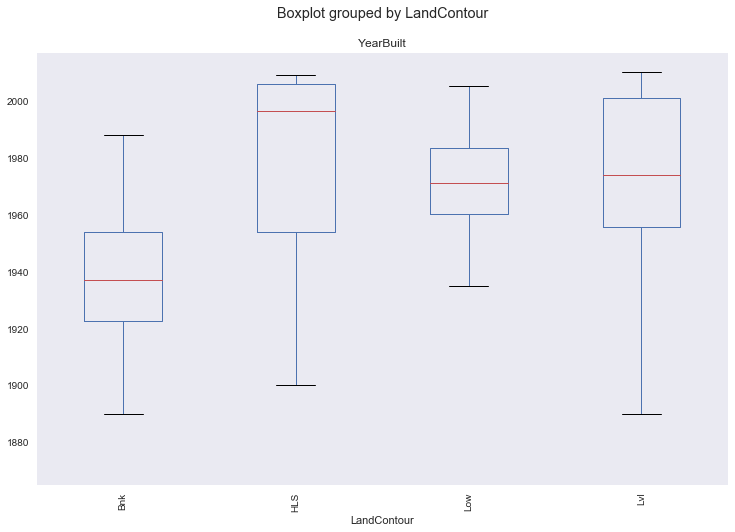

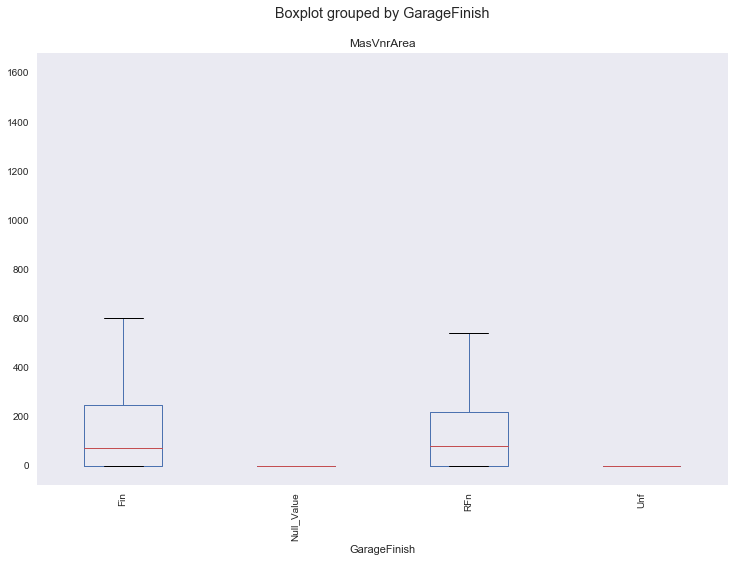

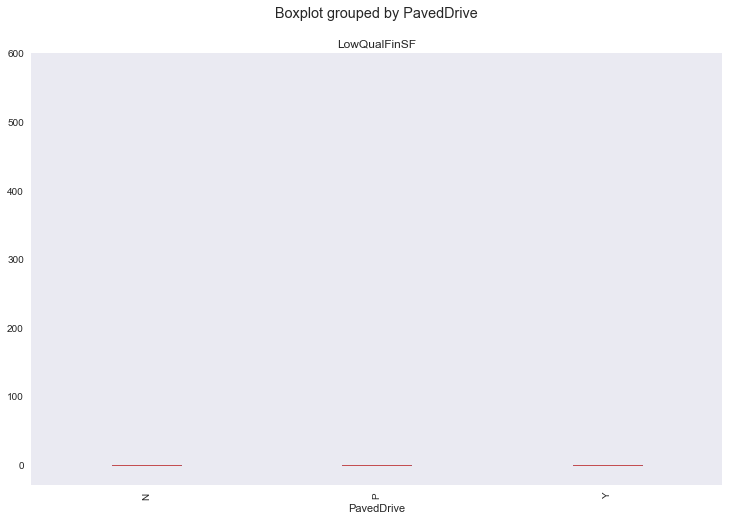

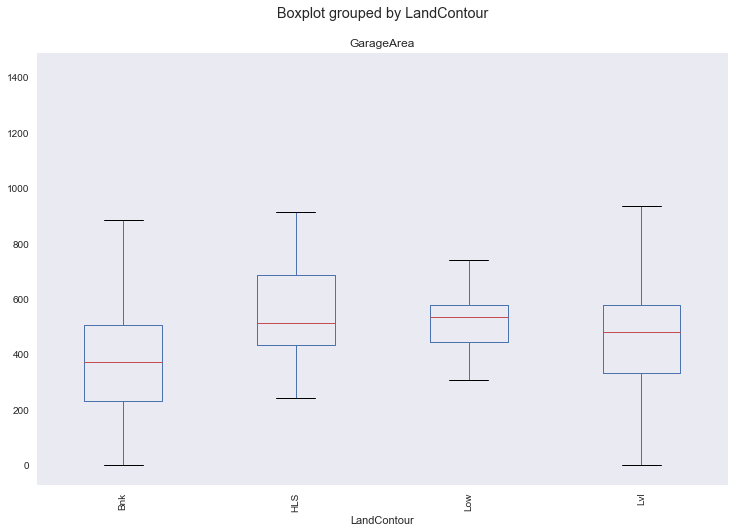

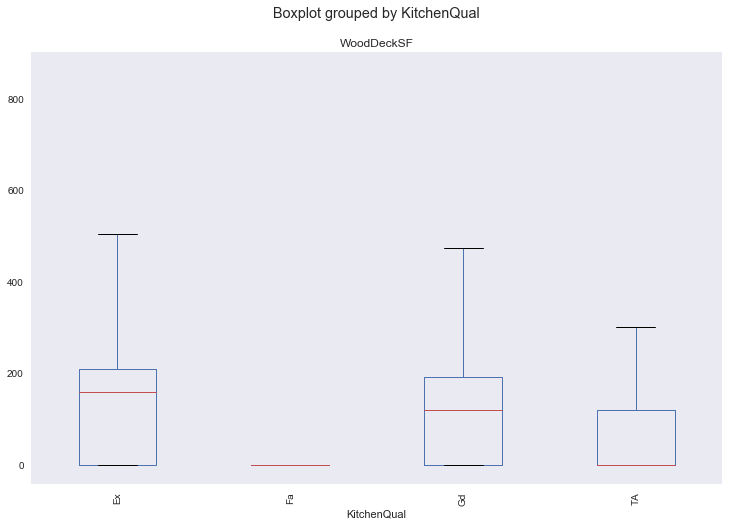

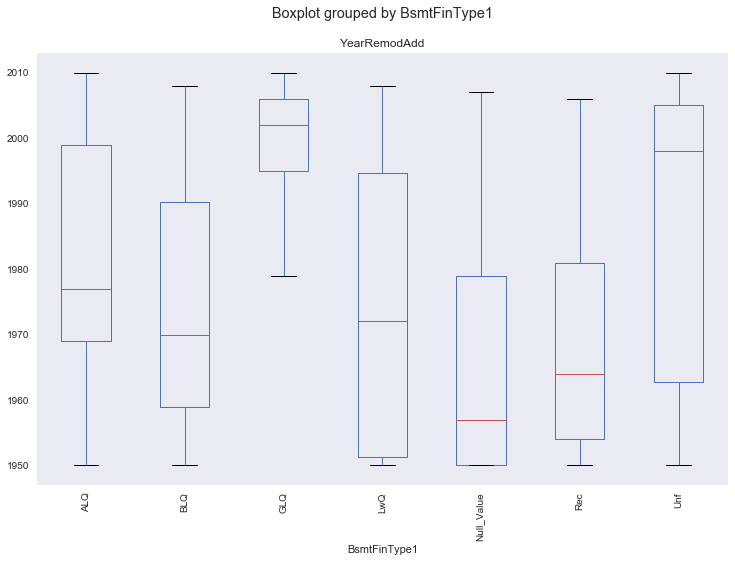

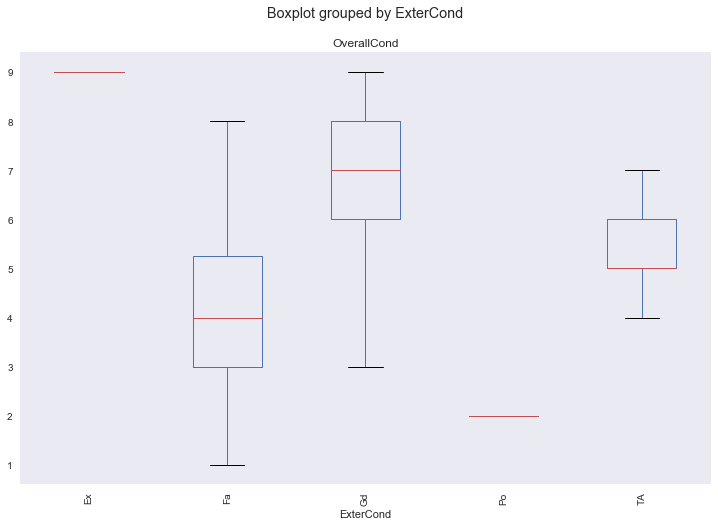

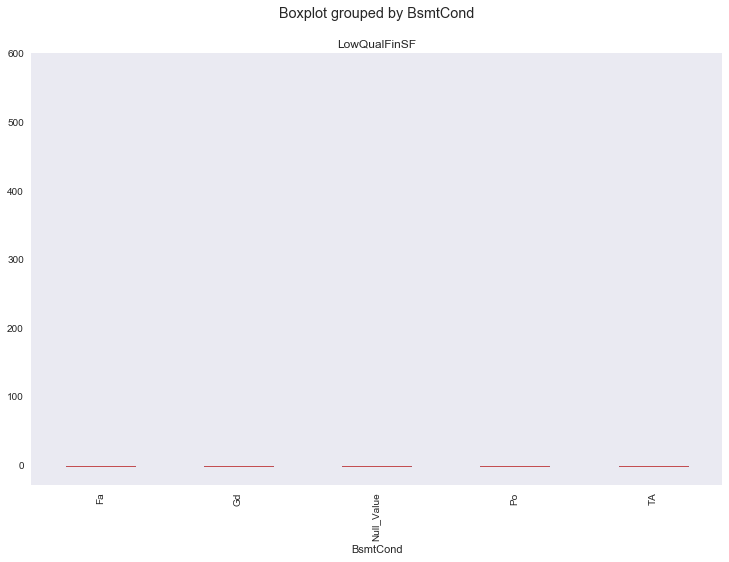

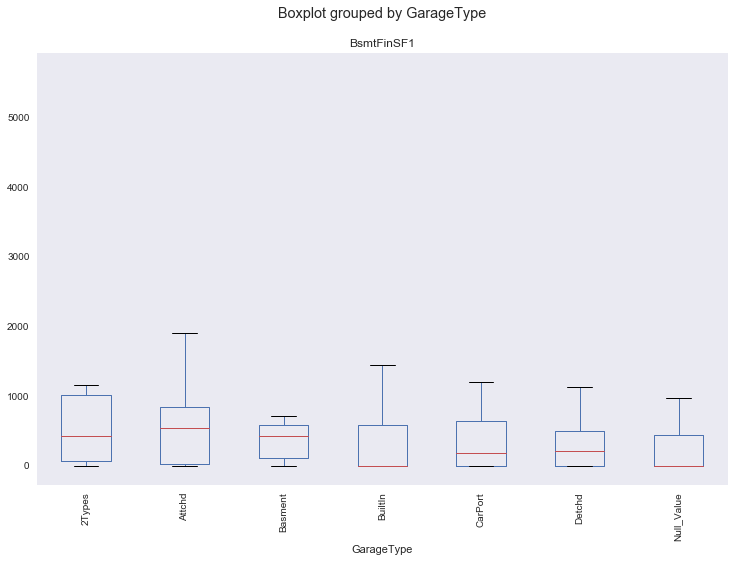

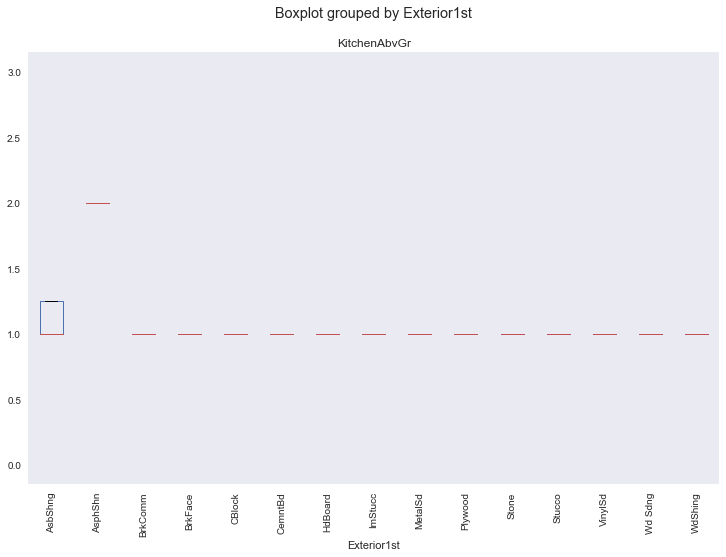

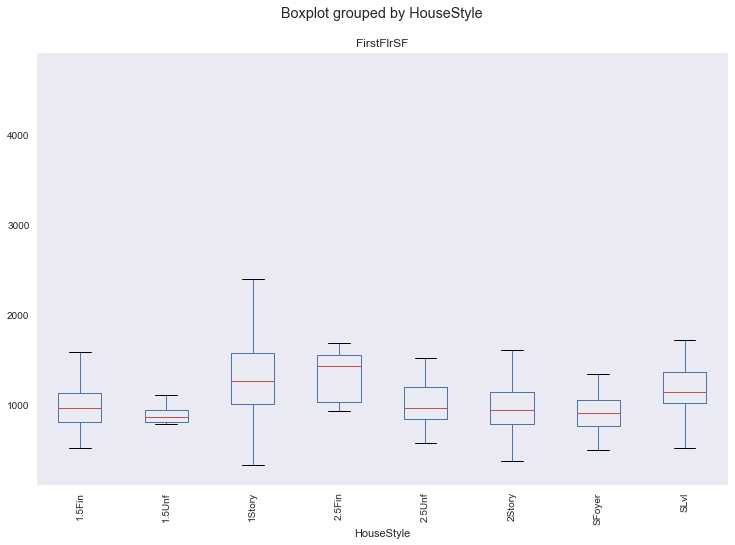

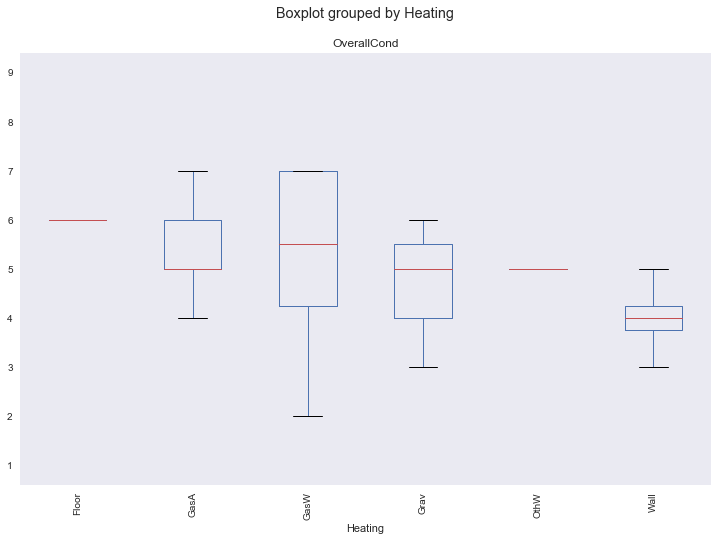

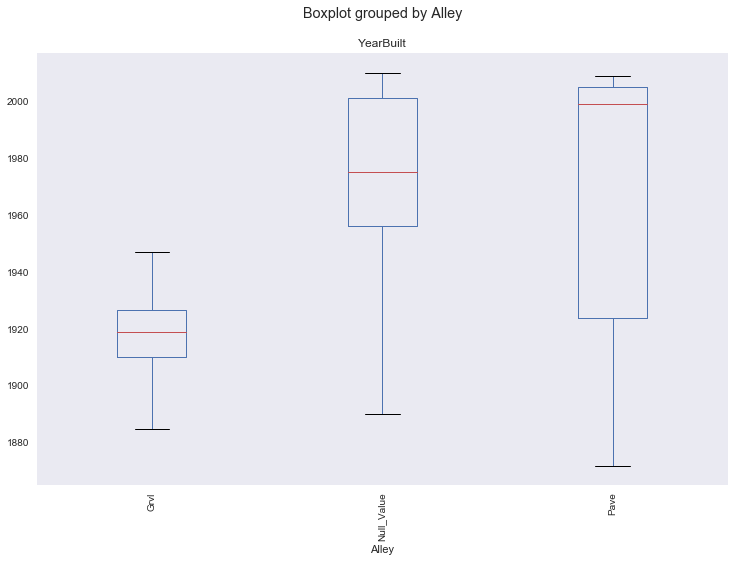

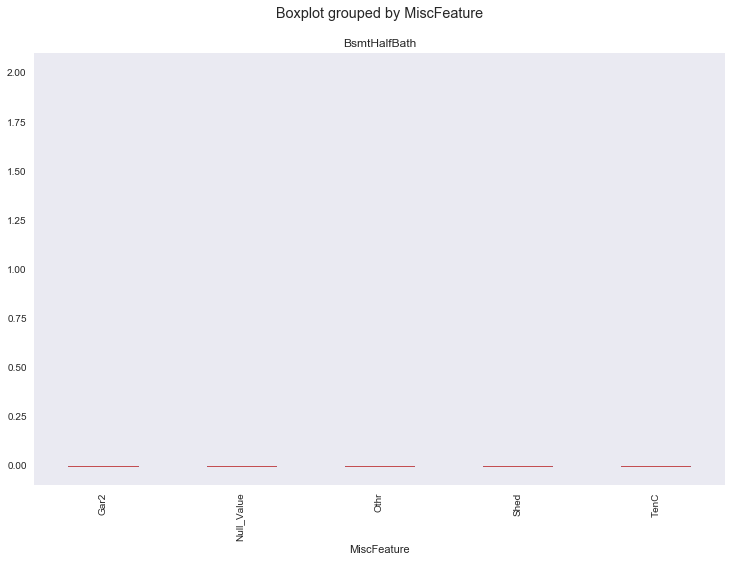

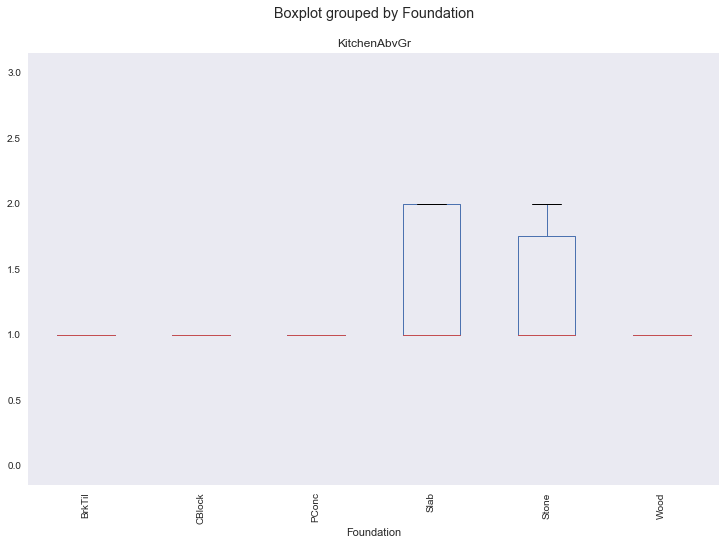

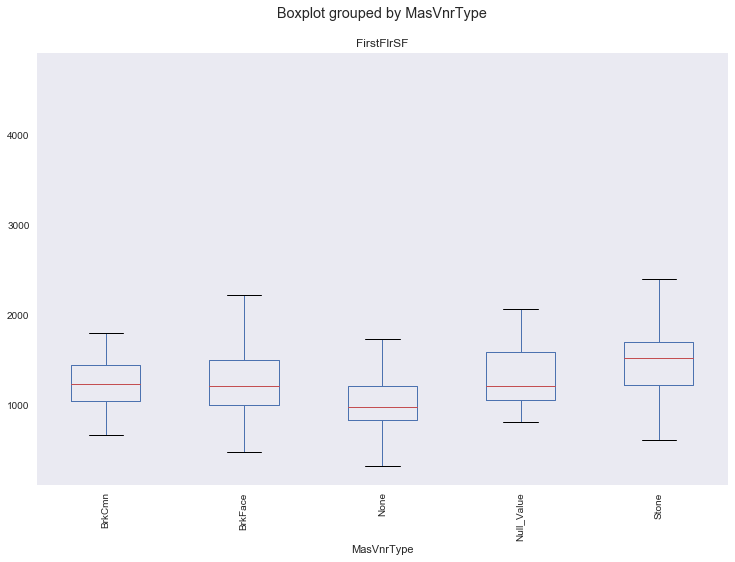

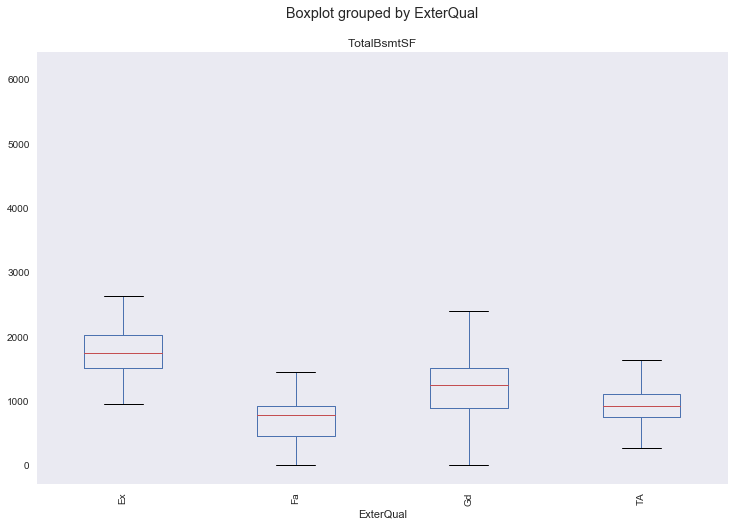

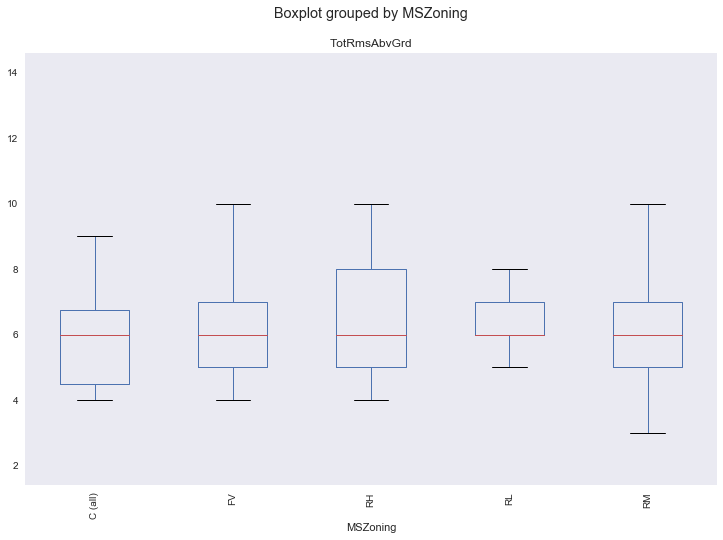

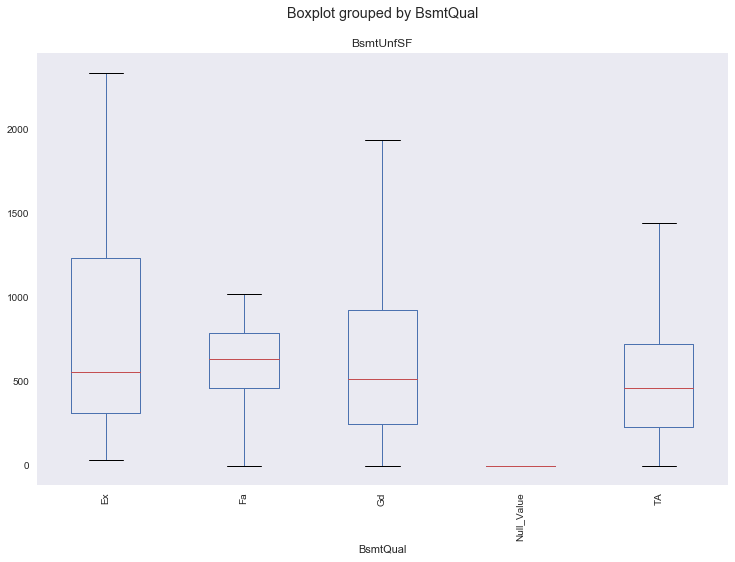

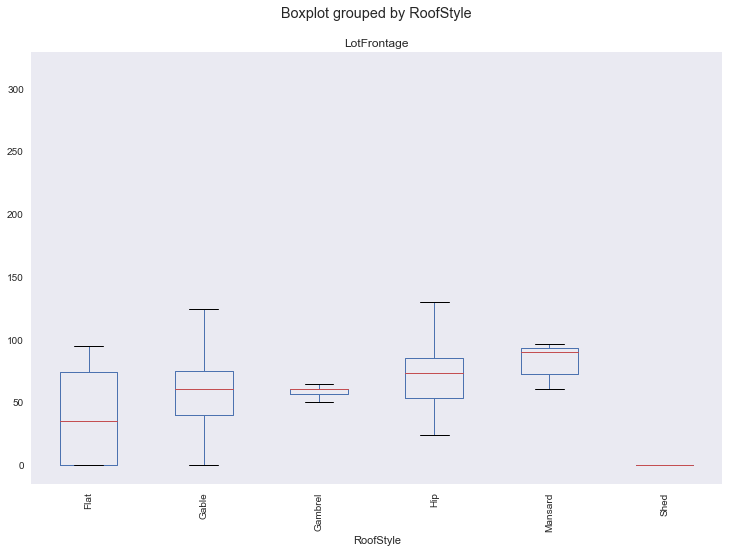

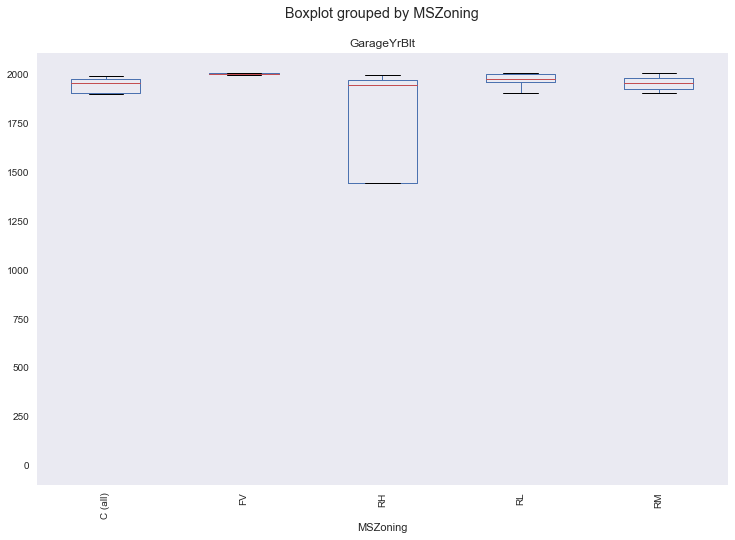

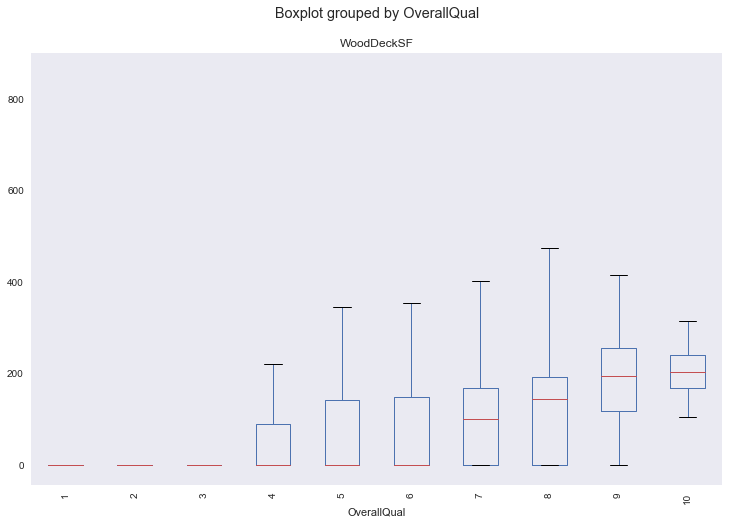

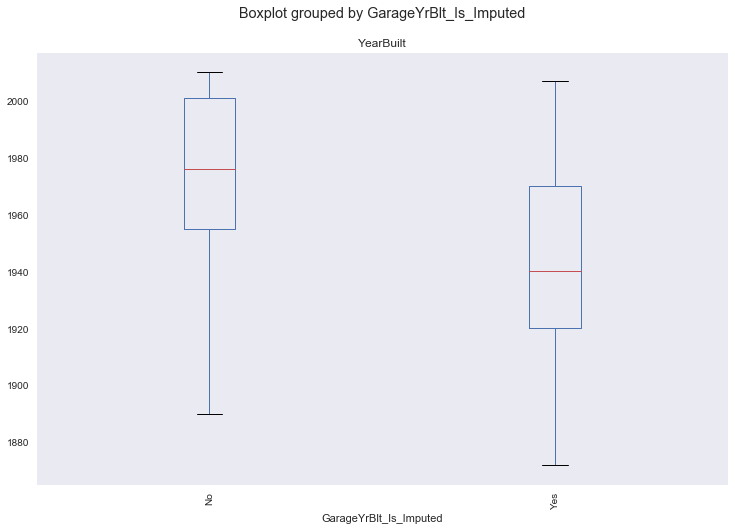

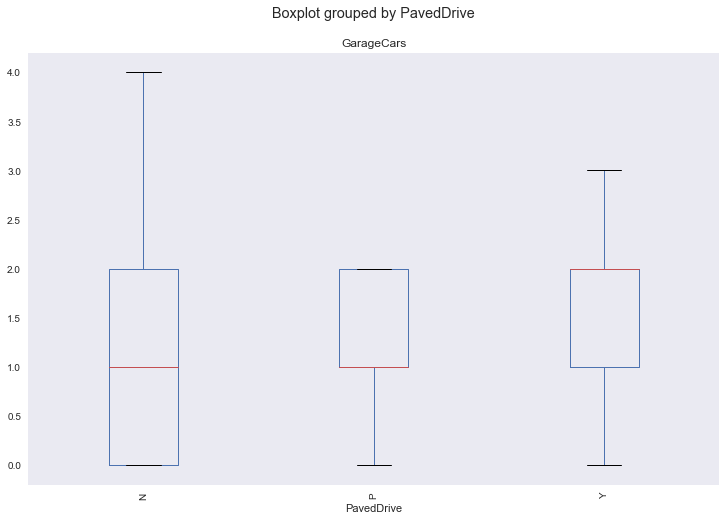

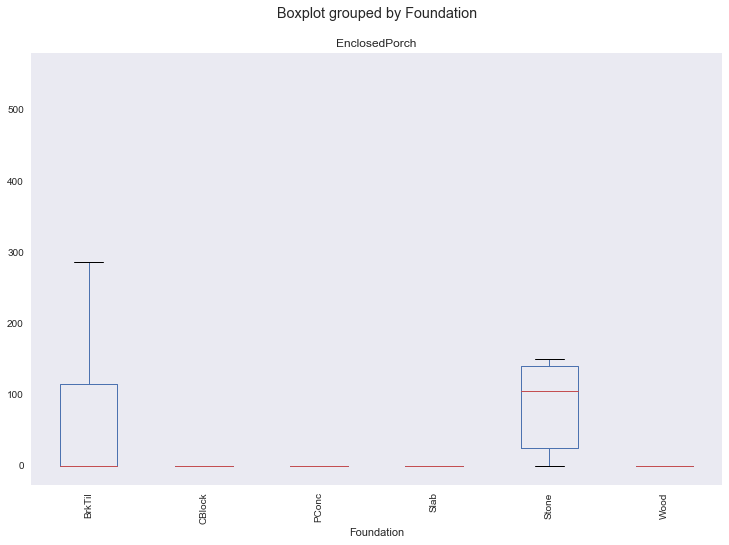

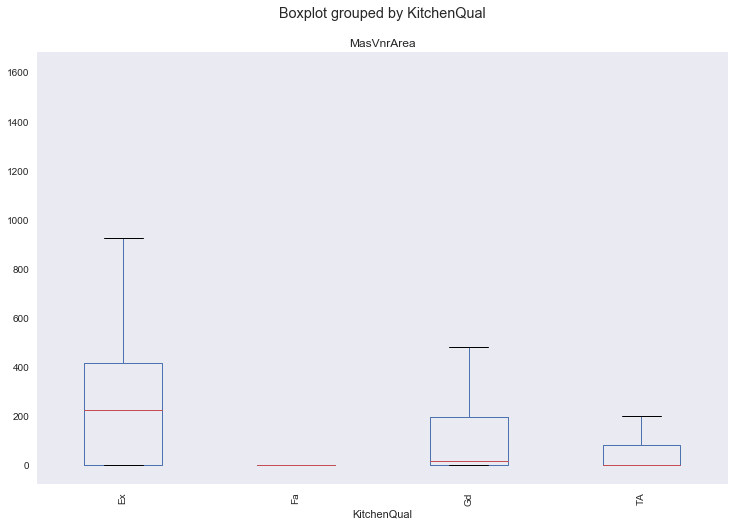

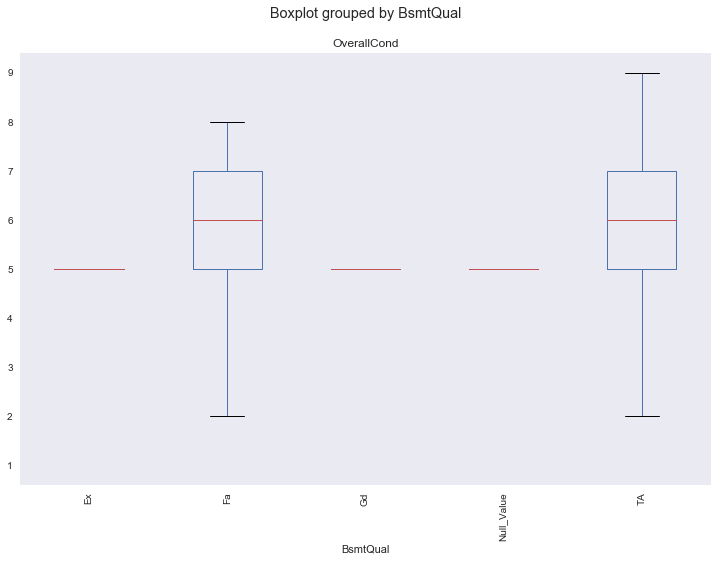

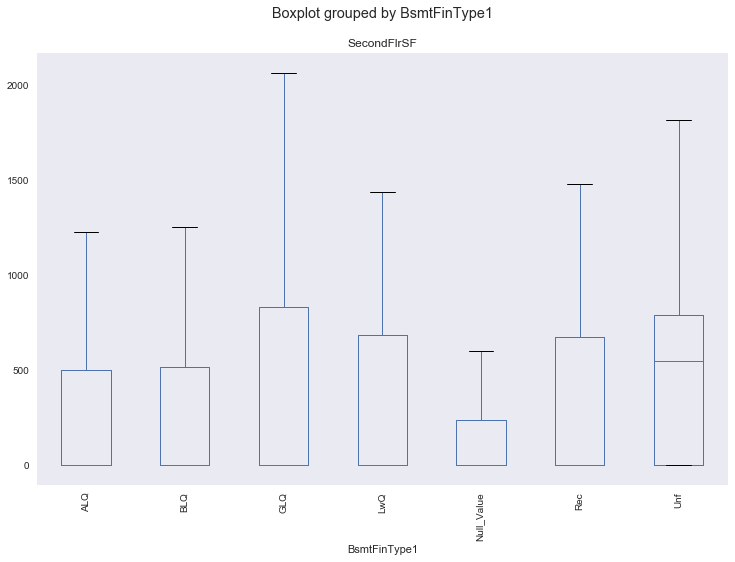

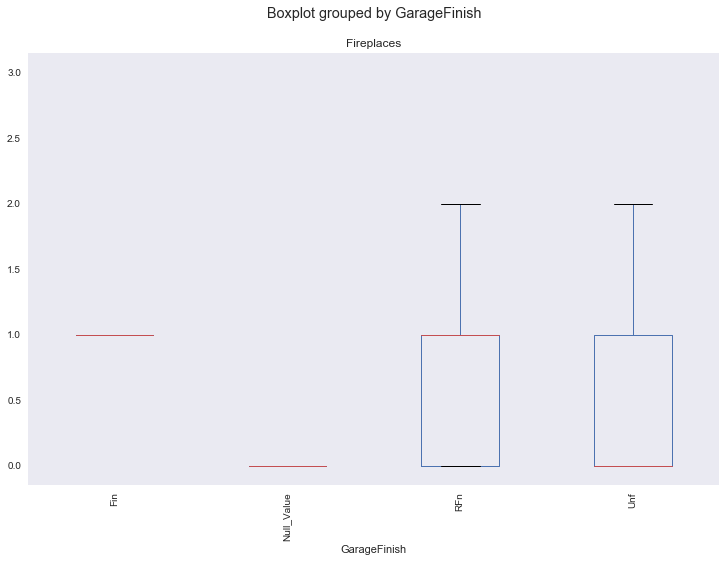

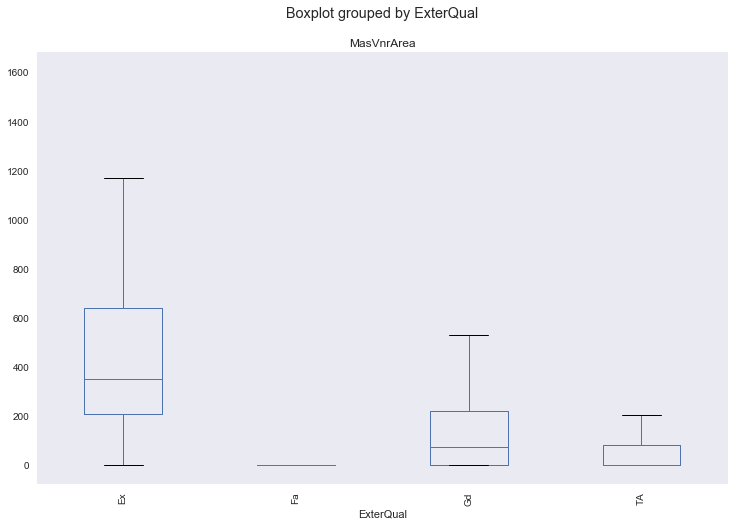

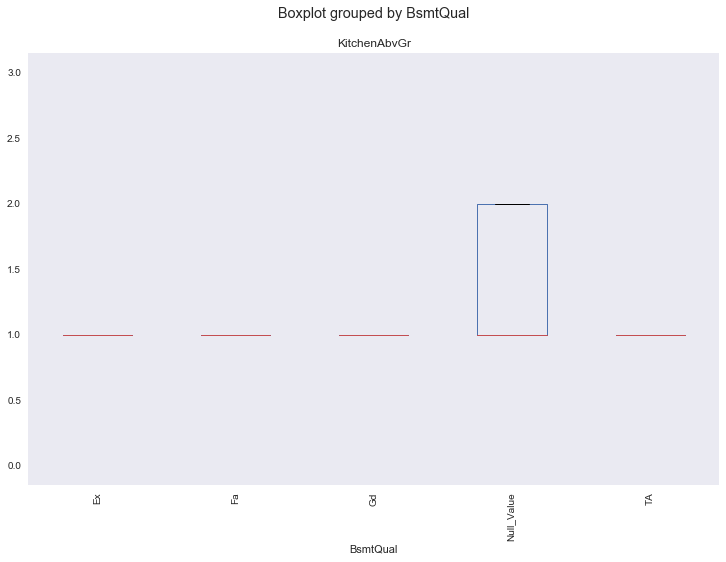

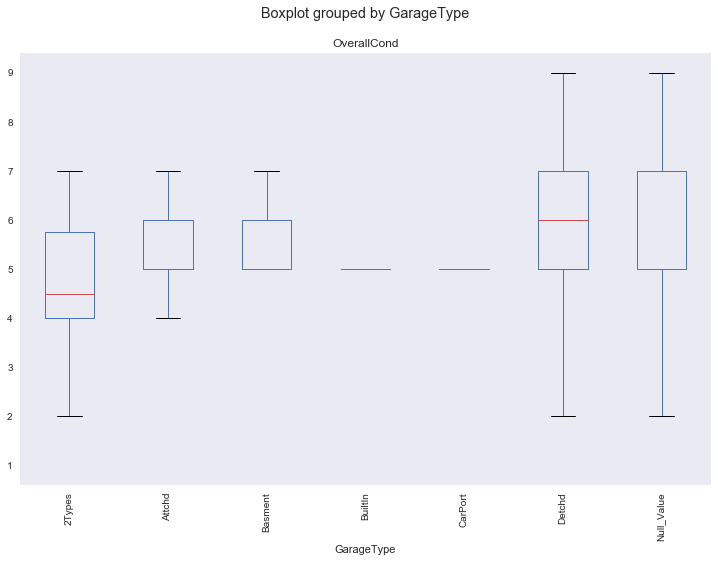

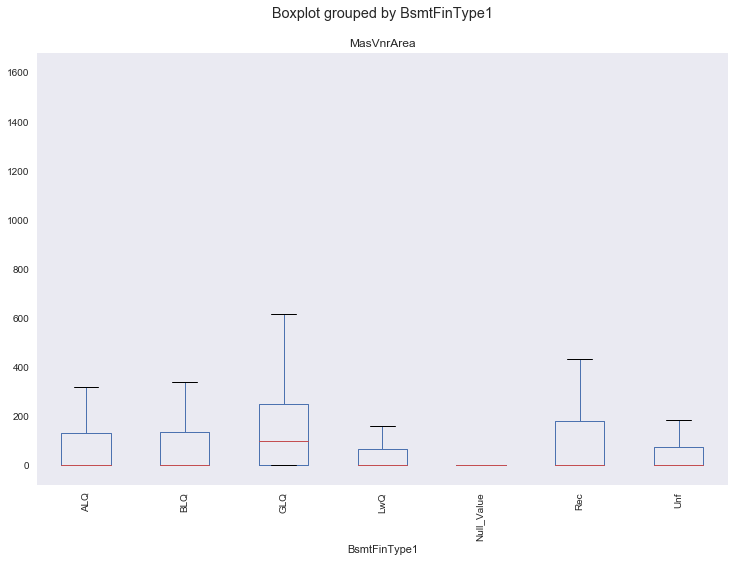

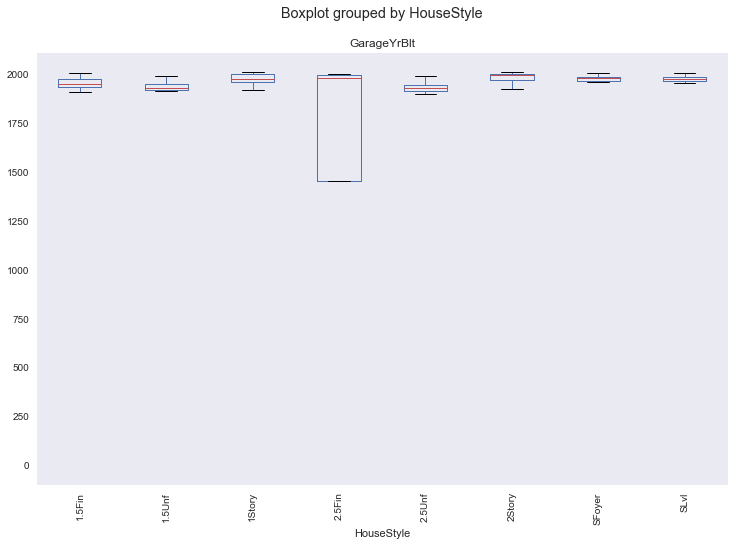

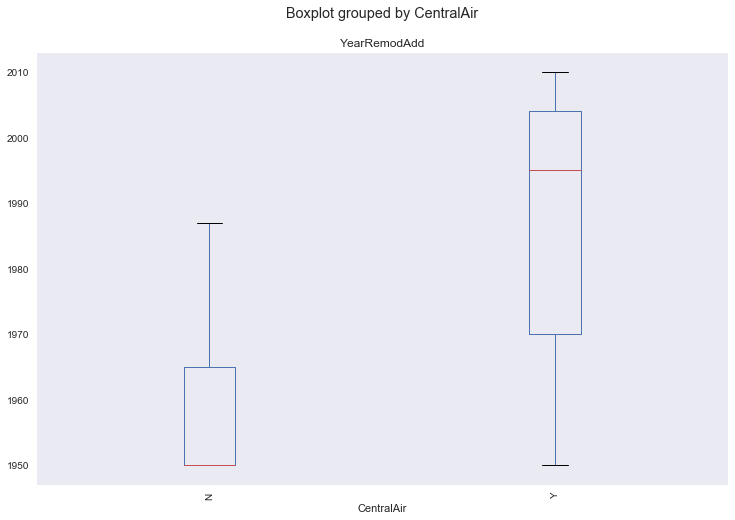

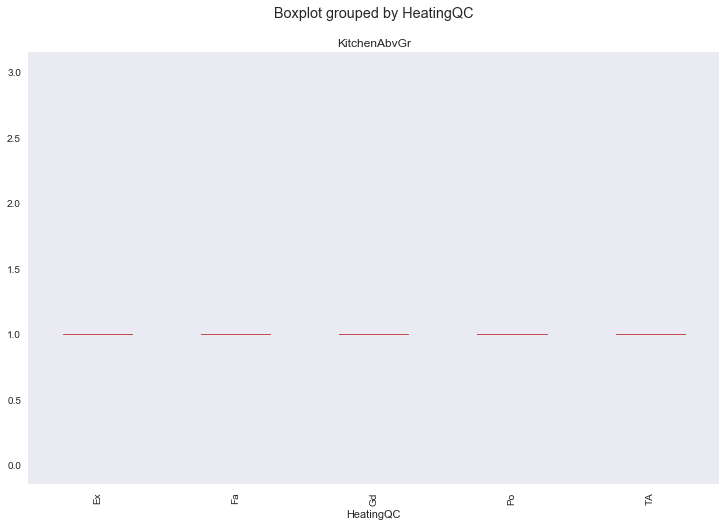

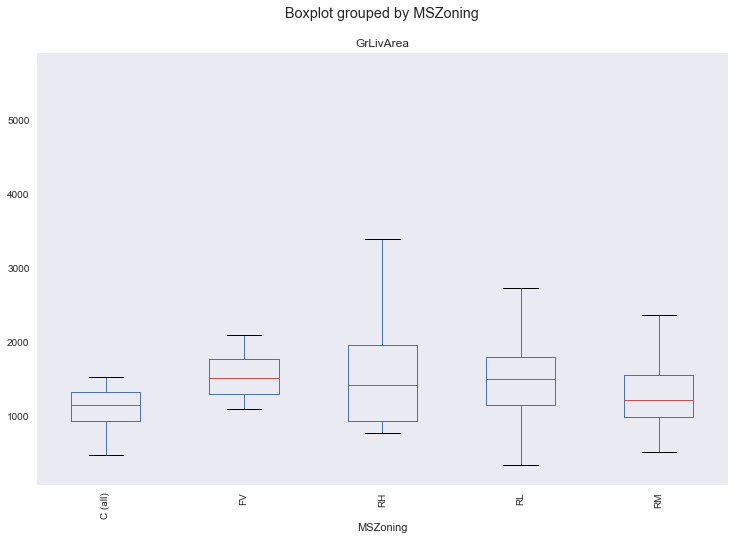

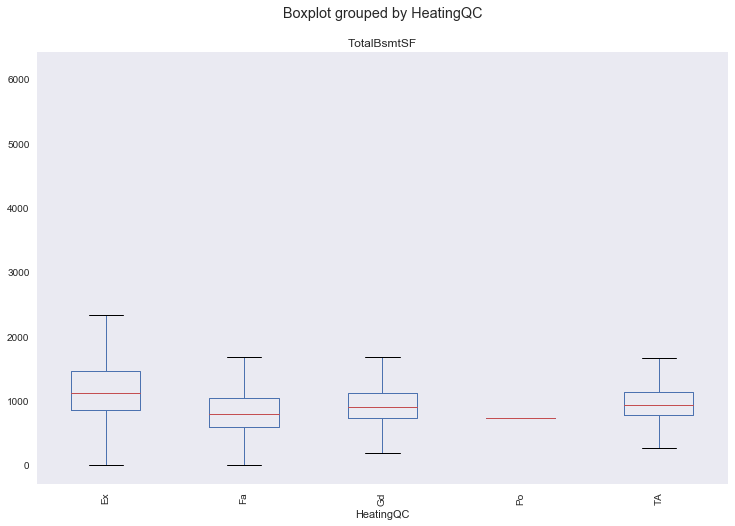

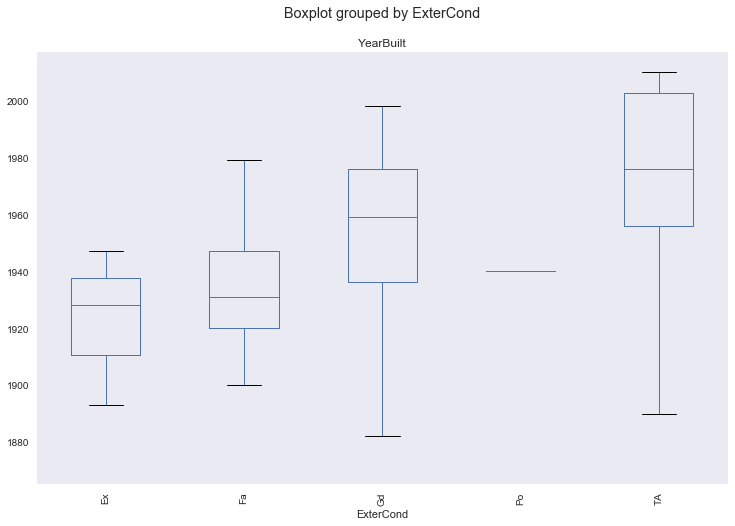

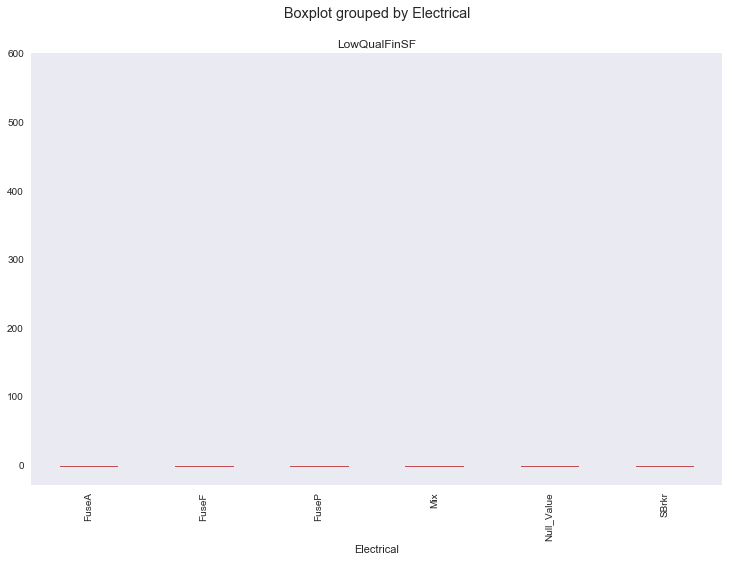

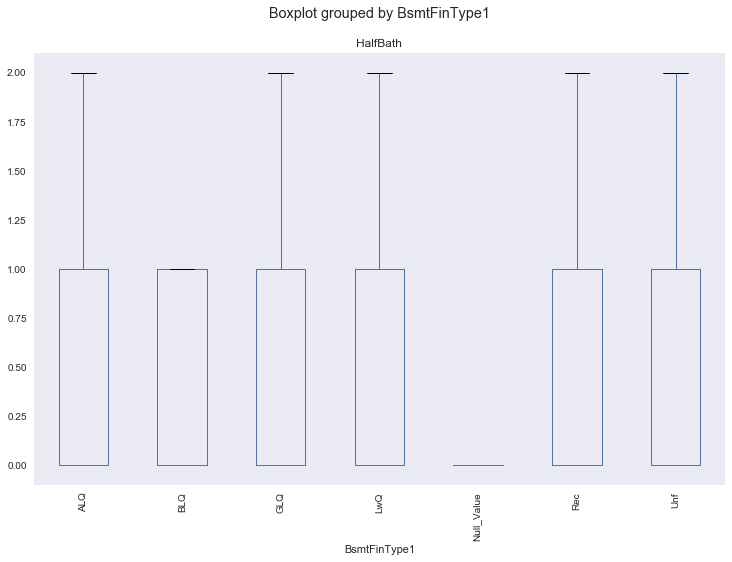

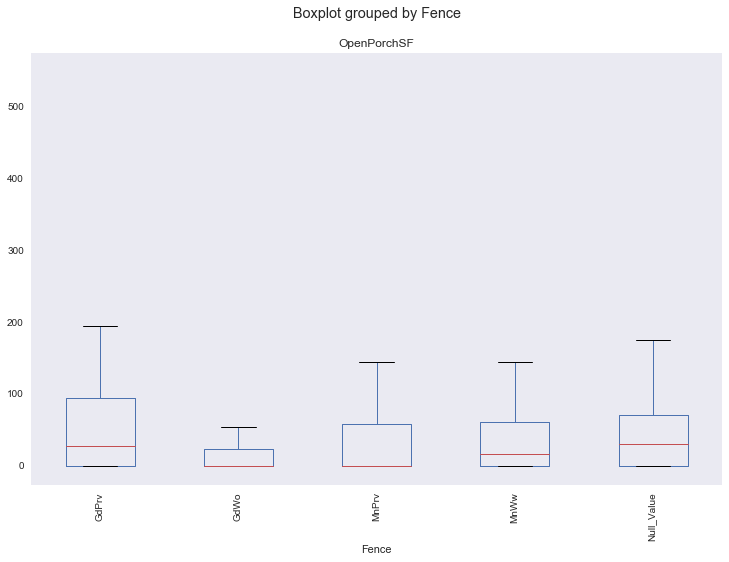

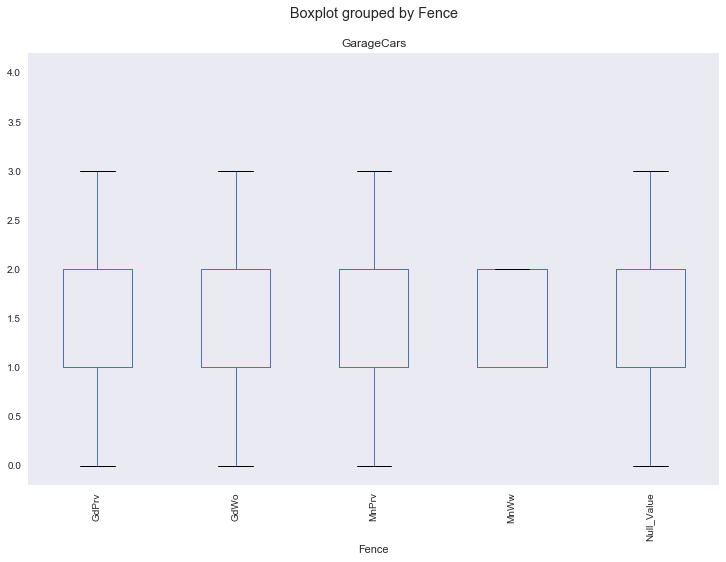

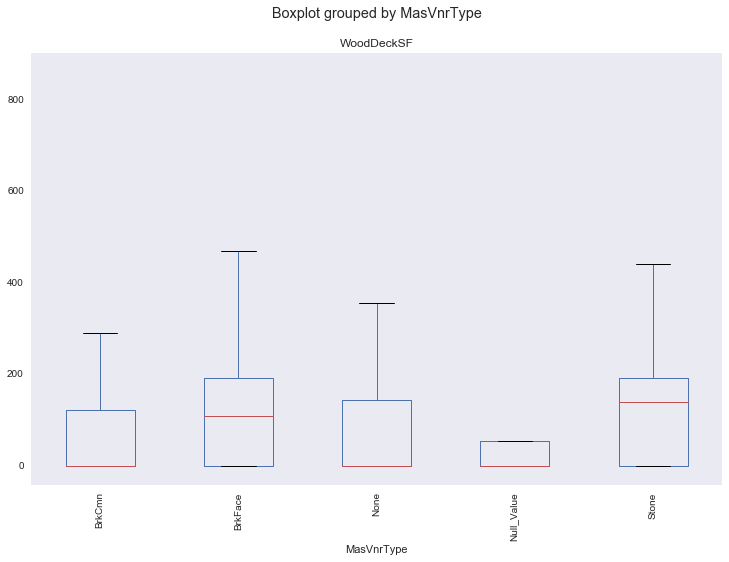

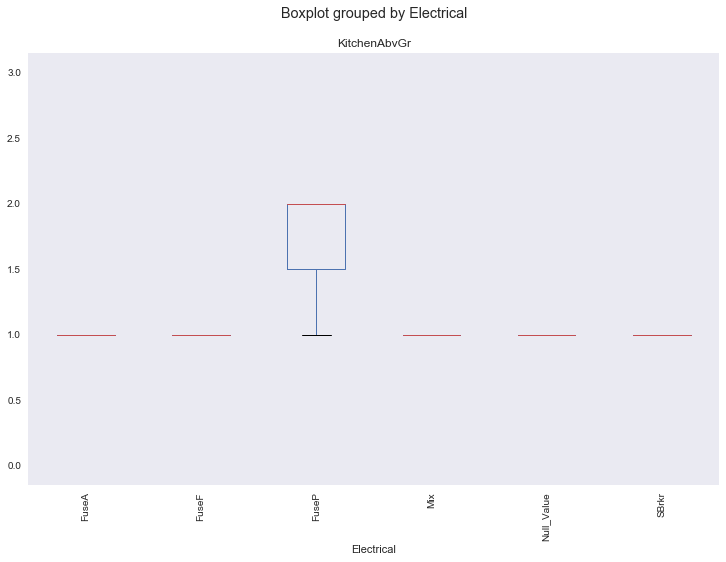

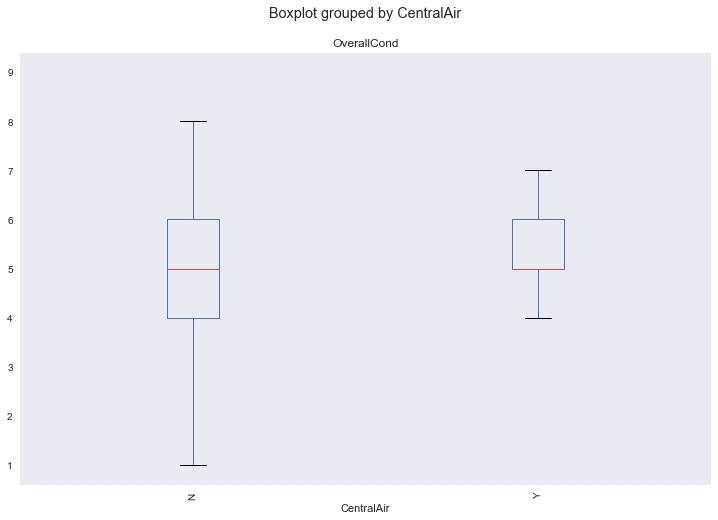

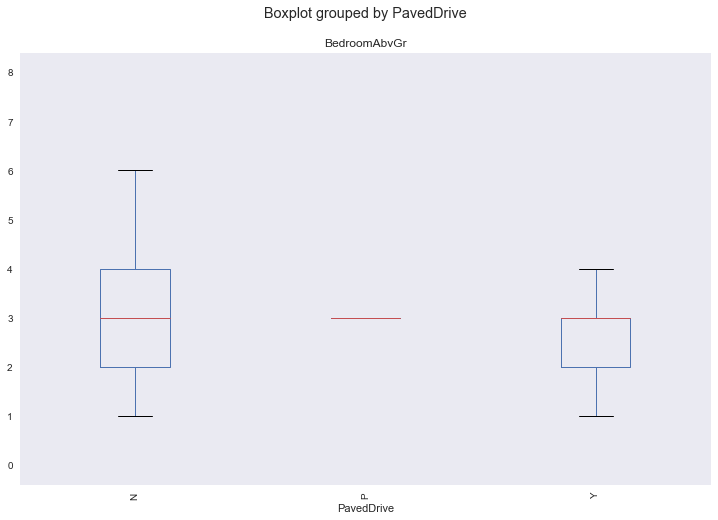

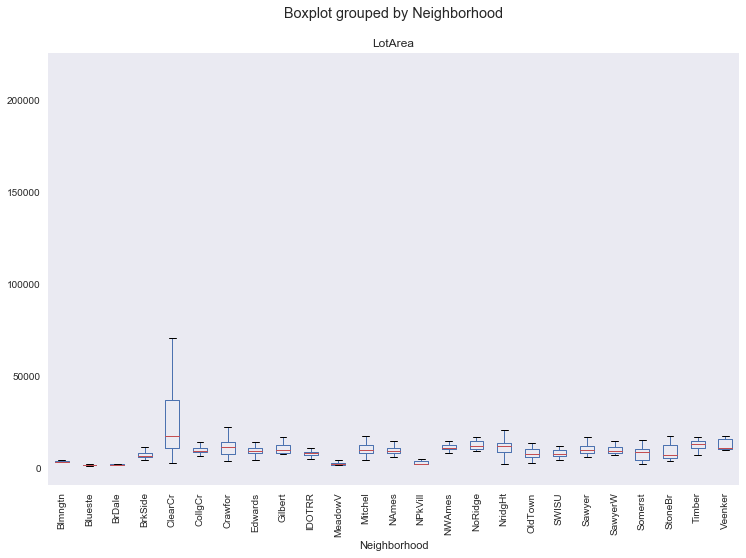

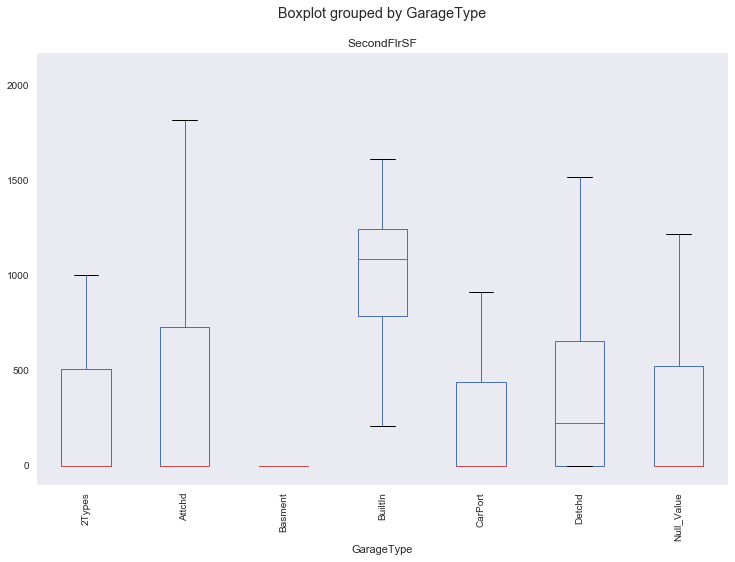

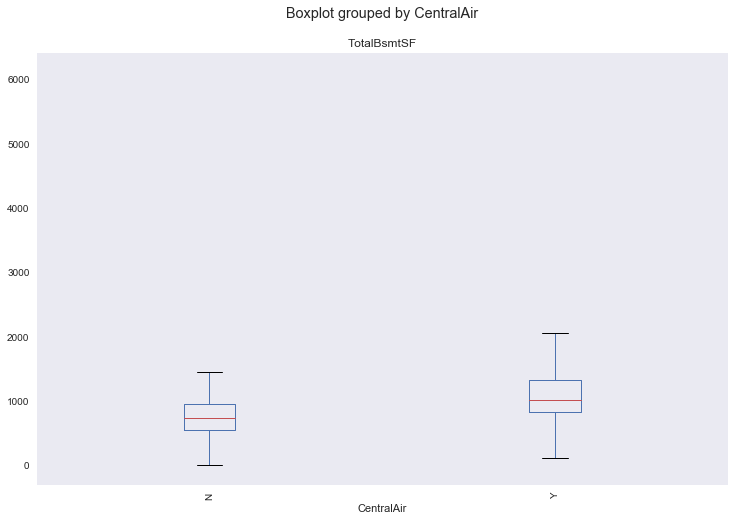

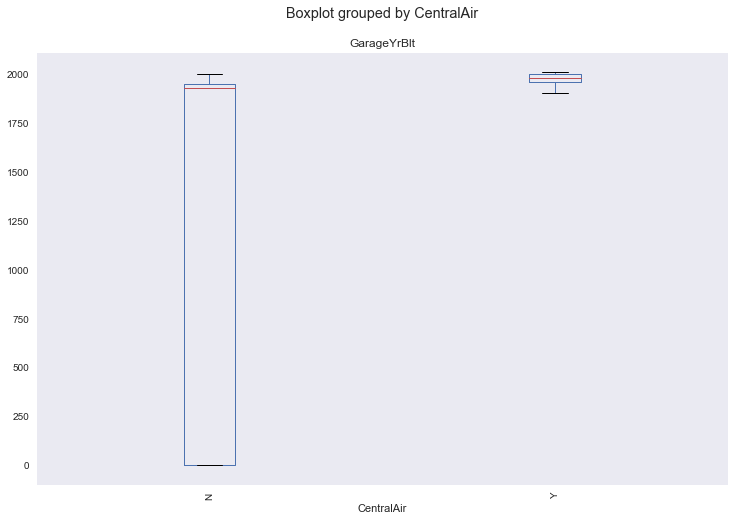

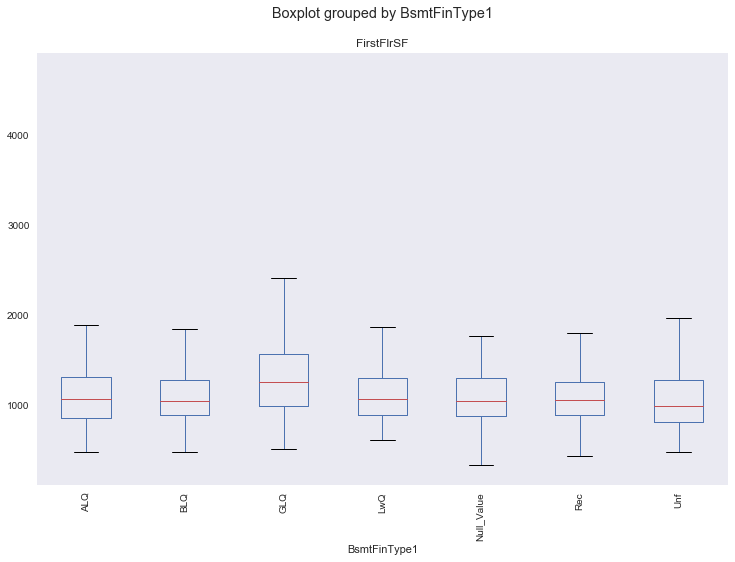

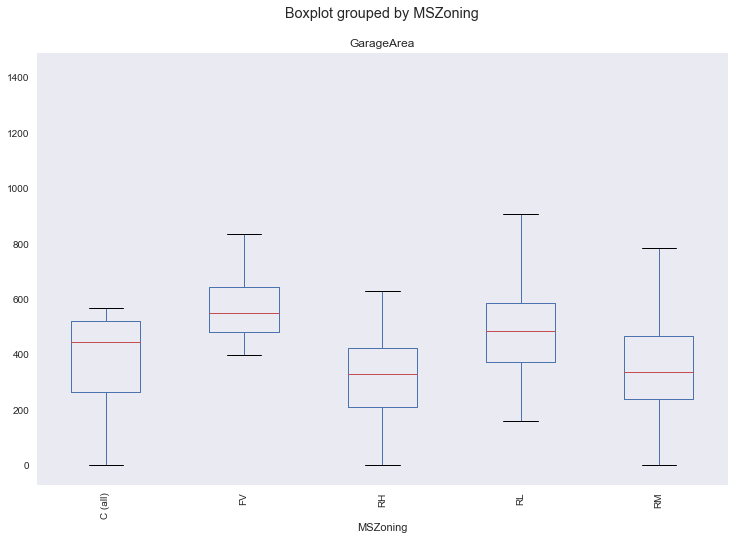

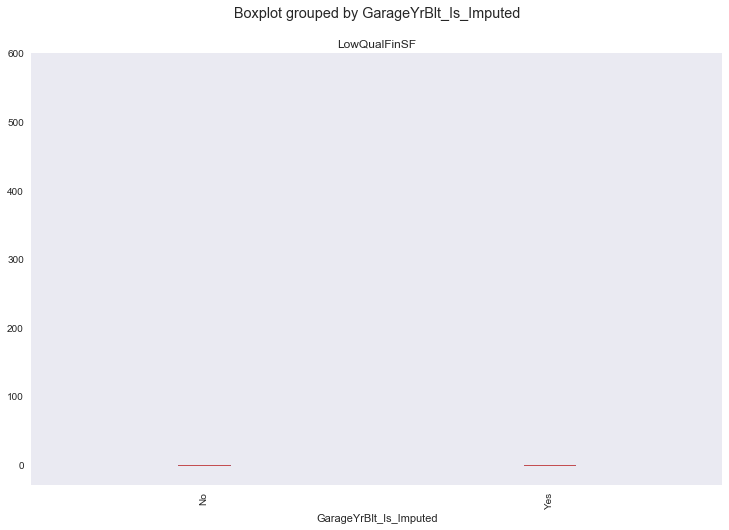

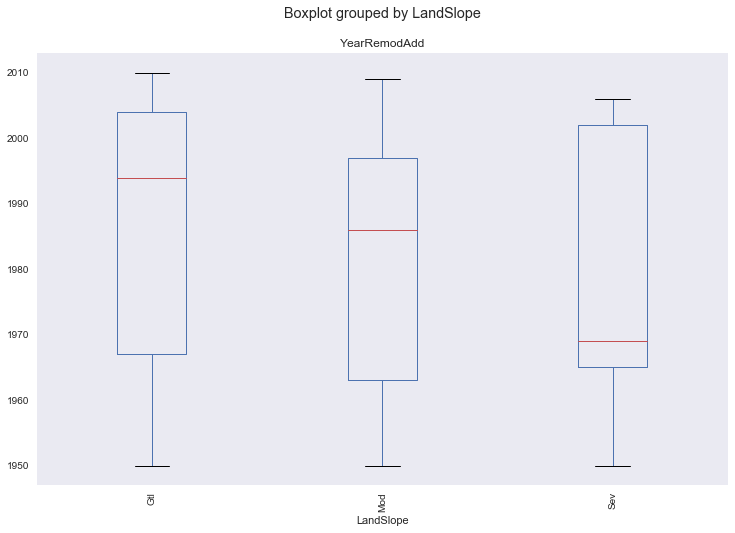

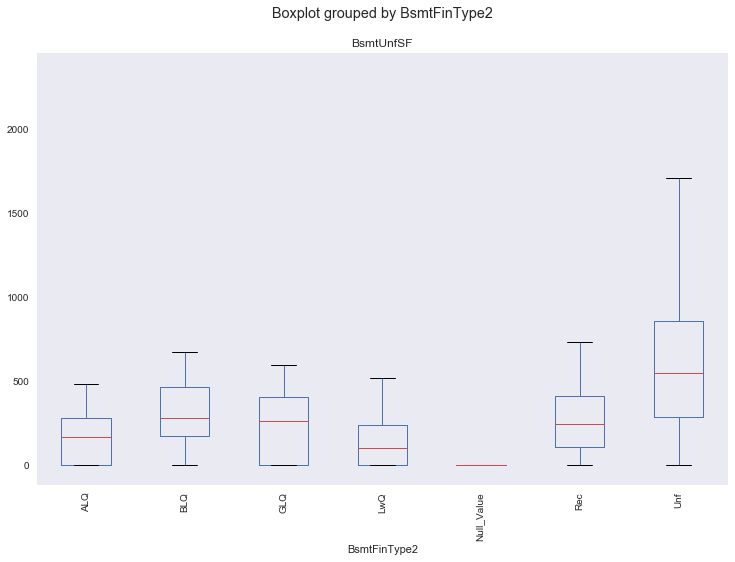

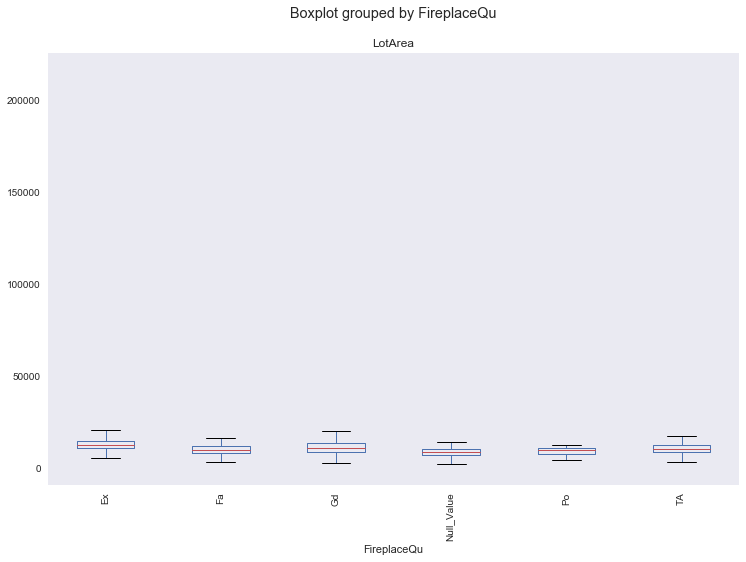

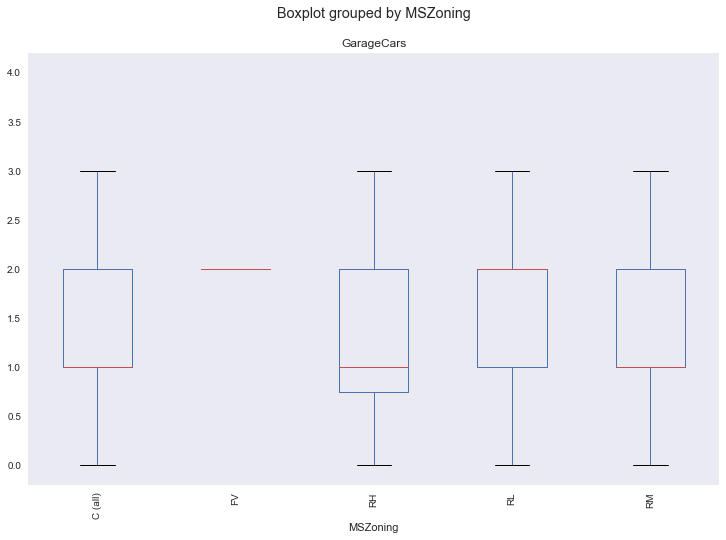

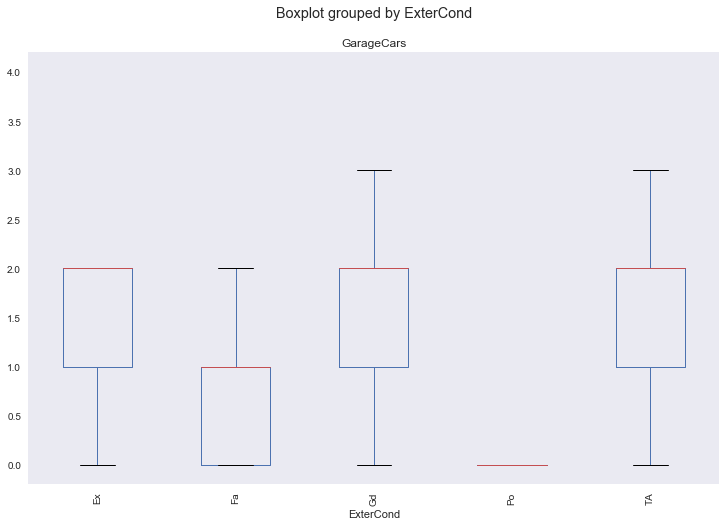

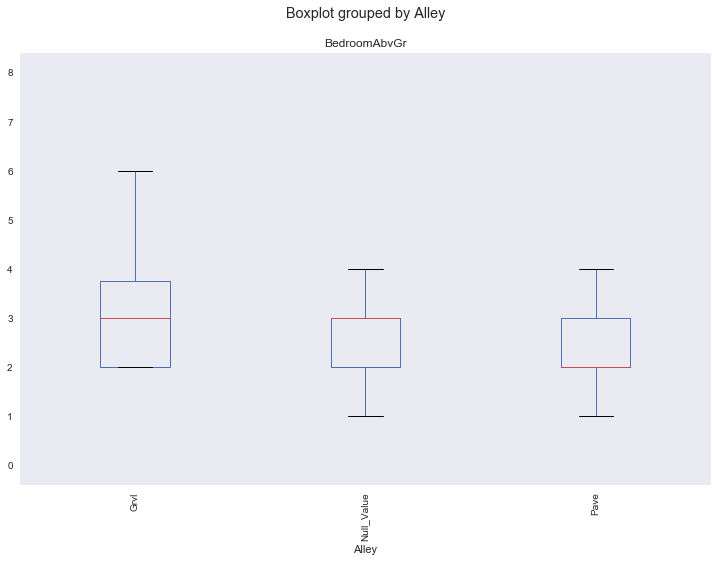

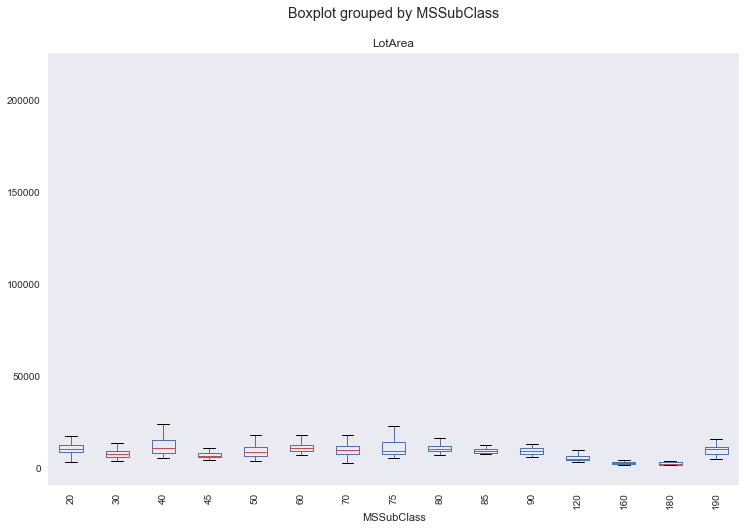

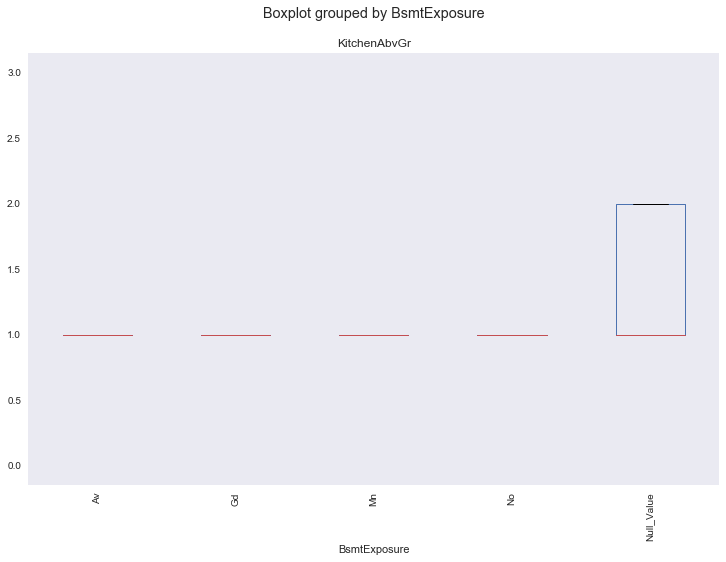

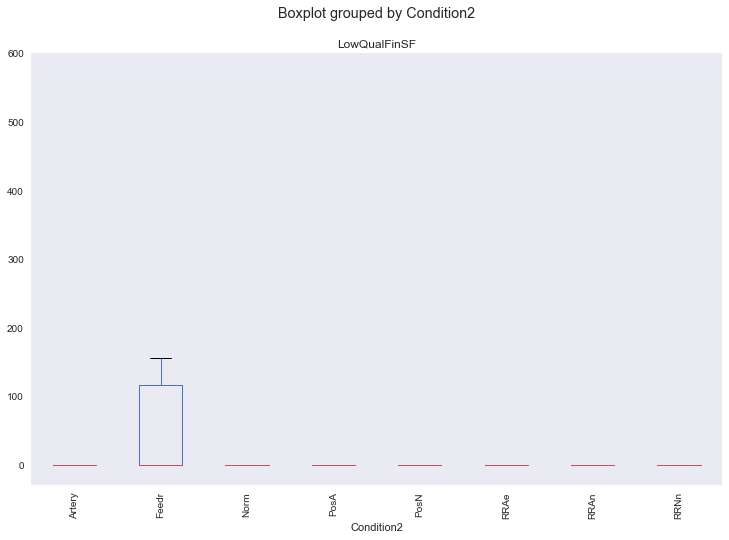

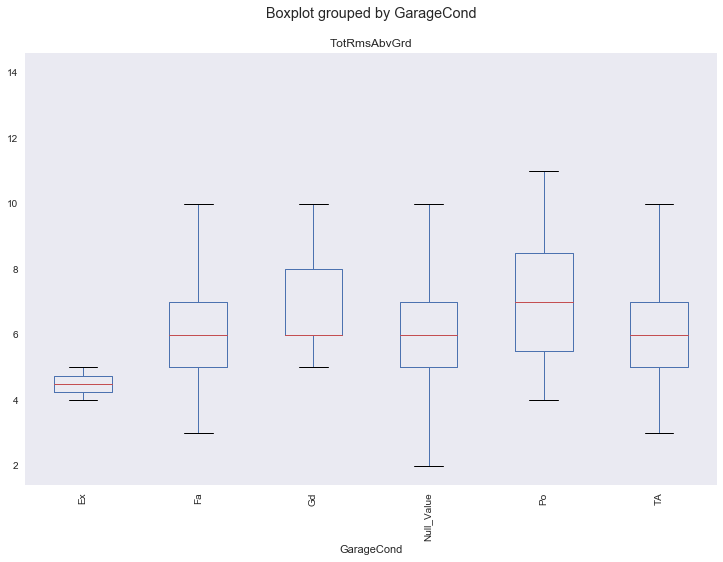

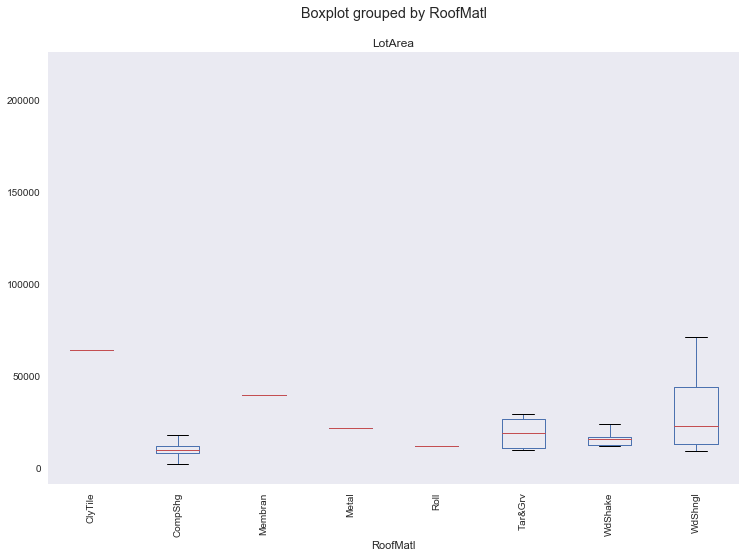

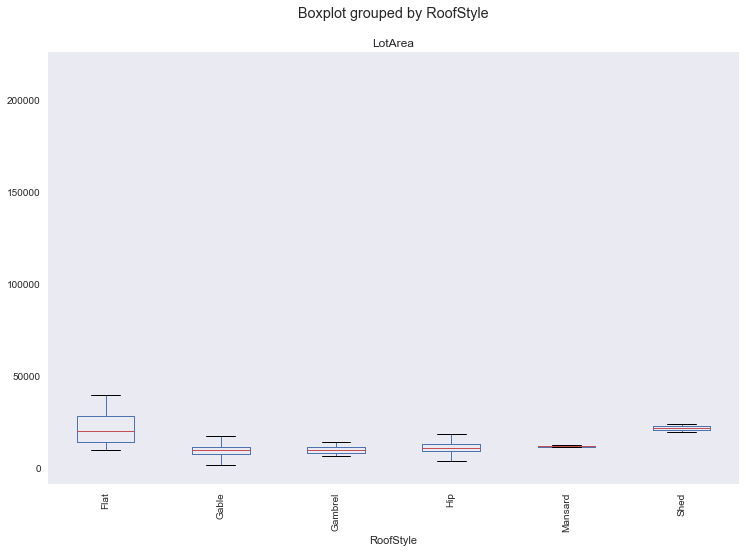

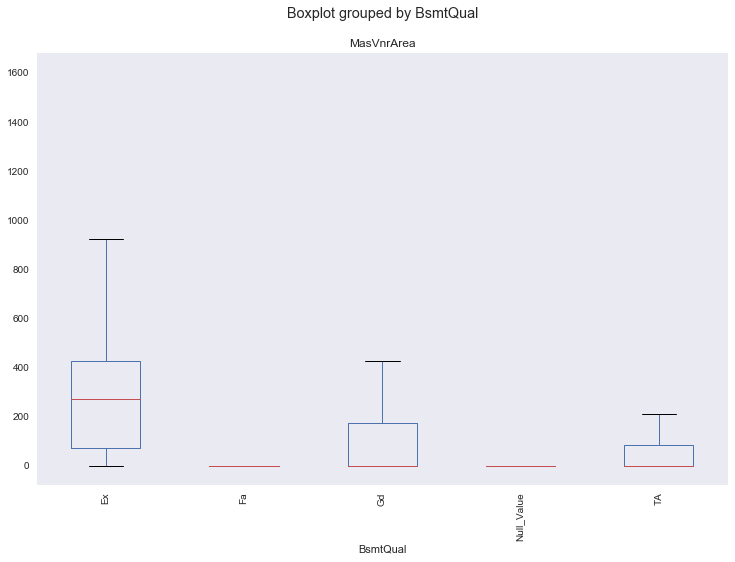

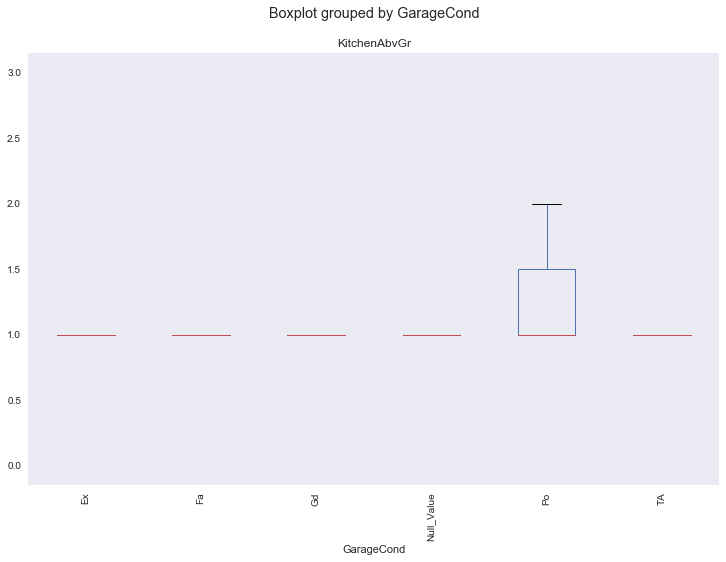

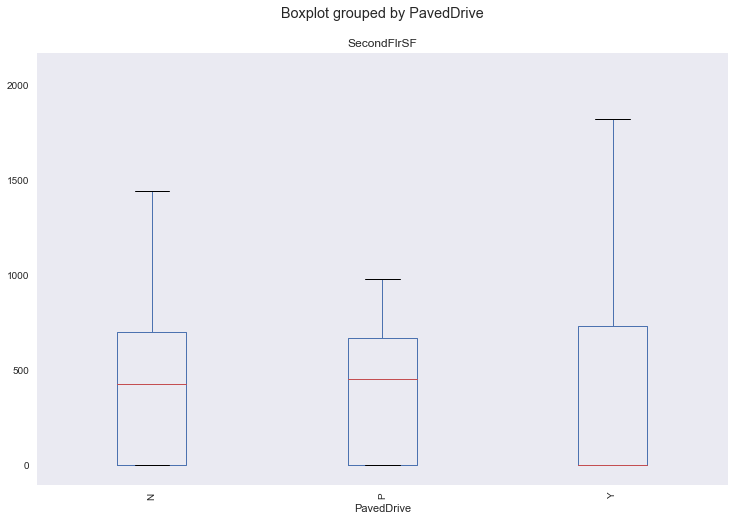

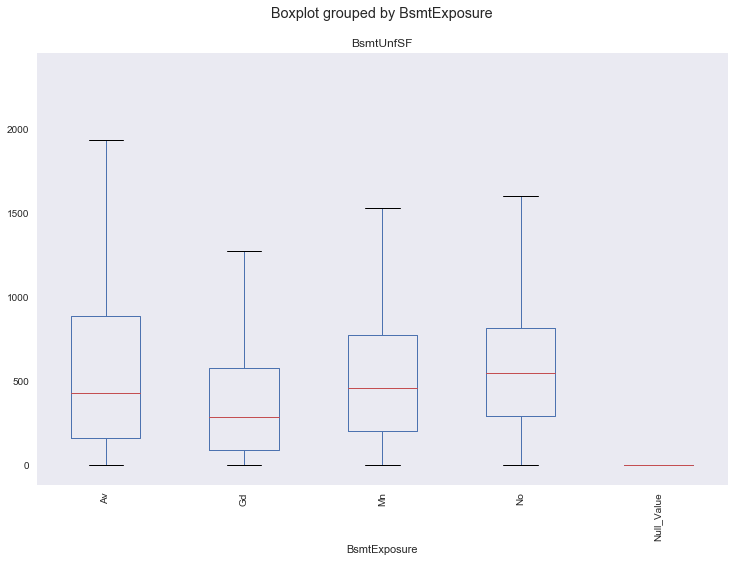

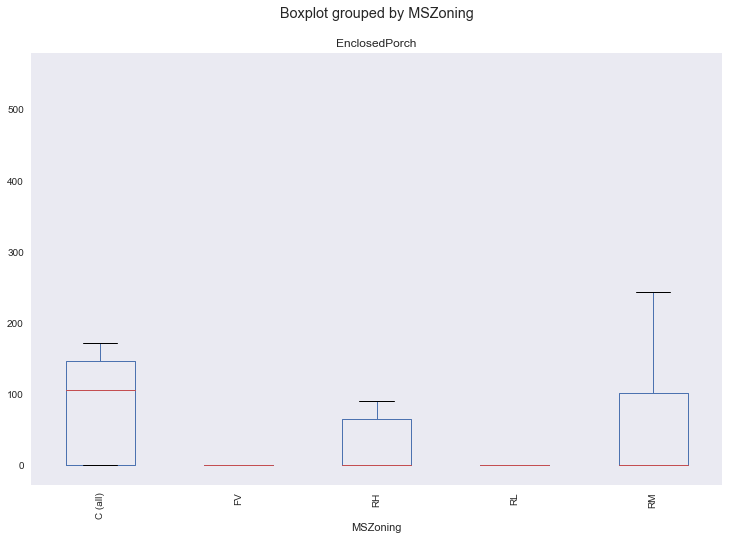

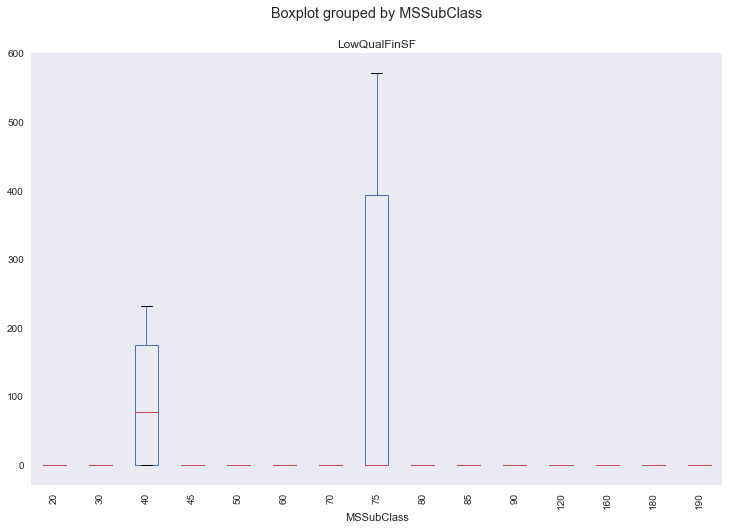

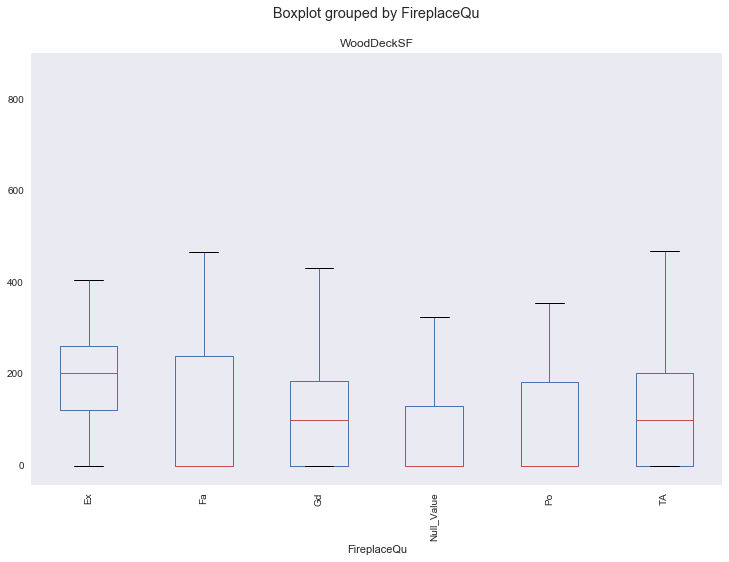

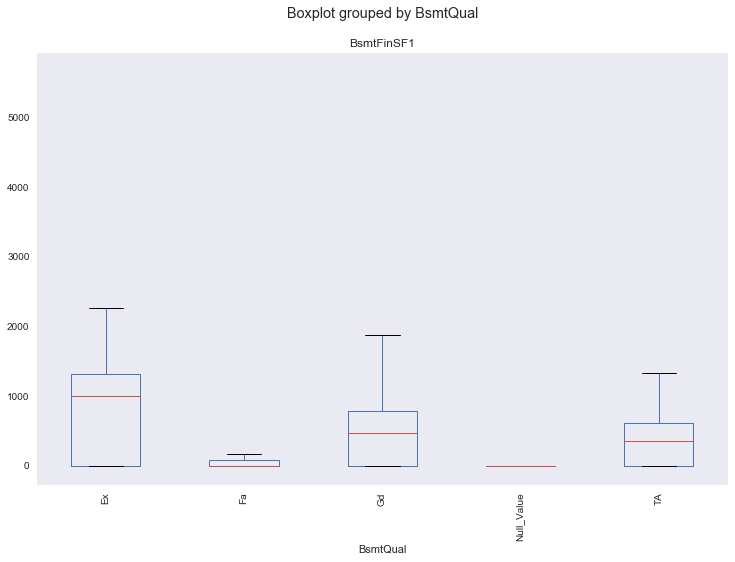

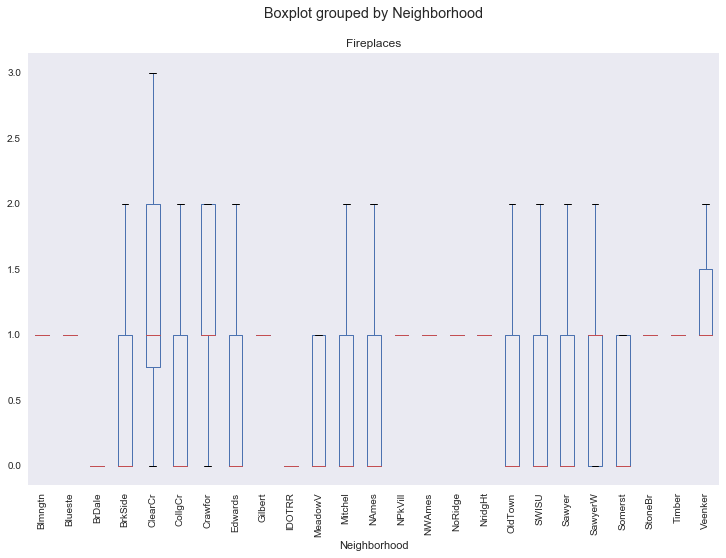

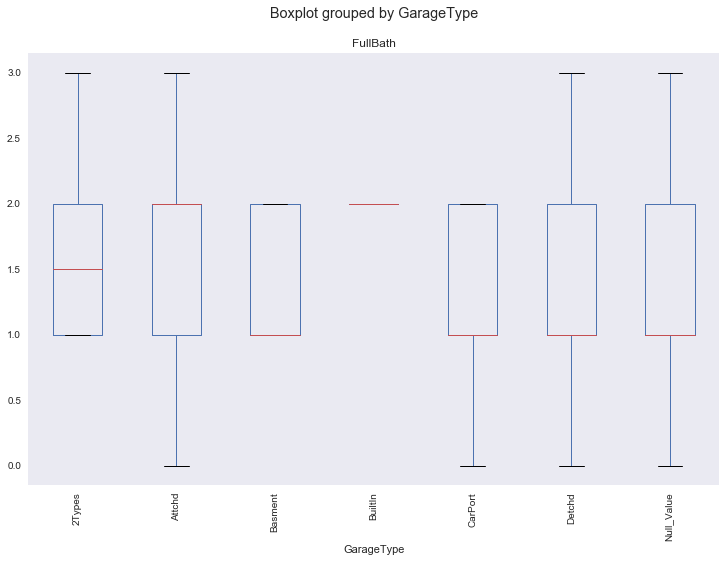

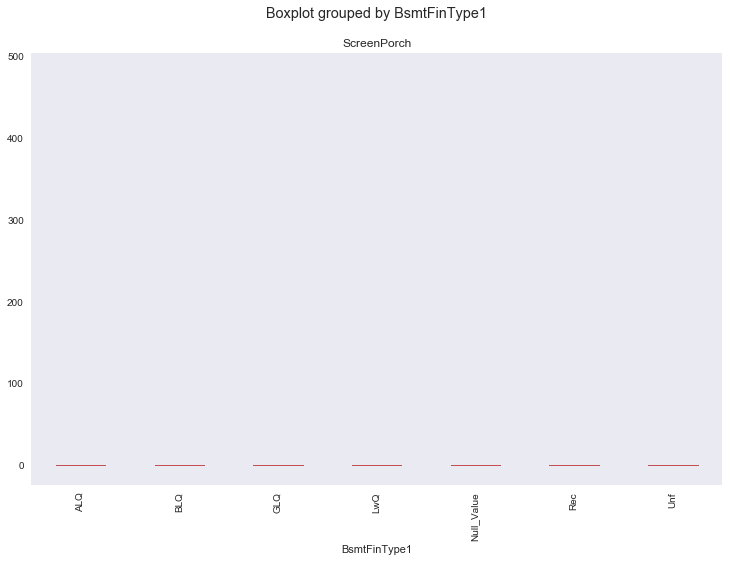

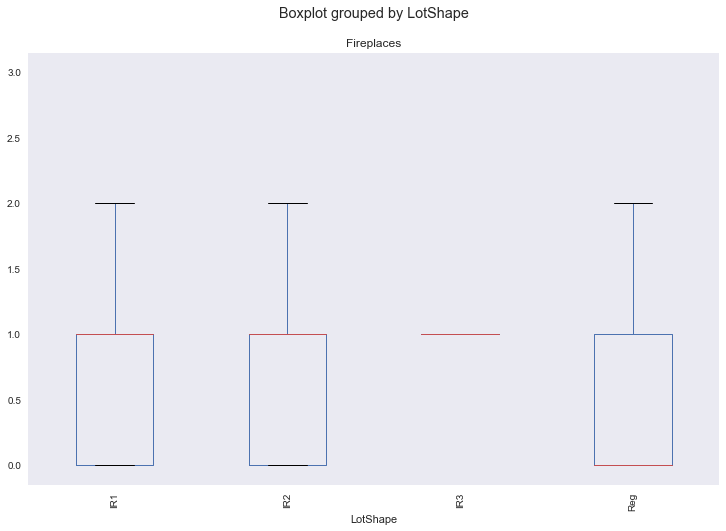

In [20]:
warnings.filterwarnings('ignore')

feature_clusters.correlations_cont_cat()

Finally we would like to look for clusters of correlated variables, independent of whether they are continuous or categorical. To do that we will take the continuous clusters and categorical clusters we formed above and merge any pairs with a small $p$-value from the one-way ANOVA. In order to avoid daisy-chaining two continuous (or categorical) clusters that were not previously combined, we take the most significant (i.e. smallest $p$-value) linkages between categorical and continous clusters.

In [21]:
feature_clusters.cont_cat_feature_clusters()

Cluster 1: ['GarageQual', 'YearRemodAdd', 'GarageType', 'GarageArea', 'GarageCars', 'GarageYrBlt', 'GarageFinish', 'GarageYrBlt_Is_Imputed', 'YearBuilt', 'GarageCond']
Cluster 2: ['BsmtFullBath', 'SecondFlrSF', 'HalfBath', 'BsmtFinSF1', 'BldgType', 'TotRmsAbvGrd', 'HouseStyle', 'TotalBsmtSF', 'FullBath', 'FirstFlrSF', 'GrLivArea', 'MSSubClass', 'BedroomAbvGr']
Cluster 3: ['BsmtUnfSF']
Cluster 4: ['Fireplaces', 'FireplaceQu']
Cluster 5: ['MasVnrType', 'MasVnrArea', 'MasVnrArea_Is_Imputed']
Cluster 6: ['EnclosedPorch']
Cluster 7: ['Exterior1st', 'Exterior2nd', 'OverallCond']
Cluster 8: ['OpenPorchSF', 'Fence']
Cluster 9: ['RoofMatl', 'LotArea']
Cluster 10: ['Heating', 'KitchenAbvGr']
Cluster 11: ['WoodDeckSF']
Cluster 12: ['LotFrontage', 'LotFrontage_Is_Imputed']
Cluster 13: ['BsmtExposure', 'BsmtFinSF2', 'BsmtFinType2', 'BsmtCond', 'BsmtQual', 'BsmtFinType1', 'Foundation']
Cluster 14: ['ScreenPorch']
Cluster 15: ['Neighborhood', 'ExterQual', 'OverallQual', 'MSZoning', 'LowQualFinSF', 'K